In [1]:
import sciann as sn 
import numpy as np 
import matplotlib.pyplot as plt 

---------------------- SCIANN 0.5.3.4 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 



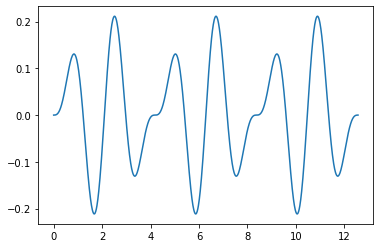

In [14]:
Omega = 3
OmegaBar = Omega*1.5
F0 = 1
A0 = F0/(Omega**2 - OmegaBar**2)
Beta = OmegaBar/Omega

_response = lambda t: A0*(np.sin(OmegaBar*t) - Beta*np.sin(Omega*t))

t_data = np.concatenate([np.linspace(0, 0., 1000), np.linspace(0, 4*np.pi, 1000)])
u_data = _response(t_data)

plt.plot(t_data, u_data)

In [15]:
Beta

1.5

In [48]:
# sn.clear_session()
t = sn.Variable('t')
u = sn.Functional('u', t, 4*[20], 'tanh')
L1 = sn.diff(u, t, order=2) + Omega**2*u - F0*sn.sin(OmegaBar*t)
L2 = (1 - sn.sign(t)) * u
L3 = (1 - sn.sign(t)) * sn.diff(u, t)

In [49]:
model = sn.SciModel([t], [sn.PDE(L1),L2,L3], optimizer='adam')

In [50]:
h = model.train(
    t_data, 
    ['zeros', 'zeros', 'zeros'], 
    epochs=10000, 
    adaptive_weights=100, 
    batch_size=100,
    verbose=1
)

Train on 2000 samples

+ adaptive_weights at epoch 0: [1.0, 306.6755, 933.13934]
Epoch 1/10000
2000/2000 [==============================] - 0s 38us/sample - loss: 0.6659 - sub_6_loss: 0.3985 - mul_33_loss: 5.0312e-04 - mul_34_loss: 1.2122e-04
Epoch 2/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.3326 - sub_6_loss: 0.3033 - mul_33_loss: 7.1263e-05 - mul_34_loss: 8.0077e-06
Epoch 3/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2838 - sub_6_loss: 0.2756 - mul_33_loss: 1.0119e-05 - mul_34_loss: 5.4633e-06
Epoch 4/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2633 - sub_6_loss: 0.2598 - mul_33_loss: 1.3324e-06 - mul_34_loss: 3.3339e-06
Epoch 5/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.2586 - sub_6_loss: 0.2529 - mul_33_loss: 6.7019e-07 - mul_34_loss: 5.9345e-06
Epoch 6/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2611 - sub_6_loss: 0.2547

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2541 - sub_6_loss: 0.2511 - mul_33_loss: 2.2420e-06 - mul_34_loss: 2.4863e-06
Epoch 51/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2536 - sub_6_loss: 0.2505 - mul_33_loss: 8.3818e-07 - mul_34_loss: 3.0782e-06
Epoch 52/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2554 - sub_6_loss: 0.2528 - mul_33_loss: 1.8507e-06 - mul_34_loss: 2.1276e-06
Epoch 53/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2565 - sub_6_loss: 0.2535 - mul_33_loss: 2.1747e-06 - mul_34_loss: 2.4308e-06
Epoch 54/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2537 - sub_6_loss: 0.2493 - mul_33_loss: 2.9093e-06 - mul_34_loss: 3.7563e-06
Epoch 55/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2532 - sub_6_loss: 0.2504 - mul_33_loss: 2.4270e-06 - mul_34_loss: 2.2078e-06
Epoch 56/10000
2000/2000 [===========

 100/2000 [>.............................] - ETA: 0s - loss: 0.2564 - sub_6_loss: 0.2564 - mul_33_loss: 4.1991e-08 - mul_34_loss: 3.5868e-08
+ adaptive_weights at epoch 99: [1.0, 284.61517, 841.09845]
2000/2000 [==============================] - 0s 18us/sample - loss: 0.2529 - sub_6_loss: 0.2500 - mul_33_loss: 6.5673e-07 - mul_34_loss: 2.8589e-06
Epoch 101/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2622 - sub_6_loss: 0.2521 - mul_33_loss: 1.7428e-06 - mul_34_loss: 1.1522e-05
Epoch 102/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2494 - sub_6_loss: 0.2488 - mul_33_loss: 1.2116e-06 - mul_34_loss: 3.2656e-07
Epoch 103/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2525 - sub_6_loss: 0.2502 - mul_33_loss: 2.3169e-06 - mul_34_loss: 1.9664e-06
Epoch 104/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2500 - sub_6_loss: 0.2489 - mul_33_loss: 7.0363e-07 - mul_34_loss: 9.6939

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2558 - sub_6_loss: 0.2519 - mul_33_loss: 1.8737e-06 - mul_34_loss: 3.9794e-06
Epoch 149/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2551 - sub_6_loss: 0.2518 - mul_33_loss: 1.9123e-06 - mul_34_loss: 3.3214e-06
Epoch 150/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2502 - sub_6_loss: 0.2499 - mul_33_loss: 3.0075e-07 - mul_34_loss: 2.8367e-07
Epoch 151/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2509 - sub_6_loss: 0.2496 - mul_33_loss: 1.1949e-06 - mul_34_loss: 1.1724e-06
Epoch 152/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2517 - sub_6_loss: 0.2503 - mul_33_loss: 5.9116e-07 - mul_34_loss: 1.4917e-06
Epoch 153/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2510 - sub_6_loss: 0.2492 - mul_33_loss: 1.1980e-06 - mul_34_loss: 1.7231e-06
Epoch 154/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2520 - sub_6_loss: 0.2505 - mul_33_loss: 1.3297e-06 - mul_34_loss: 1.2798e-06
Epoch 199/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2507 - sub_6_loss: 0.2498 - mul_33_loss: 1.6305e-06 - mul_34_loss: 5.3246e-07
Epoch 200/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.2300 - sub_6_loss: 0.2290 - mul_33_loss: 2.1907e-06 - mul_34_loss: 4.8172e-07
+ adaptive_weights at epoch 199: [1.0, 282.68918, 759.4283]
2000/2000 [==============================] - 0s 18us/sample - loss: 0.2493 - sub_6_loss: 0.2482 - mul_33_loss: 4.1729e-07 - mul_34_loss: 1.1990e-06
Epoch 201/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2535 - sub_6_loss: 0.2517 - mul_33_loss: 2.0226e-06 - mul_34_loss: 1.6828e-06
Epoch 202/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2512 - sub_6_loss: 0.2497 - mul_33_loss: 1.8657e-06 - mul_34_loss: 1.3258

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2511 - sub_6_loss: 0.2498 - mul_33_loss: 1.5080e-06 - mul_34_loss: 1.1280e-06
Epoch 247/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2526 - sub_6_loss: 0.2498 - mul_33_loss: 2.3466e-06 - mul_34_loss: 2.8056e-06
Epoch 248/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2494 - sub_6_loss: 0.2491 - mul_33_loss: 6.9120e-07 - mul_34_loss: 2.1239e-07
Epoch 249/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2498 - sub_6_loss: 0.2493 - mul_33_loss: 7.0513e-07 - mul_34_loss: 4.4799e-07
Epoch 250/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2517 - sub_6_loss: 0.2494 - mul_33_loss: 3.9423e-06 - mul_34_loss: 1.6496e-06
Epoch 251/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2513 - sub_6_loss: 0.2496 - mul_33_loss: 4.1471e-06 - mul_34_loss: 7.1242e-07
Epoch 252/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2550 - sub_6_loss: 0.2512 - mul_33_loss: 8.4961e-06 - mul_34_loss: 1.7999e-06
Epoch 297/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2509 - sub_6_loss: 0.2498 - mul_33_loss: 1.6833e-06 - mul_34_loss: 8.0142e-07
Epoch 298/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2493 - sub_6_loss: 0.2485 - mul_33_loss: 1.7152e-06 - mul_34_loss: 4.5527e-07
Epoch 299/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2494 - sub_6_loss: 0.2489 - mul_33_loss: 1.0787e-06 - mul_34_loss: 2.6238e-07
Epoch 300/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.2809 - sub_6_loss: 0.2809 - mul_33_loss: 1.3455e-09 - mul_34_loss: 3.5634e-08
+ adaptive_weights at epoch 299: [1.0, 255.55403, 687.6727]
2000/2000 [==============================] - 0s 17us/sample - loss: 0.2504 - sub_6_loss: 0.2500 - mul_33_loss: 7.5077e-07 - mul_34_loss: 1.8749

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2504 - sub_6_loss: 0.2489 - mul_33_loss: 4.9101e-06 - mul_34_loss: 3.5214e-07
Epoch 345/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2508 - sub_6_loss: 0.2500 - mul_33_loss: 1.6865e-06 - mul_34_loss: 4.2117e-07
Epoch 346/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2499 - sub_6_loss: 0.2492 - mul_33_loss: 8.6983e-07 - mul_34_loss: 6.1781e-07
Epoch 347/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2500 - sub_6_loss: 0.2493 - mul_33_loss: 2.1239e-06 - mul_34_loss: 3.0615e-07
Epoch 348/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2491 - sub_6_loss: 0.2488 - mul_33_loss: 6.5689e-07 - mul_34_loss: 7.9081e-08
Epoch 349/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2490 - sub_6_loss: 0.2489 - mul_33_loss: 4.3745e-07 - mul_34_loss: 5.3817e-08
Epoch 350/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2495 - sub_6_loss: 0.2491 - mul_33_loss: 1.2611e-06 - mul_34_loss: 1.5493e-07
Epoch 395/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2490 - sub_6_loss: 0.2487 - mul_33_loss: 8.9992e-07 - mul_34_loss: 8.7643e-08
Epoch 396/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2493 - sub_6_loss: 0.2491 - mul_33_loss: 7.5489e-07 - mul_34_loss: 3.2001e-08
Epoch 397/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2522 - sub_6_loss: 0.2504 - mul_33_loss: 6.9498e-06 - mul_34_loss: 8.9966e-08
Epoch 398/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2510 - sub_6_loss: 0.2500 - mul_33_loss: 3.1145e-06 - mul_34_loss: 1.6669e-07
Epoch 399/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2501 - sub_6_loss: 0.2493 - mul_33_loss: 2.9328e-06 - mul_34_loss: 6.7688e-08
Epoch 400/10000
 100/2000 [>....

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2508 - sub_6_loss: 0.2495 - mul_33_loss: 5.4518e-06 - mul_34_loss: 7.4359e-08
Epoch 443/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2503 - sub_6_loss: 0.2498 - mul_33_loss: 2.1681e-06 - mul_34_loss: 7.0512e-08
Epoch 444/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2501 - sub_6_loss: 0.2495 - mul_33_loss: 2.3298e-06 - mul_34_loss: 7.4978e-08
Epoch 445/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2495 - sub_6_loss: 0.2492 - mul_33_loss: 1.1970e-06 - mul_34_loss: 8.5356e-08
Epoch 446/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2483 - sub_6_loss: 0.2482 - mul_33_loss: 2.3762e-07 - mul_34_loss: 8.4310e-08
Epoch 447/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2486 - sub_6_loss: 0.2481 - mul_33_loss: 1.7414e-06 - mul_34_loss: 1.1898e-07
Epoch 448/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2498 - sub_6_loss: 0.2496 - mul_33_loss: 5.0448e-07 - mul_34_loss: 7.3577e-08
Epoch 493/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2509 - sub_6_loss: 0.2505 - mul_33_loss: 1.4166e-06 - mul_34_loss: 4.7488e-08
Epoch 494/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2517 - sub_6_loss: 0.2512 - mul_33_loss: 1.0305e-06 - mul_34_loss: 4.5060e-07
Epoch 495/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2511 - sub_6_loss: 0.2506 - mul_33_loss: 1.2984e-06 - mul_34_loss: 4.0668e-07
Epoch 496/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2499 - sub_6_loss: 0.2497 - mul_33_loss: 9.5528e-07 - mul_34_loss: 7.6704e-08
Epoch 497/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2497 - sub_6_loss: 0.2493 - mul_33_loss: 1.5529e-06 - mul_34_loss: 4.5967e-08
Epoch 498/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2515 - sub_6_loss: 0.2508 - mul_33_loss: 1.2880e-06 - mul_34_loss: 8.5264e-07
Epoch 541/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2487 - sub_6_loss: 0.2482 - mul_33_loss: 1.1865e-06 - mul_34_loss: 3.8202e-07
Epoch 542/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2502 - sub_6_loss: 0.2498 - mul_33_loss: 1.6534e-06 - mul_34_loss: 8.0177e-08
Epoch 543/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2480 - sub_6_loss: 0.2477 - mul_33_loss: 1.4046e-06 - mul_34_loss: 3.9737e-08
Epoch 544/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2494 - sub_6_loss: 0.2484 - mul_33_loss: 4.4616e-06 - mul_34_loss: 2.6743e-08
Epoch 545/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2486 - sub_6_loss: 0.2479 - mul_33_loss: 3.4128e-06 - mul_34_loss: 1.5788e-08
Epoch 546/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2488 - sub_6_loss: 0.2486 - mul_33_loss: 1.2734e-06 - mul_34_loss: 3.9002e-09
Epoch 591/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2490 - sub_6_loss: 0.2483 - mul_33_loss: 3.1636e-06 - mul_34_loss: 1.2697e-08
Epoch 592/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2504 - sub_6_loss: 0.2493 - mul_33_loss: 5.3415e-06 - mul_34_loss: 4.7396e-09
Epoch 593/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2502 - sub_6_loss: 0.2494 - mul_33_loss: 3.3665e-06 - mul_34_loss: 6.0039e-08
Epoch 594/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2504 - sub_6_loss: 0.2491 - mul_33_loss: 6.3499e-06 - mul_34_loss: 2.5383e-08
Epoch 595/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2505 - sub_6_loss: 0.2492 - mul_33_loss: 6.1169e-06 - mul_34_loss: 1.6120e-08
Epoch 596/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 16us/sample - loss: 0.2491 - sub_6_loss: 0.2482 - mul_33_loss: 4.3514e-06 - mul_34_loss: 1.7875e-08
Epoch 639/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2486 - sub_6_loss: 0.2481 - mul_33_loss: 2.5304e-06 - mul_34_loss: 2.4905e-08
Epoch 640/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2480 - sub_6_loss: 0.2474 - mul_33_loss: 3.2274e-06 - mul_34_loss: 4.9497e-08
Epoch 641/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2487 - sub_6_loss: 0.2486 - mul_33_loss: 5.4727e-07 - mul_34_loss: 3.5252e-08
Epoch 642/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2483 - sub_6_loss: 0.2480 - mul_33_loss: 1.2477e-06 - mul_34_loss: 5.7100e-08
Epoch 643/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2494 - sub_6_loss: 0.2491 - mul_33_loss: 1.1400e-06 - mul_34_loss: 1.4961e-08
Epoch 644/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2484 - sub_6_loss: 0.2478 - mul_33_loss: 2.5652e-06 - mul_34_loss: 8.6686e-08
Epoch 689/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2491 - sub_6_loss: 0.2490 - mul_33_loss: 3.3228e-07 - mul_34_loss: 1.8296e-08
Epoch 690/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2482 - sub_6_loss: 0.2479 - mul_33_loss: 1.6293e-06 - mul_34_loss: 1.5573e-08
Epoch 691/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2487 - sub_6_loss: 0.2485 - mul_33_loss: 1.1036e-06 - mul_34_loss: 7.3904e-09
Epoch 692/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2473 - sub_6_loss: 0.2471 - mul_33_loss: 8.9486e-07 - mul_34_loss: 1.5832e-08
Epoch 693/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2472 - sub_6_loss: 0.2471 - mul_33_loss: 9.1095e-07 - mul_34_loss: 2.9226e-08
Epoch 694/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 15us/sample - loss: 0.2477 - sub_6_loss: 0.2476 - mul_33_loss: 5.1607e-07 - mul_34_loss: 3.7651e-08
Epoch 737/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2492 - sub_6_loss: 0.2489 - mul_33_loss: 1.4304e-06 - mul_34_loss: 2.1824e-08
Epoch 738/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2489 - sub_6_loss: 0.2487 - mul_33_loss: 1.4329e-06 - mul_34_loss: 1.7131e-08
Epoch 739/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2480 - sub_6_loss: 0.2479 - mul_33_loss: 5.4101e-07 - mul_34_loss: 2.6496e-09
Epoch 740/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.2487 - sub_6_loss: 0.2485 - mul_33_loss: 1.0203e-06 - mul_34_loss: 1.3577e-08
Epoch 741/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2474 - sub_6_loss: 0.2472 - mul_33_loss: 1.0886e-06 - mul_34_loss: 2.6763e-09
Epoch 742/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2482 - sub_6_loss: 0.2477 - mul_33_loss: 2.9033e-06 - mul_34_loss: 2.3424e-08
Epoch 787/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2492 - sub_6_loss: 0.2485 - mul_33_loss: 4.2265e-06 - mul_34_loss: 1.3551e-08
Epoch 788/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2483 - sub_6_loss: 0.2480 - mul_33_loss: 1.8032e-06 - mul_34_loss: 7.5669e-09
Epoch 789/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2474 - sub_6_loss: 0.2473 - mul_33_loss: 5.0646e-07 - mul_34_loss: 1.1124e-08
Epoch 790/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2492 - sub_6_loss: 0.2485 - mul_33_loss: 3.9439e-06 - mul_34_loss: 4.2878e-09
Epoch 791/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2487 - sub_6_loss: 0.2482 - mul_33_loss: 3.0649e-06 - mul_34_loss: 2.9267e-08
Epoch 792/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 16us/sample - loss: 0.2477 - sub_6_loss: 0.2476 - mul_33_loss: 4.8876e-07 - mul_34_loss: 5.7948e-09
Epoch 835/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.2487 - sub_6_loss: 0.2485 - mul_33_loss: 1.3963e-06 - mul_34_loss: 1.4999e-09
Epoch 836/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2487 - sub_6_loss: 0.2483 - mul_33_loss: 2.2656e-06 - mul_34_loss: 3.9911e-09
Epoch 837/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2475 - sub_6_loss: 0.2474 - mul_33_loss: 1.0857e-06 - mul_34_loss: 3.8723e-09
Epoch 838/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2475 - sub_6_loss: 0.2471 - mul_33_loss: 2.6987e-06 - mul_34_loss: 1.8073e-08
Epoch 839/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2498 - sub_6_loss: 0.2493 - mul_33_loss: 2.8350e-06 - mul_34_loss: 9.4151e-08
Epoch 840/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 16us/sample - loss: 0.2484 - sub_6_loss: 0.2479 - mul_33_loss: 2.6682e-06 - mul_34_loss: 2.2115e-08
Epoch 885/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2486 - sub_6_loss: 0.2481 - mul_33_loss: 3.2782e-06 - mul_34_loss: 5.2069e-08
Epoch 886/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2490 - sub_6_loss: 0.2487 - mul_33_loss: 1.6849e-06 - mul_34_loss: 9.5750e-09
Epoch 887/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2477 - sub_6_loss: 0.2472 - mul_33_loss: 3.2086e-06 - mul_34_loss: 7.3612e-08
Epoch 888/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2507 - sub_6_loss: 0.2496 - mul_33_loss: 6.3073e-06 - mul_34_loss: 3.2515e-08
Epoch 889/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2479 - sub_6_loss: 0.2477 - mul_33_loss: 9.2783e-07 - mul_34_loss: 4.7973e-08
Epoch 890/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 15us/sample - loss: 0.2489 - sub_6_loss: 0.2485 - mul_33_loss: 2.6868e-06 - mul_34_loss: 9.1197e-09
Epoch 933/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2488 - sub_6_loss: 0.2485 - mul_33_loss: 1.4939e-06 - mul_34_loss: 5.4198e-09
Epoch 934/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2476 - sub_6_loss: 0.2474 - mul_33_loss: 1.3010e-06 - mul_34_loss: 7.5983e-09
Epoch 935/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2482 - sub_6_loss: 0.2480 - mul_33_loss: 1.1273e-06 - mul_34_loss: 1.8185e-08
Epoch 936/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2480 - sub_6_loss: 0.2477 - mul_33_loss: 2.2341e-06 - mul_34_loss: 4.7174e-08
Epoch 937/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2487 - sub_6_loss: 0.2485 - mul_33_loss: 1.3299e-06 - mul_34_loss: 7.8477e-09
Epoch 938/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2491 - sub_6_loss: 0.2485 - mul_33_loss: 3.0438e-06 - mul_34_loss: 2.0331e-07
Epoch 983/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2484 - sub_6_loss: 0.2480 - mul_33_loss: 2.5685e-06 - mul_34_loss: 2.9107e-08
Epoch 984/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2476 - sub_6_loss: 0.2475 - mul_33_loss: 5.6671e-07 - mul_34_loss: 5.7268e-10
Epoch 985/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2474 - sub_6_loss: 0.2473 - mul_33_loss: 6.2326e-07 - mul_34_loss: 3.3413e-09
Epoch 986/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2494 - sub_6_loss: 0.2486 - mul_33_loss: 5.5704e-06 - mul_34_loss: 2.9807e-09
Epoch 987/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2488 - sub_6_loss: 0.2482 - mul_33_loss: 4.0389e-06 - mul_34_loss: 1.9464e-09
Epoch 988/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2469 - sub_6_loss: 0.2468 - mul_33_loss: 9.7095e-07 - mul_34_loss: 3.2942e-10
Epoch 1031/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2478 - sub_6_loss: 0.2474 - mul_33_loss: 3.1580e-06 - mul_34_loss: 6.8539e-09
Epoch 1032/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2478 - sub_6_loss: 0.2474 - mul_33_loss: 2.8761e-06 - mul_34_loss: 3.0612e-09
Epoch 1033/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2476 - sub_6_loss: 0.2471 - mul_33_loss: 3.3569e-06 - mul_34_loss: 1.3936e-08
Epoch 1034/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2479 - sub_6_loss: 0.2478 - mul_33_loss: 5.9059e-07 - mul_34_loss: 1.5885e-08
Epoch 1035/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2479 - sub_6_loss: 0.2478 - mul_33_loss: 1.1058e-06 - mul_34_loss: 3.8183e-09
Epoch 1036/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.2476 - sub_6_loss: 0.2474 - mul_33_loss: 1.6034e-06 - mul_34_loss: 2.1088e-08
Epoch 1080/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.2491 - sub_6_loss: 0.2489 - mul_33_loss: 8.5357e-07 - mul_34_loss: 3.8404e-08
Epoch 1081/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2485 - sub_6_loss: 0.2483 - mul_33_loss: 1.1513e-06 - mul_34_loss: 3.9051e-09
Epoch 1082/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2489 - sub_6_loss: 0.2484 - mul_33_loss: 2.3665e-06 - mul_34_loss: 2.0906e-07
Epoch 1083/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2475 - sub_6_loss: 0.2474 - mul_33_loss: 7.9562e-07 - mul_34_loss: 1.4775e-08
Epoch 1084/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2468 - sub_6_loss: 0.2466 - mul_33_loss: 1.1355e-06 - mul_34_loss: 4.9806e-09
Epoch 1085/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.2489 - sub_6_loss: 0.2483 - mul_33_loss: 4.4438e-06 - mul_34_loss: 2.8120e-08
Epoch 1128/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2484 - sub_6_loss: 0.2483 - mul_33_loss: 4.0639e-07 - mul_34_loss: 1.0343e-08
Epoch 1129/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2483 - sub_6_loss: 0.2479 - mul_33_loss: 2.8234e-06 - mul_34_loss: 2.4287e-09
Epoch 1130/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2479 - sub_6_loss: 0.2477 - mul_33_loss: 1.2205e-06 - mul_34_loss: 7.3774e-10
Epoch 1131/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2472 - sub_6_loss: 0.2471 - mul_33_loss: 5.5958e-07 - mul_34_loss: 1.5293e-09
Epoch 1132/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2475 - sub_6_loss: 0.2470 - mul_33_loss: 3.8161e-06 - mul_34_loss: 2.7643e-09
Epoch 1133/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.2476 - sub_6_loss: 0.2474 - mul_33_loss: 1.5120e-06 - mul_34_loss: 2.6770e-08
Epoch 1177/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2475 - sub_6_loss: 0.2472 - mul_33_loss: 2.2175e-06 - mul_34_loss: 1.5576e-08
Epoch 1178/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2475 - sub_6_loss: 0.2471 - mul_33_loss: 2.4476e-06 - mul_34_loss: 9.6688e-09
Epoch 1179/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2489 - sub_6_loss: 0.2481 - mul_33_loss: 5.9134e-06 - mul_34_loss: 8.8972e-09
Epoch 1180/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2484 - sub_6_loss: 0.2479 - mul_33_loss: 3.1401e-06 - mul_34_loss: 1.5123e-08
Epoch 1181/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2477 - sub_6_loss: 0.2474 - mul_33_loss: 2.6472e-06 - mul_34_loss: 1.7907e-09
Epoch 1182/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2482 - sub_6_loss: 0.2478 - mul_33_loss: 2.7159e-06 - mul_34_loss: 1.8349e-08
Epoch 1225/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2483 - sub_6_loss: 0.2477 - mul_33_loss: 4.9854e-06 - mul_34_loss: 1.2359e-08
Epoch 1226/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2482 - sub_6_loss: 0.2480 - mul_33_loss: 5.4655e-07 - mul_34_loss: 5.2557e-08
Epoch 1227/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2469 - sub_6_loss: 0.2468 - mul_33_loss: 6.3831e-07 - mul_34_loss: 5.8450e-09
Epoch 1228/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2478 - sub_6_loss: 0.2474 - mul_33_loss: 3.0426e-06 - mul_34_loss: 8.1295e-09
Epoch 1229/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2494 - sub_6_loss: 0.2490 - mul_33_loss: 2.8748e-06 - mul_34_loss: 4.0582e-09
Epoch 1230/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2478 - sub_6_loss: 0.2476 - mul_33_loss: 8.5304e-07 - mul_34_loss: 4.2683e-08
Epoch 1274/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2498 - sub_6_loss: 0.2496 - mul_33_loss: 6.7290e-07 - mul_34_loss: 2.5436e-08
Epoch 1275/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2482 - sub_6_loss: 0.2479 - mul_33_loss: 1.9649e-06 - mul_34_loss: 9.3137e-09
Epoch 1276/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2502 - sub_6_loss: 0.2497 - mul_33_loss: 3.4834e-06 - mul_34_loss: 2.7716e-08
Epoch 1277/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2478 - sub_6_loss: 0.2475 - mul_33_loss: 2.3032e-06 - mul_34_loss: 7.6516e-09
Epoch 1278/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2502 - sub_6_loss: 0.2500 - mul_33_loss: 1.5669e-06 - mul_34_loss: 2.9715e-08
Epoch 1279/10000
2000/2000 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2499 - sub_6_loss: 0.2494 - mul_33_loss: 3.5655e-06 - mul_34_loss: 2.4451e-08
Epoch 1322/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2475 - sub_6_loss: 0.2473 - mul_33_loss: 1.6501e-06 - mul_34_loss: 1.5058e-08
Epoch 1323/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2475 - sub_6_loss: 0.2474 - mul_33_loss: 8.3703e-07 - mul_34_loss: 4.7018e-09
Epoch 1324/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2469 - sub_6_loss: 0.2468 - mul_33_loss: 7.2986e-07 - mul_34_loss: 1.0841e-08
Epoch 1325/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2477 - sub_6_loss: 0.2472 - mul_33_loss: 3.3317e-06 - mul_34_loss: 2.4786e-08
Epoch 1326/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2486 - sub_6_loss: 0.2484 - mul_33_loss: 2.3259e-07 - mul_34_loss: 8.4967e-08
Epoch 1327/10000
2000/2000 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2508 - sub_6_loss: 0.2502 - mul_33_loss: 4.6700e-06 - mul_34_loss: 1.2279e-08
Epoch 1371/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2484 - sub_6_loss: 0.2482 - mul_33_loss: 1.3667e-06 - mul_34_loss: 1.5612e-08
Epoch 1372/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2474 - sub_6_loss: 0.2473 - mul_33_loss: 5.9027e-07 - mul_34_loss: 5.0019e-09
Epoch 1373/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2470 - sub_6_loss: 0.2467 - mul_33_loss: 1.9840e-06 - mul_34_loss: 2.5634e-08
Epoch 1374/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2493 - sub_6_loss: 0.2491 - mul_33_loss: 4.7466e-07 - mul_34_loss: 5.1005e-08
Epoch 1375/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2483 - sub_6_loss: 0.2480 - mul_33_loss: 1.9801e-06 - mul_34_loss: 8.1928e-09
Epoch 1376/10000
2000/2000 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2481 - sub_6_loss: 0.2478 - mul_33_loss: 1.1948e-06 - mul_34_loss: 2.4331e-08
Epoch 1419/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2469 - sub_6_loss: 0.2467 - mul_33_loss: 9.1443e-07 - mul_34_loss: 1.0718e-09
Epoch 1420/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2475 - sub_6_loss: 0.2472 - mul_33_loss: 1.3131e-06 - mul_34_loss: 1.7081e-08
Epoch 1421/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2477 - sub_6_loss: 0.2474 - mul_33_loss: 8.4824e-07 - mul_34_loss: 2.7686e-08
Epoch 1422/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2487 - sub_6_loss: 0.2482 - mul_33_loss: 2.3113e-06 - mul_34_loss: 7.2971e-09
Epoch 1423/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2478 - sub_6_loss: 0.2473 - mul_33_loss: 1.5069e-06 - mul_34_loss: 5.9975e-08
Epoch 1424/10000
2000/2000 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2491 - sub_6_loss: 0.2489 - mul_33_loss: 8.3483e-07 - mul_34_loss: 3.8852e-08
Epoch 1468/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2486 - sub_6_loss: 0.2481 - mul_33_loss: 1.8766e-06 - mul_34_loss: 3.6239e-08
Epoch 1469/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2468 - sub_6_loss: 0.2463 - mul_33_loss: 1.8091e-06 - mul_34_loss: 7.7480e-08
Epoch 1470/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2484 - sub_6_loss: 0.2481 - mul_33_loss: 1.2567e-06 - mul_34_loss: 5.2973e-09
Epoch 1471/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2476 - sub_6_loss: 0.2474 - mul_33_loss: 7.5906e-07 - mul_34_loss: 5.6505e-09
Epoch 1472/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2498 - sub_6_loss: 0.2493 - mul_33_loss: 1.9356e-06 - mul_34_loss: 6.2081e-08
Epoch 1473/10000
2000/2000 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2469 - sub_6_loss: 0.2466 - mul_33_loss: 1.6664e-06 - mul_34_loss: 8.2207e-09
Epoch 1516/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2472 - sub_6_loss: 0.2469 - mul_33_loss: 1.2016e-06 - mul_34_loss: 1.8846e-08
Epoch 1517/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2472 - sub_6_loss: 0.2471 - mul_33_loss: 7.5423e-07 - mul_34_loss: 5.5546e-09
Epoch 1518/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2466 - sub_6_loss: 0.2461 - mul_33_loss: 2.9755e-06 - mul_34_loss: 4.8365e-09
Epoch 1519/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2499 - sub_6_loss: 0.2494 - mul_33_loss: 2.3479e-06 - mul_34_loss: 6.8931e-08
Epoch 1520/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2471 - sub_6_loss: 0.2470 - mul_33_loss: 5.8492e-07 - mul_34_loss: 2.2021e-08
Epoch 1521/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.2473 - sub_6_loss: 0.2468 - mul_33_loss: 2.4421e-06 - mul_34_loss: 2.4514e-08
Epoch 1565/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2483 - sub_6_loss: 0.2478 - mul_33_loss: 2.2550e-06 - mul_34_loss: 6.3994e-08
Epoch 1566/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2507 - sub_6_loss: 0.2495 - mul_33_loss: 3.8696e-06 - mul_34_loss: 2.6939e-07
Epoch 1567/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2480 - sub_6_loss: 0.2475 - mul_33_loss: 1.8561e-06 - mul_34_loss: 8.6833e-08
Epoch 1568/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2473 - sub_6_loss: 0.2470 - mul_33_loss: 6.2668e-07 - mul_34_loss: 5.8488e-08
Epoch 1569/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2476 - sub_6_loss: 0.2470 - mul_33_loss: 3.3725e-06 - mul_34_loss: 1.1909e-08
Epoch 1570/10000
2000/2000 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2490 - sub_6_loss: 0.2485 - mul_33_loss: 3.3736e-06 - mul_34_loss: 1.2554e-09
Epoch 1613/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2470 - sub_6_loss: 0.2467 - mul_33_loss: 1.6911e-06 - mul_34_loss: 2.3549e-08
Epoch 1614/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2475 - sub_6_loss: 0.2474 - mul_33_loss: 6.2594e-07 - mul_34_loss: 6.8122e-09
Epoch 1615/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2463 - sub_6_loss: 0.2462 - mul_33_loss: 3.7546e-07 - mul_34_loss: 2.9881e-09
Epoch 1616/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2477 - sub_6_loss: 0.2475 - mul_33_loss: 1.2504e-06 - mul_34_loss: 2.8923e-09
Epoch 1617/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2480 - sub_6_loss: 0.2478 - mul_33_loss: 4.2354e-07 - mul_34_loss: 5.1980e-08
Epoch 1618/10000
2000/2000 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2468 - sub_6_loss: 0.2465 - mul_33_loss: 1.6867e-06 - mul_34_loss: 4.5657e-09
Epoch 1662/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2473 - sub_6_loss: 0.2470 - mul_33_loss: 1.6023e-06 - mul_34_loss: 2.1569e-09
Epoch 1663/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2462 - sub_6_loss: 0.2461 - mul_33_loss: 2.3181e-07 - mul_34_loss: 5.7469e-10
Epoch 1664/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2487 - sub_6_loss: 0.2481 - mul_33_loss: 2.0277e-06 - mul_34_loss: 1.0418e-07
Epoch 1665/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2486 - sub_6_loss: 0.2482 - mul_33_loss: 2.1241e-06 - mul_34_loss: 1.2850e-08
Epoch 1666/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2467 - sub_6_loss: 0.2466 - mul_33_loss: 3.0396e-07 - mul_34_loss: 6.9404e-09
Epoch 1667/10000
2000/2000 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2476 - sub_6_loss: 0.2475 - mul_33_loss: 7.4512e-07 - mul_34_loss: 2.6003e-09
Epoch 1710/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2467 - sub_6_loss: 0.2465 - mul_33_loss: 1.0766e-06 - mul_34_loss: 4.2285e-09
Epoch 1711/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2467 - sub_6_loss: 0.2466 - mul_33_loss: 8.2290e-07 - mul_34_loss: 1.5094e-09
Epoch 1712/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2463 - sub_6_loss: 0.2463 - mul_33_loss: 3.2433e-07 - mul_34_loss: 1.2752e-09
Epoch 1713/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2472 - sub_6_loss: 0.2470 - mul_33_loss: 1.2047e-06 - mul_34_loss: 2.3001e-08
Epoch 1714/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2471 - sub_6_loss: 0.2470 - mul_33_loss: 7.6859e-07 - mul_34_loss: 4.9969e-09
Epoch 1715/10000
2000/2000 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2472 - sub_6_loss: 0.2463 - mul_33_loss: 4.9437e-06 - mul_34_loss: 5.2972e-08
Epoch 1759/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2468 - sub_6_loss: 0.2467 - mul_33_loss: 9.9833e-07 - mul_34_loss: 5.3115e-09
Epoch 1760/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2468 - sub_6_loss: 0.2465 - mul_33_loss: 1.4886e-06 - mul_34_loss: 2.6426e-08
Epoch 1761/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2477 - sub_6_loss: 0.2474 - mul_33_loss: 2.1397e-06 - mul_34_loss: 4.3402e-09
Epoch 1762/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2477 - sub_6_loss: 0.2476 - mul_33_loss: 3.5337e-07 - mul_34_loss: 1.1461e-08
Epoch 1763/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2472 - sub_6_loss: 0.2472 - mul_33_loss: 1.7059e-07 - mul_34_loss: 2.5818e-09
Epoch 1764/10000
2000/2000 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2465 - sub_6_loss: 0.2463 - mul_33_loss: 9.1062e-07 - mul_34_loss: 6.2540e-10
Epoch 1807/10000
2000/2000 [==============================] - 0s 11us/sample - loss: 0.2470 - sub_6_loss: 0.2469 - mul_33_loss: 5.2445e-07 - mul_34_loss: 1.0853e-09
Epoch 1808/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2471 - sub_6_loss: 0.2468 - mul_33_loss: 1.4150e-06 - mul_34_loss: 5.0148e-09
Epoch 1809/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2471 - sub_6_loss: 0.2469 - mul_33_loss: 2.2605e-07 - mul_34_loss: 6.1827e-08
Epoch 1810/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2470 - sub_6_loss: 0.2469 - mul_33_loss: 3.6434e-07 - mul_34_loss: 1.2109e-08
Epoch 1811/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2457 - sub_6_loss: 0.2456 - mul_33_loss: 5.4814e-07 - mul_34_loss: 5.8645e-09
Epoch 1812/10000
2000/2000 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2471 - sub_6_loss: 0.2466 - mul_33_loss: 2.2546e-06 - mul_34_loss: 4.6322e-08
Epoch 1856/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2472 - sub_6_loss: 0.2471 - mul_33_loss: 6.6544e-07 - mul_34_loss: 1.0744e-08
Epoch 1857/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2463 - sub_6_loss: 0.2462 - mul_33_loss: 9.0739e-07 - mul_34_loss: 3.2477e-09
Epoch 1858/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2475 - sub_6_loss: 0.2471 - mul_33_loss: 2.9257e-06 - mul_34_loss: 1.2063e-09
Epoch 1859/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2474 - sub_6_loss: 0.2471 - mul_33_loss: 1.8892e-06 - mul_34_loss: 3.1667e-09
Epoch 1860/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2466 - sub_6_loss: 0.2463 - mul_33_loss: 1.3640e-06 - mul_34_loss: 9.6756e-09
Epoch 1861/10000
2000/2000 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2474 - sub_6_loss: 0.2472 - mul_33_loss: 1.0876e-06 - mul_34_loss: 7.0678e-09
Epoch 1904/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2468 - sub_6_loss: 0.2464 - mul_33_loss: 2.3931e-06 - mul_34_loss: 6.1521e-09
Epoch 1905/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2464 - sub_6_loss: 0.2462 - mul_33_loss: 6.8852e-07 - mul_34_loss: 5.1352e-09
Epoch 1906/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2467 - sub_6_loss: 0.2465 - mul_33_loss: 9.3688e-07 - mul_34_loss: 1.2770e-08
Epoch 1907/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2467 - sub_6_loss: 0.2466 - mul_33_loss: 6.1455e-07 - mul_34_loss: 1.3288e-09
Epoch 1908/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2461 - sub_6_loss: 0.2460 - mul_33_loss: 3.0952e-07 - mul_34_loss: 7.1296e-10
Epoch 1909/10000
2000/2000 

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2466 - sub_6_loss: 0.2465 - mul_33_loss: 5.9203e-07 - mul_34_loss: 7.6254e-09
Epoch 1953/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2468 - sub_6_loss: 0.2466 - mul_33_loss: 7.0588e-07 - mul_34_loss: 8.4093e-09
Epoch 1954/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2472 - sub_6_loss: 0.2470 - mul_33_loss: 4.5478e-07 - mul_34_loss: 1.8091e-08
Epoch 1955/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2469 - sub_6_loss: 0.2466 - mul_33_loss: 1.8279e-06 - mul_34_loss: 4.8070e-09
Epoch 1956/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2469 - sub_6_loss: 0.2467 - mul_33_loss: 6.4155e-07 - mul_34_loss: 2.4692e-08
Epoch 1957/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2472 - sub_6_loss: 0.2470 - mul_33_loss: 1.2469e-06 - mul_34_loss: 1.2284e-08
Epoch 1958/10000
2000/2000 

Epoch 2001/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2479 - sub_6_loss: 0.2475 - mul_33_loss: 2.6826e-06 - mul_34_loss: 5.0932e-08
Epoch 2002/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2472 - sub_6_loss: 0.2469 - mul_33_loss: 1.3101e-06 - mul_34_loss: 9.4713e-08
Epoch 2003/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2465 - sub_6_loss: 0.2463 - mul_33_loss: 1.0032e-06 - mul_34_loss: 2.0515e-08
Epoch 2004/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2472 - sub_6_loss: 0.2470 - mul_33_loss: 8.4862e-07 - mul_34_loss: 2.1376e-08
Epoch 2005/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2460 - sub_6_loss: 0.2458 - mul_33_loss: 6.9295e-07 - mul_34_loss: 3.5298e-08
Epoch 2006/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2476 - sub_6_loss: 0.2473 - mul_33_loss: 2.0532e-06 - mul_34_loss: 1.9336e-08
Epoch 2007

2000/2000 [==============================] - 0s 12us/sample - loss: 0.2473 - sub_6_loss: 0.2472 - mul_33_loss: 6.2409e-07 - mul_34_loss: 1.5349e-08
Epoch 2051/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2469 - sub_6_loss: 0.2468 - mul_33_loss: 9.2576e-07 - mul_34_loss: 2.3396e-09
Epoch 2052/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2474 - sub_6_loss: 0.2471 - mul_33_loss: 1.8922e-06 - mul_34_loss: 1.6292e-08
Epoch 2053/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2463 - sub_6_loss: 0.2460 - mul_33_loss: 1.6255e-06 - mul_34_loss: 1.4268e-08
Epoch 2054/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2472 - sub_6_loss: 0.2469 - mul_33_loss: 1.6172e-06 - mul_34_loss: 1.5521e-08
Epoch 2055/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2470 - sub_6_loss: 0.2468 - mul_33_loss: 4.8413e-07 - mul_34_loss: 5.4055e-08
Epoch 2056/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2470 - sub_6_loss: 0.2467 - mul_33_loss: 1.8919e-06 - mul_34_loss: 1.3609e-08
Epoch 2100/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.1890 - sub_6_loss: 0.1884 - mul_33_loss: 4.1180e-06 - mul_34_loss: 1.8632e-09
+ adaptive_weights at epoch 2099: [1.0, 123.436905, 4256.6714]
2000/2000 [==============================] - 0s 18us/sample - loss: 0.2468 - sub_6_loss: 0.2467 - mul_33_loss: 7.8420e-07 - mul_34_loss: 4.7210e-09
Epoch 2101/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2489 - sub_6_loss: 0.2483 - mul_33_loss: 4.4040e-06 - mul_34_loss: 6.3418e-09
Epoch 2102/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2478 - sub_6_loss: 0.2473 - mul_33_loss: 2.3775e-06 - mul_34_loss: 4.1230e-08
Epoch 2103/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2468 - sub_6_loss: 0.2466 - mul_33_loss: 1.5060e-06 - mul_34_loss:

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2462 - sub_6_loss: 0.2461 - mul_33_loss: 5.7648e-07 - mul_34_loss: 2.4459e-09
Epoch 2148/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2458 - sub_6_loss: 0.2456 - mul_33_loss: 2.0279e-06 - mul_34_loss: 1.2631e-09
Epoch 2149/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2469 - sub_6_loss: 0.2466 - mul_33_loss: 2.4906e-06 - mul_34_loss: 3.0783e-09
Epoch 2150/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2470 - sub_6_loss: 0.2467 - mul_33_loss: 1.3603e-06 - mul_34_loss: 1.2488e-08
Epoch 2151/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2459 - sub_6_loss: 0.2458 - mul_33_loss: 2.2715e-07 - mul_34_loss: 1.8436e-08
Epoch 2152/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2465 - sub_6_loss: 0.2463 - mul_33_loss: 9.7120e-07 - mul_34_loss: 6.8129e-09
Epoch 2153/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2470 - sub_6_loss: 0.2467 - mul_33_loss: 3.0820e-06 - mul_34_loss: 2.1247e-09
Epoch 2197/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2465 - sub_6_loss: 0.2463 - mul_33_loss: 1.3809e-06 - mul_34_loss: 3.7834e-10
Epoch 2198/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2462 - sub_6_loss: 0.2461 - mul_33_loss: 2.9009e-07 - mul_34_loss: 5.8021e-09
Epoch 2199/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2462 - sub_6_loss: 0.2460 - mul_33_loss: 1.4300e-06 - mul_34_loss: 6.7747e-09
Epoch 2200/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.2164 - sub_6_loss: 0.2162 - mul_33_loss: 1.1352e-06 - mul_34_loss: 2.9869e-09
+ adaptive_weights at epoch 2199: [1.0, 123.3916, 3891.6475]
2000/2000 [==============================] - 0s 18us/sample - loss: 0.2471 - sub_6_loss: 0.2470 - mul_33_loss: 4.6890e-07 - mul_34_loss: 1

2000/2000 [==============================] - 0s 18us/sample - loss: 0.2479 - sub_6_loss: 0.2474 - mul_33_loss: 2.3723e-06 - mul_34_loss: 3.3016e-08
Epoch 2245/10000
2000/2000 [==============================] - 0s 20us/sample - loss: 0.2465 - sub_6_loss: 0.2460 - mul_33_loss: 3.8767e-06 - mul_34_loss: 1.1033e-08
Epoch 2246/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 0.2462 - sub_6_loss: 0.2461 - mul_33_loss: 6.0368e-07 - mul_34_loss: 1.0952e-08
Epoch 2247/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.2464 - sub_6_loss: 0.2463 - mul_33_loss: 9.2019e-07 - mul_34_loss: 4.0778e-09
Epoch 2248/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2464 - sub_6_loss: 0.2462 - mul_33_loss: 2.0988e-06 - mul_34_loss: 2.2023e-09
Epoch 2249/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.2462 - sub_6_loss: 0.2459 - mul_33_loss: 1.6615e-06 - mul_34_loss: 5.1725e-09
Epoch 2250/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2463 - sub_6_loss: 0.2461 - mul_33_loss: 1.1194e-06 - mul_34_loss: 1.8499e-08
Epoch 2294/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2476 - sub_6_loss: 0.2473 - mul_33_loss: 2.2565e-06 - mul_34_loss: 2.7125e-09
Epoch 2295/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2460 - sub_6_loss: 0.2460 - mul_33_loss: 5.4435e-07 - mul_34_loss: 3.4552e-09
Epoch 2296/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2481 - sub_6_loss: 0.2478 - mul_33_loss: 1.9850e-06 - mul_34_loss: 3.0501e-09
Epoch 2297/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2477 - sub_6_loss: 0.2473 - mul_33_loss: 2.6994e-06 - mul_34_loss: 3.2223e-08
Epoch 2298/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2473 - sub_6_loss: 0.2469 - mul_33_loss: 2.5853e-06 - mul_34_loss: 2.0516e-09
Epoch 2299/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2470 - sub_6_loss: 0.2468 - mul_33_loss: 9.7338e-07 - mul_34_loss: 2.2012e-08
Epoch 2342/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2462 - sub_6_loss: 0.2461 - mul_33_loss: 7.9386e-07 - mul_34_loss: 1.0426e-08
Epoch 2343/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2497 - sub_6_loss: 0.2495 - mul_33_loss: 3.9353e-07 - mul_34_loss: 5.6869e-08
Epoch 2344/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.2471 - sub_6_loss: 0.2471 - mul_33_loss: 3.5782e-07 - mul_34_loss: 5.6080e-09
Epoch 2345/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2483 - sub_6_loss: 0.2479 - mul_33_loss: 1.7219e-06 - mul_34_loss: 7.1456e-08
Epoch 2346/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2469 - sub_6_loss: 0.2468 - mul_33_loss: 5.8620e-07 - mul_34_loss: 6.0272e-09
Epoch 2347/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2505 - sub_6_loss: 0.2503 - mul_33_loss: 5.2009e-07 - mul_34_loss: 5.8298e-08
Epoch 2391/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2497 - sub_6_loss: 0.2495 - mul_33_loss: 7.3450e-07 - mul_34_loss: 2.8252e-08
Epoch 2392/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2471 - sub_6_loss: 0.2468 - mul_33_loss: 1.7271e-06 - mul_34_loss: 1.5664e-08
Epoch 2393/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2473 - sub_6_loss: 0.2470 - mul_33_loss: 3.2575e-06 - mul_34_loss: 1.8693e-09
Epoch 2394/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2467 - sub_6_loss: 0.2463 - mul_33_loss: 3.7127e-06 - mul_34_loss: 1.1106e-08
Epoch 2395/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2450 - sub_6_loss: 0.2447 - mul_33_loss: 1.7944e-06 - mul_34_loss: 3.3229e-08
Epoch 2396/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2464 - sub_6_loss: 0.2464 - mul_33_loss: 4.7693e-07 - mul_34_loss: 6.2784e-10
Epoch 2439/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2468 - sub_6_loss: 0.2465 - mul_33_loss: 2.1850e-06 - mul_34_loss: 2.2137e-08
Epoch 2440/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2497 - sub_6_loss: 0.2494 - mul_33_loss: 2.7055e-06 - mul_34_loss: 6.3844e-09
Epoch 2441/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2476 - sub_6_loss: 0.2473 - mul_33_loss: 2.6661e-06 - mul_34_loss: 6.6502e-09
Epoch 2442/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2473 - sub_6_loss: 0.2469 - mul_33_loss: 4.1937e-06 - mul_34_loss: 7.4631e-09
Epoch 2443/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2460 - sub_6_loss: 0.2455 - mul_33_loss: 3.1580e-06 - mul_34_loss: 2.0138e-08
Epoch 2444/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2486 - sub_6_loss: 0.2484 - mul_33_loss: 1.4413e-06 - mul_34_loss: 3.4087e-09
Epoch 2488/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2455 - sub_6_loss: 0.2451 - mul_33_loss: 3.0086e-06 - mul_34_loss: 1.3999e-09
Epoch 2489/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2471 - sub_6_loss: 0.2468 - mul_33_loss: 2.2586e-06 - mul_34_loss: 8.7001e-09
Epoch 2490/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2461 - sub_6_loss: 0.2460 - mul_33_loss: 9.4593e-07 - mul_34_loss: 4.0745e-10
Epoch 2491/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2464 - sub_6_loss: 0.2463 - mul_33_loss: 1.2212e-06 - mul_34_loss: 1.1404e-09
Epoch 2492/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2475 - sub_6_loss: 0.2473 - mul_33_loss: 1.7642e-06 - mul_34_loss: 1.1572e-08
Epoch 2493/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2461 - sub_6_loss: 0.2460 - mul_33_loss: 4.8981e-07 - mul_34_loss: 2.5594e-09
Epoch 2536/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2471 - sub_6_loss: 0.2469 - mul_33_loss: 1.3754e-06 - mul_34_loss: 2.3526e-09
Epoch 2537/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2460 - sub_6_loss: 0.2458 - mul_33_loss: 1.5012e-06 - mul_34_loss: 3.1058e-09
Epoch 2538/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2467 - sub_6_loss: 0.2466 - mul_33_loss: 1.2577e-06 - mul_34_loss: 2.0967e-09
Epoch 2539/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2482 - sub_6_loss: 0.2480 - mul_33_loss: 1.7187e-06 - mul_34_loss: 6.6181e-09
Epoch 2540/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2468 - sub_6_loss: 0.2467 - mul_33_loss: 1.0824e-06 - mul_34_loss: 2.3563e-09
Epoch 2541/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2467 - sub_6_loss: 0.2464 - mul_33_loss: 2.4743e-06 - mul_34_loss: 7.1124e-09
Epoch 2585/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2466 - sub_6_loss: 0.2464 - mul_33_loss: 1.1596e-06 - mul_34_loss: 4.8924e-09
Epoch 2586/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2468 - sub_6_loss: 0.2467 - mul_33_loss: 1.0913e-06 - mul_34_loss: 1.9528e-10
Epoch 2587/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2486 - sub_6_loss: 0.2483 - mul_33_loss: 2.2391e-06 - mul_34_loss: 8.9278e-09
Epoch 2588/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2482 - sub_6_loss: 0.2478 - mul_33_loss: 3.0708e-06 - mul_34_loss: 6.7831e-10
Epoch 2589/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2474 - sub_6_loss: 0.2473 - mul_33_loss: 1.2618e-06 - mul_34_loss: 2.7032e-09
Epoch 2590/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2464 - sub_6_loss: 0.2463 - mul_33_loss: 9.9148e-07 - mul_34_loss: 8.7170e-09
Epoch 2633/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2469 - sub_6_loss: 0.2468 - mul_33_loss: 8.1046e-07 - mul_34_loss: 1.7194e-08
Epoch 2634/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2466 - sub_6_loss: 0.2464 - mul_33_loss: 1.0573e-06 - mul_34_loss: 3.0461e-09
Epoch 2635/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2463 - sub_6_loss: 0.2462 - mul_33_loss: 1.1786e-06 - mul_34_loss: 6.3033e-10
Epoch 2636/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2464 - sub_6_loss: 0.2463 - mul_33_loss: 6.9990e-07 - mul_34_loss: 1.4442e-09
Epoch 2637/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2463 - sub_6_loss: 0.2463 - mul_33_loss: 2.7353e-07 - mul_34_loss: 2.0682e-09
Epoch 2638/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2476 - sub_6_loss: 0.2473 - mul_33_loss: 1.7661e-06 - mul_34_loss: 2.2308e-08
Epoch 2682/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2470 - sub_6_loss: 0.2469 - mul_33_loss: 1.1507e-06 - mul_34_loss: 6.3713e-10
Epoch 2683/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2469 - sub_6_loss: 0.2466 - mul_33_loss: 1.9220e-06 - mul_34_loss: 1.3713e-08
Epoch 2684/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2460 - sub_6_loss: 0.2457 - mul_33_loss: 2.4791e-06 - mul_34_loss: 9.0831e-09
Epoch 2685/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2464 - sub_6_loss: 0.2463 - mul_33_loss: 1.2252e-06 - mul_34_loss: 1.6659e-09
Epoch 2686/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2461 - sub_6_loss: 0.2460 - mul_33_loss: 4.1490e-07 - mul_34_loss: 3.2031e-09
Epoch 2687/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2479 - sub_6_loss: 0.2476 - mul_33_loss: 2.1105e-06 - mul_34_loss: 3.1438e-09
Epoch 2730/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2462 - sub_6_loss: 0.2461 - mul_33_loss: 6.2517e-07 - mul_34_loss: 5.5735e-09
Epoch 2731/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2465 - sub_6_loss: 0.2462 - mul_33_loss: 2.4240e-06 - mul_34_loss: 1.5261e-09
Epoch 2732/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2470 - sub_6_loss: 0.2468 - mul_33_loss: 1.0980e-06 - mul_34_loss: 5.9446e-09
Epoch 2733/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2468 - sub_6_loss: 0.2466 - mul_33_loss: 1.1385e-06 - mul_34_loss: 2.4969e-08
Epoch 2734/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2460 - sub_6_loss: 0.2458 - mul_33_loss: 1.0812e-06 - mul_34_loss: 7.0548e-09
Epoch 2735/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2476 - sub_6_loss: 0.2473 - mul_33_loss: 1.7157e-06 - mul_34_loss: 4.6962e-09
Epoch 2779/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2452 - sub_6_loss: 0.2451 - mul_33_loss: 7.0838e-07 - mul_34_loss: 2.2818e-09
Epoch 2780/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2478 - sub_6_loss: 0.2477 - mul_33_loss: 1.4659e-06 - mul_34_loss: 5.0097e-09
Epoch 2781/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2487 - sub_6_loss: 0.2483 - mul_33_loss: 2.1772e-06 - mul_34_loss: 3.2624e-08
Epoch 2782/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2480 - sub_6_loss: 0.2475 - mul_33_loss: 3.6784e-06 - mul_34_loss: 1.8843e-09
Epoch 2783/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2459 - sub_6_loss: 0.2453 - mul_33_loss: 4.6416e-06 - mul_34_loss: 1.2445e-09
Epoch 2784/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2469 - sub_6_loss: 0.2466 - mul_33_loss: 8.3453e-07 - mul_34_loss: 1.2993e-08
Epoch 2827/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2463 - sub_6_loss: 0.2461 - mul_33_loss: 4.6728e-07 - mul_34_loss: 7.7612e-09
Epoch 2828/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2464 - sub_6_loss: 0.2462 - mul_33_loss: 5.6644e-07 - mul_34_loss: 1.0489e-08
Epoch 2829/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2461 - sub_6_loss: 0.2459 - mul_33_loss: 6.7023e-07 - mul_34_loss: 4.6343e-09
Epoch 2830/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2456 - sub_6_loss: 0.2455 - mul_33_loss: 4.0761e-07 - mul_34_loss: 5.1405e-10
Epoch 2831/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2456 - sub_6_loss: 0.2455 - mul_33_loss: 1.0124e-07 - mul_34_loss: 9.6092e-10
Epoch 2832/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2468 - sub_6_loss: 0.2465 - mul_33_loss: 8.9239e-07 - mul_34_loss: 2.6558e-09
Epoch 2876/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2469 - sub_6_loss: 0.2463 - mul_33_loss: 2.2234e-06 - mul_34_loss: 4.6885e-09
Epoch 2877/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2481 - sub_6_loss: 0.2476 - mul_33_loss: 1.4832e-06 - mul_34_loss: 3.4936e-08
Epoch 2878/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2461 - sub_6_loss: 0.2459 - mul_33_loss: 6.3705e-07 - mul_34_loss: 5.7925e-09
Epoch 2879/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2458 - sub_6_loss: 0.2456 - mul_33_loss: 3.6859e-07 - mul_34_loss: 2.6597e-09
Epoch 2880/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2465 - sub_6_loss: 0.2462 - mul_33_loss: 6.3398e-07 - mul_34_loss: 1.0270e-08
Epoch 2881/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2465 - sub_6_loss: 0.2461 - mul_33_loss: 5.9971e-07 - mul_34_loss: 6.1878e-09
Epoch 2924/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2468 - sub_6_loss: 0.2466 - mul_33_loss: 2.6225e-07 - mul_34_loss: 2.3260e-08
Epoch 2925/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2461 - sub_6_loss: 0.2459 - mul_33_loss: 1.6930e-07 - mul_34_loss: 3.0355e-08
Epoch 2926/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2482 - sub_6_loss: 0.2479 - mul_33_loss: 3.8007e-07 - mul_34_loss: 1.1737e-08
Epoch 2927/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2471 - sub_6_loss: 0.2468 - mul_33_loss: 4.6326e-07 - mul_34_loss: 7.1776e-09
Epoch 2928/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2465 - sub_6_loss: 0.2462 - mul_33_loss: 5.1723e-07 - mul_34_loss: 6.7110e-09
Epoch 2929/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2458 - sub_6_loss: 0.2457 - mul_33_loss: 9.7784e-08 - mul_34_loss: 2.2369e-09
Epoch 2973/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2457 - sub_6_loss: 0.2455 - mul_33_loss: 2.7063e-07 - mul_34_loss: 1.8737e-09
Epoch 2974/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2459 - sub_6_loss: 0.2458 - mul_33_loss: 2.1714e-07 - mul_34_loss: 2.3409e-09
Epoch 2975/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2460 - sub_6_loss: 0.2457 - mul_33_loss: 4.1156e-07 - mul_34_loss: 3.4976e-09
Epoch 2976/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2465 - sub_6_loss: 0.2461 - mul_33_loss: 5.0990e-07 - mul_34_loss: 8.9409e-09
Epoch 2977/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2468 - sub_6_loss: 0.2458 - mul_33_loss: 1.5270e-06 - mul_34_loss: 5.0997e-09
Epoch 2978/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.2462 - sub_6_loss: 0.2458 - mul_33_loss: 6.7630e-07 - mul_34_loss: 3.8577e-09
Epoch 3021/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2460 - sub_6_loss: 0.2458 - mul_33_loss: 4.0152e-07 - mul_34_loss: 4.5192e-09
Epoch 3022/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2458 - sub_6_loss: 0.2454 - mul_33_loss: 6.1241e-07 - mul_34_loss: 9.9209e-09
Epoch 3023/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2455 - sub_6_loss: 0.2452 - mul_33_loss: 5.4165e-07 - mul_34_loss: 8.2661e-10
Epoch 3024/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2459 - sub_6_loss: 0.2454 - mul_33_loss: 7.7476e-07 - mul_34_loss: 1.4939e-09
Epoch 3025/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2480 - sub_6_loss: 0.2472 - mul_33_loss: 1.4923e-06 - mul_34_loss: 8.4255e-10
Epoch 3026/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2471 - sub_6_loss: 0.2468 - mul_33_loss: 4.1134e-07 - mul_34_loss: 1.7763e-09
Epoch 3070/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2468 - sub_6_loss: 0.2467 - mul_33_loss: 2.8511e-07 - mul_34_loss: 3.9323e-09
Epoch 3071/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2461 - sub_6_loss: 0.2455 - mul_33_loss: 1.1095e-06 - mul_34_loss: 1.2849e-09
Epoch 3072/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.2467 - sub_6_loss: 0.2465 - mul_33_loss: 2.8122e-07 - mul_34_loss: 2.7600e-09
Epoch 3073/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2454 - sub_6_loss: 0.2454 - mul_33_loss: 1.5365e-08 - mul_34_loss: 3.3757e-09
Epoch 3074/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2459 - sub_6_loss: 0.2456 - mul_33_loss: 4.8836e-07 - mul_34_loss: 2.4271e-09
Epoch 3075/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2468 - sub_6_loss: 0.2463 - mul_33_loss: 9.3133e-07 - mul_34_loss: 2.6234e-09
Epoch 3117/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2474 - sub_6_loss: 0.2461 - mul_33_loss: 2.5430e-06 - mul_34_loss: 5.0751e-09
Epoch 3118/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2456 - sub_6_loss: 0.2453 - mul_33_loss: 5.0419e-07 - mul_34_loss: 2.0440e-09
Epoch 3119/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2467 - sub_6_loss: 0.2466 - mul_33_loss: 1.3770e-07 - mul_34_loss: 1.5763e-08
Epoch 3120/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2481 - sub_6_loss: 0.2479 - mul_33_loss: 3.6824e-07 - mul_34_loss: 2.8465e-09
Epoch 3121/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2472 - sub_6_loss: 0.2470 - mul_33_loss: 2.6037e-07 - mul_34_loss: 6.4236e-09
Epoch 3122/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2467 - sub_6_loss: 0.2462 - mul_33_loss: 8.9911e-07 - mul_34_loss: 1.2755e-08
Epoch 3166/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2461 - sub_6_loss: 0.2459 - mul_33_loss: 2.2451e-07 - mul_34_loss: 5.8766e-09
Epoch 3167/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2472 - sub_6_loss: 0.2470 - mul_33_loss: 2.3142e-07 - mul_34_loss: 5.3758e-09
Epoch 3168/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2480 - sub_6_loss: 0.2478 - mul_33_loss: 2.6389e-07 - mul_34_loss: 2.3844e-08
Epoch 3169/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2456 - sub_6_loss: 0.2453 - mul_33_loss: 6.0766e-07 - mul_34_loss: 2.5362e-08
Epoch 3170/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2459 - sub_6_loss: 0.2457 - mul_33_loss: 4.5081e-07 - mul_34_loss: 1.1091e-09
Epoch 3171/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2460 - sub_6_loss: 0.2455 - mul_33_loss: 1.0898e-06 - mul_34_loss: 4.7898e-09
Epoch 3214/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2459 - sub_6_loss: 0.2456 - mul_33_loss: 5.8504e-07 - mul_34_loss: 7.0049e-09
Epoch 3215/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2452 - sub_6_loss: 0.2451 - mul_33_loss: 1.2732e-07 - mul_34_loss: 1.4431e-08
Epoch 3216/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2471 - sub_6_loss: 0.2468 - mul_33_loss: 3.7930e-07 - mul_34_loss: 5.0315e-08
Epoch 3217/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2457 - sub_6_loss: 0.2455 - mul_33_loss: 2.8725e-07 - mul_34_loss: 1.4414e-08
Epoch 3218/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2465 - sub_6_loss: 0.2460 - mul_33_loss: 1.0456e-06 - mul_34_loss: 1.8311e-09
Epoch 3219/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2461 - sub_6_loss: 0.2460 - mul_33_loss: 3.2009e-07 - mul_34_loss: 3.0862e-09
Epoch 3263/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2469 - sub_6_loss: 0.2466 - mul_33_loss: 6.6058e-07 - mul_34_loss: 7.0683e-09
Epoch 3264/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2467 - sub_6_loss: 0.2466 - mul_33_loss: 3.0371e-07 - mul_34_loss: 1.7297e-09
Epoch 3265/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2472 - sub_6_loss: 0.2469 - mul_33_loss: 8.1302e-07 - mul_34_loss: 1.0124e-09
Epoch 3266/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2462 - sub_6_loss: 0.2459 - mul_33_loss: 5.7130e-07 - mul_34_loss: 1.1480e-09
Epoch 3267/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2469 - sub_6_loss: 0.2462 - mul_33_loss: 1.4524e-06 - mul_34_loss: 4.2772e-09
Epoch 3268/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.2465 - sub_6_loss: 0.2460 - mul_33_loss: 1.0957e-06 - mul_34_loss: 7.9268e-09
Epoch 3311/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2465 - sub_6_loss: 0.2461 - mul_33_loss: 1.0085e-06 - mul_34_loss: 1.8467e-09
Epoch 3312/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2459 - sub_6_loss: 0.2456 - mul_33_loss: 6.9206e-07 - mul_34_loss: 1.9511e-09
Epoch 3313/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2451 - sub_6_loss: 0.2449 - mul_33_loss: 6.3548e-07 - mul_34_loss: 2.6728e-09
Epoch 3314/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2455 - sub_6_loss: 0.2454 - mul_33_loss: 2.4369e-07 - mul_34_loss: 5.9824e-09
Epoch 3315/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2453 - sub_6_loss: 0.2451 - mul_33_loss: 5.3071e-07 - mul_34_loss: 1.2959e-09
Epoch 3316/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2484 - sub_6_loss: 0.2480 - mul_33_loss: 8.6316e-07 - mul_34_loss: 2.3363e-09
Epoch 3360/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2467 - sub_6_loss: 0.2462 - mul_33_loss: 1.1882e-06 - mul_34_loss: 5.5198e-09
Epoch 3361/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2471 - sub_6_loss: 0.2463 - mul_33_loss: 1.8459e-06 - mul_34_loss: 1.6075e-09
Epoch 3362/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2463 - sub_6_loss: 0.2457 - mul_33_loss: 1.2400e-06 - mul_34_loss: 1.7608e-08
Epoch 3363/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2466 - sub_6_loss: 0.2462 - mul_33_loss: 6.2012e-07 - mul_34_loss: 2.1741e-08
Epoch 3364/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 0.2453 - sub_6_loss: 0.2452 - mul_33_loss: 6.7590e-08 - mul_34_loss: 7.4492e-09
Epoch 3365/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2479 - sub_6_loss: 0.2474 - mul_33_loss: 9.2927e-07 - mul_34_loss: 4.5485e-08
Epoch 3408/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2466 - sub_6_loss: 0.2464 - mul_33_loss: 6.7377e-07 - mul_34_loss: 2.8892e-09
Epoch 3409/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2458 - sub_6_loss: 0.2454 - mul_33_loss: 8.8940e-07 - mul_34_loss: 1.9979e-09
Epoch 3410/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2458 - sub_6_loss: 0.2457 - mul_33_loss: 1.5836e-07 - mul_34_loss: 3.2315e-10
Epoch 3411/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2457 - sub_6_loss: 0.2456 - mul_33_loss: 3.3676e-07 - mul_34_loss: 2.1285e-09
Epoch 3412/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2453 - sub_6_loss: 0.2452 - mul_33_loss: 1.5979e-07 - mul_34_loss: 1.7451e-09
Epoch 3413/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2457 - sub_6_loss: 0.2455 - mul_33_loss: 4.6265e-07 - mul_34_loss: 9.2909e-11
Epoch 3457/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2451 - sub_6_loss: 0.2448 - mul_33_loss: 8.1803e-07 - mul_34_loss: 7.3446e-10
Epoch 3458/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2452 - sub_6_loss: 0.2451 - mul_33_loss: 2.1857e-07 - mul_34_loss: 1.7068e-09
Epoch 3459/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2457 - sub_6_loss: 0.2456 - mul_33_loss: 3.1414e-07 - mul_34_loss: 1.1686e-09
Epoch 3460/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2465 - sub_6_loss: 0.2461 - mul_33_loss: 8.7551e-07 - mul_34_loss: 1.2123e-09
Epoch 3461/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2460 - sub_6_loss: 0.2457 - mul_33_loss: 7.5090e-07 - mul_34_loss: 1.0988e-09
Epoch 3462/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.2463 - sub_6_loss: 0.2458 - mul_33_loss: 1.2031e-06 - mul_34_loss: 1.8360e-09
Epoch 3505/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2465 - sub_6_loss: 0.2456 - mul_33_loss: 2.3684e-06 - mul_34_loss: 2.7359e-09
Epoch 3506/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2478 - sub_6_loss: 0.2476 - mul_33_loss: 3.4349e-07 - mul_34_loss: 1.1360e-08
Epoch 3507/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2451 - sub_6_loss: 0.2449 - mul_33_loss: 2.6316e-07 - mul_34_loss: 3.7122e-09
Epoch 3508/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2450 - sub_6_loss: 0.2448 - mul_33_loss: 7.9615e-07 - mul_34_loss: 6.1292e-10
Epoch 3509/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2455 - sub_6_loss: 0.2452 - mul_33_loss: 9.3788e-07 - mul_34_loss: 1.1237e-09
Epoch 3510/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2459 - sub_6_loss: 0.2455 - mul_33_loss: 1.2618e-06 - mul_34_loss: 1.1047e-09
Epoch 3554/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2454 - sub_6_loss: 0.2451 - mul_33_loss: 7.9396e-07 - mul_34_loss: 5.7055e-10
Epoch 3555/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2452 - sub_6_loss: 0.2451 - mul_33_loss: 1.9577e-07 - mul_34_loss: 2.7390e-10
Epoch 3556/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2469 - sub_6_loss: 0.2466 - mul_33_loss: 6.5381e-07 - mul_34_loss: 6.0069e-09
Epoch 3557/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2453 - sub_6_loss: 0.2451 - mul_33_loss: 6.4279e-07 - mul_34_loss: 2.0415e-09
Epoch 3558/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2451 - sub_6_loss: 0.2448 - mul_33_loss: 7.6041e-07 - mul_34_loss: 3.5244e-09
Epoch 3559/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2449 - sub_6_loss: 0.2442 - mul_33_loss: 1.9970e-06 - mul_34_loss: 1.3719e-09
Epoch 3602/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2452 - sub_6_loss: 0.2450 - mul_33_loss: 6.4282e-07 - mul_34_loss: 5.1070e-10
Epoch 3603/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2458 - sub_6_loss: 0.2457 - mul_33_loss: 5.9767e-07 - mul_34_loss: 1.2225e-09
Epoch 3604/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2456 - sub_6_loss: 0.2451 - mul_33_loss: 1.7526e-06 - mul_34_loss: 2.5008e-09
Epoch 3605/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2455 - sub_6_loss: 0.2451 - mul_33_loss: 1.0850e-06 - mul_34_loss: 8.6987e-10
Epoch 3606/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2452 - sub_6_loss: 0.2450 - mul_33_loss: 5.0872e-07 - mul_34_loss: 9.0121e-09
Epoch 3607/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2392 - sub_6_loss: 0.2386 - mul_33_loss: 1.5926e-06 - mul_34_loss: 1.6459e-08
Epoch 3651/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2379 - sub_6_loss: 0.2364 - mul_33_loss: 2.9696e-06 - mul_34_loss: 1.2388e-07
Epoch 3652/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2381 - sub_6_loss: 0.2358 - mul_33_loss: 2.1191e-06 - mul_34_loss: 3.7891e-07
Epoch 3653/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2349 - sub_6_loss: 0.2335 - mul_33_loss: 3.5424e-06 - mul_34_loss: 5.7154e-08
Epoch 3654/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2316 - sub_6_loss: 0.2302 - mul_33_loss: 3.0602e-06 - mul_34_loss: 8.1389e-08
Epoch 3655/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2367 - sub_6_loss: 0.2324 - mul_33_loss: 2.8070e-06 - mul_34_loss: 7.6958e-07
Epoch 3656/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.1865 - sub_6_loss: 0.1855 - mul_33_loss: 2.2243e-06 - mul_34_loss: 7.5643e-08
Epoch 3700/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.1486 - sub_6_loss: 0.1481 - mul_33_loss: 1.4549e-06 - mul_34_loss: 1.2184e-09
+ adaptive_weights at epoch 3699: [1.0, 288.70056, 4059.4895]
2000/2000 [==============================] - 0s 19us/sample - loss: 0.1851 - sub_6_loss: 0.1846 - mul_33_loss: 6.0715e-07 - mul_34_loss: 6.4451e-08
Epoch 3701/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1915 - sub_6_loss: 0.1905 - mul_33_loss: 6.8767e-07 - mul_34_loss: 1.9200e-07
Epoch 3702/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1877 - sub_6_loss: 0.1863 - mul_33_loss: 2.0287e-06 - mul_34_loss: 1.8588e-07
Epoch 3703/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1777 - sub_6_loss: 0.1771 - mul_33_loss: 1.1704e-06 - mul_34_loss: 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1616 - sub_6_loss: 0.1605 - mul_33_loss: 2.6526e-06 - mul_34_loss: 6.8470e-08
Epoch 3748/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1581 - sub_6_loss: 0.1573 - mul_33_loss: 2.1497e-06 - mul_34_loss: 4.6789e-08
Epoch 3749/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1546 - sub_6_loss: 0.1537 - mul_33_loss: 2.5459e-06 - mul_34_loss: 3.8522e-08
Epoch 3750/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1544 - sub_6_loss: 0.1536 - mul_33_loss: 1.8592e-06 - mul_34_loss: 6.9005e-08
Epoch 3751/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1538 - sub_6_loss: 0.1533 - mul_33_loss: 1.0639e-06 - mul_34_loss: 6.3968e-08
Epoch 3752/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1513 - sub_6_loss: 0.1509 - mul_33_loss: 1.0894e-06 - mul_34_loss: 2.9292e-08
Epoch 3753/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.1362 - sub_6_loss: 0.1349 - mul_33_loss: 4.4708e-06 - mul_34_loss: 7.0268e-09
Epoch 3797/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1368 - sub_6_loss: 0.1357 - mul_33_loss: 3.6780e-06 - mul_34_loss: 1.7546e-08
Epoch 3798/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1356 - sub_6_loss: 0.1351 - mul_33_loss: 1.4570e-06 - mul_34_loss: 1.6022e-08
Epoch 3799/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1390 - sub_6_loss: 0.1361 - mul_33_loss: 7.2616e-06 - mul_34_loss: 1.8984e-07
Epoch 3800/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.1488 - sub_6_loss: 0.1472 - mul_33_loss: 1.6601e-07 - mul_34_loss: 3.9143e-07
+ adaptive_weights at epoch 3799: [1.0, 261.42807, 3675.366]
2000/2000 [==============================] - 0s 18us/sample - loss: 0.1384 - sub_6_loss: 0.1364 - mul_33_loss: 4.1751e-06 - mul_34_loss: 2

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1245 - sub_6_loss: 0.1233 - mul_33_loss: 1.3410e-06 - mul_34_loss: 2.2883e-07
Epoch 3845/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1232 - sub_6_loss: 0.1228 - mul_33_loss: 5.4627e-07 - mul_34_loss: 8.6929e-08
Epoch 3846/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1233 - sub_6_loss: 0.1222 - mul_33_loss: 1.5138e-06 - mul_34_loss: 2.0064e-07
Epoch 3847/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1254 - sub_6_loss: 0.1235 - mul_33_loss: 2.6774e-06 - mul_34_loss: 3.1759e-07
Epoch 3848/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1261 - sub_6_loss: 0.1250 - mul_33_loss: 1.8580e-06 - mul_34_loss: 1.8073e-07
Epoch 3849/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1263 - sub_6_loss: 0.1242 - mul_33_loss: 4.6209e-06 - mul_34_loss: 2.6738e-07
Epoch 3850/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1240 - sub_6_loss: 0.1224 - mul_33_loss: 1.6638e-06 - mul_34_loss: 3.0436e-07
Epoch 3894/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1239 - sub_6_loss: 0.1215 - mul_33_loss: 4.8939e-06 - mul_34_loss: 3.0124e-07
Epoch 3895/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1197 - sub_6_loss: 0.1188 - mul_33_loss: 2.0976e-06 - mul_34_loss: 1.0419e-07
Epoch 3896/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1246 - sub_6_loss: 0.1229 - mul_33_loss: 4.0051e-06 - mul_34_loss: 1.8355e-07
Epoch 3897/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1206 - sub_6_loss: 0.1194 - mul_33_loss: 1.8065e-06 - mul_34_loss: 1.9788e-07
Epoch 3898/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1183 - sub_6_loss: 0.1174 - mul_33_loss: 1.3907e-06 - mul_34_loss: 1.4366e-07
Epoch 3899/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1140 - sub_6_loss: 0.1134 - mul_33_loss: 1.1161e-06 - mul_34_loss: 1.0343e-07
Epoch 3942/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1143 - sub_6_loss: 0.1139 - mul_33_loss: 9.6095e-07 - mul_34_loss: 3.6226e-08
Epoch 3943/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1153 - sub_6_loss: 0.1147 - mul_33_loss: 6.5595e-07 - mul_34_loss: 1.1764e-07
Epoch 3944/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1137 - sub_6_loss: 0.1134 - mul_33_loss: 3.9953e-07 - mul_34_loss: 5.5248e-08
Epoch 3945/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1157 - sub_6_loss: 0.1149 - mul_33_loss: 1.1802e-06 - mul_34_loss: 1.2242e-07
Epoch 3946/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1145 - sub_6_loss: 0.1135 - mul_33_loss: 2.8882e-06 - mul_34_loss: 7.0114e-08
Epoch 3947/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1125 - sub_6_loss: 0.1108 - mul_33_loss: 3.7030e-06 - mul_34_loss: 2.3954e-07
Epoch 3991/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1114 - sub_6_loss: 0.1110 - mul_33_loss: 6.4879e-07 - mul_34_loss: 7.4437e-08
Epoch 3992/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1134 - sub_6_loss: 0.1129 - mul_33_loss: 4.8737e-07 - mul_34_loss: 1.1216e-07
Epoch 3993/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1164 - sub_6_loss: 0.1148 - mul_33_loss: 2.3794e-06 - mul_34_loss: 2.9168e-07
Epoch 3994/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1146 - sub_6_loss: 0.1134 - mul_33_loss: 2.3739e-06 - mul_34_loss: 1.6522e-07
Epoch 3995/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1116 - sub_6_loss: 0.1107 - mul_33_loss: 3.1848e-06 - mul_34_loss: 2.7382e-08
Epoch 3996/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1077 - sub_6_loss: 0.1064 - mul_33_loss: 3.7607e-06 - mul_34_loss: 1.3050e-07
Epoch 4039/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1085 - sub_6_loss: 0.1070 - mul_33_loss: 5.2346e-06 - mul_34_loss: 8.2999e-08
Epoch 4040/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1071 - sub_6_loss: 0.1058 - mul_33_loss: 4.1957e-06 - mul_34_loss: 8.5888e-08
Epoch 4041/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1066 - sub_6_loss: 0.1058 - mul_33_loss: 2.6741e-06 - mul_34_loss: 5.5546e-08
Epoch 4042/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1088 - sub_6_loss: 0.1068 - mul_33_loss: 7.0496e-06 - mul_34_loss: 1.2999e-07
Epoch 4043/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1055 - sub_6_loss: 0.1045 - mul_33_loss: 3.7985e-06 - mul_34_loss: 3.9083e-08
Epoch 4044/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.1013 - sub_6_loss: 0.0979 - mul_33_loss: 1.1814e-05 - mul_34_loss: 2.0389e-07
Epoch 4088/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0960 - sub_6_loss: 0.0937 - mul_33_loss: 6.8340e-06 - mul_34_loss: 2.2084e-07
Epoch 4089/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0952 - sub_6_loss: 0.0945 - mul_33_loss: 1.8809e-06 - mul_34_loss: 8.5439e-08
Epoch 4090/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0971 - sub_6_loss: 0.0960 - mul_33_loss: 2.7393e-06 - mul_34_loss: 1.4668e-07
Epoch 4091/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0947 - sub_6_loss: 0.0936 - mul_33_loss: 3.7530e-06 - mul_34_loss: 6.7656e-08
Epoch 4092/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0992 - sub_6_loss: 0.0968 - mul_33_loss: 7.1283e-06 - mul_34_loss: 2.1472e-07
Epoch 4093/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0856 - sub_6_loss: 0.0851 - mul_33_loss: 1.0853e-06 - mul_34_loss: 6.0468e-08
Epoch 4136/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0883 - sub_6_loss: 0.0875 - mul_33_loss: 1.7355e-06 - mul_34_loss: 9.9416e-08
Epoch 4137/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0858 - sub_6_loss: 0.0847 - mul_33_loss: 3.1473e-06 - mul_34_loss: 5.1816e-08
Epoch 4138/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0847 - sub_6_loss: 0.0843 - mul_33_loss: 7.5997e-07 - mul_34_loss: 3.1520e-08
Epoch 4139/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0854 - sub_6_loss: 0.0848 - mul_33_loss: 1.5498e-06 - mul_34_loss: 2.5596e-08
Epoch 4140/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0847 - sub_6_loss: 0.0842 - mul_33_loss: 9.7713e-07 - mul_34_loss: 4.2670e-08
Epoch 4141/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0746 - sub_6_loss: 0.0738 - mul_33_loss: 1.7665e-06 - mul_34_loss: 9.0032e-08
Epoch 4185/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0781 - sub_6_loss: 0.0755 - mul_33_loss: 2.4542e-06 - mul_34_loss: 6.5521e-07
Epoch 4186/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0764 - sub_6_loss: 0.0739 - mul_33_loss: 3.4994e-06 - mul_34_loss: 4.7344e-07
Epoch 4187/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0752 - sub_6_loss: 0.0739 - mul_33_loss: 2.9736e-06 - mul_34_loss: 1.1750e-07
Epoch 4188/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0774 - sub_6_loss: 0.0755 - mul_33_loss: 3.6257e-06 - mul_34_loss: 2.4967e-07
Epoch 4189/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0766 - sub_6_loss: 0.0754 - mul_33_loss: 2.5302e-06 - mul_34_loss: 1.5574e-07
Epoch 4190/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0693 - sub_6_loss: 0.0670 - mul_33_loss: 1.9621e-06 - mul_34_loss: 6.1681e-07
Epoch 4233/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0688 - sub_6_loss: 0.0669 - mul_33_loss: 3.7996e-06 - mul_34_loss: 2.6754e-07
Epoch 4234/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0703 - sub_6_loss: 0.0694 - mul_33_loss: 1.9239e-06 - mul_34_loss: 9.4601e-08
Epoch 4235/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0679 - sub_6_loss: 0.0670 - mul_33_loss: 1.9469e-06 - mul_34_loss: 1.0479e-07
Epoch 4236/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0707 - sub_6_loss: 0.0689 - mul_33_loss: 2.3129e-06 - mul_34_loss: 3.7273e-07
Epoch 4237/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0697 - sub_6_loss: 0.0671 - mul_33_loss: 3.1036e-06 - mul_34_loss: 6.1186e-07
Epoch 4238/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0640 - sub_6_loss: 0.0629 - mul_33_loss: 2.3844e-06 - mul_34_loss: 1.2436e-07
Epoch 4282/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0633 - sub_6_loss: 0.0622 - mul_33_loss: 1.7852e-06 - mul_34_loss: 2.1105e-07
Epoch 4283/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0628 - sub_6_loss: 0.0619 - mul_33_loss: 1.7153e-06 - mul_34_loss: 1.3837e-07
Epoch 4284/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0633 - sub_6_loss: 0.0624 - mul_33_loss: 1.3342e-06 - mul_34_loss: 1.9101e-07
Epoch 4285/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0642 - sub_6_loss: 0.0632 - mul_33_loss: 2.2027e-06 - mul_34_loss: 1.0057e-07
Epoch 4286/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0669 - sub_6_loss: 0.0659 - mul_33_loss: 2.2916e-06 - mul_34_loss: 1.0788e-07
Epoch 4287/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0610 - sub_6_loss: 0.0602 - mul_33_loss: 2.1588e-06 - mul_34_loss: 6.6722e-08
Epoch 4330/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0628 - sub_6_loss: 0.0616 - mul_33_loss: 3.0249e-06 - mul_34_loss: 1.5464e-07
Epoch 4331/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0622 - sub_6_loss: 0.0616 - mul_33_loss: 1.4355e-06 - mul_34_loss: 9.7186e-08
Epoch 4332/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0618 - sub_6_loss: 0.0609 - mul_33_loss: 1.3766e-06 - mul_34_loss: 2.2795e-07
Epoch 4333/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0602 - sub_6_loss: 0.0595 - mul_33_loss: 1.8296e-06 - mul_34_loss: 9.5261e-08
Epoch 4334/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0602 - sub_6_loss: 0.0591 - mul_33_loss: 2.7725e-06 - mul_34_loss: 9.6678e-08
Epoch 4335/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0578 - sub_6_loss: 0.0573 - mul_33_loss: 1.2371e-06 - mul_34_loss: 7.7139e-08
Epoch 4379/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0589 - sub_6_loss: 0.0568 - mul_33_loss: 5.2437e-06 - mul_34_loss: 2.3048e-07
Epoch 4380/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0562 - sub_6_loss: 0.0548 - mul_33_loss: 2.8716e-06 - mul_34_loss: 2.5537e-07
Epoch 4381/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0609 - sub_6_loss: 0.0572 - mul_33_loss: 4.3383e-06 - mul_34_loss: 1.0395e-06
Epoch 4382/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0570 - sub_6_loss: 0.0562 - mul_33_loss: 9.9851e-07 - mul_34_loss: 2.1271e-07
Epoch 4383/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0575 - sub_6_loss: 0.0561 - mul_33_loss: 3.1905e-06 - mul_34_loss: 2.0424e-07
Epoch 4384/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0494 - sub_6_loss: 0.0486 - mul_33_loss: 2.2541e-06 - mul_34_loss: 9.1103e-08
Epoch 4427/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0536 - sub_6_loss: 0.0521 - mul_33_loss: 3.8112e-06 - mul_34_loss: 1.6664e-07
Epoch 4428/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0488 - sub_6_loss: 0.0475 - mul_33_loss: 1.7962e-06 - mul_34_loss: 3.4024e-07
Epoch 4429/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0504 - sub_6_loss: 0.0481 - mul_33_loss: 6.5183e-06 - mul_34_loss: 2.3787e-07
Epoch 4430/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0479 - sub_6_loss: 0.0467 - mul_33_loss: 2.8653e-06 - mul_34_loss: 1.8910e-07
Epoch 4431/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0474 - sub_6_loss: 0.0469 - mul_33_loss: 1.1603e-06 - mul_34_loss: 7.0067e-08
Epoch 4432/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0396 - sub_6_loss: 0.0376 - mul_33_loss: 4.8324e-06 - mul_34_loss: 2.9505e-07
Epoch 4476/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0366 - sub_6_loss: 0.0357 - mul_33_loss: 2.4199e-06 - mul_34_loss: 1.0446e-07
Epoch 4477/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0372 - sub_6_loss: 0.0356 - mul_33_loss: 4.7884e-06 - mul_34_loss: 1.2841e-07
Epoch 4478/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0367 - sub_6_loss: 0.0358 - mul_33_loss: 2.4130e-06 - mul_34_loss: 9.9019e-08
Epoch 4479/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0360 - sub_6_loss: 0.0354 - mul_33_loss: 1.7638e-06 - mul_34_loss: 4.5039e-08
Epoch 4480/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0355 - sub_6_loss: 0.0335 - mul_33_loss: 5.5659e-06 - mul_34_loss: 1.6682e-07
Epoch 4481/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0267 - sub_6_loss: 0.0255 - mul_33_loss: 4.4295e-06 - mul_34_loss: 6.7089e-08
Epoch 4524/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0284 - sub_6_loss: 0.0262 - mul_33_loss: 6.7529e-06 - mul_34_loss: 2.4630e-07
Epoch 4525/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0320 - sub_6_loss: 0.0270 - mul_33_loss: 1.9010e-05 - mul_34_loss: 7.3000e-08
Epoch 4526/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0356 - sub_6_loss: 0.0295 - mul_33_loss: 2.3658e-05 - mul_34_loss: 3.9977e-08
Epoch 4527/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0259 - sub_6_loss: 0.0246 - mul_33_loss: 4.3836e-06 - mul_34_loss: 1.0509e-07
Epoch 4528/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0272 - sub_6_loss: 0.0259 - mul_33_loss: 4.0374e-06 - mul_34_loss: 1.0893e-07
Epoch 4529/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0215 - sub_6_loss: 0.0211 - mul_33_loss: 1.0178e-06 - mul_34_loss: 9.2656e-08
Epoch 4573/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0209 - sub_6_loss: 0.0206 - mul_33_loss: 9.2186e-07 - mul_34_loss: 2.5292e-08
Epoch 4574/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0231 - sub_6_loss: 0.0224 - mul_33_loss: 1.2727e-06 - mul_34_loss: 1.5459e-07
Epoch 4575/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0209 - sub_6_loss: 0.0205 - mul_33_loss: 1.0646e-06 - mul_34_loss: 3.8006e-08
Epoch 4576/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0238 - sub_6_loss: 0.0232 - mul_33_loss: 1.8764e-06 - mul_34_loss: 6.2113e-08
Epoch 4577/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0229 - sub_6_loss: 0.0213 - mul_33_loss: 4.8705e-06 - mul_34_loss: 1.6383e-07
Epoch 4578/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0210 - sub_6_loss: 0.0203 - mul_33_loss: 2.0899e-06 - mul_34_loss: 1.2758e-07
Epoch 4621/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0194 - sub_6_loss: 0.0189 - mul_33_loss: 1.4727e-06 - mul_34_loss: 8.2653e-08
Epoch 4622/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0182 - sub_6_loss: 0.0178 - mul_33_loss: 1.0064e-06 - mul_34_loss: 1.2566e-07
Epoch 4623/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0194 - sub_6_loss: 0.0179 - mul_33_loss: 6.3038e-06 - mul_34_loss: 3.8973e-08
Epoch 4624/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0190 - sub_6_loss: 0.0177 - mul_33_loss: 5.4330e-06 - mul_34_loss: 4.4747e-08
Epoch 4625/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0183 - sub_6_loss: 0.0176 - mul_33_loss: 2.6737e-06 - mul_34_loss: 5.0860e-08
Epoch 4626/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0190 - sub_6_loss: 0.0169 - mul_33_loss: 5.8985e-06 - mul_34_loss: 4.5765e-07
Epoch 4670/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0159 - sub_6_loss: 0.0155 - mul_33_loss: 9.9938e-07 - mul_34_loss: 8.1152e-08
Epoch 4671/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0166 - sub_6_loss: 0.0159 - mul_33_loss: 1.3432e-06 - mul_34_loss: 2.5999e-07
Epoch 4672/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0180 - sub_6_loss: 0.0167 - mul_33_loss: 3.5724e-06 - mul_34_loss: 2.9973e-07
Epoch 4673/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0187 - sub_6_loss: 0.0174 - mul_33_loss: 3.8114e-06 - mul_34_loss: 2.2541e-07
Epoch 4674/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0184 - sub_6_loss: 0.0166 - mul_33_loss: 5.5546e-06 - mul_34_loss: 2.6214e-07
Epoch 4675/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0146 - sub_6_loss: 0.0140 - mul_33_loss: 1.8180e-06 - mul_34_loss: 9.3831e-08
Epoch 4718/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0164 - sub_6_loss: 0.0158 - mul_33_loss: 2.2697e-06 - mul_34_loss: 5.4950e-08
Epoch 4719/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0189 - sub_6_loss: 0.0174 - mul_33_loss: 5.4515e-06 - mul_34_loss: 2.1911e-07
Epoch 4720/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0183 - sub_6_loss: 0.0177 - mul_33_loss: 1.5039e-06 - mul_34_loss: 2.0844e-07
Epoch 4721/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0195 - sub_6_loss: 0.0173 - mul_33_loss: 2.8172e-06 - mul_34_loss: 1.0356e-06
Epoch 4722/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0177 - sub_6_loss: 0.0151 - mul_33_loss: 3.8180e-06 - mul_34_loss: 1.0969e-06
Epoch 4723/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0148 - sub_6_loss: 0.0133 - mul_33_loss: 6.0450e-06 - mul_34_loss: 9.9790e-08
Epoch 4767/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0144 - sub_6_loss: 0.0137 - mul_33_loss: 1.4352e-06 - mul_34_loss: 2.5096e-07
Epoch 4768/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0131 - sub_6_loss: 0.0126 - mul_33_loss: 1.6574e-06 - mul_34_loss: 8.3653e-08
Epoch 4769/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0131 - sub_6_loss: 0.0123 - mul_33_loss: 3.0577e-06 - mul_34_loss: 7.4302e-08
Epoch 4770/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0159 - sub_6_loss: 0.0153 - mul_33_loss: 1.5144e-06 - mul_34_loss: 1.6022e-07
Epoch 4771/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0146 - sub_6_loss: 0.0141 - mul_33_loss: 1.5604e-06 - mul_34_loss: 1.2079e-07
Epoch 4772/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0127 - sub_6_loss: 0.0111 - mul_33_loss: 3.6359e-06 - mul_34_loss: 6.2209e-07
Epoch 4815/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0134 - sub_6_loss: 0.0130 - mul_33_loss: 1.2146e-06 - mul_34_loss: 1.2938e-07
Epoch 4816/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0127 - sub_6_loss: 0.0119 - mul_33_loss: 3.4044e-06 - mul_34_loss: 1.4420e-07
Epoch 4817/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0109 - sub_6_loss: 0.0107 - mul_33_loss: 4.7697e-07 - mul_34_loss: 6.9833e-08
Epoch 4818/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0127 - sub_6_loss: 0.0123 - mul_33_loss: 1.2103e-06 - mul_34_loss: 1.6378e-07
Epoch 4819/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0148 - sub_6_loss: 0.0135 - mul_33_loss: 4.7752e-06 - mul_34_loss: 3.0542e-07
Epoch 4820/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0193 - sub_6_loss: 0.0141 - mul_33_loss: 2.4965e-05 - mul_34_loss: 2.7674e-07
Epoch 4864/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0144 - sub_6_loss: 0.0114 - mul_33_loss: 7.1980e-06 - mul_34_loss: 1.1238e-06
Epoch 4865/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0112 - sub_6_loss: 0.0108 - mul_33_loss: 4.7080e-07 - mul_34_loss: 2.0716e-07
Epoch 4866/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0102 - sub_6_loss: 0.0100 - mul_33_loss: 5.0307e-07 - mul_34_loss: 7.5775e-08
Epoch 4867/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0122 - sub_6_loss: 0.0114 - mul_33_loss: 3.3275e-06 - mul_34_loss: 1.4087e-07
Epoch 4868/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0136 - sub_6_loss: 0.0107 - mul_33_loss: 1.2661e-05 - mul_34_loss: 3.2029e-07
Epoch 4869/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0098 - sub_6_loss: 0.0086 - mul_33_loss: 3.7035e-06 - mul_34_loss: 3.7487e-07
Epoch 4912/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0097 - sub_6_loss: 0.0093 - mul_33_loss: 1.9905e-06 - mul_34_loss: 4.7999e-08
Epoch 4913/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0096 - sub_6_loss: 0.0091 - mul_33_loss: 1.2515e-06 - mul_34_loss: 1.6840e-07
Epoch 4914/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0108 - sub_6_loss: 0.0099 - mul_33_loss: 2.1980e-06 - mul_34_loss: 3.8044e-07
Epoch 4915/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0153 - sub_6_loss: 0.0146 - mul_33_loss: 3.7706e-06 - mul_34_loss: 7.6654e-08
Epoch 4916/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0119 - sub_6_loss: 0.0113 - mul_33_loss: 3.1740e-06 - mul_34_loss: 4.4784e-08
Epoch 4917/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0085 - sub_6_loss: 0.0082 - mul_33_loss: 1.0401e-06 - mul_34_loss: 1.2713e-07
Epoch 4961/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0086 - sub_6_loss: 0.0082 - mul_33_loss: 9.5024e-07 - mul_34_loss: 2.0500e-07
Epoch 4962/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0093 - sub_6_loss: 0.0089 - mul_33_loss: 1.0046e-06 - mul_34_loss: 1.1832e-07
Epoch 4963/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0113 - sub_6_loss: 0.0090 - mul_33_loss: 8.0109e-06 - mul_34_loss: 6.8132e-07
Epoch 4964/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0103 - sub_6_loss: 0.0085 - mul_33_loss: 4.2529e-06 - mul_34_loss: 8.4005e-07
Epoch 4965/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0119 - sub_6_loss: 0.0098 - mul_33_loss: 4.9056e-06 - mul_34_loss: 9.5965e-07
Epoch 4966/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0176 - sub_6_loss: 0.0169 - mul_33_loss: 1.3082e-06 - mul_34_loss: 4.4764e-07
Epoch 5009/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0122 - sub_6_loss: 0.0118 - mul_33_loss: 1.1519e-06 - mul_34_loss: 2.1144e-07
Epoch 5010/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0113 - sub_6_loss: 0.0105 - mul_33_loss: 3.4077e-06 - mul_34_loss: 2.0282e-07
Epoch 5011/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0099 - sub_6_loss: 0.0086 - mul_33_loss: 7.3800e-06 - mul_34_loss: 1.6245e-07
Epoch 5012/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0093 - sub_6_loss: 0.0076 - mul_33_loss: 6.9518e-06 - mul_34_loss: 5.0404e-07
Epoch 5013/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0095 - sub_6_loss: 0.0082 - mul_33_loss: 5.7289e-06 - mul_34_loss: 3.4284e-07
Epoch 5014/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0085 - sub_6_loss: 0.0078 - mul_33_loss: 1.8439e-06 - mul_34_loss: 3.5260e-07
Epoch 5058/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0091 - sub_6_loss: 0.0078 - mul_33_loss: 5.5513e-06 - mul_34_loss: 3.2639e-07
Epoch 5059/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0115 - sub_6_loss: 0.0080 - mul_33_loss: 1.7021e-05 - mul_34_loss: 7.0846e-07
Epoch 5060/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0076 - sub_6_loss: 0.0068 - mul_33_loss: 4.0283e-06 - mul_34_loss: 1.6632e-07
Epoch 5061/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0074 - sub_6_loss: 0.0071 - mul_33_loss: 5.9656e-07 - mul_34_loss: 1.3212e-07
Epoch 5062/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0074 - sub_6_loss: 0.0070 - mul_33_loss: 1.1375e-06 - mul_34_loss: 2.1114e-07
Epoch 5063/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0072 - sub_6_loss: 0.0069 - mul_33_loss: 1.5566e-06 - mul_34_loss: 3.2622e-08
Epoch 5106/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0066 - sub_6_loss: 0.0062 - mul_33_loss: 1.9195e-06 - mul_34_loss: 1.3060e-07
Epoch 5107/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0078 - sub_6_loss: 0.0065 - mul_33_loss: 3.3899e-06 - mul_34_loss: 7.2940e-07
Epoch 5108/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0080 - sub_6_loss: 0.0064 - mul_33_loss: 6.3788e-06 - mul_34_loss: 4.5131e-07
Epoch 5109/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0089 - sub_6_loss: 0.0081 - mul_33_loss: 1.8309e-06 - mul_34_loss: 4.9807e-07
Epoch 5110/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0081 - sub_6_loss: 0.0066 - mul_33_loss: 6.1935e-06 - mul_34_loss: 5.2214e-07
Epoch 5111/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0097 - sub_6_loss: 0.0076 - mul_33_loss: 8.7675e-06 - mul_34_loss: 5.8166e-07
Epoch 5155/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0098 - sub_6_loss: 0.0080 - mul_33_loss: 8.2125e-06 - mul_34_loss: 4.6905e-07
Epoch 5156/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0073 - sub_6_loss: 0.0067 - mul_33_loss: 1.7519e-06 - mul_34_loss: 3.3989e-07
Epoch 5157/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0068 - sub_6_loss: 0.0065 - mul_33_loss: 9.8683e-07 - mul_34_loss: 1.9566e-07
Epoch 5158/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0064 - sub_6_loss: 0.0060 - mul_33_loss: 2.0124e-06 - mul_34_loss: 3.8446e-08
Epoch 5159/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0081 - sub_6_loss: 0.0068 - mul_33_loss: 4.3826e-06 - mul_34_loss: 5.5004e-07
Epoch 5160/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0069 - sub_6_loss: 0.0066 - mul_33_loss: 1.1193e-06 - mul_34_loss: 1.1521e-07
Epoch 5203/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0092 - sub_6_loss: 0.0081 - mul_33_loss: 6.8465e-06 - mul_34_loss: 1.2748e-07
Epoch 5204/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0078 - sub_6_loss: 0.0070 - mul_33_loss: 4.0128e-06 - mul_34_loss: 2.2083e-07
Epoch 5205/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0065 - sub_6_loss: 0.0057 - mul_33_loss: 4.5911e-06 - mul_34_loss: 1.2301e-07
Epoch 5206/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0064 - sub_6_loss: 0.0057 - mul_33_loss: 4.5100e-06 - mul_34_loss: 4.5936e-08
Epoch 5207/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0060 - sub_6_loss: 0.0055 - mul_33_loss: 1.8955e-06 - mul_34_loss: 1.4194e-07
Epoch 5208/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0070 - sub_6_loss: 0.0059 - mul_33_loss: 6.4925e-06 - mul_34_loss: 1.2561e-07
Epoch 5252/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0063 - sub_6_loss: 0.0057 - mul_33_loss: 1.8939e-06 - mul_34_loss: 2.8414e-07
Epoch 5253/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0087 - sub_6_loss: 0.0068 - mul_33_loss: 3.7823e-06 - mul_34_loss: 1.3866e-06
Epoch 5254/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0103 - sub_6_loss: 0.0096 - mul_33_loss: 3.3157e-06 - mul_34_loss: 2.8586e-07
Epoch 5255/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0063 - sub_6_loss: 0.0059 - mul_33_loss: 2.2852e-06 - mul_34_loss: 6.1423e-08
Epoch 5256/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0076 - sub_6_loss: 0.0067 - mul_33_loss: 1.8899e-06 - mul_34_loss: 6.7256e-07
Epoch 5257/10000
2000/2000 

 100/2000 [>.............................] - ETA: 0s - loss: 0.0055 - sub_6_loss: 0.0053 - mul_33_loss: 5.6767e-07 - mul_34_loss: 1.4245e-07
+ adaptive_weights at epoch 5299: [1.0, 138.66917, 857.3443]
2000/2000 [==============================] - 0s 19us/sample - loss: 0.0065 - sub_6_loss: 0.0057 - mul_33_loss: 4.2525e-06 - mul_34_loss: 9.7306e-08
Epoch 5301/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0061 - sub_6_loss: 0.0055 - mul_33_loss: 2.7344e-06 - mul_34_loss: 2.3626e-07
Epoch 5302/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0056 - sub_6_loss: 0.0050 - mul_33_loss: 3.9899e-06 - mul_34_loss: 9.8313e-08
Epoch 5303/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0061 - sub_6_loss: 0.0057 - mul_33_loss: 1.5000e-06 - mul_34_loss: 1.7217e-07
Epoch 5304/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0064 - sub_6_loss: 0.0057 - mul_33_loss: 4.2875e-06 - mul_34_loss: 5

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0075 - sub_6_loss: 0.0067 - mul_33_loss: 4.5190e-06 - mul_34_loss: 2.6342e-07
Epoch 5349/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0073 - sub_6_loss: 0.0063 - mul_33_loss: 1.4783e-06 - mul_34_loss: 9.2129e-07
Epoch 5350/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0060 - sub_6_loss: 0.0058 - mul_33_loss: 2.8858e-07 - mul_34_loss: 1.7015e-07
Epoch 5351/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0058 - sub_6_loss: 0.0055 - mul_33_loss: 1.1217e-06 - mul_34_loss: 2.5463e-07
Epoch 5352/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0055 - sub_6_loss: 0.0050 - mul_33_loss: 1.0804e-06 - mul_34_loss: 3.6907e-07
Epoch 5353/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0063 - sub_6_loss: 0.0055 - mul_33_loss: 4.0161e-06 - mul_34_loss: 2.8253e-07
Epoch 5354/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0091 - sub_6_loss: 0.0077 - mul_33_loss: 2.6838e-06 - mul_34_loss: 1.2139e-06
Epoch 5398/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0055 - sub_6_loss: 0.0048 - mul_33_loss: 7.7989e-07 - mul_34_loss: 6.6966e-07
Epoch 5399/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0062 - sub_6_loss: 0.0051 - mul_33_loss: 1.1718e-06 - mul_34_loss: 1.0253e-06
Epoch 5400/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0045 - sub_6_loss: 0.0036 - mul_33_loss: 1.6509e-08 - mul_34_loss: 1.1518e-06
+ adaptive_weights at epoch 5399: [1.0, 129.3597, 824.4491]
2000/2000 [==============================] - 0s 19us/sample - loss: 0.0068 - sub_6_loss: 0.0058 - mul_33_loss: 3.8120e-06 - mul_34_loss: 4.7014e-07
Epoch 5401/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0066 - sub_6_loss: 0.0056 - mul_33_loss: 3.7900e-06 - mul_34_loss: 6.

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0054 - sub_6_loss: 0.0051 - mul_33_loss: 9.8209e-07 - mul_34_loss: 1.4809e-07
Epoch 5446/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_6_loss: 0.0050 - mul_33_loss: 8.0499e-07 - mul_34_loss: 1.8904e-07
Epoch 5447/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0055 - sub_6_loss: 0.0050 - mul_33_loss: 4.7398e-07 - mul_34_loss: 4.9268e-07
Epoch 5448/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0061 - sub_6_loss: 0.0059 - mul_33_loss: 1.0354e-06 - mul_34_loss: 1.2069e-07
Epoch 5449/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0083 - sub_6_loss: 0.0070 - mul_33_loss: 7.0903e-06 - mul_34_loss: 3.7746e-07
Epoch 5450/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0053 - sub_6_loss: 0.0048 - mul_33_loss: 9.4371e-07 - mul_34_loss: 4.1137e-07
Epoch 5451/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0098 - sub_6_loss: 0.0094 - mul_33_loss: 2.1280e-06 - mul_34_loss: 2.3938e-07
Epoch 5495/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0095 - sub_6_loss: 0.0087 - mul_33_loss: 5.4373e-06 - mul_34_loss: 1.4186e-07
Epoch 5496/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0058 - sub_6_loss: 0.0054 - mul_33_loss: 2.4491e-06 - mul_34_loss: 7.5007e-08
Epoch 5497/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0059 - sub_6_loss: 0.0052 - mul_33_loss: 1.2333e-06 - mul_34_loss: 6.5643e-07
Epoch 5498/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_6_loss: 0.0049 - mul_33_loss: 1.5928e-06 - mul_34_loss: 1.7434e-07
Epoch 5499/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0061 - sub_6_loss: 0.0054 - mul_33_loss: 3.6110e-06 - mul_34_loss: 2.5465e-07
Epoch 5500/10000
 100/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0055 - sub_6_loss: 0.0051 - mul_33_loss: 1.1393e-06 - mul_34_loss: 3.5095e-07
Epoch 5543/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0056 - sub_6_loss: 0.0054 - mul_33_loss: 7.1212e-07 - mul_34_loss: 1.1046e-07
Epoch 5544/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0057 - sub_6_loss: 0.0052 - mul_33_loss: 2.3487e-06 - mul_34_loss: 2.2199e-07
Epoch 5545/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0046 - sub_6_loss: 0.0045 - mul_33_loss: 8.0813e-07 - mul_34_loss: 4.9206e-08
Epoch 5546/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0045 - sub_6_loss: 0.0042 - mul_33_loss: 1.1993e-06 - mul_34_loss: 1.0681e-07
Epoch 5547/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0062 - sub_6_loss: 0.0059 - mul_33_loss: 1.2251e-06 - mul_34_loss: 2.4854e-07
Epoch 5548/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0063 - sub_6_loss: 0.0061 - mul_33_loss: 1.3679e-06 - mul_34_loss: 4.3586e-08
Epoch 5592/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0071 - sub_6_loss: 0.0068 - mul_33_loss: 8.9945e-07 - mul_34_loss: 2.6481e-07
Epoch 5593/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0133 - sub_6_loss: 0.0128 - mul_33_loss: 2.9163e-06 - mul_34_loss: 1.4797e-07
Epoch 5594/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0110 - sub_6_loss: 0.0092 - mul_33_loss: 1.0179e-05 - mul_34_loss: 6.9670e-07
Epoch 5595/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0061 - sub_6_loss: 0.0052 - mul_33_loss: 2.6510e-06 - mul_34_loss: 6.9414e-07
Epoch 5596/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0056 - sub_6_loss: 0.0054 - mul_33_loss: 1.6914e-06 - mul_34_loss: 7.5456e-08
Epoch 5597/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0058 - sub_6_loss: 0.0051 - mul_33_loss: 5.7979e-06 - mul_34_loss: 4.7129e-08
Epoch 5640/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_6_loss: 0.0041 - mul_33_loss: 1.1328e-06 - mul_34_loss: 4.3563e-08
Epoch 5641/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0048 - sub_6_loss: 0.0047 - mul_33_loss: 5.3647e-07 - mul_34_loss: 5.1067e-08
Epoch 5642/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0049 - sub_6_loss: 0.0047 - mul_33_loss: 6.9628e-07 - mul_34_loss: 1.8040e-07
Epoch 5643/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0059 - sub_6_loss: 0.0056 - mul_33_loss: 1.3160e-06 - mul_34_loss: 3.1593e-07
Epoch 5644/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0054 - sub_6_loss: 0.0050 - mul_33_loss: 2.2127e-06 - mul_34_loss: 1.5957e-07
Epoch 5645/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0054 - sub_6_loss: 0.0049 - mul_33_loss: 1.4161e-06 - mul_34_loss: 4.2258e-07
Epoch 5689/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0049 - sub_6_loss: 0.0045 - mul_33_loss: 1.7963e-06 - mul_34_loss: 1.5894e-07
Epoch 5690/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0056 - sub_6_loss: 0.0051 - mul_33_loss: 2.4819e-06 - mul_34_loss: 2.6157e-07
Epoch 5691/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0064 - sub_6_loss: 0.0061 - mul_33_loss: 1.2973e-06 - mul_34_loss: 2.4078e-07
Epoch 5692/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0064 - sub_6_loss: 0.0056 - mul_33_loss: 1.2402e-06 - mul_34_loss: 8.7684e-07
Epoch 5693/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0063 - sub_6_loss: 0.0055 - mul_33_loss: 8.6923e-07 - mul_34_loss: 1.0023e-06
Epoch 5694/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0075 - sub_6_loss: 0.0065 - mul_33_loss: 1.3520e-06 - mul_34_loss: 1.2222e-06
Epoch 5737/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0086 - sub_6_loss: 0.0083 - mul_33_loss: 6.6688e-07 - mul_34_loss: 3.0489e-07
Epoch 5738/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0078 - sub_6_loss: 0.0075 - mul_33_loss: 9.9680e-07 - mul_34_loss: 2.1754e-07
Epoch 5739/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0083 - sub_6_loss: 0.0080 - mul_33_loss: 2.2697e-06 - mul_34_loss: 7.8840e-08
Epoch 5740/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0085 - sub_6_loss: 0.0079 - mul_33_loss: 2.7277e-06 - mul_34_loss: 3.8466e-07
Epoch 5741/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0058 - sub_6_loss: 0.0055 - mul_33_loss: 2.2870e-06 - mul_34_loss: 8.2154e-08
Epoch 5742/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0059 - sub_6_loss: 0.0052 - mul_33_loss: 3.5762e-06 - mul_34_loss: 4.8541e-07
Epoch 5786/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_6_loss: 0.0046 - mul_33_loss: 3.0040e-06 - mul_34_loss: 3.6214e-07
Epoch 5787/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0064 - sub_6_loss: 0.0056 - mul_33_loss: 6.0813e-06 - mul_34_loss: 1.4623e-07
Epoch 5788/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0064 - sub_6_loss: 0.0056 - mul_33_loss: 6.0201e-06 - mul_34_loss: 5.2386e-08
Epoch 5789/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0053 - sub_6_loss: 0.0048 - mul_33_loss: 3.5461e-06 - mul_34_loss: 1.0971e-07
Epoch 5790/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0060 - sub_6_loss: 0.0057 - mul_33_loss: 1.7951e-06 - mul_34_loss: 1.2191e-07
Epoch 5791/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0044 - sub_6_loss: 0.0043 - mul_33_loss: 9.0240e-07 - mul_34_loss: 3.1217e-08
Epoch 5834/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0057 - sub_6_loss: 0.0052 - mul_33_loss: 3.3592e-06 - mul_34_loss: 2.6667e-07
Epoch 5835/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0065 - sub_6_loss: 0.0054 - mul_33_loss: 1.6565e-06 - mul_34_loss: 1.6401e-06
Epoch 5836/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0047 - sub_6_loss: 0.0042 - mul_33_loss: 3.0241e-06 - mul_34_loss: 3.0122e-07
Epoch 5837/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0053 - sub_6_loss: 0.0049 - mul_33_loss: 2.3244e-06 - mul_34_loss: 2.1431e-07
Epoch 5838/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0050 - sub_6_loss: 0.0045 - mul_33_loss: 2.6261e-06 - mul_34_loss: 3.8608e-07
Epoch 5839/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0070 - sub_6_loss: 0.0064 - mul_33_loss: 2.1473e-06 - mul_34_loss: 6.5844e-07
Epoch 5883/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0075 - sub_6_loss: 0.0068 - mul_33_loss: 1.8554e-06 - mul_34_loss: 9.4161e-07
Epoch 5884/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0057 - sub_6_loss: 0.0054 - mul_33_loss: 1.8526e-06 - mul_34_loss: 6.7600e-08
Epoch 5885/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0053 - sub_6_loss: 0.0049 - mul_33_loss: 3.2317e-06 - mul_34_loss: 5.9448e-08
Epoch 5886/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0062 - sub_6_loss: 0.0055 - mul_33_loss: 5.6643e-06 - mul_34_loss: 1.2597e-07
Epoch 5887/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0054 - sub_6_loss: 0.0046 - mul_33_loss: 5.0100e-06 - mul_34_loss: 4.0357e-07
Epoch 5888/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0044 - sub_6_loss: 0.0041 - mul_33_loss: 3.4701e-07 - mul_34_loss: 4.9936e-07
Epoch 5931/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0046 - sub_6_loss: 0.0044 - mul_33_loss: 7.9456e-07 - mul_34_loss: 2.7524e-07
Epoch 5932/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0048 - sub_6_loss: 0.0046 - mul_33_loss: 8.9832e-07 - mul_34_loss: 1.4182e-07
Epoch 5933/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0050 - sub_6_loss: 0.0046 - mul_33_loss: 1.7241e-06 - mul_34_loss: 2.4634e-07
Epoch 5934/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0044 - sub_6_loss: 0.0040 - mul_33_loss: 6.2143e-07 - mul_34_loss: 4.1645e-07
Epoch 5935/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_6_loss: 0.0049 - mul_33_loss: 2.1238e-06 - mul_34_loss: 1.0701e-07
Epoch 5936/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0053 - sub_6_loss: 0.0049 - mul_33_loss: 1.2976e-06 - mul_34_loss: 4.1993e-07
Epoch 5980/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0067 - sub_6_loss: 0.0050 - mul_33_loss: 7.7455e-06 - mul_34_loss: 1.2843e-06
Epoch 5981/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0058 - sub_6_loss: 0.0053 - mul_33_loss: 2.5675e-06 - mul_34_loss: 4.0912e-07
Epoch 5982/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0058 - sub_6_loss: 0.0055 - mul_33_loss: 1.6171e-06 - mul_34_loss: 2.1369e-07
Epoch 5983/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0071 - sub_6_loss: 0.0065 - mul_33_loss: 3.4054e-06 - mul_34_loss: 3.9790e-07
Epoch 5984/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0068 - sub_6_loss: 0.0056 - mul_33_loss: 9.0099e-06 - mul_34_loss: 1.4218e-07
Epoch 5985/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0068 - sub_6_loss: 0.0057 - mul_33_loss: 4.6621e-06 - mul_34_loss: 7.8274e-07
Epoch 6028/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0062 - sub_6_loss: 0.0054 - mul_33_loss: 2.1173e-06 - mul_34_loss: 1.0334e-06
Epoch 6029/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0044 - sub_6_loss: 0.0042 - mul_33_loss: 5.4802e-07 - mul_34_loss: 3.4342e-07
Epoch 6030/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0050 - sub_6_loss: 0.0043 - mul_33_loss: 1.7579e-06 - mul_34_loss: 8.4603e-07
Epoch 6031/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0057 - sub_6_loss: 0.0048 - mul_33_loss: 4.0803e-06 - mul_34_loss: 6.3080e-07
Epoch 6032/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0092 - sub_6_loss: 0.0082 - mul_33_loss: 4.8096e-06 - mul_34_loss: 6.7189e-07
Epoch 6033/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0048 - sub_6_loss: 0.0045 - mul_33_loss: 2.1462e-06 - mul_34_loss: 1.5713e-07
Epoch 6077/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0040 - sub_6_loss: 0.0038 - mul_33_loss: 1.3761e-06 - mul_34_loss: 8.5474e-08
Epoch 6078/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_6_loss: 0.0040 - mul_33_loss: 1.1692e-06 - mul_34_loss: 2.5429e-07
Epoch 6079/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0042 - sub_6_loss: 0.0039 - mul_33_loss: 1.0361e-06 - mul_34_loss: 3.0557e-07
Epoch 6080/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0073 - sub_6_loss: 0.0070 - mul_33_loss: 2.1965e-06 - mul_34_loss: 1.2575e-07
Epoch 6081/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0066 - sub_6_loss: 0.0061 - mul_33_loss: 2.1727e-06 - mul_34_loss: 4.0804e-07
Epoch 6082/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0055 - sub_6_loss: 0.0047 - mul_33_loss: 5.5338e-06 - mul_34_loss: 1.0532e-07
Epoch 6125/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0041 - sub_6_loss: 0.0040 - mul_33_loss: 7.0765e-07 - mul_34_loss: 4.3398e-08
Epoch 6126/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0053 - sub_6_loss: 0.0051 - mul_33_loss: 1.3012e-06 - mul_34_loss: 5.9759e-08
Epoch 6127/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0062 - sub_6_loss: 0.0060 - mul_33_loss: 9.8820e-07 - mul_34_loss: 5.0480e-08
Epoch 6128/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0063 - sub_6_loss: 0.0060 - mul_33_loss: 1.5616e-06 - mul_34_loss: 6.3889e-08
Epoch 6129/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0064 - sub_6_loss: 0.0055 - mul_33_loss: 3.1556e-06 - mul_34_loss: 7.8128e-07
Epoch 6130/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0044 - sub_6_loss: 0.0040 - mul_33_loss: 1.7965e-06 - mul_34_loss: 1.3970e-07
Epoch 6174/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0050 - sub_6_loss: 0.0048 - mul_33_loss: 9.4657e-07 - mul_34_loss: 9.4066e-08
Epoch 6175/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0051 - sub_6_loss: 0.0046 - mul_33_loss: 2.8733e-06 - mul_34_loss: 1.3808e-07
Epoch 6176/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0045 - sub_6_loss: 0.0042 - mul_33_loss: 1.7591e-06 - mul_34_loss: 4.0063e-08
Epoch 6177/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0051 - sub_6_loss: 0.0050 - mul_33_loss: 5.0106e-07 - mul_34_loss: 1.6272e-07
Epoch 6178/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0067 - sub_6_loss: 0.0062 - mul_33_loss: 1.2390e-06 - mul_34_loss: 7.3585e-07
Epoch 6179/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0042 - sub_6_loss: 0.0039 - mul_33_loss: 9.0276e-07 - mul_34_loss: 4.5813e-07
Epoch 6222/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0053 - sub_6_loss: 0.0052 - mul_33_loss: 6.7110e-07 - mul_34_loss: 7.9012e-08
Epoch 6223/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0041 - sub_6_loss: 0.0038 - mul_33_loss: 1.3631e-06 - mul_34_loss: 1.9711e-07
Epoch 6224/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0042 - sub_6_loss: 0.0040 - mul_33_loss: 1.2820e-06 - mul_34_loss: 1.4642e-07
Epoch 6225/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0045 - sub_6_loss: 0.0042 - mul_33_loss: 9.8667e-07 - mul_34_loss: 4.4591e-07
Epoch 6226/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0052 - sub_6_loss: 0.0046 - mul_33_loss: 2.5135e-06 - mul_34_loss: 5.2321e-07
Epoch 6227/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0076 - sub_6_loss: 0.0056 - mul_33_loss: 1.3018e-05 - mul_34_loss: 3.6367e-07
Epoch 6271/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0090 - sub_6_loss: 0.0062 - mul_33_loss: 1.7477e-05 - mul_34_loss: 6.5460e-07
Epoch 6272/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0041 - sub_6_loss: 0.0038 - mul_33_loss: 1.8211e-06 - mul_34_loss: 5.7515e-08
Epoch 6273/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_6_loss: 0.0048 - mul_33_loss: 2.1622e-06 - mul_34_loss: 1.4168e-07
Epoch 6274/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0063 - sub_6_loss: 0.0051 - mul_33_loss: 6.2875e-06 - mul_34_loss: 7.3741e-07
Epoch 6275/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0045 - sub_6_loss: 0.0040 - mul_33_loss: 1.9835e-06 - mul_34_loss: 4.4507e-07
Epoch 6276/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0053 - sub_6_loss: 0.0047 - mul_33_loss: 4.1522e-06 - mul_34_loss: 2.3408e-07
Epoch 6319/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0080 - sub_6_loss: 0.0073 - mul_33_loss: 1.7582e-06 - mul_34_loss: 1.2728e-06
Epoch 6320/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_6_loss: 0.0048 - mul_33_loss: 6.3296e-07 - mul_34_loss: 8.0562e-07
Epoch 6321/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0046 - sub_6_loss: 0.0042 - mul_33_loss: 2.4477e-06 - mul_34_loss: 1.1799e-07
Epoch 6322/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_6_loss: 0.0048 - mul_33_loss: 2.5129e-06 - mul_34_loss: 1.7897e-07
Epoch 6323/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0053 - sub_6_loss: 0.0048 - mul_33_loss: 1.7798e-06 - mul_34_loss: 7.5677e-07
Epoch 6324/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0046 - sub_6_loss: 0.0042 - mul_33_loss: 2.1007e-06 - mul_34_loss: 1.2001e-07
Epoch 6368/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0048 - sub_6_loss: 0.0040 - mul_33_loss: 5.5053e-06 - mul_34_loss: 2.6954e-07
Epoch 6369/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0062 - sub_6_loss: 0.0056 - mul_33_loss: 3.4580e-06 - mul_34_loss: 1.6278e-07
Epoch 6370/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0057 - sub_6_loss: 0.0056 - mul_33_loss: 6.5486e-07 - mul_34_loss: 1.8215e-07
Epoch 6371/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0044 - sub_6_loss: 0.0041 - mul_33_loss: 8.9829e-07 - mul_34_loss: 4.3059e-07
Epoch 6372/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0062 - sub_6_loss: 0.0051 - mul_33_loss: 8.1689e-06 - mul_34_loss: 2.7912e-07
Epoch 6373/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0056 - sub_6_loss: 0.0049 - mul_33_loss: 5.3805e-06 - mul_34_loss: 2.5352e-07
Epoch 6416/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0064 - sub_6_loss: 0.0053 - mul_33_loss: 7.7769e-06 - mul_34_loss: 5.0123e-07
Epoch 6417/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0054 - sub_6_loss: 0.0052 - mul_33_loss: 6.1369e-07 - mul_34_loss: 3.1518e-07
Epoch 6418/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0065 - sub_6_loss: 0.0060 - mul_33_loss: 3.2350e-06 - mul_34_loss: 3.6331e-07
Epoch 6419/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0058 - sub_6_loss: 0.0051 - mul_33_loss: 3.9915e-06 - mul_34_loss: 6.3509e-07
Epoch 6420/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0042 - sub_6_loss: 0.0036 - mul_33_loss: 3.4688e-06 - mul_34_loss: 3.9204e-07
Epoch 6421/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0105 - sub_6_loss: 0.0100 - mul_33_loss: 1.9138e-06 - mul_34_loss: 8.1518e-07
Epoch 6465/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0104 - sub_6_loss: 0.0096 - mul_33_loss: 4.4702e-06 - mul_34_loss: 6.7589e-07
Epoch 6466/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0057 - sub_6_loss: 0.0048 - mul_33_loss: 3.1517e-06 - mul_34_loss: 1.3791e-06
Epoch 6467/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0058 - sub_6_loss: 0.0050 - mul_33_loss: 2.8713e-06 - mul_34_loss: 1.1404e-06
Epoch 6468/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0047 - sub_6_loss: 0.0045 - mul_33_loss: 1.0606e-06 - mul_34_loss: 1.3316e-07
Epoch 6469/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0055 - sub_6_loss: 0.0050 - mul_33_loss: 2.4430e-06 - mul_34_loss: 4.6004e-07
Epoch 6470/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0037 - sub_6_loss: 0.0035 - mul_33_loss: 1.5829e-06 - mul_34_loss: 8.5264e-08
Epoch 6513/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0057 - sub_6_loss: 0.0043 - mul_33_loss: 9.6000e-06 - mul_34_loss: 3.4143e-07
Epoch 6514/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0074 - sub_6_loss: 0.0055 - mul_33_loss: 1.3432e-05 - mul_34_loss: 3.9624e-07
Epoch 6515/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0063 - sub_6_loss: 0.0049 - mul_33_loss: 7.1257e-06 - mul_34_loss: 1.0702e-06
Epoch 6516/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0062 - sub_6_loss: 0.0050 - mul_33_loss: 7.4426e-06 - mul_34_loss: 4.1460e-07
Epoch 6517/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0048 - sub_6_loss: 0.0044 - mul_33_loss: 2.9793e-06 - mul_34_loss: 1.7893e-07
Epoch 6518/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0035 - sub_6_loss: 0.0033 - mul_33_loss: 1.3513e-06 - mul_34_loss: 5.5026e-08
Epoch 6562/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_6_loss: 0.0042 - mul_33_loss: 3.1898e-07 - mul_34_loss: 2.2187e-07
Epoch 6563/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0073 - sub_6_loss: 0.0067 - mul_33_loss: 2.5795e-06 - mul_34_loss: 5.0234e-07
Epoch 6564/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0074 - sub_6_loss: 0.0061 - mul_33_loss: 8.8929e-06 - mul_34_loss: 3.7454e-07
Epoch 6565/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0090 - sub_6_loss: 0.0065 - mul_33_loss: 1.6132e-05 - mul_34_loss: 8.7504e-07
Epoch 6566/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0064 - sub_6_loss: 0.0057 - mul_33_loss: 4.1705e-06 - mul_34_loss: 2.5693e-07
Epoch 6567/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0048 - sub_6_loss: 0.0045 - mul_33_loss: 1.1008e-06 - mul_34_loss: 3.2102e-07
Epoch 6610/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0049 - sub_6_loss: 0.0042 - mul_33_loss: 2.7374e-06 - mul_34_loss: 9.1752e-07
Epoch 6611/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0048 - sub_6_loss: 0.0047 - mul_33_loss: 4.3445e-07 - mul_34_loss: 2.5639e-07
Epoch 6612/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0046 - sub_6_loss: 0.0045 - mul_33_loss: 9.3741e-07 - mul_34_loss: 1.0375e-07
Epoch 6613/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_6_loss: 0.0038 - mul_33_loss: 3.3773e-06 - mul_34_loss: 1.2995e-07
Epoch 6614/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0041 - sub_6_loss: 0.0035 - mul_33_loss: 2.7148e-06 - mul_34_loss: 8.8824e-07
Epoch 6615/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0051 - sub_6_loss: 0.0048 - mul_33_loss: 1.5509e-06 - mul_34_loss: 3.5701e-07
Epoch 6659/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0049 - sub_6_loss: 0.0046 - mul_33_loss: 1.6626e-06 - mul_34_loss: 2.4463e-07
Epoch 6660/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_6_loss: 0.0051 - mul_33_loss: 6.1626e-07 - mul_34_loss: 2.6228e-07
Epoch 6661/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0038 - sub_6_loss: 0.0036 - mul_33_loss: 8.2061e-07 - mul_34_loss: 1.4598e-07
Epoch 6662/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0050 - sub_6_loss: 0.0045 - mul_33_loss: 1.6232e-06 - mul_34_loss: 8.3989e-07
Epoch 6663/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0048 - sub_6_loss: 0.0040 - mul_33_loss: 2.4777e-06 - mul_34_loss: 1.1612e-06
Epoch 6664/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0042 - sub_6_loss: 0.0040 - mul_33_loss: 1.0637e-06 - mul_34_loss: 1.8315e-07
Epoch 6707/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_6_loss: 0.0041 - mul_33_loss: 1.0474e-06 - mul_34_loss: 1.6386e-07
Epoch 6708/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_6_loss: 0.0040 - mul_33_loss: 1.5995e-06 - mul_34_loss: 1.6350e-07
Epoch 6709/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0048 - sub_6_loss: 0.0045 - mul_33_loss: 1.7515e-06 - mul_34_loss: 1.6106e-07
Epoch 6710/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0046 - sub_6_loss: 0.0041 - mul_33_loss: 3.5162e-06 - mul_34_loss: 7.0091e-08
Epoch 6711/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0056 - sub_6_loss: 0.0042 - mul_33_loss: 9.5143e-06 - mul_34_loss: 5.0741e-07
Epoch 6712/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0070 - sub_6_loss: 0.0062 - mul_33_loss: 4.1557e-06 - mul_34_loss: 5.9026e-07
Epoch 6756/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0060 - sub_6_loss: 0.0053 - mul_33_loss: 1.9049e-06 - mul_34_loss: 1.4465e-06
Epoch 6757/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0065 - sub_6_loss: 0.0058 - mul_33_loss: 2.7948e-06 - mul_34_loss: 7.9576e-07
Epoch 6758/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0057 - sub_6_loss: 0.0056 - mul_33_loss: 6.1903e-07 - mul_34_loss: 1.3467e-07
Epoch 6759/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0042 - sub_6_loss: 0.0040 - mul_33_loss: 9.8467e-07 - mul_34_loss: 1.8379e-07
Epoch 6760/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0060 - sub_6_loss: 0.0056 - mul_33_loss: 2.2903e-06 - mul_34_loss: 4.9627e-07
Epoch 6761/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0047 - sub_6_loss: 0.0041 - mul_33_loss: 4.3988e-06 - mul_34_loss: 6.5408e-08
Epoch 6804/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0037 - sub_6_loss: 0.0035 - mul_33_loss: 1.4558e-06 - mul_34_loss: 1.9965e-07
Epoch 6805/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0047 - sub_6_loss: 0.0044 - mul_33_loss: 2.1965e-06 - mul_34_loss: 1.5776e-07
Epoch 6806/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0085 - sub_6_loss: 0.0082 - mul_33_loss: 1.9354e-06 - mul_34_loss: 4.6138e-07
Epoch 6807/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0095 - sub_6_loss: 0.0087 - mul_33_loss: 4.9323e-06 - mul_34_loss: 4.1381e-07
Epoch 6808/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0158 - sub_6_loss: 0.0144 - mul_33_loss: 9.5448e-06 - mul_34_loss: 8.9175e-07
Epoch 6809/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_6_loss: 0.0039 - mul_33_loss: 2.5509e-06 - mul_34_loss: 3.9613e-07
Epoch 6853/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0035 - sub_6_loss: 0.0034 - mul_33_loss: 9.4166e-07 - mul_34_loss: 1.7621e-07
Epoch 6854/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0048 - sub_6_loss: 0.0041 - mul_33_loss: 5.4192e-06 - mul_34_loss: 1.6366e-07
Epoch 6855/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0058 - sub_6_loss: 0.0050 - mul_33_loss: 4.4811e-06 - mul_34_loss: 7.5215e-07
Epoch 6856/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0050 - sub_6_loss: 0.0047 - mul_33_loss: 5.9456e-07 - mul_34_loss: 4.6492e-07
Epoch 6857/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0053 - sub_6_loss: 0.0046 - mul_33_loss: 4.2679e-06 - mul_34_loss: 4.8042e-07
Epoch 6858/10000
2000/2000 

Epoch 6901/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0041 - sub_6_loss: 0.0038 - mul_33_loss: 2.3101e-06 - mul_34_loss: 1.1245e-07
Epoch 6902/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0064 - sub_6_loss: 0.0051 - mul_33_loss: 1.0370e-05 - mul_34_loss: 3.7362e-07
Epoch 6903/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0041 - sub_6_loss: 0.0037 - mul_33_loss: 1.6925e-06 - mul_34_loss: 6.4836e-07
Epoch 6904/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0043 - sub_6_loss: 0.0039 - mul_33_loss: 1.2976e-06 - mul_34_loss: 7.1181e-07
Epoch 6905/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0039 - sub_6_loss: 0.0037 - mul_33_loss: 1.2342e-06 - mul_34_loss: 4.4011e-07
Epoch 6906/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0033 - sub_6_loss: 0.0031 - mul_33_loss: 9.9674e-07 - mul_34_loss: 6.9918e-08
Epoch 6907

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0036 - sub_6_loss: 0.0034 - mul_33_loss: 1.1885e-06 - mul_34_loss: 2.0057e-07
Epoch 6951/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0039 - sub_6_loss: 0.0036 - mul_33_loss: 2.0467e-06 - mul_34_loss: 4.1007e-07
Epoch 6952/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0039 - sub_6_loss: 0.0036 - mul_33_loss: 1.0098e-06 - mul_34_loss: 4.2452e-07
Epoch 6953/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0041 - sub_6_loss: 0.0037 - mul_33_loss: 2.3796e-06 - mul_34_loss: 4.1854e-07
Epoch 6954/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0046 - sub_6_loss: 0.0042 - mul_33_loss: 1.0371e-06 - mul_34_loss: 6.5356e-07
Epoch 6955/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0040 - sub_6_loss: 0.0037 - mul_33_loss: 1.2734e-06 - mul_34_loss: 4.8841e-07
Epoch 6956/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0054 - sub_6_loss: 0.0049 - mul_33_loss: 1.5908e-06 - mul_34_loss: 8.8823e-07
Epoch 7000/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0050 - sub_6_loss: 0.0048 - mul_33_loss: 4.7269e-07 - mul_34_loss: 3.4460e-07
+ adaptive_weights at epoch 6999: [1.0, 109.17086, 303.13104]
2000/2000 [==============================] - 0s 19us/sample - loss: 0.0040 - sub_6_loss: 0.0036 - mul_33_loss: 2.8689e-06 - mul_34_loss: 2.7280e-07
Epoch 7001/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0038 - sub_6_loss: 0.0035 - mul_33_loss: 5.5277e-07 - mul_34_loss: 7.2246e-07
Epoch 7002/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0041 - sub_6_loss: 0.0040 - mul_33_loss: 6.4010e-07 - mul_34_loss: 3.2260e-07
Epoch 7003/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0041 - sub_6_loss: 0.0040 - mul_33_loss: 8.7727e-07 - mul_34_loss: 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0068 - sub_6_loss: 0.0052 - mul_33_loss: 1.2955e-05 - mul_34_loss: 4.8897e-07
Epoch 7048/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0070 - sub_6_loss: 0.0060 - mul_33_loss: 7.4570e-06 - mul_34_loss: 5.4818e-07
Epoch 7049/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0053 - sub_6_loss: 0.0048 - mul_33_loss: 2.9431e-06 - mul_34_loss: 5.9111e-07
Epoch 7050/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0060 - sub_6_loss: 0.0054 - mul_33_loss: 5.1339e-06 - mul_34_loss: 3.6906e-07
Epoch 7051/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_6_loss: 0.0050 - mul_33_loss: 1.7534e-06 - mul_34_loss: 2.5327e-07
Epoch 7052/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0042 - sub_6_loss: 0.0037 - mul_33_loss: 2.2764e-06 - mul_34_loss: 5.8203e-07
Epoch 7053/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_6_loss: 0.0044 - mul_33_loss: 5.4408e-06 - mul_34_loss: 6.5056e-07
Epoch 7097/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0041 - sub_6_loss: 0.0036 - mul_33_loss: 3.5521e-06 - mul_34_loss: 4.1238e-07
Epoch 7098/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0054 - sub_6_loss: 0.0050 - mul_33_loss: 2.2653e-06 - mul_34_loss: 3.4795e-07
Epoch 7099/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0058 - sub_6_loss: 0.0055 - mul_33_loss: 1.5703e-06 - mul_34_loss: 5.2706e-07
Epoch 7100/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0041 - sub_6_loss: 0.0039 - mul_33_loss: 1.2573e-07 - mul_34_loss: 4.9237e-07
+ adaptive_weights at epoch 7099: [1.0, 252.53673, 340.06738]
2000/2000 [==============================] - 0s 19us/sample - loss: 0.0033 - sub_6_loss: 0.0032 - mul_33_loss: 4.4527e-07 - mul_34_loss: 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0060 - sub_6_loss: 0.0049 - mul_33_loss: 2.0041e-06 - mul_34_loss: 1.6135e-06
Epoch 7145/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0042 - sub_6_loss: 0.0038 - mul_33_loss: 9.0460e-07 - mul_34_loss: 6.2572e-07
Epoch 7146/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_6_loss: 0.0047 - mul_33_loss: 1.3100e-06 - mul_34_loss: 2.5711e-07
Epoch 7147/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0065 - sub_6_loss: 0.0060 - mul_33_loss: 1.3091e-06 - mul_34_loss: 4.1892e-07
Epoch 7148/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0056 - sub_6_loss: 0.0052 - mul_33_loss: 1.2210e-06 - mul_34_loss: 1.4345e-07
Epoch 7149/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0072 - sub_6_loss: 0.0068 - mul_33_loss: 1.0984e-06 - mul_34_loss: 3.3854e-07
Epoch 7150/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0044 - sub_6_loss: 0.0040 - mul_33_loss: 1.3409e-06 - mul_34_loss: 3.7866e-07
Epoch 7194/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0051 - sub_6_loss: 0.0037 - mul_33_loss: 5.6793e-06 - mul_34_loss: 1.7660e-07
Epoch 7195/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0070 - sub_6_loss: 0.0040 - mul_33_loss: 1.1123e-05 - mul_34_loss: 6.8106e-07
Epoch 7196/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_6_loss: 0.0036 - mul_33_loss: 1.7587e-06 - mul_34_loss: 7.1466e-07
Epoch 7197/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0037 - sub_6_loss: 0.0032 - mul_33_loss: 1.8032e-06 - mul_34_loss: 1.4518e-07
Epoch 7198/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0036 - sub_6_loss: 0.0032 - mul_33_loss: 1.2100e-06 - mul_34_loss: 2.4429e-07
Epoch 7199/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0041 - sub_6_loss: 0.0039 - mul_33_loss: 3.4699e-07 - mul_34_loss: 2.7039e-07
Epoch 7242/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0040 - sub_6_loss: 0.0036 - mul_33_loss: 1.1418e-06 - mul_34_loss: 1.9184e-07
Epoch 7243/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_6_loss: 0.0038 - mul_33_loss: 1.5817e-06 - mul_34_loss: 2.0988e-07
Epoch 7244/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0039 - sub_6_loss: 0.0034 - mul_33_loss: 1.4304e-06 - mul_34_loss: 2.3874e-07
Epoch 7245/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0040 - sub_6_loss: 0.0033 - mul_33_loss: 1.5694e-06 - mul_34_loss: 9.1397e-07
Epoch 7246/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_6_loss: 0.0038 - mul_33_loss: 7.4180e-07 - mul_34_loss: 7.4484e-07
Epoch 7247/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_6_loss: 0.0041 - mul_33_loss: 2.5258e-07 - mul_34_loss: 2.4205e-07
Epoch 7291/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_6_loss: 0.0042 - mul_33_loss: 2.8623e-07 - mul_34_loss: 2.1732e-07
Epoch 7292/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0072 - sub_6_loss: 0.0067 - mul_33_loss: 1.0248e-06 - mul_34_loss: 7.0503e-07
Epoch 7293/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0072 - sub_6_loss: 0.0067 - mul_33_loss: 1.1368e-06 - mul_34_loss: 6.0665e-07
Epoch 7294/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0067 - sub_6_loss: 0.0055 - mul_33_loss: 2.9154e-06 - mul_34_loss: 1.2021e-06
Epoch 7295/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0047 - sub_6_loss: 0.0040 - mul_33_loss: 1.9104e-06 - mul_34_loss: 4.1999e-07
Epoch 7296/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0041 - sub_6_loss: 0.0034 - mul_33_loss: 1.7374e-06 - mul_34_loss: 7.5992e-07
Epoch 7339/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0053 - sub_6_loss: 0.0037 - mul_33_loss: 5.5382e-06 - mul_34_loss: 3.7514e-07
Epoch 7340/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0040 - sub_6_loss: 0.0036 - mul_33_loss: 1.3249e-06 - mul_34_loss: 2.8315e-07
Epoch 7341/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0045 - sub_6_loss: 0.0037 - mul_33_loss: 1.8291e-06 - mul_34_loss: 9.0805e-07
Epoch 7342/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0039 - sub_6_loss: 0.0035 - mul_33_loss: 5.2605e-07 - mul_34_loss: 8.4329e-07
Epoch 7343/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0036 - sub_6_loss: 0.0035 - mul_33_loss: 3.1356e-07 - mul_34_loss: 1.2553e-07
Epoch 7344/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0043 - sub_6_loss: 0.0033 - mul_33_loss: 3.0174e-06 - mul_34_loss: 5.2354e-07
Epoch 7388/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0079 - sub_6_loss: 0.0068 - mul_33_loss: 8.2868e-07 - mul_34_loss: 2.8322e-06
Epoch 7389/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0077 - sub_6_loss: 0.0070 - mul_33_loss: 1.1885e-06 - mul_34_loss: 1.2832e-06
Epoch 7390/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0034 - sub_6_loss: 0.0030 - mul_33_loss: 1.1491e-06 - mul_34_loss: 3.1048e-07
Epoch 7391/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0030 - sub_6_loss: 0.0029 - mul_33_loss: 1.5689e-07 - mul_34_loss: 2.3475e-07
Epoch 7392/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0029 - sub_6_loss: 0.0028 - mul_33_loss: 3.1364e-07 - mul_34_loss: 1.2070e-07
Epoch 7393/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0024 - sub_6_loss: 0.0023 - mul_33_loss: 3.6840e-07 - mul_34_loss: 2.0609e-07
Epoch 7436/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0028 - sub_6_loss: 0.0026 - mul_33_loss: 6.5231e-07 - mul_34_loss: 1.4362e-07
Epoch 7437/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0035 - sub_6_loss: 0.0029 - mul_33_loss: 4.6104e-07 - mul_34_loss: 1.4761e-06
Epoch 7438/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0038 - sub_6_loss: 0.0028 - mul_33_loss: 2.9977e-07 - mul_34_loss: 3.5292e-06
Epoch 7439/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0041 - sub_6_loss: 0.0031 - mul_33_loss: 2.5831e-06 - mul_34_loss: 1.5012e-06
Epoch 7440/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0094 - sub_6_loss: 0.0048 - mul_33_loss: 1.7471e-05 - mul_34_loss: 1.1534e-06
Epoch 7441/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0035 - sub_6_loss: 0.0030 - mul_33_loss: 1.5824e-06 - mul_34_loss: 5.2921e-07
Epoch 7485/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0035 - sub_6_loss: 0.0030 - mul_33_loss: 9.5839e-07 - mul_34_loss: 1.0784e-06
Epoch 7486/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0032 - sub_6_loss: 0.0027 - mul_33_loss: 1.5433e-06 - mul_34_loss: 4.6369e-07
Epoch 7487/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0056 - sub_6_loss: 0.0047 - mul_33_loss: 9.7256e-07 - mul_34_loss: 2.2868e-06
Epoch 7488/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0054 - sub_6_loss: 0.0048 - mul_33_loss: 1.2461e-06 - mul_34_loss: 8.6246e-07
Epoch 7489/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0032 - sub_6_loss: 0.0027 - mul_33_loss: 1.3809e-06 - mul_34_loss: 4.7299e-07
Epoch 7490/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0029 - sub_6_loss: 0.0027 - mul_33_loss: 5.8842e-07 - mul_34_loss: 2.8986e-07
Epoch 7533/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0029 - sub_6_loss: 0.0025 - mul_33_loss: 9.6715e-07 - mul_34_loss: 5.2827e-07
Epoch 7534/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0032 - sub_6_loss: 0.0029 - mul_33_loss: 8.5476e-07 - mul_34_loss: 5.1656e-07
Epoch 7535/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0023 - sub_6_loss: 0.0022 - mul_33_loss: 1.6882e-07 - mul_34_loss: 1.7729e-07
Epoch 7536/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0027 - sub_6_loss: 0.0024 - mul_33_loss: 7.6649e-07 - mul_34_loss: 3.1147e-07
Epoch 7537/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0022 - sub_6_loss: 0.0021 - mul_33_loss: 3.1999e-07 - mul_34_loss: 3.2247e-07
Epoch 7538/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0020 - sub_6_loss: 0.0017 - mul_33_loss: 9.4916e-07 - mul_34_loss: 6.4218e-08
Epoch 7582/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0046 - sub_6_loss: 0.0029 - mul_33_loss: 6.8080e-06 - mul_34_loss: 3.7744e-07
Epoch 7583/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0032 - sub_6_loss: 0.0027 - mul_33_loss: 1.4417e-06 - mul_34_loss: 6.1195e-07
Epoch 7584/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0034 - sub_6_loss: 0.0026 - mul_33_loss: 2.3896e-06 - mul_34_loss: 5.6606e-07
Epoch 7585/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0035 - sub_6_loss: 0.0027 - mul_33_loss: 2.4923e-06 - mul_34_loss: 6.4691e-07
Epoch 7586/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0061 - sub_6_loss: 0.0043 - mul_33_loss: 7.0677e-06 - mul_34_loss: 4.6138e-07
Epoch 7587/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0023 - sub_6_loss: 0.0021 - mul_33_loss: 5.0590e-07 - mul_34_loss: 2.4345e-07
Epoch 7630/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0020 - sub_6_loss: 0.0016 - mul_33_loss: 1.4677e-06 - mul_34_loss: 1.3335e-07
Epoch 7631/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0020 - sub_6_loss: 0.0015 - mul_33_loss: 1.8047e-06 - mul_34_loss: 1.5727e-07
Epoch 7632/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0026 - sub_6_loss: 0.0018 - mul_33_loss: 3.7611e-06 - mul_34_loss: 1.4958e-07
Epoch 7633/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0016 - sub_6_loss: 0.0014 - mul_33_loss: 2.5105e-07 - mul_34_loss: 3.5892e-07
Epoch 7634/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0025 - sub_6_loss: 0.0018 - mul_33_loss: 2.8215e-06 - mul_34_loss: 1.0636e-07
Epoch 7635/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - sub_6_loss: 0.0015 - mul_33_loss: 7.0092e-07 - mul_34_loss: 2.1013e-07
Epoch 7679/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0024 - sub_6_loss: 0.0020 - mul_33_loss: 6.2903e-07 - mul_34_loss: 1.0282e-06
Epoch 7680/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - sub_6_loss: 0.0014 - mul_33_loss: 4.6826e-07 - mul_34_loss: 7.3205e-07 
Epoch 7681/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0030 - sub_6_loss: 0.0019 - mul_33_loss: 3.8473e-06 - mul_34_loss: 1.1607e-06 
Epoch 7682/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0020 - sub_6_loss: 0.0013 - mul_33_loss: 1.4895e-06 - mul_34_loss: 1.2764e-06
Epoch 7683/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0018 - sub_6_loss: 0.0013 - mul_33_loss: 1.1597e-06 - mul_34_loss: 7.9824e-07
Epoch 7684/10000
2000/200

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0015 - sub_6_loss: 0.0010 - mul_33_loss: 1.8406e-06 - mul_34_loss: 4.3240e-07
Epoch 7727/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0018 - sub_6_loss: 0.0015 - mul_33_loss: 1.0106e-06 - mul_34_loss: 3.1127e-07 
Epoch 7728/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0023 - sub_6_loss: 0.0019 - mul_33_loss: 8.2119e-07 - mul_34_loss: 8.0406e-07
Epoch 7729/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - sub_6_loss: 0.0012 - mul_33_loss: 1.8771e-06 - mul_34_loss: 5.0957e-07
Epoch 7730/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0023 - sub_6_loss: 0.0013 - mul_33_loss: 5.0574e-06 - mul_34_loss: 5.0294e-08
Epoch 7731/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0021 - sub_6_loss: 0.0017 - mul_33_loss: 1.8979e-06 - mul_34_loss: 9.9557e-08
Epoch 7732/10000
2000/2000

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - sub_6_loss: 8.9881e-04 - mul_33_loss: 1.3088e-06 - mul_34_loss: 1.3285e-07
Epoch 7775/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0018 - sub_6_loss: 0.0013 - mul_33_loss: 2.1620e-06 - mul_34_loss: 1.5030e-07
Epoch 7776/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0028 - sub_6_loss: 0.0018 - mul_33_loss: 4.4561e-06 - mul_34_loss: 3.5835e-07
Epoch 7777/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0022 - sub_6_loss: 0.0015 - mul_33_loss: 2.6206e-06 - mul_34_loss: 6.1665e-07
Epoch 7778/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0021 - sub_6_loss: 0.0015 - mul_33_loss: 1.9554e-06 - mul_34_loss: 5.0357e-07
Epoch 7779/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0012 - sub_6_loss: 8.5940e-04 - mul_33_loss: 7.5118e-07 - mul_34_loss: 4.8877e-07
Epoch 7780/10000
20

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - sub_6_loss: 8.6684e-04 - mul_33_loss: 7.1180e-07 - mul_34_loss: 7.2327e-08
Epoch 7822/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.2482e-04 - sub_6_loss: 5.9851e-04 - mul_33_loss: 3.3925e-08 - mul_34_loss: 6.9035e-08
Epoch 7823/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.5109e-04 - sub_6_loss: 6.4168e-04 - mul_33_loss: 4.0533e-07 - mul_34_loss: 1.0577e-07
Epoch 7824/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.8340e-04 - sub_6_loss: 6.0879e-04 - mul_33_loss: 1.1678e-06 - mul_34_loss: 1.6225e-07
Epoch 7825/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.8396e-04 - sub_6_loss: 6.8758e-04 - mul_33_loss: 4.4509e-07 - mul_34_loss: 3.2777e-08
Epoch 7826/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.8655e-04 - sub_6_loss: 6.6347e-04 - mul_33_loss: 7.0510e-08 - mul_34_

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - sub_6_loss: 9.6123e-04 - mul_33_loss: 2.6518e-07 - mul_34_loss: 5.5041e-07
Epoch 7870/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0015 - sub_6_loss: 0.0013 - mul_33_loss: 6.8441e-07 - mul_34_loss: 2.0449e-07 
Epoch 7871/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - sub_6_loss: 0.0012 - mul_33_loss: 1.2881e-06 - mul_34_loss: 9.3627e-07
Epoch 7872/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0011 - sub_6_loss: 8.4315e-04 - mul_33_loss: 1.1417e-06 - mul_34_loss: 2.3163e-07
Epoch 7873/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - sub_6_loss: 0.0010 - mul_33_loss: 3.5844e-06 - mul_34_loss: 2.5664e-08
Epoch 7874/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - sub_6_loss: 8.0082e-04 - mul_33_loss: 2.5778e-06 - mul_34_loss: 5.2534e-08
Epoch 7875/100

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0024 - sub_6_loss: 0.0021 - mul_33_loss: 1.2426e-06 - mul_34_loss: 1.4401e-07 
Epoch 7917/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0042 - sub_6_loss: 0.0029 - mul_33_loss: 5.5523e-06 - mul_34_loss: 6.5286e-07 
Epoch 7918/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0058 - sub_6_loss: 0.0046 - mul_33_loss: 3.5689e-06 - mul_34_loss: 1.1982e-06
Epoch 7919/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0047 - sub_6_loss: 0.0039 - mul_33_loss: 1.8584e-06 - mul_34_loss: 9.6479e-07
Epoch 7920/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0030 - sub_6_loss: 0.0017 - mul_33_loss: 6.0376e-06 - mul_34_loss: 5.0833e-07
Epoch 7921/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - sub_6_loss: 9.4195e-04 - mul_33_loss: 1.9452e-06 - mul_34_loss: 6.9053e-08
Epoch 7922/10000
2000

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - sub_6_loss: 0.0011 - mul_33_loss: 9.3361e-07 - mul_34_loss: 1.3660e-07 
Epoch 7965/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0100 - sub_6_loss: 0.0075 - mul_33_loss: 5.1166e-06 - mul_34_loss: 3.2444e-06
Epoch 7966/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0060 - sub_6_loss: 0.0032 - mul_33_loss: 6.7896e-06 - mul_34_loss: 3.2960e-06
Epoch 7967/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0025 - sub_6_loss: 0.0015 - mul_33_loss: 5.1415e-06 - mul_34_loss: 1.8280e-07
Epoch 7968/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0015 - sub_6_loss: 0.0011 - mul_33_loss: 1.8720e-06 - mul_34_loss: 1.8774e-07
Epoch 7969/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.2252e-04 - sub_6_loss: 6.0708e-04 - mul_33_loss: 4.1332e-07 - mul_34_loss: 8.4637e-08
Epoch 7970/10000
2

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - sub_6_loss: 0.0011 - mul_33_loss: 5.0436e-07 - mul_34_loss: 1.4183e-07
Epoch 8012/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.4872e-04 - sub_6_loss: 5.5347e-04 - mul_33_loss: 3.6977e-07 - mul_34_loss: 6.8234e-08
Epoch 8013/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.0140e-04 - sub_6_loss: 4.6629e-04 - mul_33_loss: 1.5127e-07 - mul_34_loss: 2.0057e-08
Epoch 8014/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.5157e-04 - sub_6_loss: 5.3116e-04 - mul_33_loss: 6.1570e-07 - mul_34_loss: 3.5806e-08
Epoch 8015/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.1668e-04 - sub_6_loss: 5.8823e-04 - mul_33_loss: 4.8001e-07 - mul_34_loss: 9.8359e-08
Epoch 8016/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0010 - sub_6_loss: 8.0048e-04 - mul_33_loss: 6.1860e-07 - mul_34_loss: 2.

2000/2000 [==============================] - 0s 15us/sample - loss: 9.0662e-04 - sub_6_loss: 7.1073e-04 - mul_33_loss: 5.8821e-07 - mul_34_loss: 1.9892e-07
Epoch 8060/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0024 - sub_6_loss: 9.5842e-04 - mul_33_loss: 8.0394e-07 - mul_34_loss: 2.7370e-06
Epoch 8061/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0038 - sub_6_loss: 0.0015 - mul_33_loss: 2.7054e-06 - mul_34_loss: 3.8135e-06
Epoch 8062/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0029 - sub_6_loss: 0.0015 - mul_33_loss: 5.4478e-06 - mul_34_loss: 9.0742e-07
Epoch 8063/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0012 - sub_6_loss: 7.8481e-04 - mul_33_loss: 1.4163e-06 - mul_34_loss: 2.9767e-07
Epoch 8064/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.9056e-04 - sub_6_loss: 6.1073e-04 - mul_33_loss: 1.5623e-07 - mul_34_loss: 1.0948e-07
Epo

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0015 - sub_6_loss: 0.0012 - mul_33_loss: 1.7730e-06 - mul_34_loss: 7.0957e-08 
Epoch 8107/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0037 - sub_6_loss: 0.0021 - mul_33_loss: 8.6523e-06 - mul_34_loss: 2.7790e-07
Epoch 8108/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0020 - sub_6_loss: 0.0016 - mul_33_loss: 2.2137e-06 - mul_34_loss: 8.3202e-08
Epoch 8109/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0032 - sub_6_loss: 0.0025 - mul_33_loss: 3.8096e-06 - mul_34_loss: 8.1669e-08
Epoch 8110/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0023 - sub_6_loss: 0.0019 - mul_33_loss: 1.8796e-06 - mul_34_loss: 1.5101e-07
Epoch 8111/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.5256e-04 - sub_6_loss: 7.3856e-04 - mul_33_loss: 3.9459e-07 - mul_34_loss: 8.2887e-08
Epoch 8112/10000
2

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0016 - sub_6_loss: 0.0014 - mul_33_loss: 1.0606e-06 - mul_34_loss: 9.6237e-08 
Epoch 8155/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0014 - sub_6_loss: 0.0011 - mul_33_loss: 1.6775e-06 - mul_34_loss: 6.7035e-08
Epoch 8156/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.7442e-04 - sub_6_loss: 5.4601e-04 - mul_33_loss: 1.1320e-06 - mul_34_loss: 6.4814e-08
Epoch 8157/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.7127e-04 - sub_6_loss: 4.3943e-04 - mul_33_loss: 1.9475e-07 - mul_34_loss: 1.7343e-07
Epoch 8158/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.8983e-04 - sub_6_loss: 4.9071e-04 - mul_33_loss: 6.6298e-07 - mul_34_loss: 1.5253e-07
Epoch 8159/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.2849e-04 - sub_6_loss: 5.9595e-04 - mul_33_loss: 5.9816e-07 - mul_34_loss: 5.503

2000/2000 [==============================] - 0s 14us/sample - loss: 0.1557 - sub_6_loss: 0.0376 - mul_33_loss: 2.8687e-04 - mul_34_loss: 3.7937e-06
Epoch 8202/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0334 - sub_6_loss: 0.0140 - mul_33_loss: 4.5978e-05 - mul_34_loss: 1.4259e-06
Epoch 8203/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0111 - sub_6_loss: 0.0060 - mul_33_loss: 1.1945e-05 - mul_34_loss: 5.2661e-07
Epoch 8204/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0020 - sub_6_loss: 0.0013 - mul_33_loss: 1.5994e-06 - mul_34_loss: 4.8931e-08
Epoch 8205/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.6890e-04 - sub_6_loss: 6.9277e-04 - mul_33_loss: 1.5256e-07 - mul_34_loss: 2.7326e-08
Epoch 8206/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.3742e-04 - sub_6_loss: 6.8915e-04 - mul_33_loss: 7.5412e-08 - mul_34_loss: 3.3686e-08
Epoch 8207/

2000/2000 [==============================] - 0s 14us/sample - loss: 3.9564e-04 - sub_6_loss: 3.7537e-04 - mul_33_loss: 2.3203e-08 - mul_34_loss: 2.0629e-08
Epoch 8249/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 4.1581e-04 - sub_6_loss: 3.8861e-04 - mul_33_loss: 4.6288e-08 - mul_34_loss: 1.6063e-08
Epoch 8250/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 4.2709e-04 - sub_6_loss: 4.0567e-04 - mul_33_loss: 3.8762e-08 - mul_34_loss: 1.0882e-08
Epoch 8251/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.1015e-04 - sub_6_loss: 4.9100e-04 - mul_33_loss: 2.2483e-08 - mul_34_loss: 1.9061e-08
Epoch 8252/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0030 - sub_6_loss: 0.0025 - mul_33_loss: 5.1928e-07 - mul_34_loss: 5.3664e-07
Epoch 8253/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0018 - sub_6_loss: 0.0012 - mul_33_loss: 2.6324e-07 - mul_34_loss: 8.8057

Epoch 8296/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0029 - sub_6_loss: 0.0019 - mul_33_loss: 2.0111e-06 - mul_34_loss: 2.7014e-07
Epoch 8297/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0017 - sub_6_loss: 0.0013 - mul_33_loss: 8.0626e-07 - mul_34_loss: 2.6025e-07
Epoch 8298/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0015 - sub_6_loss: 8.0897e-04 - mul_33_loss: 1.2034e-06 - mul_34_loss: 3.7830e-07
Epoch 8299/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0011 - sub_6_loss: 7.4993e-04 - mul_33_loss: 8.8727e-07 - mul_34_loss: 6.7903e-08
Epoch 8300/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0014 - sub_6_loss: 0.0011 - mul_33_loss: 6.5462e-07 - mul_34_loss: 5.8142e-09
+ adaptive_weights at epoch 8299: [1.0, 371.12555, 560.20966]
2000/2000 [==============================] - 0s 21us/sample - loss: 0.0012 - sub_6_loss: 0.0011 - mul_33_loss: 1

2000/2000 [==============================] - 0s 15us/sample - loss: 7.3452e-04 - sub_6_loss: 6.2346e-04 - mul_33_loss: 9.0320e-08 - mul_34_loss: 1.3841e-07
Epoch 8343/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.7640e-04 - sub_6_loss: 4.6862e-04 - mul_33_loss: 2.0030e-07 - mul_34_loss: 5.9700e-08
Epoch 8344/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.7877e-04 - sub_6_loss: 5.3182e-04 - mul_33_loss: 2.4010e-07 - mul_34_loss: 1.0325e-07
Epoch 8345/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.6174e-04 - sub_6_loss: 5.1354e-04 - mul_33_loss: 7.8403e-07 - mul_34_loss: 1.0216e-07
Epoch 8346/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0058 - sub_6_loss: 0.0018 - mul_33_loss: 1.0421e-05 - mul_34_loss: 2.8135e-07
Epoch 8347/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0018 - sub_6_loss: 7.6686e-04 - mul_33_loss: 2.3438e-06 - mul_34_loss: 2.

2000/2000 [==============================] - 0s 15us/sample - loss: 8.4750e-04 - sub_6_loss: 6.0176e-04 - mul_33_loss: 6.0657e-07 - mul_34_loss: 3.6823e-08
Epoch 8391/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.5840e-04 - sub_6_loss: 5.6895e-04 - mul_33_loss: 1.5535e-07 - mul_34_loss: 5.6748e-08
Epoch 8392/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.4011e-04 - sub_6_loss: 5.6732e-04 - mul_33_loss: 5.4953e-08 - mul_34_loss: 9.3532e-08
Epoch 8393/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.5441e-04 - sub_6_loss: 4.0453e-04 - mul_33_loss: 6.5385e-08 - mul_34_loss: 4.5710e-08
Epoch 8394/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.2443e-04 - sub_6_loss: 3.8817e-04 - mul_33_loss: 2.9830e-07 - mul_34_loss: 2.2411e-07
Epoch 8395/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.9004e-04 - sub_6_loss: 3.6661e-04 - mul_33_loss: 4.2651e-07 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 5.7668e-04 - sub_6_loss: 3.9789e-04 - mul_33_loss: 2.7781e-07 - mul_34_loss: 1.5401e-07
Epoch 8437/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0010 - sub_6_loss: 7.9201e-04 - mul_33_loss: 5.3223e-07 - mul_34_loss: 1.1429e-07
Epoch 8438/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0039 - sub_6_loss: 0.0022 - mul_33_loss: 4.7208e-06 - mul_34_loss: 1.7504e-07
Epoch 8439/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0016 - sub_6_loss: 0.0011 - mul_33_loss: 1.4067e-06 - mul_34_loss: 8.4321e-08
Epoch 8440/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.4935e-04 - sub_6_loss: 5.8185e-04 - mul_33_loss: 4.0774e-07 - mul_34_loss: 5.5370e-08
Epoch 8441/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.0506e-04 - sub_6_loss: 5.9849e-04 - mul_33_loss: 5.5922e-07 - mul_34_loss: 3.4279e-08

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - sub_6_loss: 5.5326e-04 - mul_33_loss: 1.7649e-06 - mul_34_loss: 6.8915e-08
Epoch 8485/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - sub_6_loss: 5.7029e-04 - mul_33_loss: 1.7991e-06 - mul_34_loss: 7.5815e-08
Epoch 8486/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - sub_6_loss: 5.7333e-04 - mul_33_loss: 1.7854e-06 - mul_34_loss: 6.5446e-08
Epoch 8487/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0013 - sub_6_loss: 5.3813e-04 - mul_33_loss: 2.1222e-06 - mul_34_loss: 5.6559e-08
Epoch 8488/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.5719e-04 - sub_6_loss: 5.8054e-04 - mul_33_loss: 5.4826e-07 - mul_34_loss: 1.6692e-07
Epoch 8489/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0011 - sub_6_loss: 8.0986e-04 - mul_33_loss: 7.9673e-07 - mul_34_loss: 1.1051e-07

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - sub_6_loss: 0.0012 - mul_33_loss: 2.4563e-07 - mul_34_loss: 5.3270e-08 
Epoch 8532/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0044 - sub_6_loss: 0.0038 - mul_33_loss: 7.6635e-07 - mul_34_loss: 7.6868e-07
Epoch 8533/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0019 - sub_6_loss: 0.0016 - mul_33_loss: 8.2096e-07 - mul_34_loss: 3.8956e-08
Epoch 8534/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.1643e-04 - sub_6_loss: 7.5074e-04 - mul_33_loss: 1.5533e-07 - mul_34_loss: 3.4371e-08
Epoch 8535/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.5467e-04 - sub_6_loss: 5.1471e-04 - mul_33_loss: 3.9473e-07 - mul_34_loss: 3.7259e-08
Epoch 8536/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.7918e-04 - sub_6_loss: 4.7501e-04 - mul_33_loss: 3.1904e-07 - mul_34_loss: 1.3487e-08
Ep

2000/2000 [==============================] - 0s 14us/sample - loss: 5.4507e-04 - sub_6_loss: 4.2983e-04 - mul_33_loss: 3.4070e-07 - mul_34_loss: 2.1826e-08
Epoch 8580/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.9048e-04 - sub_6_loss: 4.2441e-04 - mul_33_loss: 1.7990e-07 - mul_34_loss: 2.1224e-08
Epoch 8581/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.5315e-04 - sub_6_loss: 4.9247e-04 - mul_33_loss: 4.9203e-07 - mul_34_loss: 2.0839e-08
Epoch 8582/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - sub_6_loss: 0.0010 - mul_33_loss: 2.1209e-06 - mul_34_loss: 4.7937e-08 
Epoch 8583/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0021 - sub_6_loss: 0.0011 - mul_33_loss: 3.1611e-06 - mul_34_loss: 8.4232e-08
Epoch 8584/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0014 - sub_6_loss: 8.1338e-04 - mul_33_loss: 1.5655e-06 - mul_34_loss: 1.2086e-0

2000/2000 [==============================] - 0s 14us/sample - loss: 8.4242e-04 - sub_6_loss: 5.9563e-04 - mul_33_loss: 8.4395e-07 - mul_34_loss: 3.1584e-08
Epoch 8627/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.9903e-04 - sub_6_loss: 3.8200e-04 - mul_33_loss: 2.4692e-07 - mul_34_loss: 1.0071e-07
Epoch 8628/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.1643e-04 - sub_6_loss: 3.6500e-04 - mul_33_loss: 8.5732e-08 - mul_34_loss: 5.7001e-08
Epoch 8629/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.8795e-04 - sub_6_loss: 2.5785e-04 - mul_33_loss: 6.0790e-08 - mul_34_loss: 2.7416e-08
Epoch 8630/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.3689e-04 - sub_6_loss: 3.7623e-04 - mul_33_loss: 1.9033e-07 - mul_34_loss: 1.7331e-08
Epoch 8631/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0011 - sub_6_loss: 6.8827e-04 - mul_33_loss: 1.2950e-06 - mul_34_

2000/2000 [==============================] - 0s 14us/sample - loss: 4.9964e-04 - sub_6_loss: 3.8924e-04 - mul_33_loss: 3.2786e-07 - mul_34_loss: 4.1903e-08
Epoch 8675/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 3.9125e-04 - sub_6_loss: 3.3150e-04 - mul_33_loss: 1.4669e-07 - mul_34_loss: 3.9882e-08
Epoch 8676/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.3166e-04 - sub_6_loss: 3.7176e-04 - mul_33_loss: 1.0177e-07 - mul_34_loss: 6.5298e-08
Epoch 8677/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - sub_6_loss: 9.1886e-04 - mul_33_loss: 1.9928e-07 - mul_34_loss: 6.3769e-08
Epoch 8678/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0014 - sub_6_loss: 0.0012 - mul_33_loss: 1.9723e-07 - mul_34_loss: 1.3661e-07
Epoch 8679/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0014 - sub_6_loss: 0.0011 - mul_33_loss: 3.6267e-07 - mul_34_loss: 2.4749e-07

2000/2000 [==============================] - 0s 14us/sample - loss: 7.9336e-04 - sub_6_loss: 5.8687e-04 - mul_33_loss: 7.0988e-07 - mul_34_loss: 6.9001e-08
Epoch 8721/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.6519e-04 - sub_6_loss: 7.3884e-04 - mul_33_loss: 8.4222e-07 - mul_34_loss: 4.0306e-08
Epoch 8722/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0013 - sub_6_loss: 9.4021e-04 - mul_33_loss: 1.2890e-06 - mul_34_loss: 5.2450e-08
Epoch 8723/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.4936e-04 - sub_6_loss: 6.0770e-04 - mul_33_loss: 1.0190e-07 - mul_34_loss: 3.6710e-08
Epoch 8724/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0014 - sub_6_loss: 6.9936e-04 - mul_33_loss: 2.6221e-06 - mul_34_loss: 3.3953e-08
Epoch 8725/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0021 - sub_6_loss: 0.0010 - mul_33_loss: 4.3561e-06 - mul_34_loss: 5.3074

2000/2000 [==============================] - 0s 14us/sample - loss: 3.2148e-04 - sub_6_loss: 2.7942e-04 - mul_33_loss: 4.5202e-08 - mul_34_loss: 6.8882e-08
Epoch 8769/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - sub_6_loss: 6.4146e-04 - mul_33_loss: 2.0382e-06 - mul_34_loss: 5.5106e-08
Epoch 8770/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.5342e-04 - sub_6_loss: 5.3416e-04 - mul_33_loss: 1.2640e-06 - mul_34_loss: 1.4874e-08
Epoch 8771/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.6497e-04 - sub_6_loss: 4.6767e-04 - mul_33_loss: 7.5061e-07 - mul_34_loss: 2.6039e-08
Epoch 8772/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2401e-04 - sub_6_loss: 5.7000e-04 - mul_33_loss: 1.4183e-07 - mul_34_loss: 4.2229e-08
Epoch 8773/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0016 - sub_6_loss: 0.0013 - mul_33_loss: 1.2066e-06 - mul_34_loss: 1.

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0128 - sub_6_loss: 0.0119 - mul_33_loss: 3.6630e-06 - mul_34_loss: 4.5489e-09
Epoch 8816/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0126 - sub_6_loss: 0.0117 - mul_33_loss: 3.8863e-06 - mul_34_loss: 1.8429e-09
Epoch 8817/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0125 - sub_6_loss: 0.0116 - mul_33_loss: 4.0769e-06 - mul_34_loss: 4.1631e-09
Epoch 8818/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0135 - sub_6_loss: 0.0120 - mul_33_loss: 6.3689e-06 - mul_34_loss: 3.2023e-09
Epoch 8819/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0134 - sub_6_loss: 0.0117 - mul_33_loss: 7.3285e-06 - mul_34_loss: 3.3213e-09
Epoch 8820/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0121 - sub_6_loss: 0.0113 - mul_33_loss: 3.2638e-06 - mul_34_loss: 4.0006e-09
Epoch 8821/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0085 - sub_6_loss: 0.0082 - mul_33_loss: 1.1516e-06 - mul_34_loss: 1.1232e-08
Epoch 8865/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0083 - sub_6_loss: 0.0078 - mul_33_loss: 1.8995e-06 - mul_34_loss: 7.0591e-09
Epoch 8866/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0081 - sub_6_loss: 0.0077 - mul_33_loss: 1.6200e-06 - mul_34_loss: 5.1664e-09
Epoch 8867/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0085 - sub_6_loss: 0.0077 - mul_33_loss: 3.3446e-06 - mul_34_loss: 4.6708e-09
Epoch 8868/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0082 - sub_6_loss: 0.0077 - mul_33_loss: 2.4019e-06 - mul_34_loss: 5.2768e-09
Epoch 8869/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0083 - sub_6_loss: 0.0078 - mul_33_loss: 1.9057e-06 - mul_34_loss: 4.9745e-09
Epoch 8870/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0050 - sub_6_loss: 0.0046 - mul_33_loss: 1.8974e-06 - mul_34_loss: 9.5935e-09
Epoch 8913/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0048 - sub_6_loss: 0.0045 - mul_33_loss: 1.1188e-06 - mul_34_loss: 1.7220e-08
Epoch 8914/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0047 - sub_6_loss: 0.0044 - mul_33_loss: 1.2933e-06 - mul_34_loss: 8.3491e-09
Epoch 8915/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_6_loss: 0.0040 - mul_33_loss: 1.2091e-06 - mul_34_loss: 3.5191e-09
Epoch 8916/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0044 - sub_6_loss: 0.0041 - mul_33_loss: 1.2319e-06 - mul_34_loss: 1.5025e-08
Epoch 8917/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0044 - sub_6_loss: 0.0041 - mul_33_loss: 1.1435e-06 - mul_34_loss: 1.0599e-08
Epoch 8918/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0031 - sub_6_loss: 0.0029 - mul_33_loss: 1.0821e-06 - mul_34_loss: 6.5200e-09
Epoch 8962/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0037 - sub_6_loss: 0.0031 - mul_33_loss: 2.4870e-06 - mul_34_loss: 2.2954e-08
Epoch 8963/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0033 - sub_6_loss: 0.0030 - mul_33_loss: 1.3766e-06 - mul_34_loss: 2.0373e-08
Epoch 8964/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0034 - sub_6_loss: 0.0030 - mul_33_loss: 1.2946e-06 - mul_34_loss: 2.9542e-08
Epoch 8965/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0040 - sub_6_loss: 0.0033 - mul_33_loss: 3.1747e-06 - mul_34_loss: 1.2944e-08
Epoch 8966/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0030 - sub_6_loss: 0.0027 - mul_33_loss: 7.9626e-07 - mul_34_loss: 2.7853e-08
Epoch 8967/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0021 - sub_6_loss: 0.0020 - mul_33_loss: 7.5556e-07 - mul_34_loss: 2.5441e-09
Epoch 9010/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0022 - sub_6_loss: 0.0020 - mul_33_loss: 8.0034e-07 - mul_34_loss: 9.4754e-09 
Epoch 9011/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0022 - sub_6_loss: 0.0020 - mul_33_loss: 3.8855e-07 - mul_34_loss: 2.7559e-08
Epoch 9012/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0023 - sub_6_loss: 0.0020 - mul_33_loss: 4.1837e-07 - mul_34_loss: 3.1513e-08
Epoch 9013/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0024 - sub_6_loss: 0.0020 - mul_33_loss: 7.7597e-07 - mul_34_loss: 4.7708e-08
Epoch 9014/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0022 - sub_6_loss: 0.0019 - mul_33_loss: 1.0562e-06 - mul_34_loss: 1.7226e-08
Epoch 9015/10000
2000/2000

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - sub_6_loss: 0.0013 - mul_33_loss: 1.2272e-06 - mul_34_loss: 3.9817e-08
Epoch 9059/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0016 - sub_6_loss: 0.0013 - mul_33_loss: 7.9483e-07 - mul_34_loss: 3.7262e-08 
Epoch 9060/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - sub_6_loss: 0.0012 - mul_33_loss: 2.7791e-07 - mul_34_loss: 2.1846e-08
Epoch 9061/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0025 - sub_6_loss: 0.0015 - mul_33_loss: 3.0000e-06 - mul_34_loss: 1.0876e-07
Epoch 9062/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0084 - sub_6_loss: 0.0061 - mul_33_loss: 5.7412e-06 - mul_34_loss: 2.9878e-07
Epoch 9063/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0078 - sub_6_loss: 0.0069 - mul_33_loss: 2.0235e-06 - mul_34_loss: 1.3513e-07
Epoch 9064/10000
2000/2000

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0011 - sub_6_loss: 8.7501e-04 - mul_33_loss: 4.1903e-07 - mul_34_loss: 3.6223e-08
Epoch 9106/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0014 - sub_6_loss: 0.0011 - mul_33_loss: 4.2546e-07 - mul_34_loss: 3.3578e-08
Epoch 9107/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0011 - sub_6_loss: 8.1705e-04 - mul_33_loss: 3.4291e-07 - mul_34_loss: 4.7005e-08
Epoch 9108/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0031 - sub_6_loss: 0.0013 - mul_33_loss: 1.4721e-06 - mul_34_loss: 3.7544e-07
Epoch 9109/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0036 - sub_6_loss: 0.0013 - mul_33_loss: 2.8916e-06 - mul_34_loss: 4.2761e-07
Epoch 9110/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0011 - sub_6_loss: 9.1007e-04 - mul_33_loss: 6.4310e-07 - mul_34_loss: 1.5211e-08
Epoch 9111/1000

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - sub_6_loss: 9.5648e-04 - mul_33_loss: 1.3998e-07 - mul_34_loss: 1.2931e-08
Epoch 9154/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0042 - sub_6_loss: 0.0032 - mul_33_loss: 4.6426e-07 - mul_34_loss: 2.2149e-07 
Epoch 9155/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0024 - sub_6_loss: 0.0019 - mul_33_loss: 1.5271e-06 - mul_34_loss: 5.3286e-08
Epoch 9156/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0019 - sub_6_loss: 0.0016 - mul_33_loss: 9.4327e-07 - mul_34_loss: 3.0273e-08
Epoch 9157/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0023 - sub_6_loss: 0.0020 - mul_33_loss: 8.7484e-07 - mul_34_loss: 1.7799e-08
Epoch 9158/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0029 - sub_6_loss: 0.0024 - mul_33_loss: 2.2475e-06 - mul_34_loss: 2.6097e-08
Epoch 9159/10000
2000/

Epoch 9201/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.1193e-04 - sub_6_loss: 5.6030e-04 - mul_33_loss: 3.0305e-07 - mul_34_loss: 2.8218e-08
Epoch 9202/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.3912e-04 - sub_6_loss: 6.1594e-04 - mul_33_loss: 3.5694e-07 - mul_34_loss: 1.7211e-08
Epoch 9203/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.8657e-04 - sub_6_loss: 5.5209e-04 - mul_33_loss: 1.6425e-07 - mul_34_loss: 1.4965e-09
Epoch 9204/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.4609e-04 - sub_6_loss: 6.7680e-04 - mul_33_loss: 2.1452e-07 - mul_34_loss: 8.9735e-09
Epoch 9205/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.8571e-04 - sub_6_loss: 8.6139e-04 - mul_33_loss: 4.8575e-07 - mul_34_loss: 1.0894e-08
Epoch 9206/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.0351e-04 - sub_6_loss: 6.7956e-04 - mul_33_loss:

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0074 - sub_6_loss: 0.0064 - mul_33_loss: 3.1287e-06 - mul_34_loss: 1.2594e-07
Epoch 9250/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0098 - sub_6_loss: 0.0081 - mul_33_loss: 8.1156e-06 - mul_34_loss: 7.8024e-08
Epoch 9251/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0044 - sub_6_loss: 0.0034 - mul_33_loss: 1.5536e-06 - mul_34_loss: 2.1617e-07
Epoch 9252/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0018 - sub_6_loss: 0.0013 - mul_33_loss: 1.0479e-06 - mul_34_loss: 1.0259e-07
Epoch 9253/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.7241e-04 - sub_6_loss: 7.9888e-04 - mul_33_loss: 5.7565e-07 - mul_34_loss: 2.0487e-08
Epoch 9254/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.5038e-04 - sub_6_loss: 7.3289e-04 - mul_33_loss: 1.0830e-07 - mul_34_loss: 2.8392e-08
Epoch 9255/

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - sub_6_loss: 7.3017e-04 - mul_33_loss: 1.3072e-06 - mul_34_loss: 1.2908e-08
Epoch 9298/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - sub_6_loss: 7.7454e-04 - mul_33_loss: 1.5982e-06 - mul_34_loss: 2.7965e-08
Epoch 9299/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.1048e-04 - sub_6_loss: 6.8055e-04 - mul_33_loss: 4.1636e-07 - mul_34_loss: 1.6096e-08
Epoch 9300/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0011 - sub_6_loss: 0.0010 - mul_33_loss: 1.2746e-08 - mul_34_loss: 2.1626e-08
+ adaptive_weights at epoch 9299: [1.0, 164.93149, 3112.8025]
2000/2000 [==============================] - 0s 19us/sample - loss: 7.3276e-04 - sub_6_loss: 5.9147e-04 - mul_33_loss: 1.4332e-07 - mul_34_loss: 3.3468e-08
Epoch 9301/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.3143e-04 - sub_6_loss: 5.1779e-04 - mul_33_

2000/2000 [==============================] - 0s 14us/sample - loss: 5.6780e-04 - sub_6_loss: 4.7115e-04 - mul_33_loss: 4.9694e-07 - mul_34_loss: 4.7176e-09
Epoch 9345/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.3878e-04 - sub_6_loss: 3.9056e-04 - mul_33_loss: 1.2461e-07 - mul_34_loss: 8.8896e-09
Epoch 9346/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.7314e-04 - sub_6_loss: 3.8565e-04 - mul_33_loss: 1.8504e-07 - mul_34_loss: 1.8301e-08
Epoch 9347/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.4695e-04 - sub_6_loss: 5.4171e-04 - mul_33_loss: 8.0023e-07 - mul_34_loss: 5.5659e-08
Epoch 9348/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.6683e-04 - sub_6_loss: 5.7749e-04 - mul_33_loss: 3.2528e-07 - mul_34_loss: 4.3593e-08
Epoch 9349/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.4865e-04 - sub_6_loss: 6.1725e-04 - mul_33_loss: 1.3789e-07 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0025 - sub_6_loss: 0.0020 - mul_33_loss: 2.2761e-06 - mul_34_loss: 4.0306e-08
Epoch 9392/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - sub_6_loss: 0.0015 - mul_33_loss: 4.5257e-07 - mul_34_loss: 1.7620e-08
Epoch 9393/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.7897e-04 - sub_6_loss: 5.7264e-04 - mul_33_loss: 4.0815e-07 - mul_34_loss: 1.2533e-08
Epoch 9394/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2278e-04 - sub_6_loss: 4.5561e-04 - mul_33_loss: 2.6880e-07 - mul_34_loss: 3.9461e-08
Epoch 9395/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.7884e-04 - sub_6_loss: 5.1253e-04 - mul_33_loss: 9.1336e-07 - mul_34_loss: 5.0313e-09
Epoch 9396/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - sub_6_loss: 8.0525e-04 - mul_33_loss: 2.7876e-06 - mul_34_loss: 2.4638e-08

2000/2000 [==============================] - 0s 14us/sample - loss: 6.6240e-04 - sub_6_loss: 6.4039e-04 - mul_33_loss: 2.7790e-08 - mul_34_loss: 3.0449e-09
Epoch 9438/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.2370e-04 - sub_6_loss: 7.9760e-04 - mul_33_loss: 1.3954e-08 - mul_34_loss: 6.8884e-09
Epoch 9439/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0023 - sub_6_loss: 0.0022 - mul_33_loss: 1.3406e-07 - mul_34_loss: 1.8970e-08
Epoch 9440/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - sub_6_loss: 0.0011 - mul_33_loss: 1.3081e-07 - mul_34_loss: 3.9649e-09 
Epoch 9441/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.8873e-04 - sub_6_loss: 8.4497e-04 - mul_33_loss: 7.6621e-08 - mul_34_loss: 2.3608e-09
Epoch 9442/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.5024e-04 - sub_6_loss: 5.0930e-04 - mul_33_loss: 7.5317e-08 - mul_34_loss: 1.582

2000/2000 [==============================] - 0s 13us/sample - loss: 5.4984e-04 - sub_6_loss: 5.2621e-04 - mul_33_loss: 2.8992e-08 - mul_34_loss: 3.4151e-09
Epoch 9485/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.6450e-04 - sub_6_loss: 4.4371e-04 - mul_33_loss: 3.1948e-08 - mul_34_loss: 1.8902e-09
Epoch 9486/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.0954e-04 - sub_6_loss: 4.4731e-04 - mul_33_loss: 1.0825e-07 - mul_34_loss: 3.4801e-09
Epoch 9487/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.5623e-04 - sub_6_loss: 4.1092e-04 - mul_33_loss: 7.2729e-08 - mul_34_loss: 3.5878e-09
Epoch 9488/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.1141e-04 - sub_6_loss: 4.6935e-04 - mul_33_loss: 4.2543e-08 - mul_34_loss: 7.6378e-09
Epoch 9489/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.5491e-04 - sub_6_loss: 8.3309e-04 - mul_33_loss: 3.1265e-08 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0110 - sub_6_loss: 0.0097 - mul_33_loss: 2.6293e-06 - mul_34_loss: 5.5666e-08
Epoch 9531/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0091 - sub_6_loss: 0.0084 - mul_33_loss: 1.2616e-06 - mul_34_loss: 5.0850e-08
Epoch 9532/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0038 - sub_6_loss: 0.0027 - mul_33_loss: 2.0003e-06 - mul_34_loss: 5.8414e-08
Epoch 9533/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0015 - sub_6_loss: 9.8547e-04 - mul_33_loss: 1.0325e-06 - mul_34_loss: 3.5492e-08
Epoch 9534/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - sub_6_loss: 7.9476e-04 - mul_33_loss: 8.1414e-07 - mul_34_loss: 2.9873e-08
Epoch 9535/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.4134e-04 - sub_6_loss: 4.9457e-04 - mul_33_loss: 2.9396e-07 - mul_34_loss: 6.3222e-09
Epoch 9536/

2000/2000 [==============================] - 0s 13us/sample - loss: 9.9476e-04 - sub_6_loss: 7.2653e-04 - mul_33_loss: 3.9976e-08 - mul_34_loss: 9.9031e-08
Epoch 9579/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - sub_6_loss: 4.3512e-04 - mul_33_loss: 4.7614e-08 - mul_34_loss: 2.4022e-07
Epoch 9580/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.7845e-04 - sub_6_loss: 4.8319e-04 - mul_33_loss: 8.7803e-07 - mul_34_loss: 1.8340e-09
Epoch 9581/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.1844e-04 - sub_6_loss: 4.7898e-04 - mul_33_loss: 5.3044e-07 - mul_34_loss: 1.3758e-09
Epoch 9582/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.3513e-04 - sub_6_loss: 4.8645e-04 - mul_33_loss: 7.7048e-07 - mul_34_loss: 2.3347e-09
Epoch 9583/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - sub_6_loss: 8.4307e-04 - mul_33_loss: 3.5181e-07 - mul_34_loss

2000/2000 [==============================] - 0s 14us/sample - loss: 5.2808e-04 - sub_6_loss: 4.4570e-04 - mul_33_loss: 1.9889e-07 - mul_34_loss: 1.0665e-09
Epoch 9625/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2695e-04 - sub_6_loss: 5.5329e-04 - mul_33_loss: 1.7521e-07 - mul_34_loss: 1.4127e-09
Epoch 9626/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.4033e-04 - sub_6_loss: 7.8256e-04 - mul_33_loss: 1.0328e-07 - mul_34_loss: 7.1193e-09
Epoch 9627/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0021 - sub_6_loss: 0.0017 - mul_33_loss: 8.8480e-07 - mul_34_loss: 1.0903e-08
Epoch 9628/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0023 - sub_6_loss: 0.0020 - mul_33_loss: 5.0810e-07 - mul_34_loss: 2.1608e-08
Epoch 9629/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0011 - sub_6_loss: 0.0011 - mul_33_loss: 3.8612e-08 - mul_34_loss: 1.8662e-08
Epoch 0962

2000/2000 [==============================] - 0s 14us/sample - loss: 3.8260e-04 - sub_6_loss: 3.6313e-04 - mul_33_loss: 3.0745e-08 - mul_34_loss: 3.1129e-09
Epoch 9671/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5965e-04 - sub_6_loss: 5.0561e-04 - mul_33_loss: 1.2773e-07 - mul_34_loss: 1.1811e-09
Epoch 9672/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.3183e-04 - sub_6_loss: 4.5495e-04 - mul_33_loss: 1.6255e-07 - mul_34_loss: 5.0536e-09
Epoch 9673/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.2662e-04 - sub_6_loss: 4.0108e-04 - mul_33_loss: 3.3113e-08 - mul_34_loss: 5.3527e-09
Epoch 9674/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.2805e-04 - sub_6_loss: 3.0774e-04 - mul_33_loss: 4.0232e-08 - mul_34_loss: 1.8088e-09
Epoch 9675/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.8355e-04 - sub_6_loss: 3.6778e-04 - mul_33_loss: 2.9316e-08 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 3.6288e-04 - sub_6_loss: 2.9890e-04 - mul_33_loss: 1.0919e-07 - mul_34_loss: 1.1490e-08
Epoch 9717/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 3.7956e-04 - sub_6_loss: 2.8747e-04 - mul_33_loss: 9.1489e-08 - mul_34_loss: 2.8301e-08
Epoch 9718/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.4429e-04 - sub_6_loss: 3.9843e-04 - mul_33_loss: 4.0336e-08 - mul_34_loss: 1.5027e-08
Epoch 9719/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 4.2578e-04 - sub_6_loss: 3.6576e-04 - mul_33_loss: 8.1952e-08 - mul_34_loss: 1.4443e-08
Epoch 9720/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.9186e-04 - sub_6_loss: 3.4716e-04 - mul_33_loss: 2.0086e-07 - mul_34_loss: 3.4239e-08
Epoch 9721/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.2275e-04 - sub_6_loss: 3.2119e-04 - mul_33_loss: 1.0474e-07 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 5.4968e-04 - sub_6_loss: 4.8089e-04 - mul_33_loss: 1.1221e-07 - mul_34_loss: 1.3285e-08
Epoch 9764/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.6019e-04 - sub_6_loss: 2.8625e-04 - mul_33_loss: 9.8508e-08 - mul_34_loss: 1.8238e-08
Epoch 9765/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.9692e-04 - sub_6_loss: 2.9475e-04 - mul_33_loss: 2.4263e-07 - mul_34_loss: 6.1229e-09
Epoch 9766/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.0152e-04 - sub_6_loss: 3.9266e-04 - mul_33_loss: 9.3752e-08 - mul_34_loss: 3.6031e-08
Epoch 9767/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.8582e-04 - sub_6_loss: 4.2355e-04 - mul_33_loss: 5.4363e-08 - mul_34_loss: 2.0478e-08
Epoch 9768/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.1242e-04 - sub_6_loss: 4.6668e-04 - mul_33_loss: 6.8419e-08 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 3.1937e-04 - sub_6_loss: 2.6908e-04 - mul_33_loss: 6.8903e-08 - mul_34_loss: 1.0902e-08
Epoch 9810/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.2045e-04 - sub_6_loss: 2.6894e-04 - mul_33_loss: 4.0970e-08 - mul_34_loss: 1.8025e-08
Epoch 9811/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.3632e-04 - sub_6_loss: 3.5288e-04 - mul_33_loss: 6.2207e-08 - mul_34_loss: 3.0160e-08
Epoch 9812/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.0886e-04 - sub_6_loss: 4.4445e-04 - mul_33_loss: 1.0856e-07 - mul_34_loss: 9.2639e-09
Epoch 9813/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3802e-04 - sub_6_loss: 4.0723e-04 - mul_33_loss: 2.8549e-07 - mul_34_loss: 3.7481e-09
Epoch 9814/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.9006e-04 - sub_6_loss: 2.6688e-04 - mul_33_loss: 4.7987e-08 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 5.9757e-04 - sub_6_loss: 5.4824e-04 - mul_33_loss: 6.2030e-08 - mul_34_loss: 1.1983e-08
Epoch 9857/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.5542e-04 - sub_6_loss: 2.9980e-04 - mul_33_loss: 7.2748e-08 - mul_34_loss: 1.2863e-08
Epoch 9858/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.1087e-04 - sub_6_loss: 2.7770e-04 - mul_33_loss: 2.3414e-07 - mul_34_loss: 1.6909e-08
Epoch 9859/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.6341e-04 - sub_6_loss: 2.2018e-04 - mul_33_loss: 6.1301e-08 - mul_34_loss: 8.8958e-09
Epoch 9860/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.5200e-04 - sub_6_loss: 2.2456e-04 - mul_33_loss: 4.9876e-08 - mul_34_loss: 3.1076e-09
Epoch 9861/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5280e-04 - sub_6_loss: 2.8132e-04 - mul_33_loss: 5.8003e-07 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 3.3947e-04 - sub_6_loss: 2.5809e-04 - mul_33_loss: 1.4694e-07 - mul_34_loss: 1.3521e-08
Epoch 9903/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1650e-04 - sub_6_loss: 2.0203e-04 - mul_33_loss: 1.9349e-08 - mul_34_loss: 3.9779e-09
Epoch 9904/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1514e-04 - sub_6_loss: 1.9461e-04 - mul_33_loss: 4.3795e-08 - mul_34_loss: 1.8474e-09
Epoch 9905/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.6416e-04 - sub_6_loss: 2.3369e-04 - mul_33_loss: 6.7011e-08 - mul_34_loss: 2.2776e-09
Epoch 9906/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.4142e-04 - sub_6_loss: 2.3576e-04 - mul_33_loss: 1.0723e-08 - mul_34_loss: 8.1970e-10
Epoch 9907/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.8922e-04 - sub_6_loss: 2.4857e-04 - mul_33_loss: 8.4866e-08 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 3.9514e-04 - sub_6_loss: 2.7406e-04 - mul_33_loss: 1.9194e-07 - mul_34_loss: 2.6323e-08
Epoch 9950/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.5836e-04 - sub_6_loss: 3.1306e-04 - mul_33_loss: 5.5979e-07 - mul_34_loss: 1.3571e-08
Epoch 9951/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.3965e-04 - sub_6_loss: 2.5975e-04 - mul_33_loss: 1.7152e-07 - mul_34_loss: 6.9361e-09
Epoch 9952/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.1419e-04 - sub_6_loss: 3.4586e-04 - mul_33_loss: 3.3963e-07 - mul_34_loss: 1.9662e-08
Epoch 9953/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.2553e-04 - sub_6_loss: 2.5739e-04 - mul_33_loss: 1.2290e-07 - mul_34_loss: 1.1352e-08
Epoch 9954/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.7698e-04 - sub_6_loss: 2.6440e-04 - mul_33_loss: 2.2383e-07 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 4.5529e-04 - sub_6_loss: 2.7952e-04 - mul_33_loss: 3.6047e-07 - mul_34_loss: 1.9180e-08
Epoch 9997/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.8957e-04 - sub_6_loss: 2.7041e-04 - mul_33_loss: 1.9484e-07 - mul_34_loss: 2.4517e-08
Epoch 9998/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.1630e-04 - sub_6_loss: 2.6086e-04 - mul_33_loss: 5.5577e-08 - mul_34_loss: 1.9562e-08
Epoch 9999/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.2654e-04 - sub_6_loss: 3.2920e-04 - mul_33_loss: 4.5968e-07 - mul_34_loss: 8.7455e-09
Epoch 10000/10000
 100/2000 [>.............................] - ETA: 0s - loss: 6.8363e-04 - sub_6_loss: 2.7843e-04 - mul_33_loss: 9.7961e-07 - mul_34_loss: 9.6456e-09
+ adaptive_weights at epoch 9999: [1.0, 357.43622, 1536.6602]
2000/2000 [==============================] - 0s 19us/sample - loss: 7.0827e-04 - sub_6_loss: 2.8

In [52]:
h2 = model.train(
    t_data, 
    ['zeros', 'zeros', 'zeros'], 
    epochs=5000, 
    reduce_lr_after=100,
    adaptive_weights=100, 
    batch_size=100,
    verbose=1
)

Train on 2000 samples

+ adaptive_weights at epoch 0: [1.0, 322.01038, 1383.928]
Epoch 1/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.1791 - sub_6_loss: 0.0681 - mul_33_loss: 3.1887e-04 - mul_34_loss: 6.0721e-06 
Epoch 2/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0525 - sub_6_loss: 0.0410 - mul_33_loss: 2.7923e-05 - mul_34_loss: 1.8161e-06
Epoch 3/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0118 - sub_6_loss: 0.0096 - mul_33_loss: 4.2427e-06 - mul_34_loss: 6.0531e-07
Epoch 4/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0051 - sub_6_loss: 0.0048 - mul_33_loss: 2.7972e-07 - mul_34_loss: 1.4231e-07
Epoch 5/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0020 - sub_6_loss: 0.0017 - mul_33_loss: 3.9086e-07 - mul_34_loss: 1.0731e-07
Epoch 6/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - sub_6_loss: 0.0011 - mu

2000/2000 [==============================] - 0s 12us/sample - loss: 3.7409e-04 - sub_6_loss: 3.6057e-04 - mul_33_loss: 3.4449e-08 - mul_34_loss: 1.7572e-09
Epoch 50/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.9463e-04 - sub_6_loss: 2.7168e-04 - mul_33_loss: 6.6566e-08 - mul_34_loss: 1.0984e-09
Epoch 51/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.5310e-04 - sub_6_loss: 2.4146e-04 - mul_33_loss: 1.6637e-08 - mul_34_loss: 4.5345e-09
Epoch 52/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.3116e-04 - sub_6_loss: 3.1156e-04 - mul_33_loss: 2.3992e-08 - mul_34_loss: 8.5751e-09
Epoch 53/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.0558e-04 - sub_6_loss: 4.8330e-04 - mul_33_loss: 4.4094e-08 - mul_34_loss: 5.8420e-09
Epoch 54/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.4701e-04 - sub_6_loss: 4.2958e-04 - mul_33_loss: 3.6095e-08 - mul_34_loss: 4.194

2000/2000 [==============================] - 0s 12us/sample - loss: 3.2116e-04 - sub_6_loss: 2.9477e-04 - mul_33_loss: 6.7878e-08 - mul_34_loss: 3.2684e-09
Epoch 98/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - sub_6_loss: 0.0011 - mul_33_loss: 4.0640e-07 - mul_34_loss: 1.5462e-08 
Epoch 99/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0025 - sub_6_loss: 0.0023 - mul_33_loss: 1.7431e-07 - mul_34_loss: 1.0968e-07
Epoch 100/5000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0045 - sub_6_loss: 0.0040 - mul_33_loss: 4.2160e-08 - mul_34_loss: 3.4255e-07
+ adaptive_weights at epoch 99: [1.0, 296.4709, 1249.1387]
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0053 - sub_6_loss: 0.0040 - mul_33_loss: 1.1476e-06 - mul_34_loss: 6.4587e-07
Epoch 101/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0024 - sub_6_loss: 0.0018 - mul_33_loss: 1.1800e-06 - mul_34_loss: 1.58

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0038 - sub_6_loss: 0.0015 - mul_33_loss: 6.9519e-06 - mul_34_loss: 1.8124e-07
Epoch 145/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0011 - sub_6_loss: 6.5961e-04 - mul_33_loss: 1.3148e-06 - mul_34_loss: 6.8305e-08
Epoch 146/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.3704e-04 - sub_6_loss: 4.0117e-04 - mul_33_loss: 3.7587e-07 - mul_34_loss: 1.9557e-08
Epoch 147/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.4169e-04 - sub_6_loss: 4.7283e-04 - mul_33_loss: 2.0488e-07 - mul_34_loss: 6.4978e-09
Epoch 148/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.4957e-04 - sub_6_loss: 7.0781e-04 - mul_33_loss: 1.1732e-07 - mul_34_loss: 5.5833e-09
Epoch 149/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.1782e-04 - sub_6_loss: 6.3513e-04 - mul_33_loss: 2.5010e-07 - mul_34_loss: 6.8445e-09
E

2000/2000 [==============================] - 0s 12us/sample - loss: 3.2492e-04 - sub_6_loss: 2.6434e-04 - mul_33_loss: 1.1158e-07 - mul_34_loss: 2.2009e-08
Epoch 193/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.4685e-04 - sub_6_loss: 2.9959e-04 - mul_33_loss: 1.9276e-07 - mul_34_loss: 7.2134e-08
Epoch 194/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.6310e-04 - sub_6_loss: 4.3994e-04 - mul_33_loss: 5.5209e-07 - mul_34_loss: 1.2767e-07
Epoch 195/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.5610e-04 - sub_6_loss: 3.7192e-04 - mul_33_loss: 1.7555e-07 - mul_34_loss: 2.5722e-08
Epoch 196/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.6306e-04 - sub_6_loss: 5.1111e-04 - mul_33_loss: 9.7605e-07 - mul_34_loss: 5.0099e-08
Epoch 197/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.9034e-04 - sub_6_loss: 4.3447e-04 - mul_33_loss: 1.2434e-07 - mul_34_loss: 

2000/2000 [==============================] - 0s 11us/sample - loss: 1.8783e-04 - sub_6_loss: 1.8075e-04 - mul_33_loss: 1.4394e-08 - mul_34_loss: 2.8693e-09
Epoch 238/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 2.5018e-04 - sub_6_loss: 2.2893e-04 - mul_33_loss: 6.8634e-08 - mul_34_loss: 2.5702e-09
Epoch 239/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.2078e-04 - sub_6_loss: 2.1096e-04 - mul_33_loss: 2.9522e-08 - mul_34_loss: 1.7139e-09
Epoch 240/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.9027e-04 - sub_6_loss: 1.8297e-04 - mul_33_loss: 1.9402e-08 - mul_34_loss: 1.8799e-09
Epoch 241/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2394e-04 - sub_6_loss: 2.0902e-04 - mul_33_loss: 2.6048e-08 - mul_34_loss: 7.0596e-09
Epoch 242/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.0591e-04 - sub_6_loss: 1.9969e-04 - mul_33_loss: 1.4449e-08 - mul_34_loss: 

Epoch 285/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.7713e-04 - sub_6_loss: 2.5554e-04 - mul_33_loss: 5.6617e-08 - mul_34_loss: 5.7225e-09
Epoch 286/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.3946e-04 - sub_6_loss: 2.8137e-04 - mul_33_loss: 1.9396e-07 - mul_34_loss: 5.5225e-09
Epoch 287/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.8183e-04 - sub_6_loss: 2.1342e-04 - mul_33_loss: 2.0479e-07 - mul_34_loss: 1.2119e-08
Epoch 288/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.1176e-04 - sub_6_loss: 2.3514e-04 - mul_33_loss: 1.5539e-07 - mul_34_loss: 1.1987e-07
Epoch 289/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.6362e-04 - sub_6_loss: 2.4145e-04 - mul_33_loss: 1.5340e-07 - mul_34_loss: 7.2019e-08
Epoch 290/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2651e-04 - sub_6_loss: 5.6984e-04 - mul_33_loss: 1.5508e-07 

2000/2000 [==============================] - 0s 13us/sample - loss: 3.9300e-04 - sub_6_loss: 2.6264e-04 - mul_33_loss: 4.5221e-07 - mul_34_loss: 1.9109e-08
Epoch 332/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.8887e-04 - sub_6_loss: 2.3636e-04 - mul_33_loss: 1.4791e-07 - mul_34_loss: 1.5846e-08
Epoch 333/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.7065e-04 - sub_6_loss: 2.2689e-04 - mul_33_loss: 1.5008e-07 - mul_34_loss: 6.8217e-09
Epoch 334/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.3213e-04 - sub_6_loss: 1.8000e-04 - mul_33_loss: 1.4144e-07 - mul_34_loss: 1.7021e-08
Epoch 335/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.3940e-04 - sub_6_loss: 2.0402e-04 - mul_33_loss: 8.0828e-08 - mul_34_loss: 1.5170e-08
Epoch 336/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.0370e-04 - sub_6_loss: 2.2882e-04 - mul_33_loss: 1.2992e-07 - mul_34_loss: 

2000/2000 [==============================] - 0s 14us/sample - loss: 1.8324e-04 - sub_6_loss: 1.7796e-04 - mul_33_loss: 1.4999e-08 - mul_34_loss: 1.5567e-09
Epoch 378/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.6123e-04 - sub_6_loss: 1.5754e-04 - mul_33_loss: 1.3318e-08 - mul_34_loss: 4.2459e-10
Epoch 379/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.6539e-04 - sub_6_loss: 1.5710e-04 - mul_33_loss: 2.9183e-08 - mul_34_loss: 1.1106e-09
Epoch 380/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4599e-04 - sub_6_loss: 1.3901e-04 - mul_33_loss: 2.1733e-08 - mul_34_loss: 1.6124e-09
Epoch 381/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4816e-04 - sub_6_loss: 1.3634e-04 - mul_33_loss: 4.2183e-08 - mul_34_loss: 1.4539e-09
Epoch 382/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5197e-04 - sub_6_loss: 1.4469e-04 - mul_33_loss: 2.5448e-08 - mul_34_loss: 

2000/2000 [==============================] - 0s 13us/sample - loss: 1.8229e-04 - sub_6_loss: 1.7134e-04 - mul_33_loss: 4.4495e-08 - mul_34_loss: 1.1518e-09
Epoch 424/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4803e-04 - sub_6_loss: 1.3982e-04 - mul_33_loss: 2.2296e-08 - mul_34_loss: 3.5145e-09
Epoch 425/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4477e-04 - sub_6_loss: 1.3780e-04 - mul_33_loss: 2.8501e-08 - mul_34_loss: 6.9836e-10
Epoch 426/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0409e-04 - sub_6_loss: 1.7004e-04 - mul_33_loss: 1.2466e-07 - mul_34_loss: 6.8710e-09
Epoch 427/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8694e-04 - sub_6_loss: 1.6800e-04 - mul_33_loss: 3.7956e-08 - mul_34_loss: 1.1338e-08
Epoch 428/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.8712e-04 - sub_6_loss: 1.6375e-04 - mul_33_loss: 8.7830e-08 - mul_34_loss: 

Epoch 471/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7893e-04 - sub_6_loss: 1.6295e-04 - mul_33_loss: 5.4983e-08 - mul_34_loss: 4.0673e-09
Epoch 472/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7776e-04 - sub_6_loss: 1.5705e-04 - mul_33_loss: 6.2886e-08 - mul_34_loss: 7.2796e-09
Epoch 473/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.2220e-04 - sub_6_loss: 3.0796e-04 - mul_33_loss: 5.0522e-08 - mul_34_loss: 3.2584e-09
Epoch 474/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.1680e-04 - sub_6_loss: 2.9318e-04 - mul_33_loss: 5.8262e-08 - mul_34_loss: 1.1523e-08
Epoch 475/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.7163e-04 - sub_6_loss: 2.5622e-04 - mul_33_loss: 6.3707e-08 - mul_34_loss: 1.3598e-09
Epoch 476/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.5353e-04 - sub_6_loss: 3.2944e-04 - mul_33_loss: 5.6923e-08 

2000/2000 [==============================] - 0s 12us/sample - loss: 1.8302e-04 - sub_6_loss: 1.6599e-04 - mul_33_loss: 6.5585e-08 - mul_34_loss: 3.9178e-09
Epoch 518/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.8832e-04 - sub_6_loss: 1.5129e-04 - mul_33_loss: 1.2913e-07 - mul_34_loss: 1.1826e-08
Epoch 519/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.7538e-04 - sub_6_loss: 1.3394e-04 - mul_33_loss: 1.5567e-07 - mul_34_loss: 1.0480e-08
Epoch 520/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.3879e-04 - sub_6_loss: 1.3011e-04 - mul_33_loss: 3.2794e-08 - mul_34_loss: 2.1533e-09
Epoch 521/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.4492e-04 - sub_6_loss: 1.3129e-04 - mul_33_loss: 5.0247e-08 - mul_34_loss: 3.6840e-09
Epoch 522/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.6729e-04 - sub_6_loss: 1.4578e-04 - mul_33_loss: 9.9196e-08 - mul_34_loss: 

Epoch 565/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8477e-04 - sub_6_loss: 1.5131e-04 - mul_33_loss: 1.4709e-07 - mul_34_loss: 3.2237e-09
Epoch 566/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.9908e-04 - sub_6_loss: 1.7928e-04 - mul_33_loss: 7.9455e-08 - mul_34_loss: 3.7662e-09
Epoch 567/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.2991e-04 - sub_6_loss: 2.0370e-04 - mul_33_loss: 1.1263e-07 - mul_34_loss: 3.1649e-09
Epoch 568/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4965e-04 - sub_6_loss: 1.4055e-04 - mul_33_loss: 2.5502e-08 - mul_34_loss: 4.4411e-09
Epoch 569/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.7191e-04 - sub_6_loss: 1.3420e-04 - mul_33_loss: 3.0012e-08 - mul_34_loss: 3.6964e-08
Epoch 570/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.6992e-04 - sub_6_loss: 1.6374e-04 - mul_33_loss: 1.7715e-08 

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0421e-04 - sub_6_loss: 1.0156e-04 - mul_33_loss: 1.3200e-08 - mul_34_loss: 1.9655e-10
Epoch 611/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.9506e-05 - sub_6_loss: 9.6874e-05 - mul_33_loss: 1.2175e-08 - mul_34_loss: 4.3105e-10
Epoch 612/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.0773e-04 - sub_6_loss: 1.0242e-04 - mul_33_loss: 1.7954e-08 - mul_34_loss: 2.4726e-09
Epoch 613/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.0033e-04 - sub_6_loss: 9.7350e-05 - mul_33_loss: 4.6943e-09 - mul_34_loss: 2.7115e-09
Epoch 614/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.3324e-05 - sub_6_loss: 9.1716e-05 - mul_33_loss: 5.3188e-09 - mul_34_loss: 7.8082e-10
Epoch 615/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0909e-04 - sub_6_loss: 1.0537e-04 - mul_33_loss: 1.6170e-08 - mul_34_loss: 

Epoch 658/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.3251e-05 - sub_6_loss: 8.8357e-05 - mul_33_loss: 1.4801e-08 - mul_34_loss: 2.7162e-09
Epoch 659/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.4545e-05 - sub_6_loss: 9.1124e-05 - mul_33_loss: 1.5873e-08 - mul_34_loss: 5.4947e-10
Epoch 660/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.0163e-04 - sub_6_loss: 9.8009e-05 - mul_33_loss: 9.9232e-09 - mul_34_loss: 2.2647e-09
Epoch 661/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0879e-04 - sub_6_loss: 1.0468e-04 - mul_33_loss: 6.9484e-09 - mul_34_loss: 3.6107e-09
Epoch 662/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1199e-04 - sub_6_loss: 1.0864e-04 - mul_33_loss: 1.0775e-08 - mul_34_loss: 1.6981e-09
Epoch 663/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0872e-04 - sub_6_loss: 1.0221e-04 - mul_33_loss: 2.9868e-08 

2000/2000 [==============================] - 0s 13us/sample - loss: 9.9566e-05 - sub_6_loss: 9.4074e-05 - mul_33_loss: 1.7715e-08 - mul_34_loss: 3.0191e-09
Epoch 705/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2195e-04 - sub_6_loss: 1.1252e-04 - mul_33_loss: 3.3727e-08 - mul_34_loss: 4.4395e-09
Epoch 706/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4646e-04 - sub_6_loss: 1.4068e-04 - mul_33_loss: 1.6749e-08 - mul_34_loss: 3.6023e-09
Epoch 707/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0866e-04 - sub_6_loss: 1.0380e-04 - mul_33_loss: 1.7377e-08 - mul_34_loss: 2.2938e-09
Epoch 708/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.2912e-05 - sub_6_loss: 8.9660e-05 - mul_33_loss: 1.0545e-08 - mul_34_loss: 1.7753e-09
Epoch 709/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.8686e-05 - sub_6_loss: 8.5938e-05 - mul_33_loss: 1.1895e-08 - mul_34_loss: 

2000/2000 [==============================] - 0s 13us/sample - loss: 8.5605e-05 - sub_6_loss: 8.3993e-05 - mul_33_loss: 8.0791e-09 - mul_34_loss: 2.3338e-10
Epoch 751/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.4958e-05 - sub_6_loss: 8.2103e-05 - mul_33_loss: 1.2525e-08 - mul_34_loss: 8.1861e-10
Epoch 752/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.4826e-05 - sub_6_loss: 8.2253e-05 - mul_33_loss: 1.0021e-08 - mul_34_loss: 1.0244e-09
Epoch 753/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.9128e-05 - sub_6_loss: 8.6033e-05 - mul_33_loss: 1.5995e-08 - mul_34_loss: 3.3844e-10
Epoch 754/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.2982e-05 - sub_6_loss: 9.0999e-05 - mul_33_loss: 9.7400e-09 - mul_34_loss: 3.3180e-10
Epoch 755/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.7514e-05 - sub_6_loss: 8.5389e-05 - mul_33_loss: 1.0794e-08 - mul_34_loss: 

Epoch 798/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.3013e-05 - sub_6_loss: 7.7965e-05 - mul_33_loss: 2.6272e-08 - mul_34_loss: 5.1123e-10
Epoch 799/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.4676e-05 - sub_6_loss: 7.3850e-05 - mul_33_loss: 2.3525e-09 - mul_34_loss: 5.2528e-10
Epoch 800/5000
 100/2000 [>.............................] - ETA: 0s - loss: 5.7091e-05 - sub_6_loss: 5.6931e-05 - mul_33_loss: 1.8646e-11 - mul_34_loss: 2.0112e-10
+ adaptive_weights at epoch 799: [1.0, 160.41243, 709.0827]
2000/2000 [==============================] - 0s 16us/sample - loss: 9.0507e-05 - sub_6_loss: 8.5455e-05 - mul_33_loss: 2.7404e-08 - mul_34_loss: 2.5997e-10
Epoch 801/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.2228e-05 - sub_6_loss: 7.9446e-05 - mul_33_loss: 1.3985e-08 - mul_34_loss: 7.6070e-10
Epoch 802/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.1482e-05 - sub_6_loss:

2000/2000 [==============================] - 0s 12us/sample - loss: 8.3139e-05 - sub_6_loss: 8.1692e-05 - mul_33_loss: 5.5510e-09 - mul_34_loss: 7.8547e-10
Epoch 845/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.8145e-05 - sub_6_loss: 7.6264e-05 - mul_33_loss: 9.7625e-09 - mul_34_loss: 4.4359e-10
Epoch 846/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.8823e-05 - sub_6_loss: 7.7851e-05 - mul_33_loss: 5.3539e-09 - mul_34_loss: 1.5996e-10
Epoch 847/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.6993e-05 - sub_6_loss: 7.5818e-05 - mul_33_loss: 5.7182e-09 - mul_34_loss: 3.6329e-10
Epoch 848/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.1768e-05 - sub_6_loss: 7.9381e-05 - mul_33_loss: 1.3291e-08 - mul_34_loss: 3.5976e-10
Epoch 849/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.7760e-05 - sub_6_loss: 9.1078e-05 - mul_33_loss: 3.3695e-08 - mul_34_loss: 

2000/2000 [==============================] - 0s 14us/sample - loss: 7.6671e-05 - sub_6_loss: 7.4850e-05 - mul_33_loss: 1.0100e-08 - mul_34_loss: 2.8368e-10
Epoch 891/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.6750e-05 - sub_6_loss: 7.4346e-05 - mul_33_loss: 1.3252e-08 - mul_34_loss: 3.9270e-10
Epoch 892/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.1270e-05 - sub_6_loss: 6.9646e-05 - mul_33_loss: 8.1144e-09 - mul_34_loss: 4.5538e-10
Epoch 893/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.9595e-05 - sub_6_loss: 6.9140e-05 - mul_33_loss: 1.8039e-09 - mul_34_loss: 2.3360e-10
Epoch 894/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.9887e-05 - sub_6_loss: 6.9261e-05 - mul_33_loss: 2.8000e-09 - mul_34_loss: 2.4947e-10
Epoch 895/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.2996e-05 - sub_6_loss: 7.1031e-05 - mul_33_loss: 1.0767e-08 - mul_34_loss: 

2000/2000 [==============================] - 0s 17us/sample - loss: 7.1130e-05 - sub_6_loss: 7.0499e-05 - mul_33_loss: 3.6814e-09 - mul_34_loss: 1.3754e-10
Epoch 937/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.7496e-05 - sub_6_loss: 7.6896e-05 - mul_33_loss: 3.7200e-09 - mul_34_loss: 8.3447e-11
Epoch 938/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.6499e-05 - sub_6_loss: 6.5753e-05 - mul_33_loss: 3.8218e-09 - mul_34_loss: 2.8068e-10
Epoch 939/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.1002e-05 - sub_6_loss: 6.9803e-05 - mul_33_loss: 5.8571e-09 - mul_34_loss: 5.1368e-10
Epoch 940/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.9855e-05 - sub_6_loss: 6.9087e-05 - mul_33_loss: 4.4758e-09 - mul_34_loss: 1.6845e-10
Epoch 941/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.6073e-05 - sub_6_loss: 6.5596e-05 - mul_33_loss: 1.7466e-09 - mul_34_loss: 

Epoch 984/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.2014e-05 - sub_6_loss: 7.1044e-05 - mul_33_loss: 5.6649e-09 - mul_34_loss: 2.1018e-10
Epoch 985/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.5575e-05 - sub_6_loss: 6.5141e-05 - mul_33_loss: 2.0776e-09 - mul_34_loss: 1.9551e-10
Epoch 986/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.9738e-05 - sub_6_loss: 6.8965e-05 - mul_33_loss: 4.6716e-09 - mul_34_loss: 1.3223e-10
Epoch 987/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.4940e-05 - sub_6_loss: 7.3607e-05 - mul_33_loss: 8.1669e-09 - mul_34_loss: 2.0363e-10
Epoch 988/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.2169e-05 - sub_6_loss: 7.1370e-05 - mul_33_loss: 4.5485e-09 - mul_34_loss: 1.9987e-10
Epoch 989/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.0560e-05 - sub_6_loss: 7.0077e-05 - mul_33_loss: 2.6501e-09 

2000/2000 [==============================] - 0s 15us/sample - loss: 6.8009e-05 - sub_6_loss: 6.5804e-05 - mul_33_loss: 1.3220e-08 - mul_34_loss: 5.1603e-10
Epoch 1031/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.8161e-05 - sub_6_loss: 6.5773e-05 - mul_33_loss: 1.5240e-08 - mul_34_loss: 3.3835e-10
Epoch 1032/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.8347e-05 - sub_6_loss: 6.7504e-05 - mul_33_loss: 3.6752e-09 - mul_34_loss: 5.2614e-10
Epoch 1033/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.6803e-05 - sub_6_loss: 6.6058e-05 - mul_33_loss: 4.3948e-09 - mul_34_loss: 1.9142e-10
Epoch 1034/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.5435e-05 - sub_6_loss: 6.4955e-05 - mul_33_loss: 2.3255e-09 - mul_34_loss: 2.4397e-10
Epoch 1035/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.6558e-05 - sub_6_loss: 6.5561e-05 - mul_33_loss: 6.2428e-09 - mul_34_l

2000/2000 [==============================] - 0s 14us/sample - loss: 6.2832e-05 - sub_6_loss: 6.2472e-05 - mul_33_loss: 2.1935e-09 - mul_34_loss: 7.6047e-11
Epoch 1077/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2351e-05 - sub_6_loss: 6.2019e-05 - mul_33_loss: 1.8773e-09 - mul_34_loss: 1.0397e-10
Epoch 1078/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.1608e-05 - sub_6_loss: 6.1074e-05 - mul_33_loss: 3.3263e-09 - mul_34_loss: 9.3690e-11
Epoch 1079/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.4223e-05 - sub_6_loss: 6.2146e-05 - mul_33_loss: 1.2497e-08 - mul_34_loss: 4.7466e-10
Epoch 1080/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.0709e-05 - sub_6_loss: 6.0138e-05 - mul_33_loss: 3.3485e-09 - mul_34_loss: 1.5113e-10
Epoch 1081/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.1452e-05 - sub_6_loss: 6.1295e-05 - mul_33_loss: 9.5331e-10 - mul_34_l

2000/2000 [==============================] - 0s 13us/sample - loss: 6.2126e-05 - sub_6_loss: 6.1619e-05 - mul_33_loss: 1.2206e-09 - mul_34_loss: 6.4165e-10
Epoch 1123/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.4804e-05 - sub_6_loss: 6.4531e-05 - mul_33_loss: 1.3967e-09 - mul_34_loss: 1.6876e-10
Epoch 1124/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.4584e-05 - sub_6_loss: 6.4295e-05 - mul_33_loss: 1.6714e-09 - mul_34_loss: 1.3355e-10
Epoch 1125/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.2769e-05 - sub_6_loss: 6.2010e-05 - mul_33_loss: 5.6166e-09 - mul_34_loss: 5.2742e-11
Epoch 1126/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.1892e-05 - sub_6_loss: 6.1384e-05 - mul_33_loss: 3.3456e-09 - mul_34_loss: 1.3546e-10
Epoch 1127/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.0711e-05 - sub_6_loss: 6.0550e-05 - mul_33_loss: 4.8481e-10 - mul_34_l

2000/2000 [==============================] - 0s 16us/sample - loss: 6.6060e-05 - sub_6_loss: 6.5311e-05 - mul_33_loss: 3.6739e-09 - mul_34_loss: 5.0206e-10
Epoch 1170/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.3946e-05 - sub_6_loss: 6.3497e-05 - mul_33_loss: 2.7526e-09 - mul_34_loss: 1.6832e-10
Epoch 1171/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.1574e-05 - sub_6_loss: 6.0954e-05 - mul_33_loss: 4.0619e-09 - mul_34_loss: 1.6999e-10
Epoch 1172/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.4081e-05 - sub_6_loss: 6.2974e-05 - mul_33_loss: 7.7781e-09 - mul_34_loss: 1.7690e-10
Epoch 1173/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2663e-05 - sub_6_loss: 6.1956e-05 - mul_33_loss: 4.6966e-09 - mul_34_loss: 1.7809e-10
Epoch 1174/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.3014e-05 - sub_6_loss: 6.2611e-05 - mul_33_loss: 2.9402e-09 - mul_34_l

2000/2000 [==============================] - 0s 14us/sample - loss: 6.1737e-05 - sub_6_loss: 6.1319e-05 - mul_33_loss: 3.2471e-09 - mul_34_loss: 7.4354e-11
Epoch 1216/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.1819e-05 - sub_6_loss: 6.0820e-05 - mul_33_loss: 7.8925e-09 - mul_34_loss: 1.4297e-10
Epoch 1217/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.3619e-05 - sub_6_loss: 6.2736e-05 - mul_33_loss: 6.2323e-09 - mul_34_loss: 3.0490e-10
Epoch 1218/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.3504e-05 - sub_6_loss: 6.2925e-05 - mul_33_loss: 3.7094e-09 - mul_34_loss: 2.8995e-10
Epoch 1219/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.3420e-05 - sub_6_loss: 6.3008e-05 - mul_33_loss: 1.9443e-09 - mul_34_loss: 3.7282e-10
Epoch 1220/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.0035e-05 - sub_6_loss: 5.9402e-05 - mul_33_loss: 4.5960e-09 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 6.1506e-05 - sub_6_loss: 6.0780e-05 - mul_33_loss: 5.1051e-09 - mul_34_loss: 2.5534e-10
Epoch 1263/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.9742e-05 - sub_6_loss: 5.9339e-05 - mul_33_loss: 3.1483e-09 - mul_34_loss: 6.6876e-11
Epoch 1264/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2023e-05 - sub_6_loss: 6.1136e-05 - mul_33_loss: 7.1357e-09 - mul_34_loss: 9.6858e-11
Epoch 1265/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.4006e-05 - sub_6_loss: 6.2466e-05 - mul_33_loss: 1.1484e-08 - mul_34_loss: 3.8482e-10
Epoch 1266/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.3402e-05 - sub_6_loss: 6.1195e-05 - mul_33_loss: 1.7628e-08 - mul_34_loss: 2.7085e-10
Epoch 1267/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.1317e-05 - sub_6_loss: 6.0186e-05 - mul_33_loss: 8.7413e-09 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 6.2211e-05 - sub_6_loss: 6.1504e-05 - mul_33_loss: 6.1457e-09 - mul_34_loss: 8.1613e-11
Epoch 1309/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.9324e-05 - sub_6_loss: 5.8978e-05 - mul_33_loss: 2.4797e-09 - mul_34_loss: 1.6877e-10
Epoch 1310/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.2996e-05 - sub_6_loss: 6.2309e-05 - mul_33_loss: 5.9057e-09 - mul_34_loss: 9.3394e-11
Epoch 1311/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.2854e-05 - sub_6_loss: 6.1737e-05 - mul_33_loss: 9.5493e-09 - mul_34_loss: 1.6604e-10
Epoch 1312/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.0490e-05 - sub_6_loss: 6.0048e-05 - mul_33_loss: 3.8877e-09 - mul_34_loss: 3.9847e-11
Epoch 1313/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.9851e-05 - sub_6_loss: 5.9482e-05 - mul_33_loss: 2.7488e-09 - mul_34_l

2000/2000 [==============================] - 0s 13us/sample - loss: 5.7995e-05 - sub_6_loss: 5.7726e-05 - mul_33_loss: 1.2302e-09 - mul_34_loss: 3.0130e-10
Epoch 1356/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.9836e-05 - sub_6_loss: 5.9603e-05 - mul_33_loss: 1.6971e-09 - mul_34_loss: 1.0615e-10
Epoch 1357/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.9483e-05 - sub_6_loss: 5.8898e-05 - mul_33_loss: 4.0790e-09 - mul_34_loss: 3.1196e-10
Epoch 1358/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.7927e-05 - sub_6_loss: 5.7759e-05 - mul_33_loss: 1.0109e-09 - mul_34_loss: 1.2834e-10
Epoch 1359/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.7917e-05 - sub_6_loss: 5.7699e-05 - mul_33_loss: 1.6864e-09 - mul_34_loss: 7.6054e-11
Epoch 1360/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.8358e-05 - sub_6_loss: 5.7998e-05 - mul_33_loss: 3.0362e-09 - mul_34_l

2000/2000 [==============================] - 0s 16us/sample - loss: 6.0108e-05 - sub_6_loss: 5.9791e-05 - mul_33_loss: 2.9165e-09 - mul_34_loss: 4.3384e-11
Epoch 1402/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.9885e-05 - sub_6_loss: 5.8781e-05 - mul_33_loss: 1.0034e-08 - mul_34_loss: 1.8056e-10
Epoch 1403/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.8501e-05 - sub_6_loss: 5.8132e-05 - mul_33_loss: 3.3928e-09 - mul_34_loss: 5.0092e-11
Epoch 1404/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.8077e-05 - sub_6_loss: 5.7474e-05 - mul_33_loss: 4.9754e-09 - mul_34_loss: 2.2037e-10
Epoch 1405/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.9070e-05 - sub_6_loss: 5.8470e-05 - mul_33_loss: 5.5307e-09 - mul_34_loss: 7.8780e-11
Epoch 1406/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.8502e-05 - sub_6_loss: 5.7942e-05 - mul_33_loss: 5.1768e-09 - mul_34_l

2000/2000 [==============================] - 0s 16us/sample - loss: 5.7510e-05 - sub_6_loss: 5.7273e-05 - mul_33_loss: 1.6239e-09 - mul_34_loss: 1.6536e-10
Epoch 1449/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.8872e-05 - sub_6_loss: 5.8649e-05 - mul_33_loss: 1.8708e-09 - mul_34_loss: 7.2408e-11
Epoch 1450/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6911e-05 - sub_6_loss: 5.6688e-05 - mul_33_loss: 1.3512e-09 - mul_34_loss: 1.9846e-10
Epoch 1451/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.7148e-05 - sub_6_loss: 5.6699e-05 - mul_33_loss: 4.1440e-09 - mul_34_loss: 5.8910e-11
Epoch 1452/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6934e-05 - sub_6_loss: 5.6753e-05 - mul_33_loss: 9.9842e-10 - mul_34_loss: 1.8392e-10
Epoch 1453/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.7692e-05 - sub_6_loss: 5.7358e-05 - mul_33_loss: 1.3383e-09 - mul_34_l

2000/2000 [==============================] - 0s 14us/sample - loss: 5.7081e-05 - sub_6_loss: 5.6491e-05 - mul_33_loss: 4.8946e-09 - mul_34_loss: 2.0851e-10
Epoch 1496/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.8875e-05 - sub_6_loss: 5.8644e-05 - mul_33_loss: 1.8622e-09 - mul_34_loss: 9.4516e-11
Epoch 1497/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.9263e-05 - sub_6_loss: 5.8671e-05 - mul_33_loss: 5.3860e-09 - mul_34_loss: 9.5739e-11
Epoch 1498/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.7328e-05 - sub_6_loss: 5.6871e-05 - mul_33_loss: 3.6451e-09 - mul_34_loss: 1.9733e-10
Epoch 1499/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.6788e-05 - sub_6_loss: 5.6554e-05 - mul_33_loss: 1.6666e-09 - mul_34_loss: 1.4891e-10
Epoch 1500/5000
 100/2000 [>.............................] - ETA: 0s - loss: 3.8693e-05 - sub_6_loss: 3.7423e-05 - mul_33_loss: 1.1105e-08 - mul_34_loss: 3.

2000/2000 [==============================] - 0s 14us/sample - loss: 6.1220e-05 - sub_6_loss: 5.9111e-05 - mul_33_loss: 1.8496e-08 - mul_34_loss: 7.7139e-10
Epoch 1542/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.8941e-05 - sub_6_loss: 5.8288e-05 - mul_33_loss: 4.9334e-09 - mul_34_loss: 4.2702e-10
Epoch 1543/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.9746e-05 - sub_6_loss: 5.9362e-05 - mul_33_loss: 2.7117e-09 - mul_34_loss: 2.9690e-10
Epoch 1544/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.7762e-05 - sub_6_loss: 5.7633e-05 - mul_33_loss: 1.2304e-09 - mul_34_loss: 2.3289e-11
Epoch 1545/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.6147e-05 - sub_6_loss: 5.5785e-05 - mul_33_loss: 2.4714e-09 - mul_34_loss: 2.9899e-10
Epoch 1546/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.7466e-05 - sub_6_loss: 5.6428e-05 - mul_33_loss: 1.0134e-08 - mul_34_l

2000/2000 [==============================] - 0s 14us/sample - loss: 6.0125e-05 - sub_6_loss: 5.9309e-05 - mul_33_loss: 7.7065e-09 - mul_34_loss: 1.6578e-10
Epoch 1589/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.1894e-05 - sub_6_loss: 6.0529e-05 - mul_33_loss: 1.3210e-08 - mul_34_loss: 2.0446e-10
Epoch 1590/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.6916e-05 - sub_6_loss: 5.6319e-05 - mul_33_loss: 5.2094e-09 - mul_34_loss: 2.2525e-10
Epoch 1591/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.5328e-05 - sub_6_loss: 5.5103e-05 - mul_33_loss: 1.1469e-09 - mul_34_loss: 2.7814e-10
Epoch 1592/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.6133e-05 - sub_6_loss: 5.5814e-05 - mul_33_loss: 2.7126e-09 - mul_34_loss: 1.3729e-10
Epoch 1593/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.6760e-05 - sub_6_loss: 5.6567e-05 - mul_33_loss: 1.3529e-09 - mul_34_l

2000/2000 [==============================] - 0s 14us/sample - loss: 5.8247e-05 - sub_6_loss: 5.7995e-05 - mul_33_loss: 2.1918e-09 - mul_34_loss: 1.2495e-10
Epoch 1635/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.7573e-05 - sub_6_loss: 5.7337e-05 - mul_33_loss: 1.1864e-09 - mul_34_loss: 3.1301e-10
Epoch 1636/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.7140e-05 - sub_6_loss: 5.6911e-05 - mul_33_loss: 1.1815e-09 - mul_34_loss: 2.9449e-10
Epoch 1637/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.5591e-05 - sub_6_loss: 5.5034e-05 - mul_33_loss: 2.7666e-09 - mul_34_loss: 7.4247e-10
Epoch 1638/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.6616e-05 - sub_6_loss: 5.5689e-05 - mul_33_loss: 7.5441e-09 - mul_34_loss: 5.7402e-10
Epoch 1639/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.5998e-05 - sub_6_loss: 5.5328e-05 - mul_33_loss: 2.4356e-09 - mul_34_l

2000/2000 [==============================] - 0s 14us/sample - loss: 5.5075e-05 - sub_6_loss: 5.4781e-05 - mul_33_loss: 2.4076e-09 - mul_34_loss: 1.7842e-10
Epoch 1682/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.3456e-05 - sub_6_loss: 5.3242e-05 - mul_33_loss: 1.5966e-09 - mul_34_loss: 1.6432e-10
Epoch 1683/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.5044e-05 - sub_6_loss: 5.4736e-05 - mul_33_loss: 1.8428e-09 - mul_34_loss: 3.4202e-10
Epoch 1684/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.7073e-05 - sub_6_loss: 5.6826e-05 - mul_33_loss: 2.0042e-09 - mul_34_loss: 1.5415e-10
Epoch 1685/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.4631e-05 - sub_6_loss: 5.4311e-05 - mul_33_loss: 2.8995e-09 - mul_34_loss: 1.3287e-10
Epoch 1686/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.6496e-05 - sub_6_loss: 5.6120e-05 - mul_33_loss: 3.7076e-09 - mul_34_l

2000/2000 [==============================] - 0s 13us/sample - loss: 5.5527e-05 - sub_6_loss: 5.5252e-05 - mul_33_loss: 2.2411e-09 - mul_34_loss: 7.3763e-11
Epoch 1728/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.5797e-05 - sub_6_loss: 5.5158e-05 - mul_33_loss: 5.3556e-09 - mul_34_loss: 1.2723e-10
Epoch 1729/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.4759e-05 - sub_6_loss: 5.4163e-05 - mul_33_loss: 4.7196e-09 - mul_34_loss: 1.9684e-10
Epoch 1730/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.3092e-05 - sub_6_loss: 5.2899e-05 - mul_33_loss: 7.0331e-10 - mul_34_loss: 2.8987e-10
Epoch 1731/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.3362e-05 - sub_6_loss: 5.2710e-05 - mul_33_loss: 4.5396e-09 - mul_34_loss: 3.8785e-10
Epoch 1732/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.3414e-05 - sub_6_loss: 5.2709e-05 - mul_33_loss: 5.5854e-09 - mul_34_l

2000/2000 [==============================] - 0s 15us/sample - loss: 5.2925e-05 - sub_6_loss: 5.2620e-05 - mul_33_loss: 2.3134e-09 - mul_34_loss: 1.2823e-10
Epoch 1775/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.3460e-05 - sub_6_loss: 5.3381e-05 - mul_33_loss: 6.1199e-10 - mul_34_loss: 3.1460e-11
Epoch 1776/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.7625e-05 - sub_6_loss: 5.6922e-05 - mul_33_loss: 5.5002e-09 - mul_34_loss: 2.5137e-10
Epoch 1777/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.6457e-05 - sub_6_loss: 5.5640e-05 - mul_33_loss: 5.4125e-09 - mul_34_loss: 5.6229e-10
Epoch 1778/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4730e-05 - sub_6_loss: 5.4392e-05 - mul_33_loss: 2.3290e-09 - mul_34_loss: 2.0775e-10
Epoch 1779/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.8343e-05 - sub_6_loss: 5.7163e-05 - mul_33_loss: 7.7048e-09 - mul_34_l

2000/2000 [==============================] - 0s 13us/sample - loss: 5.6590e-05 - sub_6_loss: 5.6369e-05 - mul_33_loss: 1.3482e-09 - mul_34_loss: 2.2990e-10
Epoch 1821/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.7991e-05 - sub_6_loss: 5.7585e-05 - mul_33_loss: 3.3785e-09 - mul_34_loss: 1.7853e-10
Epoch 1822/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.3040e-05 - sub_6_loss: 5.2832e-05 - mul_33_loss: 1.6909e-09 - mul_34_loss: 1.0393e-10
Epoch 1823/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4932e-05 - sub_6_loss: 5.4742e-05 - mul_33_loss: 1.5051e-09 - mul_34_loss: 1.0366e-10
Epoch 1824/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.3234e-05 - sub_6_loss: 5.3006e-05 - mul_33_loss: 9.0570e-10 - mul_34_loss: 3.7455e-10
Epoch 1825/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.5338e-05 - sub_6_loss: 5.4671e-05 - mul_33_loss: 1.9158e-09 - mul_34_l

2000/2000 [==============================] - 0s 16us/sample - loss: 5.4343e-05 - sub_6_loss: 5.3561e-05 - mul_33_loss: 7.3734e-09 - mul_34_loss: 1.0095e-10
Epoch 1868/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.1751e-05 - sub_6_loss: 5.1400e-05 - mul_33_loss: 3.0038e-09 - mul_34_loss: 1.2885e-10
Epoch 1869/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.4371e-05 - sub_6_loss: 5.3647e-05 - mul_33_loss: 6.1184e-09 - mul_34_loss: 2.9136e-10
Epoch 1870/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.3589e-05 - sub_6_loss: 5.2881e-05 - mul_33_loss: 6.6422e-09 - mul_34_loss: 1.0185e-10
Epoch 1871/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.5662e-05 - sub_6_loss: 5.4606e-05 - mul_33_loss: 7.4649e-09 - mul_34_loss: 8.2824e-10
Epoch 1872/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.2287e-05 - sub_6_loss: 5.2028e-05 - mul_33_loss: 9.7844e-10 - mul_34_l

2000/2000 [==============================] - 0s 15us/sample - loss: 5.4728e-05 - sub_6_loss: 5.3831e-05 - mul_33_loss: 2.7582e-09 - mul_34_loss: 8.6147e-10
Epoch 1914/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.1669e-05 - sub_6_loss: 5.1462e-05 - mul_33_loss: 5.7736e-10 - mul_34_loss: 2.3637e-10
Epoch 1915/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.2138e-05 - sub_6_loss: 5.1484e-05 - mul_33_loss: 2.5047e-09 - mul_34_loss: 3.1635e-10
Epoch 1916/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.3514e-05 - sub_6_loss: 5.1675e-05 - mul_33_loss: 7.8471e-09 - mul_34_loss: 3.7743e-10
Epoch 1917/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.4892e-05 - sub_6_loss: 5.3353e-05 - mul_33_loss: 6.5232e-09 - mul_34_loss: 3.4365e-10
Epoch 1918/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.3956e-05 - sub_6_loss: 5.3324e-05 - mul_33_loss: 2.0573e-09 - mul_34_l

2000/2000 [==============================] - 0s 13us/sample - loss: 5.2221e-05 - sub_6_loss: 5.1600e-05 - mul_33_loss: 9.6817e-10 - mul_34_loss: 1.1944e-09
Epoch 1961/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.1896e-05 - sub_6_loss: 5.1258e-05 - mul_33_loss: 2.2850e-09 - mul_34_loss: 4.0829e-10
Epoch 1962/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.1964e-05 - sub_6_loss: 5.0706e-05 - mul_33_loss: 5.0050e-09 - mul_34_loss: 4.8837e-10
Epoch 1963/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.5113e-05 - sub_6_loss: 5.3147e-05 - mul_33_loss: 8.6879e-09 - mul_34_loss: 2.1423e-10
Epoch 1964/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.3620e-05 - sub_6_loss: 5.2366e-05 - mul_33_loss: 5.1091e-09 - mul_34_loss: 4.0987e-10
Epoch 1965/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1201e-05 - sub_6_loss: 5.0887e-05 - mul_33_loss: 9.4267e-10 - mul_34_l

2000/2000 [==============================] - 0s 14us/sample - loss: 5.4049e-05 - sub_6_loss: 5.2905e-05 - mul_33_loss: 3.1515e-09 - mul_34_loss: 7.0723e-10
Epoch 2007/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5072e-05 - sub_6_loss: 5.4548e-05 - mul_33_loss: 1.2090e-09 - mul_34_loss: 5.2706e-10
Epoch 2008/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.4359e-05 - sub_6_loss: 5.3916e-05 - mul_33_loss: 1.3168e-09 - mul_34_loss: 1.8974e-10
Epoch 2009/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.1600e-05 - sub_6_loss: 5.1330e-05 - mul_33_loss: 6.3431e-10 - mul_34_loss: 2.6244e-10
Epoch 2010/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 4.9816e-05 - sub_6_loss: 4.9392e-05 - mul_33_loss: 1.3092e-09 - mul_34_loss: 1.4028e-10
Epoch 2011/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.0790e-05 - sub_6_loss: 5.0603e-05 - mul_33_loss: 5.1123e-10 - mul_34_l

2000/2000 [==============================] - 0s 13us/sample - loss: 5.2882e-05 - sub_6_loss: 5.1452e-05 - mul_33_loss: 4.0845e-09 - mul_34_loss: 7.5840e-10
Epoch 2054/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.2273e-05 - sub_6_loss: 5.1050e-05 - mul_33_loss: 3.9219e-09 - mul_34_loss: 2.7300e-10
Epoch 2055/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.3201e-05 - sub_6_loss: 5.0493e-05 - mul_33_loss: 8.9689e-09 - mul_34_loss: 3.6113e-10
Epoch 2056/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.0639e-05 - sub_6_loss: 5.0084e-05 - mul_33_loss: 1.7359e-09 - mul_34_loss: 1.6453e-10
Epoch 2057/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.1300e-05 - sub_6_loss: 5.0392e-05 - mul_33_loss: 2.3054e-09 - mul_34_loss: 7.2901e-10
Epoch 2058/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5938e-05 - sub_6_loss: 5.5145e-05 - mul_33_loss: 2.2255e-09 - mul_34_l

 100/2000 [>.............................] - ETA: 0s - loss: 2.7175e-05 - sub_6_loss: 2.6942e-05 - mul_33_loss: 9.8649e-11 - mul_34_loss: 6.1319e-10
+ adaptive_weights at epoch 2099: [1.0, 263.8166, 1666.93]
2000/2000 [==============================] - 0s 18us/sample - loss: 5.2696e-05 - sub_6_loss: 5.1041e-05 - mul_33_loss: 5.3959e-09 - mul_34_loss: 2.9360e-10
Epoch 2101/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.0155e-05 - sub_6_loss: 4.8929e-05 - mul_33_loss: 3.8528e-09 - mul_34_loss: 1.2557e-10
Epoch 2102/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1099e-05 - sub_6_loss: 4.9612e-05 - mul_33_loss: 5.3839e-09 - mul_34_loss: 4.0431e-11
Epoch 2103/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.1357e-05 - sub_6_loss: 5.0974e-05 - mul_33_loss: 1.0096e-09 - mul_34_loss: 6.9696e-11
Epoch 2104/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.0807e-05 - sub_6_loss: 5.0535e-05 

2000/2000 [==============================] - 0s 12us/sample - loss: 4.9867e-05 - sub_6_loss: 4.8624e-05 - mul_33_loss: 4.4320e-09 - mul_34_loss: 4.4284e-11
Epoch 2147/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.0428e-05 - sub_6_loss: 4.9455e-05 - mul_33_loss: 3.5219e-09 - mul_34_loss: 2.6179e-11
Epoch 2148/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.0716e-05 - sub_6_loss: 4.9495e-05 - mul_33_loss: 4.1203e-09 - mul_34_loss: 8.0521e-11
Epoch 2149/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.2343e-05 - sub_6_loss: 5.0958e-05 - mul_33_loss: 4.7649e-09 - mul_34_loss: 7.7138e-11
Epoch 2150/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.0080e-05 - sub_6_loss: 4.8836e-05 - mul_33_loss: 4.5992e-09 - mul_34_loss: 1.8527e-11
Epoch 2151/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.0033e-05 - sub_6_loss: 4.9601e-05 - mul_33_loss: 1.3227e-09 - mul_34_l

2000/2000 [==============================] - 0s 15us/sample - loss: 5.0936e-05 - sub_6_loss: 5.0270e-05 - mul_33_loss: 1.2748e-09 - mul_34_loss: 1.9729e-10
Epoch 2194/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.2110e-05 - sub_6_loss: 5.1560e-05 - mul_33_loss: 1.0966e-09 - mul_34_loss: 1.5624e-10
Epoch 2195/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.1435e-05 - sub_6_loss: 5.0284e-05 - mul_33_loss: 3.4613e-09 - mul_34_loss: 1.4279e-10
Epoch 2196/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.9652e-05 - sub_6_loss: 4.8882e-05 - mul_33_loss: 2.5144e-09 - mul_34_loss: 6.4028e-11
Epoch 2197/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.8088e-05 - sub_6_loss: 4.7863e-05 - mul_33_loss: 6.2485e-10 - mul_34_loss: 3.5641e-11
Epoch 2198/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.8759e-05 - sub_6_loss: 4.8493e-05 - mul_33_loss: 8.7361e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 5.3276e-05 - sub_6_loss: 5.2722e-05 - mul_33_loss: 2.0395e-09 - mul_34_loss: 4.5583e-11
Epoch 2240/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.9411e-05 - sub_6_loss: 4.9147e-05 - mul_33_loss: 5.6705e-10 - mul_34_loss: 8.5806e-11
Epoch 2241/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.9810e-05 - sub_6_loss: 4.8622e-05 - mul_33_loss: 4.3831e-09 - mul_34_loss: 9.6069e-11
Epoch 2242/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.0284e-05 - sub_6_loss: 4.9418e-05 - mul_33_loss: 2.8510e-09 - mul_34_loss: 1.2444e-10
Epoch 2243/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 4.9236e-05 - sub_6_loss: 4.8951e-05 - mul_33_loss: 9.1941e-10 - mul_34_loss: 4.4075e-11
Epoch 2244/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.8999e-05 - sub_6_loss: 4.8506e-05 - mul_33_loss: 1.8864e-09 - mul_34_l

2000/2000 [==============================] - 0s 14us/sample - loss: 5.4376e-05 - sub_6_loss: 5.4067e-05 - mul_33_loss: 1.2167e-09 - mul_34_loss: 1.2892e-11
Epoch 2287/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1810e-05 - sub_6_loss: 5.1565e-05 - mul_33_loss: 7.7911e-10 - mul_34_loss: 3.9717e-11
Epoch 2288/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.0056e-05 - sub_6_loss: 4.9444e-05 - mul_33_loss: 1.9478e-09 - mul_34_loss: 9.8474e-11
Epoch 2289/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.0659e-05 - sub_6_loss: 4.9978e-05 - mul_33_loss: 1.7595e-09 - mul_34_loss: 1.7418e-10
Epoch 2290/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.8952e-05 - sub_6_loss: 4.7919e-05 - mul_33_loss: 4.0134e-09 - mul_34_loss: 5.2230e-11
Epoch 2291/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.8370e-05 - sub_6_loss: 4.7670e-05 - mul_33_loss: 2.7868e-09 - mul_34_l

2000/2000 [==============================] - 0s 14us/sample - loss: 4.8785e-05 - sub_6_loss: 4.8208e-05 - mul_33_loss: 2.3265e-09 - mul_34_loss: 4.1319e-11
Epoch 2333/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.8329e-05 - sub_6_loss: 4.7911e-05 - mul_33_loss: 1.3477e-09 - mul_34_loss: 8.3710e-11
Epoch 2334/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.8781e-05 - sub_6_loss: 4.8450e-05 - mul_33_loss: 1.1416e-09 - mul_34_loss: 5.4749e-11
Epoch 2335/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.0832e-05 - sub_6_loss: 5.0444e-05 - mul_33_loss: 1.4941e-09 - mul_34_loss: 3.9155e-11
Epoch 2336/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.0939e-05 - sub_6_loss: 5.0416e-05 - mul_33_loss: 1.9807e-09 - mul_34_loss: 5.8640e-11
Epoch 2337/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.9691e-05 - sub_6_loss: 4.8300e-05 - mul_33_loss: 5.9713e-09 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.8518e-05 - sub_6_loss: 4.7695e-05 - mul_33_loss: 2.7079e-09 - mul_34_loss: 1.5619e-10
Epoch 2380/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.0960e-05 - sub_6_loss: 5.0675e-05 - mul_33_loss: 1.0644e-09 - mul_34_loss: 3.4421e-11
Epoch 2381/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.8020e-05 - sub_6_loss: 4.7658e-05 - mul_33_loss: 1.2923e-09 - mul_34_loss: 5.2701e-11
Epoch 2382/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.8990e-05 - sub_6_loss: 4.8630e-05 - mul_33_loss: 1.4765e-09 - mul_34_loss: 2.1460e-11
Epoch 2383/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.8063e-05 - sub_6_loss: 4.7784e-05 - mul_33_loss: 9.0665e-10 - mul_34_loss: 5.4392e-11
Epoch 2384/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.9108e-05 - sub_6_loss: 4.8789e-05 - mul_33_loss: 1.2367e-09 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.7954e-05 - sub_6_loss: 4.7420e-05 - mul_33_loss: 1.5413e-09 - mul_34_loss: 1.7563e-10
Epoch 2426/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.8702e-05 - sub_6_loss: 4.8409e-05 - mul_33_loss: 1.0636e-09 - mul_34_loss: 6.1293e-11
Epoch 2427/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.7844e-05 - sub_6_loss: 4.7401e-05 - mul_33_loss: 1.9424e-09 - mul_34_loss: 3.9738e-11
Epoch 2428/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.9273e-05 - sub_6_loss: 4.8631e-05 - mul_33_loss: 3.0614e-09 - mul_34_loss: 1.8112e-11
Epoch 2429/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.7245e-05 - sub_6_loss: 4.6862e-05 - mul_33_loss: 1.7994e-09 - mul_34_loss: 1.5685e-11
Epoch 2430/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.6640e-05 - sub_6_loss: 4.6424e-05 - mul_33_loss: 8.3359e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.6334e-05 - sub_6_loss: 4.5854e-05 - mul_33_loss: 2.2105e-09 - mul_34_loss: 2.5427e-11
Epoch 2473/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.8932e-05 - sub_6_loss: 4.7627e-05 - mul_33_loss: 6.2842e-09 - mul_34_loss: 2.7145e-11
Epoch 2474/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.9540e-05 - sub_6_loss: 4.8237e-05 - mul_33_loss: 6.0652e-09 - mul_34_loss: 5.9955e-11
Epoch 2475/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.9128e-05 - sub_6_loss: 4.8666e-05 - mul_33_loss: 2.1362e-09 - mul_34_loss: 2.3612e-11
Epoch 2476/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.7573e-05 - sub_6_loss: 4.7083e-05 - mul_33_loss: 2.1605e-09 - mul_34_loss: 4.1622e-11
Epoch 2477/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.7102e-05 - sub_6_loss: 4.6875e-05 - mul_33_loss: 8.1339e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.8786e-05 - sub_6_loss: 4.7906e-05 - mul_33_loss: 3.4580e-09 - mul_34_loss: 3.4942e-11
Epoch 2519/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.7182e-05 - sub_6_loss: 4.6934e-05 - mul_33_loss: 7.2341e-10 - mul_34_loss: 6.1545e-11
Epoch 2520/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.8415e-05 - sub_6_loss: 4.8064e-05 - mul_33_loss: 9.0240e-10 - mul_34_loss: 1.1164e-10
Epoch 2521/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 4.7438e-05 - sub_6_loss: 4.6812e-05 - mul_33_loss: 2.2493e-09 - mul_34_loss: 6.8142e-11
Epoch 2522/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 4.6210e-05 - sub_6_loss: 4.5569e-05 - mul_33_loss: 2.1152e-09 - mul_34_loss: 1.0749e-10
Epoch 2523/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.6719e-05 - sub_6_loss: 4.6104e-05 - mul_33_loss: 1.8751e-09 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.7514e-05 - sub_6_loss: 4.6892e-05 - mul_33_loss: 2.3008e-09 - mul_34_loss: 5.4407e-11
Epoch 2566/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.5805e-05 - sub_6_loss: 4.5564e-05 - mul_33_loss: 6.4956e-10 - mul_34_loss: 7.0654e-11
Epoch 2567/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.5831e-05 - sub_6_loss: 4.5513e-05 - mul_33_loss: 6.7069e-10 - mul_34_loss: 1.3144e-10
Epoch 2568/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.5717e-05 - sub_6_loss: 4.5418e-05 - mul_33_loss: 1.0745e-09 - mul_34_loss: 3.2069e-11
Epoch 2569/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.8653e-05 - sub_6_loss: 4.7429e-05 - mul_33_loss: 4.7866e-09 - mul_34_loss: 5.3853e-11
Epoch 2570/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.6524e-05 - sub_6_loss: 4.6371e-05 - mul_33_loss: 5.3419e-10 - mul_34_l

2000/2000 [==============================] - 0s 13us/sample - loss: 4.6924e-05 - sub_6_loss: 4.6077e-05 - mul_33_loss: 3.3501e-09 - mul_34_loss: 6.1693e-11
Epoch 2612/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.5375e-05 - sub_6_loss: 4.4814e-05 - mul_33_loss: 1.6034e-09 - mul_34_loss: 1.5530e-10
Epoch 2613/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.5570e-05 - sub_6_loss: 4.5138e-05 - mul_33_loss: 1.5607e-09 - mul_34_loss: 5.9064e-11
Epoch 2614/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.5732e-05 - sub_6_loss: 4.5227e-05 - mul_33_loss: 1.9989e-09 - mul_34_loss: 3.6450e-11
Epoch 2615/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.7133e-05 - sub_6_loss: 4.6462e-05 - mul_33_loss: 2.4476e-09 - mul_34_loss: 8.7482e-11
Epoch 2616/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.5975e-05 - sub_6_loss: 4.5624e-05 - mul_33_loss: 9.6339e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.4802e-05 - sub_6_loss: 4.4624e-05 - mul_33_loss: 5.3531e-10 - mul_34_loss: 4.4538e-11
Epoch 2659/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.5889e-05 - sub_6_loss: 4.5488e-05 - mul_33_loss: 1.4636e-09 - mul_34_loss: 5.1836e-11
Epoch 2660/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.5121e-05 - sub_6_loss: 4.4550e-05 - mul_33_loss: 1.6028e-09 - mul_34_loss: 1.6288e-10
Epoch 2661/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.5985e-05 - sub_6_loss: 4.5160e-05 - mul_33_loss: 2.9849e-09 - mul_34_loss: 1.1205e-10
Epoch 2662/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.5488e-05 - sub_6_loss: 4.5366e-05 - mul_33_loss: 4.2262e-10 - mul_34_loss: 1.9847e-11
Epoch 2663/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.6498e-05 - sub_6_loss: 4.5818e-05 - mul_33_loss: 2.7519e-09 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.4305e-05 - sub_6_loss: 4.4189e-05 - mul_33_loss: 4.4237e-10 - mul_34_loss: 2.0683e-11
Epoch 2704/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.5348e-05 - sub_6_loss: 4.5249e-05 - mul_33_loss: 3.6072e-10 - mul_34_loss: 2.1486e-11
Epoch 2705/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3419e-05 - sub_6_loss: 4.3201e-05 - mul_33_loss: 9.3501e-10 - mul_34_loss: 1.9855e-11
Epoch 2706/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3292e-05 - sub_6_loss: 4.2974e-05 - mul_33_loss: 1.4918e-09 - mul_34_loss: 5.7973e-12
Epoch 2707/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3232e-05 - sub_6_loss: 4.3070e-05 - mul_33_loss: 7.0843e-10 - mul_34_loss: 1.2302e-11
Epoch 2708/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.4263e-05 - sub_6_loss: 4.3957e-05 - mul_33_loss: 1.2841e-09 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.3520e-05 - sub_6_loss: 4.3319e-05 - mul_33_loss: 9.1778e-10 - mul_34_loss: 8.3777e-12
Epoch 2751/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.2887e-05 - sub_6_loss: 4.2659e-05 - mul_33_loss: 1.0313e-09 - mul_34_loss: 1.1009e-11
Epoch 2752/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3305e-05 - sub_6_loss: 4.2887e-05 - mul_33_loss: 1.6597e-09 - mul_34_loss: 6.2868e-11
Epoch 2753/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.2945e-05 - sub_6_loss: 4.2705e-05 - mul_33_loss: 1.0143e-09 - mul_34_loss: 2.4350e-11
Epoch 2754/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3956e-05 - sub_6_loss: 4.3865e-05 - mul_33_loss: 2.4936e-10 - mul_34_loss: 3.4510e-11
Epoch 2755/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3874e-05 - sub_6_loss: 4.3788e-05 - mul_33_loss: 2.2498e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.3729e-05 - sub_6_loss: 4.3529e-05 - mul_33_loss: 8.8456e-10 - mul_34_loss: 1.3657e-11
Epoch 2798/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3560e-05 - sub_6_loss: 4.3284e-05 - mul_33_loss: 1.2307e-09 - mul_34_loss: 1.6620e-11
Epoch 2799/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.5466e-05 - sub_6_loss: 4.5037e-05 - mul_33_loss: 1.5957e-09 - mul_34_loss: 8.4463e-11
Epoch 2800/5000
 100/2000 [>.............................] - ETA: 0s - loss: 4.0570e-05 - sub_6_loss: 4.0211e-05 - mul_33_loss: 1.3263e-09 - mul_34_loss: 7.1970e-11
+ adaptive_weights at epoch 2799: [1.0, 190.1767, 1023.75574]
2000/2000 [==============================] - 0s 17us/sample - loss: 4.4239e-05 - sub_6_loss: 4.4127e-05 - mul_33_loss: 4.5799e-10 - mul_34_loss: 1.3993e-11
Epoch 2801/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3345e-05 - sub_6_loss: 4.3241e-

2000/2000 [==============================] - 0s 12us/sample - loss: 4.3363e-05 - sub_6_loss: 4.3175e-05 - mul_33_loss: 9.1791e-10 - mul_34_loss: 1.3263e-11
Epoch 2844/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.2679e-05 - sub_6_loss: 4.2404e-05 - mul_33_loss: 1.2850e-09 - mul_34_loss: 2.9285e-11
Epoch 2845/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.3631e-05 - sub_6_loss: 4.3422e-05 - mul_33_loss: 7.7901e-10 - mul_34_loss: 5.9188e-11
Epoch 2846/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 4.3256e-05 - sub_6_loss: 4.3039e-05 - mul_33_loss: 7.4037e-10 - mul_34_loss: 7.3935e-11
Epoch 2847/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.3163e-05 - sub_6_loss: 4.2796e-05 - mul_33_loss: 1.8384e-09 - mul_34_loss: 1.6497e-11
Epoch 2848/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3585e-05 - sub_6_loss: 4.2922e-05 - mul_33_loss: 3.0906e-09 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.3585e-05 - sub_6_loss: 4.3506e-05 - mul_33_loss: 3.6142e-10 - mul_34_loss: 9.7687e-12
Epoch 2891/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3269e-05 - sub_6_loss: 4.2883e-05 - mul_33_loss: 1.8966e-09 - mul_34_loss: 2.4961e-11
Epoch 2892/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3280e-05 - sub_6_loss: 4.2498e-05 - mul_33_loss: 3.9986e-09 - mul_34_loss: 2.0460e-11
Epoch 2893/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 4.4409e-05 - sub_6_loss: 4.3884e-05 - mul_33_loss: 2.6583e-09 - mul_34_loss: 1.9303e-11
Epoch 2894/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.2364e-05 - sub_6_loss: 4.2311e-05 - mul_33_loss: 2.0999e-10 - mul_34_loss: 1.2934e-11
Epoch 2895/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3417e-05 - sub_6_loss: 4.3277e-05 - mul_33_loss: 5.4331e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.3179e-05 - sub_6_loss: 4.2850e-05 - mul_33_loss: 1.4598e-09 - mul_34_loss: 6.3451e-11
Epoch 2937/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.2450e-05 - sub_6_loss: 4.2273e-05 - mul_33_loss: 7.6403e-10 - mul_34_loss: 3.7264e-11
Epoch 2938/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1921e-05 - sub_6_loss: 4.1857e-05 - mul_33_loss: 2.8156e-10 - mul_34_loss: 1.2255e-11
Epoch 2939/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.2920e-05 - sub_6_loss: 4.2786e-05 - mul_33_loss: 5.8101e-10 - mul_34_loss: 2.8890e-11
Epoch 2940/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.2051e-05 - sub_6_loss: 4.1930e-05 - mul_33_loss: 6.2056e-10 - mul_34_loss: 7.3040e-12
Epoch 2941/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.2464e-05 - sub_6_loss: 4.2309e-05 - mul_33_loss: 6.6960e-10 - mul_34_l

2000/2000 [==============================] - 0s 11us/sample - loss: 4.2890e-05 - sub_6_loss: 4.2659e-05 - mul_33_loss: 1.0912e-09 - mul_34_loss: 3.1831e-11
Epoch 2984/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 4.2748e-05 - sub_6_loss: 4.2506e-05 - mul_33_loss: 8.8756e-10 - mul_34_loss: 8.1250e-11
Epoch 2985/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 4.3304e-05 - sub_6_loss: 4.3165e-05 - mul_33_loss: 5.1034e-10 - mul_34_loss: 4.6359e-11
Epoch 2986/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 4.2138e-05 - sub_6_loss: 4.1964e-05 - mul_33_loss: 2.5912e-10 - mul_34_loss: 1.2793e-10
Epoch 2987/5000
 100/2000 [>.............................] - ETA: 0s - loss: 3.7569e-05 - sub_6_loss: 3.7447e-05 - mul_33_loss: 4.1441e-10 - mul_34_loss: 4.6965e-11
Epoch 02987: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
2000/2000 [==============================] - 0s 12us/sample - loss: 4.3569e-05 - su

2000/2000 [==============================] - 0s 12us/sample - loss: 4.2241e-05 - sub_6_loss: 4.2161e-05 - mul_33_loss: 3.0314e-10 - mul_34_loss: 1.2670e-11
Epoch 3029/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.2105e-05 - sub_6_loss: 4.1810e-05 - mul_33_loss: 1.2218e-09 - mul_34_loss: 2.4623e-11
Epoch 3030/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1269e-05 - sub_6_loss: 4.1149e-05 - mul_33_loss: 4.5958e-10 - mul_34_loss: 1.7920e-11
Epoch 3031/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1696e-05 - sub_6_loss: 4.1477e-05 - mul_33_loss: 8.2838e-10 - mul_34_loss: 3.5093e-11
Epoch 3032/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1964e-05 - sub_6_loss: 4.1732e-05 - mul_33_loss: 9.3479e-10 - mul_34_loss: 2.5090e-11
Epoch 3033/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1270e-05 - sub_6_loss: 4.1154e-05 - mul_33_loss: 4.6488e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.3092e-05 - sub_6_loss: 4.3006e-05 - mul_33_loss: 3.2934e-10 - mul_34_loss: 1.2916e-11
Epoch 3076/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1592e-05 - sub_6_loss: 4.1474e-05 - mul_33_loss: 3.9075e-10 - mul_34_loss: 3.0731e-11
Epoch 3077/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.2046e-05 - sub_6_loss: 4.1944e-05 - mul_33_loss: 3.8121e-10 - mul_34_loss: 1.7478e-11
Epoch 3078/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1924e-05 - sub_6_loss: 4.1836e-05 - mul_33_loss: 3.4357e-10 - mul_34_loss: 1.1487e-11
Epoch 3079/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1584e-05 - sub_6_loss: 4.1427e-05 - mul_33_loss: 6.3715e-10 - mul_34_loss: 1.5448e-11
Epoch 3080/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1288e-05 - sub_6_loss: 4.1159e-05 - mul_33_loss: 4.2772e-10 - mul_34_l

2000/2000 [==============================] - 0s 13us/sample - loss: 4.0847e-05 - sub_6_loss: 4.0780e-05 - mul_33_loss: 2.6801e-10 - mul_34_loss: 1.3721e-11
Epoch 3122/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.2705e-05 - sub_6_loss: 4.2552e-05 - mul_33_loss: 7.1940e-10 - mul_34_loss: 9.8059e-12
Epoch 3123/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.1647e-05 - sub_6_loss: 4.1596e-05 - mul_33_loss: 2.2167e-10 - mul_34_loss: 7.1619e-12
Epoch 3124/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1903e-05 - sub_6_loss: 4.1805e-05 - mul_33_loss: 4.5031e-10 - mul_34_loss: 8.4647e-12
Epoch 3125/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.2079e-05 - sub_6_loss: 4.1939e-05 - mul_33_loss: 6.0354e-10 - mul_34_loss: 1.9865e-11
Epoch 3126/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0923e-05 - sub_6_loss: 4.0875e-05 - mul_33_loss: 1.6064e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.1194e-05 - sub_6_loss: 4.1031e-05 - mul_33_loss: 7.0851e-10 - mul_34_loss: 2.1648e-11
Epoch 3169/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1173e-05 - sub_6_loss: 4.0890e-05 - mul_33_loss: 1.2920e-09 - mul_34_loss: 2.5969e-11
Epoch 3170/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1068e-05 - sub_6_loss: 4.1006e-05 - mul_33_loss: 2.3062e-10 - mul_34_loss: 1.7518e-11
Epoch 3171/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.1751e-05 - sub_6_loss: 4.1555e-05 - mul_33_loss: 8.1773e-10 - mul_34_loss: 3.4105e-11
Epoch 3172/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1121e-05 - sub_6_loss: 4.1005e-05 - mul_33_loss: 5.1741e-10 - mul_34_loss: 1.2797e-11
Epoch 3173/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1678e-05 - sub_6_loss: 4.1403e-05 - mul_33_loss: 1.3294e-09 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.1973e-05 - sub_6_loss: 4.1581e-05 - mul_33_loss: 2.0052e-09 - mul_34_loss: 1.8009e-11
Epoch 3215/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1815e-05 - sub_6_loss: 4.1663e-05 - mul_33_loss: 6.1742e-10 - mul_34_loss: 4.1200e-11
Epoch 3216/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1429e-05 - sub_6_loss: 4.1267e-05 - mul_33_loss: 6.0093e-10 - mul_34_loss: 5.6847e-11
Epoch 3217/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0841e-05 - sub_6_loss: 4.0715e-05 - mul_33_loss: 5.9080e-10 - mul_34_loss: 1.8082e-11
Epoch 3218/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1384e-05 - sub_6_loss: 4.1252e-05 - mul_33_loss: 4.9474e-10 - mul_34_loss: 4.4400e-11
Epoch 3219/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0981e-05 - sub_6_loss: 4.0915e-05 - mul_33_loss: 3.0556e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.1092e-05 - sub_6_loss: 4.0887e-05 - mul_33_loss: 1.0361e-09 - mul_34_loss: 1.1976e-11
Epoch 3262/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.1267e-05 - sub_6_loss: 4.1154e-05 - mul_33_loss: 5.7588e-10 - mul_34_loss: 5.9562e-12
Epoch 3263/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0830e-05 - sub_6_loss: 4.0752e-05 - mul_33_loss: 3.7934e-10 - mul_34_loss: 7.8990e-12
Epoch 3264/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1032e-05 - sub_6_loss: 4.0976e-05 - mul_33_loss: 2.6727e-10 - mul_34_loss: 5.8959e-12
Epoch 3265/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1179e-05 - sub_6_loss: 4.0971e-05 - mul_33_loss: 9.2376e-10 - mul_34_loss: 4.0211e-11
Epoch 3266/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0904e-05 - sub_6_loss: 4.0825e-05 - mul_33_loss: 2.6969e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.1357e-05 - sub_6_loss: 4.1234e-05 - mul_33_loss: 3.6487e-10 - mul_34_loss: 5.0529e-11
Epoch 3308/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0716e-05 - sub_6_loss: 4.0590e-05 - mul_33_loss: 4.4625e-10 - mul_34_loss: 3.2600e-11
Epoch 3309/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0854e-05 - sub_6_loss: 4.0681e-05 - mul_33_loss: 5.6569e-10 - mul_34_loss: 5.6060e-11
Epoch 3310/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1371e-05 - sub_6_loss: 4.1254e-05 - mul_33_loss: 2.9472e-10 - mul_34_loss: 6.2679e-11
Epoch 3311/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1396e-05 - sub_6_loss: 4.1170e-05 - mul_33_loss: 6.8827e-10 - mul_34_loss: 8.8788e-11
Epoch 3312/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0494e-05 - sub_6_loss: 4.0354e-05 - mul_33_loss: 5.5883e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.0576e-05 - sub_6_loss: 4.0414e-05 - mul_33_loss: 6.5641e-10 - mul_34_loss: 1.6532e-11
Epoch 3355/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1327e-05 - sub_6_loss: 4.1188e-05 - mul_33_loss: 5.4568e-10 - mul_34_loss: 1.9915e-11
Epoch 3356/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0809e-05 - sub_6_loss: 4.0712e-05 - mul_33_loss: 3.5692e-10 - mul_34_loss: 2.1026e-11
Epoch 3357/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0917e-05 - sub_6_loss: 4.0743e-05 - mul_33_loss: 6.0803e-10 - mul_34_loss: 4.6601e-11
Epoch 3358/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1134e-05 - sub_6_loss: 4.0904e-05 - mul_33_loss: 8.1754e-10 - mul_34_loss: 5.7461e-11
Epoch 3359/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1035e-05 - sub_6_loss: 4.0864e-05 - mul_33_loss: 4.8602e-10 - mul_34_l

Epoch 3401/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0487e-05 - sub_6_loss: 4.0296e-05 - mul_33_loss: 7.4901e-10 - mul_34_loss: 4.9279e-11
Epoch 3402/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0565e-05 - sub_6_loss: 4.0413e-05 - mul_33_loss: 5.1004e-10 - mul_34_loss: 6.4796e-11
Epoch 3403/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1251e-05 - sub_6_loss: 4.1111e-05 - mul_33_loss: 3.5897e-10 - mul_34_loss: 9.0473e-11
Epoch 3404/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.1412e-05 - sub_6_loss: 4.1352e-05 - mul_33_loss: 2.3711e-10 - mul_34_loss: 1.4642e-11
Epoch 3405/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0983e-05 - sub_6_loss: 4.0871e-05 - mul_33_loss: 4.3268e-10 - mul_34_loss: 3.0157e-11
Epoch 3406/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0810e-05 - sub_6_loss: 4.0645e-05 - mul_33_loss: 6.742

2000/2000 [==============================] - 0s 12us/sample - loss: 4.0245e-05 - sub_6_loss: 4.0150e-05 - mul_33_loss: 3.2493e-10 - mul_34_loss: 3.8503e-11
Epoch 3449/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0318e-05 - sub_6_loss: 4.0224e-05 - mul_33_loss: 2.7767e-10 - mul_34_loss: 5.0186e-11
Epoch 3450/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1493e-05 - sub_6_loss: 4.1056e-05 - mul_33_loss: 1.8363e-09 - mul_34_loss: 7.8070e-11
Epoch 3451/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1259e-05 - sub_6_loss: 4.0954e-05 - mul_33_loss: 1.2826e-09 - mul_34_loss: 5.5247e-11
Epoch 3452/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0336e-05 - sub_6_loss: 4.0116e-05 - mul_33_loss: 8.5715e-10 - mul_34_loss: 5.9034e-11
Epoch 3453/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1076e-05 - sub_6_loss: 4.0886e-05 - mul_33_loss: 7.7972e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 4.0534e-05 - sub_6_loss: 4.0445e-05 - mul_33_loss: 3.0052e-10 - mul_34_loss: 3.6990e-11
Epoch 3496/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0595e-05 - sub_6_loss: 4.0527e-05 - mul_33_loss: 2.8355e-10 - mul_34_loss: 1.2067e-11
Epoch 3497/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0746e-05 - sub_6_loss: 4.0515e-05 - mul_33_loss: 1.0055e-09 - mul_34_loss: 3.0966e-11
Epoch 3498/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0359e-05 - sub_6_loss: 4.0280e-05 - mul_33_loss: 2.6674e-10 - mul_34_loss: 3.2746e-11
Epoch 3499/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0498e-05 - sub_6_loss: 4.0247e-05 - mul_33_loss: 9.0801e-10 - mul_34_loss: 8.7304e-11
Epoch 3500/5000
 100/2000 [>.............................] - ETA: 0s - loss: 5.0594e-05 - sub_6_loss: 5.0326e-05 - mul_33_loss: 5.0136e-10 - mul_34_loss: 2.

Epoch 3541/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0016e-05 - sub_6_loss: 3.9956e-05 - mul_33_loss: 3.1043e-10 - mul_34_loss: 1.8855e-12
Epoch 3542/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9684e-05 - sub_6_loss: 3.9650e-05 - mul_33_loss: 1.6441e-10 - mul_34_loss: 3.6268e-12
Epoch 3543/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9775e-05 - sub_6_loss: 3.9730e-05 - mul_33_loss: 2.2100e-10 - mul_34_loss: 4.6767e-12
Epoch 3544/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9832e-05 - sub_6_loss: 3.9749e-05 - mul_33_loss: 2.9699e-10 - mul_34_loss: 3.9525e-11
Epoch 3545/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9605e-05 - sub_6_loss: 3.9548e-05 - mul_33_loss: 2.6364e-10 - mul_34_loss: 9.2206e-12
Epoch 3546/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9957e-05 - sub_6_loss: 3.9882e-05 - mul_33_loss: 3.399

2000/2000 [==============================] - 0s 12us/sample - loss: 3.9944e-05 - sub_6_loss: 3.9887e-05 - mul_33_loss: 2.0658e-10 - mul_34_loss: 2.6451e-11
Epoch 3589/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9575e-05 - sub_6_loss: 3.9558e-05 - mul_33_loss: 7.3149e-11 - mul_34_loss: 5.0529e-12
Epoch 3590/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9796e-05 - sub_6_loss: 3.9759e-05 - mul_33_loss: 1.1268e-10 - mul_34_loss: 2.3116e-11
Epoch 3591/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9632e-05 - sub_6_loss: 3.9617e-05 - mul_33_loss: 5.9150e-11 - mul_34_loss: 6.3378e-12
Epoch 3592/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9858e-05 - sub_6_loss: 3.9826e-05 - mul_33_loss: 1.4706e-10 - mul_34_loss: 5.9488e-12
Epoch 3593/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0038e-05 - sub_6_loss: 3.9900e-05 - mul_33_loss: 6.4769e-10 - mul_34_l

2000/2000 [==============================] - 0s 13us/sample - loss: 3.9756e-05 - sub_6_loss: 3.9721e-05 - mul_33_loss: 1.4054e-10 - mul_34_loss: 9.4855e-12
Epoch 3635/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9554e-05 - sub_6_loss: 3.9489e-05 - mul_33_loss: 2.9808e-10 - mul_34_loss: 5.9123e-12
Epoch 3636/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9837e-05 - sub_6_loss: 3.9730e-05 - mul_33_loss: 4.4530e-10 - mul_34_loss: 2.4774e-11
Epoch 3637/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9853e-05 - sub_6_loss: 3.9704e-05 - mul_33_loss: 6.3492e-10 - mul_34_loss: 2.8878e-11
Epoch 3638/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9679e-05 - sub_6_loss: 3.9654e-05 - mul_33_loss: 7.3939e-11 - mul_34_loss: 1.6825e-11
Epoch 3639/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9531e-05 - sub_6_loss: 3.9474e-05 - mul_33_loss: 1.5978e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.9670e-05 - sub_6_loss: 3.9594e-05 - mul_33_loss: 3.0204e-10 - mul_34_loss: 2.2505e-11
Epoch 3682/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9633e-05 - sub_6_loss: 3.9557e-05 - mul_33_loss: 2.3496e-10 - mul_34_loss: 4.3827e-11
Epoch 3683/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9896e-05 - sub_6_loss: 3.9862e-05 - mul_33_loss: 1.6108e-10 - mul_34_loss: 1.2718e-12
Epoch 3684/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9663e-05 - sub_6_loss: 3.9581e-05 - mul_33_loss: 3.6248e-10 - mul_34_loss: 1.2242e-11
Epoch 3685/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.9808e-05 - sub_6_loss: 3.9723e-05 - mul_33_loss: 3.6786e-10 - mul_34_loss: 1.4110e-11
Epoch 3686/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0045e-05 - sub_6_loss: 3.9722e-05 - mul_33_loss: 1.2653e-09 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.9540e-05 - sub_6_loss: 3.9434e-05 - mul_33_loss: 4.7294e-10 - mul_34_loss: 1.0368e-11
Epoch 3728/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9589e-05 - sub_6_loss: 3.9471e-05 - mul_33_loss: 5.4583e-10 - mul_34_loss: 6.6273e-12
Epoch 3729/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9782e-05 - sub_6_loss: 3.9675e-05 - mul_33_loss: 4.3031e-10 - mul_34_loss: 2.1019e-11
Epoch 3730/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9986e-05 - sub_6_loss: 3.9871e-05 - mul_33_loss: 4.7902e-10 - mul_34_loss: 1.8759e-11
Epoch 3731/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9961e-05 - sub_6_loss: 3.9843e-05 - mul_33_loss: 4.8700e-10 - mul_34_loss: 2.0349e-11
Epoch 3732/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9809e-05 - sub_6_loss: 3.9751e-05 - mul_33_loss: 2.0933e-10 - mul_34_l

2000/2000 [==============================] - 0s 13us/sample - loss: 3.9596e-05 - sub_6_loss: 3.9419e-05 - mul_33_loss: 8.0378e-10 - mul_34_loss: 1.3204e-11
Epoch 3775/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9768e-05 - sub_6_loss: 3.9752e-05 - mul_33_loss: 3.3952e-11 - mul_34_loss: 9.7770e-12
Epoch 3776/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9584e-05 - sub_6_loss: 3.9530e-05 - mul_33_loss: 2.2362e-10 - mul_34_loss: 9.0835e-12
Epoch 3777/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9406e-05 - sub_6_loss: 3.9377e-05 - mul_33_loss: 9.7852e-11 - mul_34_loss: 9.9710e-12
Epoch 3778/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9708e-05 - sub_6_loss: 3.9670e-05 - mul_33_loss: 1.5150e-10 - mul_34_loss: 7.9126e-12
Epoch 3779/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9587e-05 - sub_6_loss: 3.9507e-05 - mul_33_loss: 3.5506e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.9567e-05 - sub_6_loss: 3.9537e-05 - mul_33_loss: 1.2207e-10 - mul_34_loss: 7.3285e-12
Epoch 3821/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.9578e-05 - sub_6_loss: 3.9535e-05 - mul_33_loss: 1.8312e-10 - mul_34_loss: 8.5724e-12
Epoch 3822/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.9690e-05 - sub_6_loss: 3.9632e-05 - mul_33_loss: 2.5451e-10 - mul_34_loss: 1.0926e-11
Epoch 3823/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9590e-05 - sub_6_loss: 3.9570e-05 - mul_33_loss: 7.0123e-11 - mul_34_loss: 8.4499e-12
Epoch 3824/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0074e-05 - sub_6_loss: 4.0031e-05 - mul_33_loss: 1.7904e-10 - mul_34_loss: 9.4167e-12
Epoch 3825/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9546e-05 - sub_6_loss: 3.9522e-05 - mul_33_loss: 9.6705e-11 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.9719e-05 - sub_6_loss: 3.9498e-05 - mul_33_loss: 1.0852e-09 - mul_34_loss: 1.4875e-11
Epoch 3868/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9687e-05 - sub_6_loss: 3.9593e-05 - mul_33_loss: 4.5333e-10 - mul_34_loss: 8.3737e-12
Epoch 3869/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9482e-05 - sub_6_loss: 3.9363e-05 - mul_33_loss: 5.7735e-10 - mul_34_loss: 1.0370e-11
Epoch 3870/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9388e-05 - sub_6_loss: 3.9344e-05 - mul_33_loss: 2.0552e-10 - mul_34_loss: 5.1813e-12
Epoch 3871/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9417e-05 - sub_6_loss: 3.9366e-05 - mul_33_loss: 2.5911e-10 - mul_34_loss: 1.6718e-12
Epoch 3872/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9478e-05 - sub_6_loss: 3.9430e-05 - mul_33_loss: 2.3454e-10 - mul_34_l

2000/2000 [==============================] - 0s 11us/sample - loss: 3.9506e-05 - sub_6_loss: 3.9301e-05 - mul_33_loss: 1.1277e-09 - mul_34_loss: 1.2814e-11
Epoch 3914/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.9463e-05 - sub_6_loss: 3.9372e-05 - mul_33_loss: 4.3145e-10 - mul_34_loss: 2.1441e-11
Epoch 3915/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.9282e-05 - sub_6_loss: 3.9223e-05 - mul_33_loss: 2.7117e-10 - mul_34_loss: 1.6886e-11
Epoch 3916/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.9155e-05 - sub_6_loss: 3.9105e-05 - mul_33_loss: 2.7092e-10 - mul_34_loss: 3.0481e-12
Epoch 3917/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.9554e-05 - sub_6_loss: 3.9469e-05 - mul_33_loss: 4.3638e-10 - mul_34_loss: 1.2457e-11
Epoch 3918/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9470e-05 - sub_6_loss: 3.9426e-05 - mul_33_loss: 2.1656e-10 - mul_34_l

2000/2000 [==============================] - 0s 11us/sample - loss: 3.9420e-05 - sub_6_loss: 3.9380e-05 - mul_33_loss: 1.9913e-10 - mul_34_loss: 7.8552e-12
Epoch 3961/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.9262e-05 - sub_6_loss: 3.9220e-05 - mul_33_loss: 2.1307e-10 - mul_34_loss: 6.2331e-12
Epoch 3962/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.9696e-05 - sub_6_loss: 3.9674e-05 - mul_33_loss: 9.9211e-11 - mul_34_loss: 6.6001e-12
Epoch 3963/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.9682e-05 - sub_6_loss: 3.9670e-05 - mul_33_loss: 4.0125e-11 - mul_34_loss: 5.8909e-12
Epoch 3964/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8899e-05 - sub_6_loss: 3.8847e-05 - mul_33_loss: 2.8208e-10 - mul_34_loss: 3.4086e-12
Epoch 3965/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.9356e-05 - sub_6_loss: 3.9289e-05 - mul_33_loss: 2.4183e-10 - mul_34_l

2000/2000 [==============================] - 0s 11us/sample - loss: 3.9183e-05 - sub_6_loss: 3.9129e-05 - mul_33_loss: 1.9140e-10 - mul_34_loss: 1.5423e-11
Epoch 4007/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.9722e-05 - sub_6_loss: 3.9528e-05 - mul_33_loss: 7.3306e-10 - mul_34_loss: 3.8767e-11
Epoch 4008/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.9550e-05 - sub_6_loss: 3.9388e-05 - mul_33_loss: 5.0564e-10 - mul_34_loss: 6.7065e-11
Epoch 4009/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9202e-05 - sub_6_loss: 3.9145e-05 - mul_33_loss: 1.7656e-10 - mul_34_loss: 2.4061e-11
Epoch 4010/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.9387e-05 - sub_6_loss: 3.9315e-05 - mul_33_loss: 2.9569e-10 - mul_34_loss: 6.7068e-12
Epoch 4011/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9972e-05 - sub_6_loss: 3.9929e-05 - mul_33_loss: 9.1818e-11 - mul_34_l

2000/2000 [==============================] - 0s 11us/sample - loss: 3.9441e-05 - sub_6_loss: 3.9395e-05 - mul_33_loss: 1.2717e-10 - mul_34_loss: 2.3915e-11
Epoch 4054/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.9322e-05 - sub_6_loss: 3.9206e-05 - mul_33_loss: 4.1780e-10 - mul_34_loss: 3.0541e-11
Epoch 4055/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.9075e-05 - sub_6_loss: 3.9048e-05 - mul_33_loss: 8.2270e-11 - mul_34_loss: 1.1976e-11
Epoch 4056/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9116e-05 - sub_6_loss: 3.9074e-05 - mul_33_loss: 1.4926e-10 - mul_34_loss: 1.0919e-11
Epoch 4057/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9244e-05 - sub_6_loss: 3.9211e-05 - mul_33_loss: 7.8538e-11 - mul_34_loss: 2.2300e-11
Epoch 4058/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.9349e-05 - sub_6_loss: 3.9293e-05 - mul_33_loss: 2.0118e-10 - mul_34_l

2000/2000 [==============================] - 0s 11us/sample - loss: 3.8825e-05 - sub_6_loss: 3.8816e-05 - mul_33_loss: 2.7011e-11 - mul_34_loss: 3.1973e-12
Epoch 4100/5000
 100/2000 [>.............................] - ETA: 0s - loss: 4.0187e-05 - sub_6_loss: 4.0184e-05 - mul_33_loss: 1.0922e-11 - mul_34_loss: 4.1750e-13
+ adaptive_weights at epoch 4099: [1.0, 206.47368, 926.1738]
2000/2000 [==============================] - 0s 16us/sample - loss: 3.8876e-05 - sub_6_loss: 3.8849e-05 - mul_33_loss: 1.1160e-10 - mul_34_loss: 1.8322e-12
Epoch 4101/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8995e-05 - sub_6_loss: 3.8962e-05 - mul_33_loss: 1.3273e-10 - mul_34_loss: 5.4787e-12
Epoch 4102/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8832e-05 - sub_6_loss: 3.8808e-05 - mul_33_loss: 1.1181e-10 - mul_34_loss: 1.2676e-12
Epoch 4103/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8892e-05 - sub_6_loss: 3.8784e-0

2000/2000 [==============================] - 0s 11us/sample - loss: 3.9044e-05 - sub_6_loss: 3.9024e-05 - mul_33_loss: 7.9404e-11 - mul_34_loss: 3.7373e-12
Epoch 4146/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8774e-05 - sub_6_loss: 3.8748e-05 - mul_33_loss: 1.0700e-10 - mul_34_loss: 4.2838e-12
Epoch 4147/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8854e-05 - sub_6_loss: 3.8839e-05 - mul_33_loss: 5.6585e-11 - mul_34_loss: 4.0477e-12
Epoch 4148/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8881e-05 - sub_6_loss: 3.8867e-05 - mul_33_loss: 4.6269e-11 - mul_34_loss: 4.8024e-12
Epoch 4149/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8821e-05 - sub_6_loss: 3.8768e-05 - mul_33_loss: 2.1451e-10 - mul_34_loss: 8.8357e-12
Epoch 4150/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8804e-05 - sub_6_loss: 3.8782e-05 - mul_33_loss: 8.2351e-11 - mul_34_l

2000/2000 [==============================] - 0s 11us/sample - loss: 3.8687e-05 - sub_6_loss: 3.8653e-05 - mul_33_loss: 1.5365e-10 - mul_34_loss: 2.2863e-12
Epoch 4193/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8860e-05 - sub_6_loss: 3.8836e-05 - mul_33_loss: 8.8744e-11 - mul_34_loss: 6.6772e-12
Epoch 4194/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8819e-05 - sub_6_loss: 3.8747e-05 - mul_33_loss: 2.6661e-10 - mul_34_loss: 1.7923e-11
Epoch 4195/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8797e-05 - sub_6_loss: 3.8738e-05 - mul_33_loss: 2.5988e-10 - mul_34_loss: 5.8558e-12
Epoch 4196/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8749e-05 - sub_6_loss: 3.8713e-05 - mul_33_loss: 1.5602e-10 - mul_34_loss: 3.6608e-12
Epoch 4197/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8775e-05 - sub_6_loss: 3.8753e-05 - mul_33_loss: 8.0223e-11 - mul_34_l

2000/2000 [==============================] - 0s 11us/sample - loss: 3.8691e-05 - sub_6_loss: 3.8671e-05 - mul_33_loss: 8.9299e-11 - mul_34_loss: 2.1166e-12
Epoch 4239/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8825e-05 - sub_6_loss: 3.8768e-05 - mul_33_loss: 2.2943e-10 - mul_34_loss: 9.3998e-12
Epoch 4240/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8855e-05 - sub_6_loss: 3.8814e-05 - mul_33_loss: 1.7639e-10 - mul_34_loss: 5.2252e-12
Epoch 4241/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8857e-05 - sub_6_loss: 3.8837e-05 - mul_33_loss: 7.3186e-11 - mul_34_loss: 6.1974e-12
Epoch 4242/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8866e-05 - sub_6_loss: 3.8835e-05 - mul_33_loss: 1.3831e-10 - mul_34_loss: 2.1649e-12
Epoch 4243/5000
2000/2000 [==============================] - 0s 11us/sample - loss: 3.8944e-05 - sub_6_loss: 3.8900e-05 - mul_33_loss: 2.0353e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.9011e-05 - sub_6_loss: 3.8964e-05 - mul_33_loss: 1.7389e-10 - mul_34_loss: 1.1721e-11
Epoch 4286/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8893e-05 - sub_6_loss: 3.8855e-05 - mul_33_loss: 9.9145e-11 - mul_34_loss: 1.9335e-11
Epoch 4287/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8908e-05 - sub_6_loss: 3.8881e-05 - mul_33_loss: 8.2110e-11 - mul_34_loss: 1.1001e-11
Epoch 4288/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8942e-05 - sub_6_loss: 3.8884e-05 - mul_33_loss: 2.3525e-10 - mul_34_loss: 1.0147e-11
Epoch 4289/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8784e-05 - sub_6_loss: 3.8772e-05 - mul_33_loss: 4.4053e-11 - mul_34_loss: 2.3196e-12
Epoch 4290/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8735e-05 - sub_6_loss: 3.8719e-05 - mul_33_loss: 4.6655e-11 - mul_34_l

2000/2000 [==============================] - 0s 13us/sample - loss: 3.8819e-05 - sub_6_loss: 3.8761e-05 - mul_33_loss: 2.8128e-10 - mul_34_loss: 4.5508e-12
Epoch 4332/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8905e-05 - sub_6_loss: 3.8870e-05 - mul_33_loss: 1.7040e-10 - mul_34_loss: 1.8414e-12
Epoch 4333/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8890e-05 - sub_6_loss: 3.8867e-05 - mul_33_loss: 9.1494e-11 - mul_34_loss: 6.8815e-12
Epoch 4334/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8783e-05 - sub_6_loss: 3.8767e-05 - mul_33_loss: 6.2685e-11 - mul_34_loss: 4.4082e-12
Epoch 4335/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8777e-05 - sub_6_loss: 3.8764e-05 - mul_33_loss: 4.5366e-11 - mul_34_loss: 5.7029e-12
Epoch 4336/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8807e-05 - sub_6_loss: 3.8770e-05 - mul_33_loss: 1.7262e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.8679e-05 - sub_6_loss: 3.8619e-05 - mul_33_loss: 2.7650e-10 - mul_34_loss: 8.7516e-12
Epoch 4379/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8820e-05 - sub_6_loss: 3.8719e-05 - mul_33_loss: 4.6503e-10 - mul_34_loss: 1.2803e-11
Epoch 4380/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8770e-05 - sub_6_loss: 3.8732e-05 - mul_33_loss: 1.6212e-10 - mul_34_loss: 8.3117e-12
Epoch 4381/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8804e-05 - sub_6_loss: 3.8794e-05 - mul_33_loss: 4.7813e-11 - mul_34_loss: 9.4635e-13
Epoch 4382/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8818e-05 - sub_6_loss: 3.8763e-05 - mul_33_loss: 2.5912e-10 - mul_34_loss: 6.1562e-12
Epoch 4383/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8662e-05 - sub_6_loss: 3.8649e-05 - mul_33_loss: 4.0353e-11 - mul_34_l

2000/2000 [==============================] - 0s 13us/sample - loss: 3.8703e-05 - sub_6_loss: 3.8669e-05 - mul_33_loss: 1.0927e-10 - mul_34_loss: 1.4004e-11
Epoch 4425/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8630e-05 - sub_6_loss: 3.8618e-05 - mul_33_loss: 3.5507e-11 - mul_34_loss: 6.1024e-12
Epoch 4426/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8603e-05 - sub_6_loss: 3.8599e-05 - mul_33_loss: 1.0442e-11 - mul_34_loss: 2.0129e-12
Epoch 4427/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8605e-05 - sub_6_loss: 3.8596e-05 - mul_33_loss: 3.0991e-11 - mul_34_loss: 2.8843e-12
Epoch 4428/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8724e-05 - sub_6_loss: 3.8701e-05 - mul_33_loss: 9.4700e-11 - mul_34_loss: 2.4414e-12
Epoch 4429/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8606e-05 - sub_6_loss: 3.8577e-05 - mul_33_loss: 1.1882e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.8692e-05 - sub_6_loss: 3.8644e-05 - mul_33_loss: 1.7958e-10 - mul_34_loss: 1.1648e-11
Epoch 4472/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8649e-05 - sub_6_loss: 3.8625e-05 - mul_33_loss: 8.3665e-11 - mul_34_loss: 6.9639e-12
Epoch 4473/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9029e-05 - sub_6_loss: 3.8954e-05 - mul_33_loss: 2.9041e-10 - mul_34_loss: 1.5295e-11
Epoch 4474/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8589e-05 - sub_6_loss: 3.8578e-05 - mul_33_loss: 2.4725e-11 - mul_34_loss: 7.4362e-12
Epoch 4475/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8627e-05 - sub_6_loss: 3.8588e-05 - mul_33_loss: 1.1247e-10 - mul_34_loss: 1.8620e-11
Epoch 4476/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8630e-05 - sub_6_loss: 3.8603e-05 - mul_33_loss: 9.9136e-11 - mul_34_l

2000/2000 [==============================] - 0s 14us/sample - loss: 3.8627e-05 - sub_6_loss: 3.8574e-05 - mul_33_loss: 2.1181e-10 - mul_34_loss: 1.3101e-11
Epoch 4518/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8674e-05 - sub_6_loss: 3.8630e-05 - mul_33_loss: 1.7340e-10 - mul_34_loss: 1.0751e-11
Epoch 4519/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8767e-05 - sub_6_loss: 3.8701e-05 - mul_33_loss: 2.9284e-10 - mul_34_loss: 6.3151e-12
Epoch 4520/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8550e-05 - sub_6_loss: 3.8496e-05 - mul_33_loss: 2.3917e-10 - mul_34_loss: 6.7602e-12
Epoch 4521/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8607e-05 - sub_6_loss: 3.8597e-05 - mul_33_loss: 2.5460e-11 - mul_34_loss: 6.4056e-12
Epoch 4522/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8671e-05 - sub_6_loss: 3.8625e-05 - mul_33_loss: 2.0963e-10 - mul_34_l

2000/2000 [==============================] - 0s 13us/sample - loss: 3.8988e-05 - sub_6_loss: 3.8861e-05 - mul_33_loss: 5.6510e-10 - mul_34_loss: 1.4128e-11
Epoch 4565/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8587e-05 - sub_6_loss: 3.8517e-05 - mul_33_loss: 2.8032e-10 - mul_34_loss: 1.7591e-11
Epoch 4566/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8662e-05 - sub_6_loss: 3.8631e-05 - mul_33_loss: 1.4052e-10 - mul_34_loss: 2.3882e-12
Epoch 4567/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8687e-05 - sub_6_loss: 3.8653e-05 - mul_33_loss: 1.5573e-10 - mul_34_loss: 1.3581e-12
Epoch 4568/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8621e-05 - sub_6_loss: 3.8602e-05 - mul_33_loss: 5.5859e-11 - mul_34_loss: 1.0812e-11
Epoch 4569/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8659e-05 - sub_6_loss: 3.8641e-05 - mul_33_loss: 5.7400e-11 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.8579e-05 - sub_6_loss: 3.8544e-05 - mul_33_loss: 1.7049e-10 - mul_34_loss: 2.6134e-12
Epoch 4611/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8610e-05 - sub_6_loss: 3.8581e-05 - mul_33_loss: 1.1992e-10 - mul_34_loss: 7.8693e-12
Epoch 4612/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8785e-05 - sub_6_loss: 3.8758e-05 - mul_33_loss: 1.2450e-10 - mul_34_loss: 5.2156e-12
Epoch 4613/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8713e-05 - sub_6_loss: 3.8693e-05 - mul_33_loss: 6.3768e-11 - mul_34_loss: 1.0303e-11
Epoch 4614/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8569e-05 - sub_6_loss: 3.8557e-05 - mul_33_loss: 3.9526e-11 - mul_34_loss: 5.1702e-12
Epoch 4615/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8577e-05 - sub_6_loss: 3.8552e-05 - mul_33_loss: 1.1625e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.8498e-05 - sub_6_loss: 3.8491e-05 - mul_33_loss: 1.1188e-11 - mul_34_loss: 5.6584e-12
Epoch 4658/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8538e-05 - sub_6_loss: 3.8521e-05 - mul_33_loss: 4.6578e-11 - mul_34_loss: 9.4197e-12
Epoch 4659/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8623e-05 - sub_6_loss: 3.8568e-05 - mul_33_loss: 2.5492e-10 - mul_34_loss: 8.4092e-12
Epoch 4660/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8702e-05 - sub_6_loss: 3.8695e-05 - mul_33_loss: 2.4288e-11 - mul_34_loss: 3.6036e-12
Epoch 4661/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8590e-05 - sub_6_loss: 3.8577e-05 - mul_33_loss: 4.2793e-11 - mul_34_loss: 6.5986e-12
Epoch 4662/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8575e-05 - sub_6_loss: 3.8557e-05 - mul_33_loss: 8.9692e-11 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.8536e-05 - sub_6_loss: 3.8468e-05 - mul_33_loss: 3.5992e-10 - mul_34_loss: 4.3451e-12
Epoch 4704/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8566e-05 - sub_6_loss: 3.8526e-05 - mul_33_loss: 1.9765e-10 - mul_34_loss: 6.4557e-12
Epoch 4705/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8554e-05 - sub_6_loss: 3.8543e-05 - mul_33_loss: 5.4791e-11 - mul_34_loss: 2.0207e-12
Epoch 4706/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8530e-05 - sub_6_loss: 3.8499e-05 - mul_33_loss: 1.3311e-10 - mul_34_loss: 1.0401e-11
Epoch 4707/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8538e-05 - sub_6_loss: 3.8524e-05 - mul_33_loss: 2.6879e-11 - mul_34_loss: 1.2693e-11
Epoch 4708/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8702e-05 - sub_6_loss: 3.8684e-05 - mul_33_loss: 6.0718e-11 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.8437e-05 - sub_6_loss: 3.8423e-05 - mul_33_loss: 7.4758e-11 - mul_34_loss: 7.9271e-13
Epoch 4751/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8558e-05 - sub_6_loss: 3.8532e-05 - mul_33_loss: 1.2280e-10 - mul_34_loss: 5.1267e-12
Epoch 4752/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8785e-05 - sub_6_loss: 3.8753e-05 - mul_33_loss: 1.5903e-10 - mul_34_loss: 4.5388e-12
Epoch 4753/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8604e-05 - sub_6_loss: 3.8557e-05 - mul_33_loss: 2.3466e-10 - mul_34_loss: 7.3541e-12
Epoch 4754/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8627e-05 - sub_6_loss: 3.8616e-05 - mul_33_loss: 3.5716e-11 - mul_34_loss: 7.3922e-12
Epoch 4755/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8486e-05 - sub_6_loss: 3.8446e-05 - mul_33_loss: 1.8268e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.8585e-05 - sub_6_loss: 3.8496e-05 - mul_33_loss: 4.6718e-10 - mul_34_loss: 7.2588e-12
Epoch 4798/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8453e-05 - sub_6_loss: 3.8397e-05 - mul_33_loss: 2.9823e-10 - mul_34_loss: 4.2793e-12
Epoch 4799/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8461e-05 - sub_6_loss: 3.8441e-05 - mul_33_loss: 6.8603e-11 - mul_34_loss: 1.0418e-11
Epoch 4800/5000
 100/2000 [>.............................] - ETA: 0s - loss: 3.1033e-05 - sub_6_loss: 3.0959e-05 - mul_33_loss: 4.0323e-10 - mul_34_loss: 1.8063e-12
+ adaptive_weights at epoch 4799: [1.0, 163.98007, 1336.6387]
2000/2000 [==============================] - 0s 17us/sample - loss: 3.8446e-05 - sub_6_loss: 3.8406e-05 - mul_33_loss: 2.2192e-10 - mul_34_loss: 8.7894e-13
Epoch 4801/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8512e-05 - sub_6_loss: 3.8460e-

2000/2000 [==============================] - 0s 12us/sample - loss: 3.8522e-05 - sub_6_loss: 3.8451e-05 - mul_33_loss: 3.4770e-10 - mul_34_loss: 1.0258e-11
Epoch 4844/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8408e-05 - sub_6_loss: 3.8359e-05 - mul_33_loss: 2.7846e-10 - mul_34_loss: 2.1247e-12
Epoch 4845/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8376e-05 - sub_6_loss: 3.8338e-05 - mul_33_loss: 2.2038e-10 - mul_34_loss: 1.2133e-12
Epoch 4846/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8423e-05 - sub_6_loss: 3.8388e-05 - mul_33_loss: 2.0125e-10 - mul_34_loss: 1.3160e-12
Epoch 4847/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8648e-05 - sub_6_loss: 3.8588e-05 - mul_33_loss: 3.5231e-10 - mul_34_loss: 2.1724e-12
Epoch 4848/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8456e-05 - sub_6_loss: 3.8367e-05 - mul_33_loss: 5.2567e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.8450e-05 - sub_6_loss: 3.8407e-05 - mul_33_loss: 2.1474e-10 - mul_34_loss: 5.3511e-12
Epoch 4891/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8488e-05 - sub_6_loss: 3.8480e-05 - mul_33_loss: 3.4075e-11 - mul_34_loss: 2.4915e-12
Epoch 4892/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8343e-05 - sub_6_loss: 3.8335e-05 - mul_33_loss: 4.1166e-11 - mul_34_loss: 1.0452e-12
Epoch 4893/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.8395e-05 - sub_6_loss: 3.8368e-05 - mul_33_loss: 1.3012e-10 - mul_34_loss: 3.9983e-12
Epoch 4894/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8416e-05 - sub_6_loss: 3.8357e-05 - mul_33_loss: 3.4385e-10 - mul_34_loss: 2.2611e-12
Epoch 4895/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8370e-05 - sub_6_loss: 3.8362e-05 - mul_33_loss: 4.1310e-11 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.8644e-05 - sub_6_loss: 3.8595e-05 - mul_33_loss: 2.9801e-10 - mul_34_loss: 4.1133e-12
Epoch 4937/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8589e-05 - sub_6_loss: 3.8510e-05 - mul_33_loss: 5.1826e-10 - mul_34_loss: 1.7210e-12
Epoch 4938/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8466e-05 - sub_6_loss: 3.8435e-05 - mul_33_loss: 1.5271e-10 - mul_34_loss: 6.7925e-12
Epoch 4939/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8334e-05 - sub_6_loss: 3.8297e-05 - mul_33_loss: 1.7385e-10 - mul_34_loss: 9.2707e-12
Epoch 4940/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8429e-05 - sub_6_loss: 3.8395e-05 - mul_33_loss: 2.0928e-10 - mul_34_loss: 2.5010e-12
Epoch 4941/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8385e-05 - sub_6_loss: 3.8363e-05 - mul_33_loss: 1.3469e-10 - mul_34_l

2000/2000 [==============================] - 0s 12us/sample - loss: 3.8398e-05 - sub_6_loss: 3.8385e-05 - mul_33_loss: 5.1667e-11 - mul_34_loss: 4.9284e-12
Epoch 4984/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8300e-05 - sub_6_loss: 3.8269e-05 - mul_33_loss: 1.8878e-10 - mul_34_loss: 3.0644e-12
Epoch 4985/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8298e-05 - sub_6_loss: 3.8269e-05 - mul_33_loss: 1.6634e-10 - mul_34_loss: 4.0229e-12
Epoch 4986/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8243e-05 - sub_6_loss: 3.8220e-05 - mul_33_loss: 1.4312e-10 - mul_34_loss: 2.0226e-12
Epoch 4987/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8331e-05 - sub_6_loss: 3.8314e-05 - mul_33_loss: 7.0519e-11 - mul_34_loss: 5.2947e-12
Epoch 4988/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.8331e-05 - sub_6_loss: 3.8307e-05 - mul_33_loss: 1.2086e-10 - mul_34_l

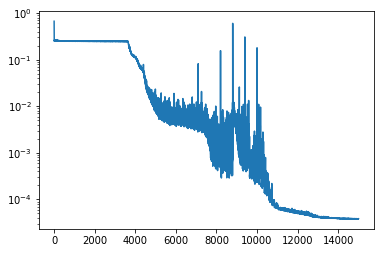

In [53]:
plt.semilogy(h.history['loss'] + h2.history['loss'])

In [36]:
# sn.clear_session()
T = sn.Variable('T')
U = sn.Functional('U', T, 4*[20], 'sin')
L1 = sn.diff(U, T, order=2) + Omega**2*U - F0*sn.sin(OmegaBar*T)
L2 = (1 - sn.sign(T)) * U
L3 = (1 - sn.sign(T)) * sn.diff(U, T)

In [37]:
Model = sn.SciModel([T], [sn.PDE(L1),L2,L3], optimizer='adam')

In [38]:
H = Model.train(
    t_data, 
    ['zeros', 'zeros', 'zeros'], 
    epochs=10000, 
    reduce_lr_after=200,
    adaptive_weights=100, 
    batch_size=100,
    verbose=1
)

Train on 2000 samples

+ adaptive_weights at epoch 0: [1.0, 134987.11, 361.76553]
Epoch 1/10000
2000/2000 [==============================] - 0s 24us/sample - loss: 2371.4576 - sub_4_loss: 662.7574 - mul_23_loss: 0.0031 - mul_24_loss: 3.5819
Epoch 2/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 287.1227 - sub_4_loss: 152.5604 - mul_23_loss: 3.9424e-04 - mul_24_loss: 0.2249
Epoch 3/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 138.0583 - sub_4_loss: 116.3989 - mul_23_loss: 2.3577e-05 - mul_24_loss: 0.0511
Epoch 4/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 93.8133 - sub_4_loss: 91.4013 - mul_23_loss: 1.2032e-06 - mul_24_loss: 0.0062
Epoch 5/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 76.2397 - sub_4_loss: 75.9167 - mul_23_loss: 9.0468e-07 - mul_24_loss: 5.5523e-04
Epoch 6/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 64.8613 - sub_4_loss: 64.8037

2000/2000 [==============================] - 0s 14us/sample - loss: 6.8907 - sub_4_loss: 6.8898 - mul_23_loss: 5.3753e-09 - mul_24_loss: 6.0127e-07
Epoch 51/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.6816 - sub_4_loss: 6.6801 - mul_23_loss: 3.8189e-09 - mul_24_loss: 2.8576e-06
Epoch 52/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.4200 - sub_4_loss: 6.4154 - mul_23_loss: 8.2127e-09 - mul_24_loss: 9.6175e-06
Epoch 53/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2880 - sub_4_loss: 6.2860 - mul_23_loss: 7.1175e-09 - mul_24_loss: 2.8950e-06
Epoch 54/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.1360 - sub_4_loss: 6.1325 - mul_23_loss: 7.4990e-09 - mul_24_loss: 7.0869e-06
Epoch 55/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.9106 - sub_4_loss: 5.9080 - mul_23_loss: 2.8295e-09 - mul_24_loss: 6.0606e-06
Epoch 56/10000
2000/2000 [===========

 100/2000 [>.............................] - ETA: 0s - loss: 2.2372 - sub_4_loss: 2.2355 - mul_23_loss: 1.8397e-10 - mul_24_loss: 4.8577e-06
+ adaptive_weights at epoch 99: [1.0, 121491.72, 353.0168]
2000/2000 [==============================] - 0s 17us/sample - loss: 1.9295 - sub_4_loss: 1.9285 - mul_23_loss: 3.1894e-09 - mul_24_loss: 1.6355e-06
Epoch 101/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8930 - sub_4_loss: 1.8923 - mul_23_loss: 2.6646e-09 - mul_24_loss: 1.1246e-06
Epoch 102/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8532 - sub_4_loss: 1.8517 - mul_23_loss: 3.7499e-09 - mul_24_loss: 2.8099e-06
Epoch 103/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.7977 - sub_4_loss: 1.7960 - mul_23_loss: 8.1672e-09 - mul_24_loss: 1.9003e-06
Epoch 104/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.7714 - sub_4_loss: 1.7700 - mul_23_loss: 8.7676e-09 - mul_24_loss: 9.5541e

2000/2000 [==============================] - 0s 13us/sample - loss: 0.8363 - sub_4_loss: 0.8351 - mul_23_loss: 5.5086e-09 - mul_24_loss: 1.3779e-06
Epoch 149/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.8373 - sub_4_loss: 0.8359 - mul_23_loss: 3.2653e-09 - mul_24_loss: 2.9461e-06
Epoch 150/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.8139 - sub_4_loss: 0.8124 - mul_23_loss: 5.5190e-09 - mul_24_loss: 2.2086e-06
Epoch 151/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.8190 - sub_4_loss: 0.8180 - mul_23_loss: 5.1272e-09 - mul_24_loss: 1.0185e-06
Epoch 152/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.8057 - sub_4_loss: 0.8043 - mul_23_loss: 4.5681e-09 - mul_24_loss: 2.2337e-06
Epoch 153/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.7996 - sub_4_loss: 0.7981 - mul_23_loss: 5.5476e-09 - mul_24_loss: 2.4415e-06
Epoch 154/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 14us/sample - loss: 0.4550 - sub_4_loss: 0.4515 - mul_23_loss: 1.1395e-08 - mul_24_loss: 5.8336e-06
Epoch 199/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.4532 - sub_4_loss: 0.4487 - mul_23_loss: 1.2993e-08 - mul_24_loss: 8.1008e-06
Epoch 200/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.4141 - sub_4_loss: 0.4065 - mul_23_loss: 4.1480e-08 - mul_24_loss: 7.2496e-06
+ adaptive_weights at epoch 199: [1.0, 109344.72, 318.8508]
2000/2000 [==============================] - 0s 17us/sample - loss: 0.4379 - sub_4_loss: 0.4354 - mul_23_loss: 1.0040e-08 - mul_24_loss: 3.4661e-06
Epoch 201/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.4316 - sub_4_loss: 0.4299 - mul_23_loss: 9.0041e-09 - mul_24_loss: 2.4848e-06
Epoch 202/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.4225 - sub_4_loss: 0.4206 - mul_23_loss: 7.7287e-09 - mul_24_loss: 3.2377

2000/2000 [==============================] - 0s 14us/sample - loss: 0.2910 - sub_4_loss: 0.2744 - mul_23_loss: 9.1042e-08 - mul_24_loss: 2.1054e-05
Epoch 247/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2717 - sub_4_loss: 0.2664 - mul_23_loss: 2.6504e-08 - mul_24_loss: 7.5142e-06
Epoch 248/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2661 - sub_4_loss: 0.2558 - mul_23_loss: 5.3868e-08 - mul_24_loss: 1.3640e-05
Epoch 249/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.2637 - sub_4_loss: 0.2534 - mul_23_loss: 5.6965e-08 - mul_24_loss: 1.2905e-05
Epoch 250/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.2500 - sub_4_loss: 0.2472 - mul_23_loss: 1.3559e-08 - mul_24_loss: 4.3411e-06
Epoch 251/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.2524 - sub_4_loss: 0.2471 - mul_23_loss: 2.3609e-08 - mul_24_loss: 8.2647e-06
Epoch 252/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 14us/sample - loss: 0.5165 - sub_4_loss: 0.2089 - mul_23_loss: 1.6061e-06 - mul_24_loss: 4.1397e-04
Epoch 297/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.1738 - sub_4_loss: 0.1476 - mul_23_loss: 1.2782e-07 - mul_24_loss: 3.8420e-05
Epoch 298/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1594 - sub_4_loss: 0.1426 - mul_23_loss: 8.7397e-08 - mul_24_loss: 2.2589e-05
Epoch 299/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1550 - sub_4_loss: 0.1486 - mul_23_loss: 3.5417e-08 - mul_24_loss: 7.7077e-06
Epoch 300/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.1207 - sub_4_loss: 0.1199 - mul_23_loss: 5.5720e-09 - mul_24_loss: 4.2759e-07
+ adaptive_weights at epoch 299: [1.0, 98412.414, 289.15506]
2000/2000 [==============================] - 0s 17us/sample - loss: 0.1427 - sub_4_loss: 0.1421 - mul_23_loss: 2.5640e-09 - mul_24_loss: 8.735

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0968 - sub_4_loss: 0.0851 - mul_23_loss: 5.2348e-08 - mul_24_loss: 2.2867e-05
Epoch 345/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1293 - sub_4_loss: 0.0897 - mul_23_loss: 2.2533e-07 - mul_24_loss: 6.0211e-05
Epoch 346/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.2446 - sub_4_loss: 0.1112 - mul_23_loss: 6.8345e-07 - mul_24_loss: 2.2871e-04
Epoch 347/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.3075 - sub_4_loss: 0.1241 - mul_23_loss: 9.8774e-07 - mul_24_loss: 2.9809e-04
Epoch 348/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.2796 - sub_4_loss: 0.2887 - mul_23_loss: 5.3378e-06 - mul_24_loss: 0.0016
Epoch 349/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.6519 - sub_4_loss: 0.6722 - mul_23_loss: 1.6091e-05 - mul_24_loss: 0.0048
Epoch 350/10000
2000/2000 [=============

2000/2000 [==============================] - 0s 16us/sample - loss: 0.3343 - sub_4_loss: 0.0966 - mul_23_loss: 1.2981e-06 - mul_24_loss: 3.7998e-04
Epoch 395/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.3938 - sub_4_loss: 0.1064 - mul_23_loss: 1.3617e-06 - mul_24_loss: 5.3053e-04
Epoch 396/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.7399 - sub_4_loss: 0.1508 - mul_23_loss: 3.0569e-06 - mul_24_loss: 9.9701e-04
Epoch 397/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1483 - sub_4_loss: 0.0643 - mul_23_loss: 4.1466e-07 - mul_24_loss: 1.4949e-04
Epoch 398/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1008 - sub_4_loss: 0.0563 - mul_23_loss: 3.7542e-07 - mul_24_loss: 2.6326e-05
Epoch 399/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0671 - sub_4_loss: 0.0538 - mul_23_loss: 8.9944e-08 - mul_24_loss: 1.5357e-05
Epoch 400/10000
 100/2000 [>....

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0557 - sub_4_loss: 0.0404 - mul_23_loss: 2.6702e-09 - mul_24_loss: 5.7823e-05
Epoch 443/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0453 - sub_4_loss: 0.0402 - mul_23_loss: 3.2569e-09 - mul_24_loss: 1.8338e-05
Epoch 444/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0456 - sub_4_loss: 0.0434 - mul_23_loss: 5.9891e-09 - mul_24_loss: 6.4525e-06
Epoch 445/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0479 - sub_4_loss: 0.0413 - mul_23_loss: 4.0563e-09 - mul_24_loss: 2.3666e-05
Epoch 446/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0529 - sub_4_loss: 0.0395 - mul_23_loss: 6.3578e-09 - mul_24_loss: 4.8834e-05
Epoch 447/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0462 - sub_4_loss: 0.0395 - mul_23_loss: 1.5393e-09 - mul_24_loss: 2.5211e-05
Epoch 448/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0421 - sub_4_loss: 0.0369 - mul_23_loss: 9.4351e-09 - mul_24_loss: 1.6625e-05
Epoch 493/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0477 - sub_4_loss: 0.0370 - mul_23_loss: 3.0883e-08 - mul_24_loss: 3.0619e-05
Epoch 494/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0456 - sub_4_loss: 0.0373 - mul_23_loss: 5.4589e-08 - mul_24_loss: 1.3110e-05
Epoch 495/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0449 - sub_4_loss: 0.0341 - mul_23_loss: 1.0605e-07 - mul_24_loss: 5.4039e-06
Epoch 496/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0424 - sub_4_loss: 0.0352 - mul_23_loss: 2.2366e-08 - mul_24_loss: 2.0056e-05
Epoch 497/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0528 - sub_4_loss: 0.0371 - mul_23_loss: 9.3124e-08 - mul_24_loss: 2.8439e-05
Epoch 498/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0493 - sub_4_loss: 0.0450 - mul_23_loss: 9.5425e-09 - mul_24_loss: 1.5082e-05
Epoch 541/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0396 - sub_4_loss: 0.0376 - mul_23_loss: 2.8106e-09 - mul_24_loss: 7.6265e-06
Epoch 542/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0361 - sub_4_loss: 0.0322 - mul_23_loss: 4.7418e-09 - mul_24_loss: 1.4938e-05
Epoch 543/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0390 - sub_4_loss: 0.0350 - mul_23_loss: 2.9568e-09 - mul_24_loss: 1.6239e-05
Epoch 544/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0338 - sub_4_loss: 0.0314 - mul_23_loss: 2.3742e-09 - mul_24_loss: 9.3116e-06
Epoch 545/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0338 - sub_4_loss: 0.0319 - mul_23_loss: 2.2157e-09 - mul_24_loss: 7.3191e-06
Epoch 546/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0812 - sub_4_loss: 0.0410 - mul_23_loss: 2.7403e-08 - mul_24_loss: 1.6151e-04
Epoch 591/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.1898 - sub_4_loss: 0.0387 - mul_23_loss: 9.4273e-08 - mul_24_loss: 6.0972e-04
Epoch 592/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.3203 - sub_4_loss: 0.0448 - mul_23_loss: 2.3068e-07 - mul_24_loss: 0.0011
Epoch 593/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.1681 - sub_4_loss: 0.0391 - mul_23_loss: 1.1090e-07 - mul_24_loss: 5.1041e-04
Epoch 594/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0603 - sub_4_loss: 0.0318 - mul_23_loss: 5.0893e-08 - mul_24_loss: 1.0351e-04
Epoch 595/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0362 - sub_4_loss: 0.0283 - mul_23_loss: 6.6171e-08 - mul_24_loss: 1.1059e-05
Epoch 596/10000
2000/2000 [=========

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0322 - sub_4_loss: 0.0262 - mul_23_loss: 2.7072e-08 - mul_24_loss: 1.8907e-05
Epoch 639/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0262 - sub_4_loss: 0.0251 - mul_23_loss: 5.7794e-09 - mul_24_loss: 3.2416e-06
Epoch 640/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0282 - sub_4_loss: 0.0271 - mul_23_loss: 6.3221e-09 - mul_24_loss: 3.1871e-06
Epoch 641/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0336 - sub_4_loss: 0.0268 - mul_23_loss: 1.4734e-08 - mul_24_loss: 2.7210e-05
Epoch 642/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0342 - sub_4_loss: 0.0238 - mul_23_loss: 3.2184e-08 - mul_24_loss: 3.7790e-05
Epoch 643/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0419 - sub_4_loss: 0.0230 - mul_23_loss: 5.1764e-08 - mul_24_loss: 7.0694e-05
Epoch 644/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0304 - sub_4_loss: 0.0239 - mul_23_loss: 2.7505e-08 - mul_24_loss: 2.1127e-05
Epoch 689/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0436 - sub_4_loss: 0.0262 - mul_23_loss: 9.1434e-08 - mul_24_loss: 5.0746e-05
Epoch 690/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0295 - sub_4_loss: 0.0254 - mul_23_loss: 1.4822e-08 - mul_24_loss: 1.4479e-05
Epoch 691/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0491 - sub_4_loss: 0.0303 - mul_23_loss: 9.3361e-08 - mul_24_loss: 5.6525e-05
Epoch 692/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.1358 - sub_4_loss: 0.0335 - mul_23_loss: 4.4208e-07 - mul_24_loss: 3.2883e-04
Epoch 693/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0721 - sub_4_loss: 0.0292 - mul_23_loss: 1.2797e-07 - mul_24_loss: 1.5741e-04
Epoch 694/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 16us/sample - loss: 0.0208 - sub_4_loss: 0.0186 - mul_23_loss: 6.2348e-09 - mul_24_loss: 9.5733e-06
Epoch 737/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0385 - sub_4_loss: 0.0233 - mul_23_loss: 4.0259e-08 - mul_24_loss: 6.5477e-05
Epoch 738/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0327 - sub_4_loss: 0.0230 - mul_23_loss: 2.8087e-08 - mul_24_loss: 4.1087e-05
Epoch 739/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0249 - sub_4_loss: 0.0213 - mul_23_loss: 1.2726e-08 - mul_24_loss: 1.4091e-05
Epoch 740/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0324 - sub_4_loss: 0.0213 - mul_23_loss: 5.4237e-08 - mul_24_loss: 3.9486e-05
Epoch 741/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0350 - sub_4_loss: 0.0212 - mul_23_loss: 4.3613e-08 - mul_24_loss: 5.6885e-05
Epoch 742/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0384 - sub_4_loss: 0.0226 - mul_23_loss: 2.0665e-07 - mul_24_loss: 1.2725e-05
Epoch 787/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0392 - sub_4_loss: 0.0210 - mul_23_loss: 2.5147e-07 - mul_24_loss: 1.0184e-05
Epoch 788/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0184 - sub_4_loss: 0.0175 - mul_23_loss: 1.0519e-08 - mul_24_loss: 1.4974e-06
Epoch 789/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0200 - sub_4_loss: 0.0171 - mul_23_loss: 2.9248e-08 - mul_24_loss: 5.1032e-06
Epoch 790/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0196 - sub_4_loss: 0.0173 - mul_23_loss: 1.6199e-08 - mul_24_loss: 6.5735e-06
Epoch 791/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0187 - sub_4_loss: 0.0164 - mul_23_loss: 1.3706e-08 - mul_24_loss: 7.6859e-06
Epoch 792/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0209 - sub_4_loss: 0.0193 - mul_23_loss: 1.2899e-08 - mul_24_loss: 4.4577e-06
Epoch 835/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0233 - sub_4_loss: 0.0216 - mul_23_loss: 1.2586e-08 - mul_24_loss: 5.5862e-06
Epoch 836/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0259 - sub_4_loss: 0.0230 - mul_23_loss: 1.0008e-08 - mul_24_loss: 1.3324e-05
Epoch 837/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0244 - sub_4_loss: 0.0192 - mul_23_loss: 1.1120e-08 - mul_24_loss: 2.5644e-05
Epoch 838/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0273 - sub_4_loss: 0.0187 - mul_23_loss: 5.7453e-08 - mul_24_loss: 2.9999e-05
Epoch 839/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0245 - sub_4_loss: 0.0186 - mul_23_loss: 6.6879e-08 - mul_24_loss: 1.1536e-05
Epoch 840/10000
2000/2000 [=====

Epoch 884/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0194 - sub_4_loss: 0.0155 - mul_23_loss: 2.8325e-08 - mul_24_loss: 1.3314e-05
Epoch 885/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0242 - sub_4_loss: 0.0141 - mul_23_loss: 5.2317e-08 - mul_24_loss: 4.0380e-05
Epoch 886/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0181 - sub_4_loss: 0.0145 - mul_23_loss: 3.5867e-08 - mul_24_loss: 8.6541e-06
Epoch 887/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0390 - sub_4_loss: 0.0156 - mul_23_loss: 1.5656e-07 - mul_24_loss: 8.1623e-05
Epoch 888/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0237 - sub_4_loss: 0.0188 - mul_23_loss: 1.6281e-08 - mul_24_loss: 2.2548e-05
Epoch 889/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0280 - sub_4_loss: 0.0217 - mul_23_loss: 1.1356e-08 - mul_24_loss: 3.2184e-05
Epoch 890/10000


2000/2000 [==============================] - 0s 14us/sample - loss: 0.0206 - sub_4_loss: 0.0189 - mul_23_loss: 4.7859e-09 - mul_24_loss: 9.3909e-06
Epoch 933/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0171 - sub_4_loss: 0.0150 - mul_23_loss: 1.4440e-08 - mul_24_loss: 8.2471e-06
Epoch 934/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0175 - sub_4_loss: 0.0132 - mul_23_loss: 5.2702e-08 - mul_24_loss: 9.8552e-06
Epoch 935/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0206 - sub_4_loss: 0.0134 - mul_23_loss: 1.0834e-07 - mul_24_loss: 9.6321e-06
Epoch 936/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0178 - sub_4_loss: 0.0129 - mul_23_loss: 5.9297e-08 - mul_24_loss: 1.1207e-05
Epoch 937/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0240 - sub_4_loss: 0.0130 - mul_23_loss: 6.5032e-08 - mul_24_loss: 4.7601e-05
Epoch 938/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0127 - sub_4_loss: 0.0103 - mul_23_loss: 3.0033e-08 - mul_24_loss: 4.9094e-06
Epoch 983/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0124 - sub_4_loss: 0.0111 - mul_23_loss: 1.8707e-08 - mul_24_loss: 1.8388e-06
Epoch 984/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0170 - sub_4_loss: 0.0130 - mul_23_loss: 7.3910e-08 - mul_24_loss: 1.2325e-06
Epoch 985/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0172 - sub_4_loss: 0.0139 - mul_23_loss: 4.9018e-08 - mul_24_loss: 4.6217e-06
Epoch 986/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0208 - sub_4_loss: 0.0158 - mul_23_loss: 5.1856e-08 - mul_24_loss: 1.4577e-05
Epoch 987/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0299 - sub_4_loss: 0.0141 - mul_23_loss: 2.8934e-07 - mul_24_loss: 4.1118e-06
Epoch 988/10000
2000/2000 [=====

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0113 - sub_4_loss: 0.0106 - mul_23_loss: 7.6229e-10 - mul_24_loss: 4.1982e-06
Epoch 1031/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0124 - sub_4_loss: 0.0116 - mul_23_loss: 5.1070e-10 - mul_24_loss: 5.3061e-06
Epoch 1032/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0173 - sub_4_loss: 0.0160 - mul_23_loss: 2.7785e-09 - mul_24_loss: 8.4712e-06
Epoch 1033/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0150 - sub_4_loss: 0.0140 - mul_23_loss: 3.8355e-09 - mul_24_loss: 6.0640e-06
Epoch 1034/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0139 - sub_4_loss: 0.0127 - mul_23_loss: 1.2091e-09 - mul_24_loss: 7.7922e-06
Epoch 1035/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0139 - sub_4_loss: 0.0134 - mul_23_loss: 4.5560e-09 - mul_24_loss: 2.1688e-06
Epoch 1036/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0096 - sub_4_loss: 0.0092 - mul_23_loss: 4.3639e-09 - mul_24_loss: 1.4956e-06
Epoch 1080/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0131 - sub_4_loss: 0.0129 - mul_23_loss: 3.6338e-09 - mul_24_loss: 6.8888e-07
Epoch 1081/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0110 - sub_4_loss: 0.0104 - mul_23_loss: 6.8018e-09 - mul_24_loss: 2.1603e-06
Epoch 1082/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0099 - sub_4_loss: 0.0091 - mul_23_loss: 1.1573e-08 - mul_24_loss: 1.9305e-06
Epoch 1083/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0110 - sub_4_loss: 0.0082 - mul_23_loss: 4.0329e-08 - mul_24_loss: 6.9757e-06
Epoch 1084/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0110 - sub_4_loss: 0.0077 - mul_23_loss: 4.6983e-08 - mul_24_loss: 7.2881e-06
Epoch 1085/10000
2000/2000 

2000/2000 [==============================] - 0s 16us/sample - loss: 0.0164 - sub_4_loss: 0.0104 - mul_23_loss: 1.3264e-07 - mul_24_loss: 2.8743e-06
Epoch 1128/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0099 - sub_4_loss: 0.0077 - mul_23_loss: 4.5022e-08 - mul_24_loss: 2.3658e-06
Epoch 1129/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0097 - sub_4_loss: 0.0081 - mul_23_loss: 1.8032e-08 - mul_24_loss: 6.9122e-06
Epoch 1130/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0094 - sub_4_loss: 0.0068 - mul_23_loss: 1.2224e-08 - mul_24_loss: 1.5625e-05
Epoch 1131/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0074 - sub_4_loss: 0.0066 - mul_23_loss: 6.2854e-09 - mul_24_loss: 4.3147e-06
Epoch 1132/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0082 - sub_4_loss: 0.0080 - mul_23_loss: 6.0990e-10 - mul_24_loss: 1.7214e-06
Epoch 1133/10000
2000/2000 

2000/2000 [==============================] - 0s 16us/sample - loss: 0.0155 - sub_4_loss: 0.0097 - mul_23_loss: 1.0655e-07 - mul_24_loss: 9.9473e-06
Epoch 1177/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0093 - sub_4_loss: 0.0077 - mul_23_loss: 1.4930e-08 - mul_24_loss: 7.3991e-06
Epoch 1178/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0075 - sub_4_loss: 0.0061 - mul_23_loss: 1.3383e-08 - mul_24_loss: 5.9921e-06
Epoch 1179/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0065 - sub_4_loss: 0.0056 - mul_23_loss: 1.9214e-08 - mul_24_loss: 8.5896e-07
Epoch 1180/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0075 - sub_4_loss: 0.0051 - mul_23_loss: 2.9904e-08 - mul_24_loss: 8.6683e-06
Epoch 1181/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0109 - sub_4_loss: 0.0052 - mul_23_loss: 4.9801e-08 - mul_24_loss: 2.7629e-05
Epoch 1182/10000
2000/2000 

2000/2000 [==============================] - 0s 17us/sample - loss: 0.0113 - sub_4_loss: 0.0098 - mul_23_loss: 1.8177e-09 - mul_24_loss: 1.1988e-05
Epoch 1225/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0078 - sub_4_loss: 0.0074 - mul_23_loss: 2.3372e-09 - mul_24_loss: 2.9180e-06
Epoch 1226/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0065 - sub_4_loss: 0.0059 - mul_23_loss: 6.6907e-09 - mul_24_loss: 2.5950e-06
Epoch 1227/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0085 - sub_4_loss: 0.0075 - mul_23_loss: 3.2043e-09 - mul_24_loss: 7.1310e-06
Epoch 1228/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0089 - sub_4_loss: 0.0081 - mul_23_loss: 7.5541e-10 - mul_24_loss: 6.4948e-06
Epoch 1229/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0081 - sub_4_loss: 0.0078 - mul_23_loss: 2.4630e-09 - mul_24_loss: 2.0530e-06
Epoch 1230/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0078 - sub_4_loss: 0.0065 - mul_23_loss: 3.0401e-10 - mul_24_loss: 1.1479e-05
Epoch 1274/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0064 - sub_4_loss: 0.0059 - mul_23_loss: 5.1221e-09 - mul_24_loss: 2.2182e-06
Epoch 1275/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0076 - sub_4_loss: 0.0060 - mul_23_loss: 3.0833e-08 - mul_24_loss: 3.1752e-06
Epoch 1276/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0071 - sub_4_loss: 0.0053 - mul_23_loss: 2.7173e-08 - mul_24_loss: 6.1540e-06
Epoch 1277/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0103 - sub_4_loss: 0.0071 - mul_23_loss: 5.1029e-08 - mul_24_loss: 1.0880e-05
Epoch 1278/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0148 - sub_4_loss: 0.0113 - mul_23_loss: 6.8119e-08 - mul_24_loss: 6.9994e-06
Epoch 1279/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0063 - sub_4_loss: 0.0056 - mul_23_loss: 1.4042e-08 - mul_24_loss: 2.1606e-06
Epoch 1322/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0051 - sub_4_loss: 0.0048 - mul_23_loss: 1.0936e-09 - mul_24_loss: 2.2904e-06
Epoch 1323/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0065 - sub_4_loss: 0.0054 - mul_23_loss: 1.0838e-09 - mul_24_loss: 9.2410e-06
Epoch 1324/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0100 - sub_4_loss: 0.0061 - mul_23_loss: 9.3436e-09 - mul_24_loss: 3.3289e-05
Epoch 1325/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0107 - sub_4_loss: 0.0060 - mul_23_loss: 4.6487e-08 - mul_24_loss: 2.8870e-05
Epoch 1326/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0079 - sub_4_loss: 0.0067 - mul_23_loss: 1.5012e-08 - mul_24_loss: 6.3019e-06
Epoch 1327/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0156 - sub_4_loss: 0.0106 - mul_23_loss: 9.0772e-08 - mul_24_loss: 1.6930e-05
Epoch 1371/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0107 - sub_4_loss: 0.0094 - mul_23_loss: 1.9058e-08 - mul_24_loss: 5.8013e-06
Epoch 1372/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0075 - sub_4_loss: 0.0073 - mul_23_loss: 3.9238e-09 - mul_24_loss: 8.0417e-07
Epoch 1373/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0078 - sub_4_loss: 0.0075 - mul_23_loss: 2.9906e-09 - mul_24_loss: 1.7926e-06
Epoch 1374/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0090 - sub_4_loss: 0.0083 - mul_23_loss: 8.3851e-09 - mul_24_loss: 3.3866e-06
Epoch 1375/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0092 - sub_4_loss: 0.0066 - mul_23_loss: 2.5443e-08 - mul_24_loss: 1.6111e-05
Epoch 1376/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0049 - sub_4_loss: 0.0047 - mul_23_loss: 2.7300e-09 - mul_24_loss: 6.8032e-07
Epoch 1419/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0045 - sub_4_loss: 0.0042 - mul_23_loss: 5.4068e-09 - mul_24_loss: 7.0707e-07
Epoch 1420/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0054 - sub_4_loss: 0.0047 - mul_23_loss: 3.9484e-09 - mul_24_loss: 5.4415e-06
Epoch 1421/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0176 - sub_4_loss: 0.0046 - mul_23_loss: 3.6315e-07 - mul_24_loss: 1.7543e-05
Epoch 1422/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0391 - sub_4_loss: 0.0050 - mul_23_loss: 9.2602e-07 - mul_24_loss: 5.5749e-05
Epoch 1423/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0202 - sub_4_loss: 0.0055 - mul_23_loss: 3.4243e-07 - mul_24_loss: 4.1965e-05
Epoch 1424/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_4_loss: 0.0051 - mul_23_loss: 2.5027e-09 - mul_24_loss: 8.4578e-07
Epoch 1468/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0050 - sub_4_loss: 0.0048 - mul_23_loss: 2.4342e-09 - mul_24_loss: 9.6916e-07
Epoch 1469/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0051 - sub_4_loss: 0.0047 - mul_23_loss: 3.3391e-09 - mul_24_loss: 2.6247e-06
Epoch 1470/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0077 - sub_4_loss: 0.0037 - mul_23_loss: 1.1719e-07 - mul_24_loss: 4.3970e-06
Epoch 1471/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0105 - sub_4_loss: 0.0046 - mul_23_loss: 1.3519e-07 - mul_24_loss: 1.7677e-05
Epoch 1472/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0106 - sub_4_loss: 0.0050 - mul_23_loss: 8.7845e-08 - mul_24_loss: 2.9818e-05
Epoch 1473/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0049 - sub_4_loss: 0.0046 - mul_23_loss: 8.3013e-10 - mul_24_loss: 2.9057e-06
Epoch 1516/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0053 - sub_4_loss: 0.0051 - mul_23_loss: 1.6656e-09 - mul_24_loss: 1.3080e-06
Epoch 1517/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0055 - sub_4_loss: 0.0052 - mul_23_loss: 3.3396e-09 - mul_24_loss: 2.5246e-06
Epoch 1518/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0084 - sub_4_loss: 0.0054 - mul_23_loss: 8.3310e-08 - mul_24_loss: 7.7848e-06
Epoch 1519/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0087 - sub_4_loss: 0.0052 - mul_23_loss: 1.1025e-07 - mul_24_loss: 4.4702e-06
Epoch 1520/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0077 - sub_4_loss: 0.0066 - mul_23_loss: 2.4235e-09 - mul_24_loss: 1.1484e-05
Epoch 1521/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0039 - sub_4_loss: 0.0034 - mul_23_loss: 1.0261e-08 - mul_24_loss: 1.8725e-06
Epoch 1565/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0036 - sub_4_loss: 0.0032 - mul_23_loss: 1.1875e-08 - mul_24_loss: 8.3708e-07
Epoch 1566/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0049 - sub_4_loss: 0.0046 - mul_23_loss: 2.3562e-09 - mul_24_loss: 2.9310e-06
Epoch 1567/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0048 - sub_4_loss: 0.0047 - mul_23_loss: 4.4284e-10 - mul_24_loss: 4.7214e-07
Epoch 1568/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0083 - sub_4_loss: 0.0039 - mul_23_loss: 1.5565e-07 - mul_24_loss: 2.8905e-07
Epoch 1569/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0089 - sub_4_loss: 0.0055 - mul_23_loss: 1.1654e-07 - mul_24_loss: 1.0549e-06
Epoch 1570/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0043 - sub_4_loss: 0.0041 - mul_23_loss: 2.9328e-09 - mul_24_loss: 5.7878e-07
Epoch 1613/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0050 - sub_4_loss: 0.0047 - mul_23_loss: 8.3049e-09 - mul_24_loss: 1.5952e-06
Epoch 1614/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0072 - sub_4_loss: 0.0051 - mul_23_loss: 6.4984e-08 - mul_24_loss: 5.5821e-06
Epoch 1615/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0111 - sub_4_loss: 0.0054 - mul_23_loss: 1.9939e-07 - mul_24_loss: 8.3145e-06
Epoch 1616/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0095 - sub_4_loss: 0.0066 - mul_23_loss: 3.0881e-09 - mul_24_loss: 3.1713e-05
Epoch 1617/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 0.0077 - sub_4_loss: 0.0049 - mul_23_loss: 2.6096e-09 - mul_24_loss: 3.1546e-05
Epoch 1618/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0037 - sub_4_loss: 0.0032 - mul_23_loss: 8.0544e-09 - mul_24_loss: 3.6527e-06
Epoch 1662/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0031 - sub_4_loss: 0.0029 - mul_23_loss: 6.0974e-09 - mul_24_loss: 3.5745e-07
Epoch 1663/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0037 - sub_4_loss: 0.0036 - mul_23_loss: 2.8178e-09 - mul_24_loss: 4.5243e-07
Epoch 1664/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0041 - sub_4_loss: 0.0039 - mul_23_loss: 4.7917e-09 - mul_24_loss: 1.0101e-06
Epoch 1665/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0051 - sub_4_loss: 0.0045 - mul_23_loss: 1.7683e-08 - mul_24_loss: 2.2383e-06
Epoch 1666/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0039 - sub_4_loss: 0.0036 - mul_23_loss: 1.2793e-08 - mul_24_loss: 6.7188e-07
Epoch 1667/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0031 - sub_4_loss: 0.0029 - mul_23_loss: 3.7221e-09 - mul_24_loss: 8.4959e-07
Epoch 1710/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0029 - sub_4_loss: 0.0023 - mul_23_loss: 1.9696e-08 - mul_24_loss: 2.2412e-06
Epoch 1711/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0036 - sub_4_loss: 0.0031 - mul_23_loss: 2.1589e-08 - mul_24_loss: 4.8791e-07
Epoch 1712/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0038 - sub_4_loss: 0.0029 - mul_23_loss: 3.0747e-08 - mul_24_loss: 2.8320e-06
Epoch 1713/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0035 - sub_4_loss: 0.0030 - mul_23_loss: 1.9666e-08 - mul_24_loss: 6.5580e-07
Epoch 1714/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0032 - sub_4_loss: 0.0028 - mul_23_loss: 1.4922e-08 - mul_24_loss: 1.6595e-06
Epoch 1715/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0032 - sub_4_loss: 0.0029 - mul_23_loss: 5.7913e-10 - mul_24_loss: 3.4623e-06
Epoch 1759/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0029 - sub_4_loss: 0.0024 - mul_23_loss: 3.5759e-10 - mul_24_loss: 6.0640e-06
Epoch 1760/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0030 - sub_4_loss: 0.0029 - mul_23_loss: 2.1561e-09 - mul_24_loss: 3.3585e-07
Epoch 1761/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0036 - sub_4_loss: 0.0028 - mul_23_loss: 3.3794e-08 - mul_24_loss: 5.3213e-07
Epoch 1762/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0045 - sub_4_loss: 0.0031 - mul_23_loss: 5.2480e-08 - mul_24_loss: 3.4688e-06
Epoch 1763/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0045 - sub_4_loss: 0.0030 - mul_23_loss: 6.0514e-08 - mul_24_loss: 1.5590e-06
Epoch 1764/10000
2000/2000 

2000/2000 [==============================] - 0s 16us/sample - loss: 0.0046 - sub_4_loss: 0.0044 - mul_23_loss: 3.1284e-09 - mul_24_loss: 2.3713e-06
Epoch 1807/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0047 - sub_4_loss: 0.0045 - mul_23_loss: 1.6283e-09 - mul_24_loss: 2.0788e-06
Epoch 1808/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0038 - sub_4_loss: 0.0036 - mul_23_loss: 2.4039e-09 - mul_24_loss: 2.5707e-06
Epoch 1809/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0030 - sub_4_loss: 0.0028 - mul_23_loss: 2.6068e-09 - mul_24_loss: 1.4246e-06
Epoch 1810/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0029 - sub_4_loss: 0.0028 - mul_23_loss: 1.2688e-09 - mul_24_loss: 5.9109e-07
Epoch 1811/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0031 - sub_4_loss: 0.0031 - mul_23_loss: 6.4521e-11 - mul_24_loss: 7.9147e-07
Epoch 1812/10000
2000/2000 

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0045 - sub_4_loss: 0.0023 - mul_23_loss: 1.0472e-07 - mul_24_loss: 7.1550e-07
Epoch 1856/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0028 - sub_4_loss: 0.0024 - mul_23_loss: 1.5347e-08 - mul_24_loss: 1.0183e-06
Epoch 1857/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0027 - sub_4_loss: 0.0025 - mul_23_loss: 1.0078e-08 - mul_24_loss: 4.6693e-07
Epoch 1858/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0032 - sub_4_loss: 0.0031 - mul_23_loss: 7.4410e-09 - mul_24_loss: 3.3206e-07
Epoch 1859/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0028 - sub_4_loss: 0.0028 - mul_23_loss: 4.8233e-10 - mul_24_loss: 3.9234e-07
Epoch 1860/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0027 - sub_4_loss: 0.0025 - mul_23_loss: 7.2171e-10 - mul_24_loss: 2.1208e-06
Epoch 1861/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0025 - sub_4_loss: 0.0024 - mul_23_loss: 1.8880e-09 - mul_24_loss: 8.2128e-07
Epoch 1904/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0024 - sub_4_loss: 0.0023 - mul_23_loss: 1.0833e-09 - mul_24_loss: 3.7056e-07
Epoch 1905/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0021 - sub_4_loss: 0.0020 - mul_23_loss: 3.1730e-10 - mul_24_loss: 9.1219e-07
Epoch 1906/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0023 - sub_4_loss: 0.0021 - mul_23_loss: 9.0884e-10 - mul_24_loss: 2.1727e-06
Epoch 1907/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0020 - sub_4_loss: 0.0020 - mul_23_loss: 1.1568e-09 - mul_24_loss: 3.6717e-07
Epoch 1908/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0029 - sub_4_loss: 0.0027 - mul_23_loss: 5.8462e-09 - mul_24_loss: 6.6597e-07
Epoch 1909/10000
2000/2000 

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0057 - sub_4_loss: 0.0028 - mul_23_loss: 1.5272e-07 - mul_24_loss: 9.5138e-07
Epoch 1953/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0030 - sub_4_loss: 0.0025 - mul_23_loss: 2.6443e-08 - mul_24_loss: 7.3910e-07
Epoch 1954/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0042 - sub_4_loss: 0.0025 - mul_23_loss: 8.9753e-08 - mul_24_loss: 1.2456e-06
Epoch 1955/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0025 - sub_4_loss: 0.0023 - mul_23_loss: 7.8869e-09 - mul_24_loss: 9.3503e-07
Epoch 1956/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0023 - sub_4_loss: 0.0021 - mul_23_loss: 8.6062e-10 - mul_24_loss: 1.5456e-06
Epoch 1957/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0022 - sub_4_loss: 0.0020 - mul_23_loss: 4.9591e-09 - mul_24_loss: 2.1096e-06
Epoch 1958/10000
2000/2000 

Epoch 2001/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0021 - sub_4_loss: 0.0020 - mul_23_loss: 7.0208e-10 - mul_24_loss: 1.4688e-06
Epoch 2002/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 0.0022 - sub_4_loss: 0.0021 - mul_23_loss: 7.8402e-10 - mul_24_loss: 7.4490e-07
Epoch 2003/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0024 - sub_4_loss: 0.0022 - mul_23_loss: 3.4837e-10 - mul_24_loss: 3.5391e-06
Epoch 2004/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0021 - sub_4_loss: 0.0020 - mul_23_loss: 3.3456e-10 - mul_24_loss: 7.5054e-07
Epoch 2005/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0024 - sub_4_loss: 0.0024 - mul_23_loss: 2.9864e-10 - mul_24_loss: 2.7063e-07
Epoch 2006/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0028 - sub_4_loss: 0.0027 - mul_23_loss: 1.9938e-09 - mul_24_loss: 3.2061e-07
Epoch 2007

2000/2000 [==============================] - 0s 13us/sample - loss: 0.0018 - sub_4_loss: 0.0017 - mul_23_loss: 1.0665e-09 - mul_24_loss: 9.1349e-07
Epoch 2051/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - sub_4_loss: 0.0016 - mul_23_loss: 5.4914e-09 - mul_24_loss: 4.7503e-07
Epoch 2052/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0020 - sub_4_loss: 0.0015 - mul_23_loss: 2.4553e-08 - mul_24_loss: 1.5734e-06
Epoch 2053/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0023 - sub_4_loss: 0.0018 - mul_23_loss: 3.0889e-08 - mul_24_loss: 9.3438e-07
Epoch 2054/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0018 - sub_4_loss: 0.0017 - mul_23_loss: 1.1857e-09 - mul_24_loss: 2.6925e-07
Epoch 2055/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0015 - sub_4_loss: 0.0014 - mul_23_loss: 3.7934e-09 - mul_24_loss: 5.3810e-07
Epoch 2056/10000
2000/2000 

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - sub_4_loss: 0.0016 - mul_23_loss: 2.9242e-09 - mul_24_loss: 6.3762e-07
Epoch 2100/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0017 - sub_4_loss: 0.0015 - mul_23_loss: 8.9415e-09 - mul_24_loss: 1.3505e-06
+ adaptive_weights at epoch 2099: [1.0, 14785.35, 69.0276]
2000/2000 [==============================] - 0s 20us/sample - loss: 0.0013 - sub_4_loss: 0.0012 - mul_23_loss: 3.1725e-09 - mul_24_loss: 2.7470e-07
Epoch 2101/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0013 - sub_4_loss: 0.0013 - mul_23_loss: 1.2914e-09 - mul_24_loss: 6.3854e-07
Epoch 2102/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - sub_4_loss: 0.0012 - mul_23_loss: 1.6830e-09 - mul_24_loss: 9.4155e-07 
Epoch 2103/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - sub_4_loss: 0.0011 - mul_23_loss: 2.5038e-09 - mul_24_loss: 4.

2000/2000 [==============================] - 0s 14us/sample - loss: 9.6078e-04 - sub_4_loss: 9.0543e-04 - mul_23_loss: 2.2961e-09 - mul_24_loss: 3.0992e-07
Epoch 2148/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0011 - sub_4_loss: 0.0010 - mul_23_loss: 4.8397e-09 - mul_24_loss: 4.4912e-07 
Epoch 2149/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0011 - sub_4_loss: 9.7520e-04 - mul_23_loss: 5.8616e-09 - mul_24_loss: 1.2722e-06
Epoch 2150/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0012 - sub_4_loss: 9.5766e-04 - mul_23_loss: 2.5684e-09 - mul_24_loss: 2.8925e-06
Epoch 2151/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.7080e-04 - sub_4_loss: 8.2924e-04 - mul_23_loss: 1.7051e-10 - mul_24_loss: 5.6552e-07
Epoch 2152/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.8273e-04 - sub_4_loss: 8.5427e-04 - mul_23_loss: 4.8088e-10 - mul_24_loss: 3.092

2000/2000 [==============================] - 0s 14us/sample - loss: 0.0020 - sub_4_loss: 0.0019 - mul_23_loss: 1.2943e-09 - mul_24_loss: 2.3138e-06
Epoch 2197/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0015 - sub_4_loss: 0.0014 - mul_23_loss: 4.9479e-10 - mul_24_loss: 2.1206e-06
Epoch 2198/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - sub_4_loss: 0.0014 - mul_23_loss: 2.8365e-09 - mul_24_loss: 3.5855e-06
Epoch 2199/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0019 - sub_4_loss: 0.0013 - mul_23_loss: 3.3167e-08 - mul_24_loss: 1.9874e-06
Epoch 2200/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0037 - sub_4_loss: 0.0014 - mul_23_loss: 1.4994e-07 - mul_24_loss: 9.9405e-07
+ adaptive_weights at epoch 2199: [1.0, 13307.22, 63.778606]
2000/2000 [==============================] - 0s 19us/sample - loss: 0.0017 - sub_4_loss: 0.0012 - mul_23_loss: 2.9232e-08 - mul_24_loss: 1

2000/2000 [==============================] - 0s 13us/sample - loss: 9.1431e-04 - sub_4_loss: 8.8770e-04 - mul_23_loss: 7.1986e-10 - mul_24_loss: 2.6691e-07
Epoch 2244/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.3976e-04 - sub_4_loss: 9.0886e-04 - mul_23_loss: 6.2046e-10 - mul_24_loss: 3.5493e-07
Epoch 2245/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.1177e-04 - sub_4_loss: 8.3130e-04 - mul_23_loss: 3.2789e-09 - mul_24_loss: 5.7758e-07
Epoch 2246/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - sub_4_loss: 9.2078e-04 - mul_23_loss: 3.3351e-09 - mul_24_loss: 9.3548e-07
Epoch 2247/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - sub_4_loss: 0.0012 - mul_23_loss: 1.5627e-09 - mul_24_loss: 5.8276e-07 
Epoch 2248/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0018 - sub_4_loss: 0.0017 - mul_23_loss: 1.6879e-09 - mul_24_loss: 2.0429e-0

2000/2000 [==============================] - 0s 15us/sample - loss: 7.1007e-04 - sub_4_loss: 6.2349e-04 - mul_23_loss: 7.6135e-10 - mul_24_loss: 1.1987e-06
Epoch 2292/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.8959e-04 - sub_4_loss: 7.2902e-04 - mul_23_loss: 1.1531e-09 - mul_24_loss: 3.8450e-06
Epoch 2293/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - sub_4_loss: 8.0957e-04 - mul_23_loss: 1.2865e-08 - mul_24_loss: 5.9260e-07
Epoch 2294/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0017 - sub_4_loss: 5.0596e-04 - mul_23_loss: 9.0486e-08 - mul_24_loss: 1.3498e-07
Epoch 2295/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0026 - sub_4_loss: 7.0166e-04 - mul_23_loss: 1.4200e-07 - mul_24_loss: 2.0156e-07
Epoch 2296/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0042 - sub_4_loss: 7.4160e-04 - mul_23_loss: 2.4836e-07 - mul_24_loss: 1.7031

2000/2000 [==============================] - 0s 15us/sample - loss: 6.8334e-04 - sub_4_loss: 5.3258e-04 - mul_23_loss: 4.9891e-09 - mul_24_loss: 1.4756e-06
Epoch 2339/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.9834e-04 - sub_4_loss: 8.0158e-04 - mul_23_loss: 1.9872e-09 - mul_24_loss: 2.8045e-06
Epoch 2340/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0013 - sub_4_loss: 0.0012 - mul_23_loss: 5.9813e-09 - mul_24_loss: 1.0215e-06
Epoch 2341/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - sub_4_loss: 0.0011 - mul_23_loss: 8.6618e-09 - mul_24_loss: 6.8093e-07 
Epoch 2342/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0019 - sub_4_loss: 0.0014 - mul_23_loss: 3.4359e-08 - mul_24_loss: 1.1150e-06
Epoch 2343/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0025 - sub_4_loss: 0.0023 - mul_23_loss: 8.3475e-09 - mul_24_loss: 2.2841e-06
Epoch 2344

2000/2000 [==============================] - 0s 12us/sample - loss: 0.0021 - sub_4_loss: 0.0019 - mul_23_loss: 1.4459e-08 - mul_24_loss: 1.1076e-06
Epoch 2387/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0023 - sub_4_loss: 0.0019 - mul_23_loss: 2.2924e-08 - mul_24_loss: 1.7925e-06
Epoch 2388/10000
2000/2000 [==============================] - 0s 19us/sample - loss: 0.0027 - sub_4_loss: 0.0023 - mul_23_loss: 2.4979e-08 - mul_24_loss: 1.3031e-06
Epoch 2389/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0018 - sub_4_loss: 0.0017 - mul_23_loss: 5.3936e-09 - mul_24_loss: 7.4085e-07
Epoch 2390/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0012 - sub_4_loss: 9.1416e-04 - mul_23_loss: 2.2266e-08 - mul_24_loss: 9.6924e-07
Epoch 2391/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 8.8485e-04 - sub_4_loss: 7.9585e-04 - mul_23_loss: 1.7222e-09 - mul_24_loss: 1.1086e-06
Epoch 2392/1000

2000/2000 [==============================] - 0s 13us/sample - loss: 6.7711e-04 - sub_4_loss: 5.7446e-04 - mul_23_loss: 2.0591e-09 - mul_24_loss: 1.3588e-06
Epoch 2433/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4877e-04 - sub_4_loss: 4.8484e-04 - mul_23_loss: 4.8197e-10 - mul_24_loss: 9.9204e-07
Epoch 2434/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.1430e-04 - sub_4_loss: 3.7945e-04 - mul_23_loss: 1.4473e-09 - mul_24_loss: 3.2516e-07
Epoch 2435/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.9002e-04 - sub_4_loss: 4.4921e-04 - mul_23_loss: 2.4022e-09 - mul_24_loss: 2.5185e-07
Epoch 2436/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.6275e-04 - sub_4_loss: 4.2371e-04 - mul_23_loss: 9.9223e-09 - mul_24_loss: 5.4168e-07
Epoch 2437/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.1677e-04 - sub_4_loss: 5.0333e-04 - mul_23_loss: 4.1929e-09 - mul

2000/2000 [==============================] - 0s 15us/sample - loss: 6.2169e-04 - sub_4_loss: 4.4468e-04 - mul_23_loss: 1.2576e-08 - mul_24_loss: 6.9979e-07
Epoch 2480/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.8189e-04 - sub_4_loss: 7.0128e-04 - mul_23_loss: 4.0390e-09 - mul_24_loss: 6.2603e-07
Epoch 2481/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.9143e-04 - sub_4_loss: 5.6005e-04 - mul_23_loss: 2.4846e-09 - mul_24_loss: 1.7666e-06
Epoch 2482/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 4.5033e-04 - sub_4_loss: 3.4324e-04 - mul_23_loss: 7.4788e-09 - mul_24_loss: 4.4712e-07
Epoch 2483/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.5140e-04 - sub_4_loss: 4.8515e-04 - mul_23_loss: 3.5485e-08 - mul_24_loss: 1.4139e-06
Epoch 2484/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.9575e-04 - sub_4_loss: 7.1583e-04 - mul_23_loss: 1.1047e-08 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 2.5925e-04 - sub_4_loss: 2.3328e-04 - mul_23_loss: 7.1052e-11 - mul_24_loss: 3.7031e-07
Epoch 2527/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.9564e-04 - sub_4_loss: 3.6717e-04 - mul_23_loss: 1.5783e-10 - mul_24_loss: 3.9454e-07
Epoch 2528/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.7951e-04 - sub_4_loss: 6.3517e-04 - mul_23_loss: 6.6908e-10 - mul_24_loss: 5.5421e-07
Epoch 2529/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.9169e-04 - sub_4_loss: 8.1427e-04 - mul_23_loss: 1.2765e-09 - mul_24_loss: 9.5232e-07
Epoch 2530/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0013 - sub_4_loss: 8.3104e-04 - mul_23_loss: 4.3639e-08 - mul_24_loss: 1.2681e-06
Epoch 2531/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0011 - sub_4_loss: 6.4262e-04 - mul_23_loss: 2.9798e-08 - mul_24_loss

2000/2000 [==============================] - 0s 15us/sample - loss: 0.0019 - sub_4_loss: 0.0014 - mul_23_loss: 1.9179e-08 - mul_24_loss: 3.6363e-06
Epoch 2575/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0020 - sub_4_loss: 0.0016 - mul_23_loss: 2.0820e-09 - mul_24_loss: 4.4601e-06
Epoch 2576/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.4099e-04 - sub_4_loss: 8.0981e-04 - mul_23_loss: 6.9729e-09 - mul_24_loss: 9.3033e-07
Epoch 2577/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.2329e-04 - sub_4_loss: 4.4052e-04 - mul_23_loss: 4.9735e-09 - mul_24_loss: 5.0538e-07
Epoch 2578/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 4.2374e-04 - sub_4_loss: 3.6304e-04 - mul_23_loss: 4.3049e-09 - mul_24_loss: 2.7731e-07
Epoch 2579/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8346e-04 - sub_4_loss: 3.3227e-04 - mul_23_loss: 3.9559e-09 - mul_24_loss: 1.8756

2000/2000 [==============================] - 0s 14us/sample - loss: 6.5622e-04 - sub_4_loss: 5.3438e-04 - mul_23_loss: 3.1076e-09 - mul_24_loss: 1.3230e-06
Epoch 2621/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.4897e-04 - sub_4_loss: 4.1066e-04 - mul_23_loss: 1.7308e-09 - mul_24_loss: 3.2402e-07
Epoch 2622/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.5637e-04 - sub_4_loss: 3.3737e-04 - mul_23_loss: 3.5731e-10 - mul_24_loss: 2.2192e-07
Epoch 2623/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.4383e-04 - sub_4_loss: 4.0440e-04 - mul_23_loss: 2.6716e-09 - mul_24_loss: 2.2497e-07
Epoch 2624/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.5545e-04 - sub_4_loss: 4.0404e-04 - mul_23_loss: 3.2307e-09 - mul_24_loss: 3.2415e-07
Epoch 2625/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.5065e-04 - sub_4_loss: 3.2558e-04 - mul_23_loss: 7.4730e-10 - mul

Epoch 2668/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.9298e-04 - sub_4_loss: 8.3309e-04 - mul_23_loss: 1.4558e-09 - mul_24_loss: 6.5897e-07
Epoch 2669/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.5411e-04 - sub_4_loss: 8.2860e-04 - mul_23_loss: 1.0739e-08 - mul_24_loss: 4.4321e-07
Epoch 2670/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0011 - sub_4_loss: 9.3038e-04 - mul_23_loss: 1.5318e-08 - mul_24_loss: 3.8481e-07
Epoch 2671/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0010 - sub_4_loss: 8.2325e-04 - mul_23_loss: 1.9039e-08 - mul_24_loss: 3.3517e-07
Epoch 2672/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.9389e-04 - sub_4_loss: 4.4653e-04 - mul_23_loss: 1.8712e-09 - mul_24_loss: 4.3328e-07
Epoch 2673/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.6569e-04 - sub_4_loss: 4.2582e-04 - mul_23_loss: 2.1600e

2000/2000 [==============================] - 0s 14us/sample - loss: 3.3623e-04 - sub_4_loss: 3.1306e-04 - mul_23_loss: 1.8481e-10 - mul_24_loss: 1.6058e-07
Epoch 2715/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.4702e-04 - sub_4_loss: 3.0536e-04 - mul_23_loss: 2.5102e-09 - mul_24_loss: 1.6225e-07
Epoch 2716/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 3.8637e-04 - sub_4_loss: 3.3955e-04 - mul_23_loss: 4.1181e-09 - mul_24_loss: 1.0684e-07
Epoch 2717/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 4.9774e-04 - sub_4_loss: 4.6481e-04 - mul_23_loss: 1.5460e-09 - mul_24_loss: 1.5371e-07
Epoch 2718/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.3034e-04 - sub_4_loss: 5.1278e-04 - mul_23_loss: 8.0843e-10 - mul_24_loss: 8.2861e-08
Epoch 2719/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.2012e-04 - sub_4_loss: 6.8940e-04 - mul_23_loss: 5.7196e-10 - mul

2000/2000 [==============================] - 0s 16us/sample - loss: 6.4350e-04 - sub_4_loss: 5.6035e-04 - mul_23_loss: 4.0977e-09 - mul_24_loss: 3.7677e-07
Epoch 2762/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 5.6349e-04 - sub_4_loss: 5.3891e-04 - mul_23_loss: 1.4087e-09 - mul_24_loss: 9.9851e-08
Epoch 2763/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.0678e-04 - sub_4_loss: 7.0951e-04 - mul_23_loss: 1.6510e-09 - mul_24_loss: 1.3630e-06
Epoch 2764/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 9.1556e-04 - sub_4_loss: 7.8572e-04 - mul_23_loss: 5.0705e-09 - mul_24_loss: 6.6553e-07
Epoch 2765/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 0.0011 - sub_4_loss: 6.6062e-04 - mul_23_loss: 5.0575e-08 - mul_24_loss: 4.1208e-07
Epoch 2766/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 9.1309e-04 - sub_4_loss: 7.5253e-04 - mul_23_loss: 1.5407e-08 - mul_24_

2000/2000 [==============================] - 0s 14us/sample - loss: 3.5590e-04 - sub_4_loss: 3.2751e-04 - mul_23_loss: 1.5504e-09 - mul_24_loss: 1.4072e-07
Epoch 2808/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.9879e-04 - sub_4_loss: 3.5444e-04 - mul_23_loss: 9.6828e-10 - mul_24_loss: 3.0290e-07
Epoch 2809/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5022e-04 - sub_4_loss: 5.2501e-04 - mul_23_loss: 4.9401e-10 - mul_24_loss: 1.7544e-07
Epoch 2810/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.5194e-04 - sub_4_loss: 8.8561e-04 - mul_23_loss: 3.8486e-09 - mul_24_loss: 3.1582e-07
Epoch 2811/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0015 - sub_4_loss: 0.0013 - mul_23_loss: 1.1881e-08 - mul_24_loss: 9.1633e-07
Epoch 2812/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - sub_4_loss: 0.0011 - mul_23_loss: 1.6868e-08 - mul_24_loss: 3.1764

2000/2000 [==============================] - 0s 14us/sample - loss: 3.2235e-04 - sub_4_loss: 2.8908e-04 - mul_23_loss: 6.4457e-10 - mul_24_loss: 2.3196e-07
Epoch 2856/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.3385e-04 - sub_4_loss: 3.0597e-04 - mul_23_loss: 2.5965e-09 - mul_24_loss: 7.6840e-08
Epoch 2857/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.2100e-04 - sub_4_loss: 4.5783e-04 - mul_23_loss: 5.2353e-09 - mul_24_loss: 2.1110e-07
Epoch 2858/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.5514e-04 - sub_4_loss: 5.1698e-04 - mul_23_loss: 9.4978e-10 - mul_24_loss: 2.5397e-07
Epoch 2859/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.6359e-04 - sub_4_loss: 5.5208e-04 - mul_23_loss: 4.3875e-09 - mul_24_loss: 6.5003e-07
Epoch 2860/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - sub_4_loss: 0.0011 - mul_23_loss: 3.0707e-08 - mul_24_loss

Epoch 2902/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.2161e-04 - sub_4_loss: 4.5605e-04 - mul_23_loss: 3.9530e-09 - mul_24_loss: 3.3975e-07
Epoch 2903/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.7552e-04 - sub_4_loss: 5.3872e-04 - mul_23_loss: 2.9396e-09 - mul_24_loss: 1.5209e-07
Epoch 2904/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 4.6720e-04 - sub_4_loss: 4.4633e-04 - mul_23_loss: 1.7524e-09 - mul_24_loss: 8.1687e-08
Epoch 2905/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.2509e-04 - sub_4_loss: 4.0254e-04 - mul_23_loss: 2.0083e-09 - mul_24_loss: 8.2088e-08
Epoch 2906/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 3.5692e-04 - sub_4_loss: 3.4911e-04 - mul_23_loss: 4.2123e-10 - mul_24_loss: 4.3136e-08
Epoch 2907/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.1308e-04 - sub_4_loss: 2.0230e-04 - mul_23_loss:

2000/2000 [==============================] - 0s 15us/sample - loss: 3.2478e-04 - sub_4_loss: 2.7554e-04 - mul_23_loss: 5.7813e-09 - mul_24_loss: 1.0455e-07
Epoch 2950/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.3431e-04 - sub_4_loss: 2.9461e-04 - mul_23_loss: 5.2061e-09 - mul_24_loss: 5.5062e-08
Epoch 2951/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.3926e-04 - sub_4_loss: 2.5890e-04 - mul_23_loss: 1.1543e-08 - mul_24_loss: 5.7632e-08
Epoch 2952/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.2510e-04 - sub_4_loss: 2.3560e-04 - mul_23_loss: 1.2034e-08 - mul_24_loss: 1.0820e-07
Epoch 2953/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.4482e-04 - sub_4_loss: 2.2538e-04 - mul_23_loss: 1.4613e-09 - mul_24_loss: 8.5255e-08
Epoch 2954/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.8607e-04 - sub_4_loss: 2.6501e-04 - mul_23_loss: 5.7967e-10 - mul

2000/2000 [==============================] - 0s 15us/sample - loss: 9.9340e-04 - sub_4_loss: 8.8315e-04 - mul_23_loss: 1.1806e-08 - mul_24_loss: 2.9497e-07
Epoch 2998/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - sub_4_loss: 9.5611e-04 - mul_23_loss: 2.3532e-08 - mul_24_loss: 1.2525e-06
Epoch 2999/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 0.0013 - sub_4_loss: 0.0010 - mul_23_loss: 2.9167e-08 - mul_24_loss: 6.4554e-07 
Epoch 3000/10000
 100/2000 [>.............................] - ETA: 0s - loss: 0.0012 - sub_4_loss: 9.8470e-04 - mul_23_loss: 3.8424e-08 - mul_24_loss: 9.5982e-08
+ adaptive_weights at epoch 2999: [1.0, 5732.3467, 122.19228]
2000/2000 [==============================] - 0s 18us/sample - loss: 0.0013 - sub_4_loss: 9.4098e-04 - mul_23_loss: 4.6179e-08 - mul_24_loss: 1.7172e-07
Epoch 3001/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0012 - sub_4_loss: 8.4239e-04 - mul_23_loss: 6

2000/2000 [==============================] - 0s 15us/sample - loss: 4.0604e-04 - sub_4_loss: 3.6721e-04 - mul_23_loss: 2.9602e-09 - mul_24_loss: 1.7891e-07
Epoch 3044/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 4.4365e-04 - sub_4_loss: 3.9839e-04 - mul_23_loss: 1.5433e-09 - mul_24_loss: 2.9802e-07
Epoch 3045/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.5094e-04 - sub_4_loss: 3.9307e-04 - mul_23_loss: 1.6728e-09 - mul_24_loss: 3.9512e-07
Epoch 3046/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.6417e-04 - sub_4_loss: 5.5758e-04 - mul_23_loss: 8.5979e-10 - mul_24_loss: 1.3601e-08
Epoch 3047/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.5333e-04 - sub_4_loss: 8.9759e-04 - mul_23_loss: 1.3020e-09 - mul_24_loss: 3.9511e-07
Epoch 3048/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.6132e-04 - sub_4_loss: 7.0620e-04 - mul_23_loss: 3.0728e-09 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 3.6633e-04 - sub_4_loss: 3.4899e-04 - mul_23_loss: 8.8702e-10 - mul_24_loss: 1.0025e-07
Epoch 3091/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.9999e-04 - sub_4_loss: 3.7029e-04 - mul_23_loss: 2.7323e-09 - mul_24_loss: 1.1493e-07
Epoch 3092/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.0984e-04 - sub_4_loss: 4.5676e-04 - mul_23_loss: 6.2391e-09 - mul_24_loss: 1.4165e-07
Epoch 3093/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.7016e-04 - sub_4_loss: 5.0093e-04 - mul_23_loss: 7.0695e-08 - mul_24_loss: 5.2371e-07
Epoch 3094/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 7.7759e-04 - sub_4_loss: 5.4154e-04 - mul_23_loss: 3.3644e-08 - mul_24_loss: 3.5346e-07
Epoch 3095/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.9191e-04 - sub_4_loss: 4.6517e-04 - mul_23_loss: 8.2211e-10 - mul

2000/2000 [==============================] - 0s 18us/sample - loss: 3.1279e-04 - sub_4_loss: 3.1139e-04 - mul_23_loss: 2.4895e-10 - mul_24_loss: 6.7515e-11
Epoch 3137/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 2.9779e-04 - sub_4_loss: 2.9750e-04 - mul_23_loss: 3.1363e-11 - mul_24_loss: 7.0190e-11
Epoch 3138/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 2.8473e-04 - sub_4_loss: 2.8442e-04 - mul_23_loss: 3.3384e-11 - mul_24_loss: 7.3012e-11
Epoch 3139/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.7615e-04 - sub_4_loss: 2.7596e-04 - mul_23_loss: 1.0926e-11 - mul_24_loss: 7.1131e-11
Epoch 3140/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.7059e-04 - sub_4_loss: 2.7041e-04 - mul_23_loss: 1.5183e-11 - mul_24_loss: 5.2866e-11
Epoch 3141/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.6275e-04 - sub_4_loss: 2.6205e-04 - mul_23_loss: 9.4303e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 9.8821e-05 - sub_4_loss: 9.8737e-05 - mul_23_loss: 1.1165e-11 - mul_24_loss: 1.4211e-11
Epoch 3184/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0234e-04 - sub_4_loss: 1.0209e-04 - mul_23_loss: 3.9422e-11 - mul_24_loss: 2.6859e-11
Epoch 3185/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0337e-04 - sub_4_loss: 1.0304e-04 - mul_23_loss: 5.2896e-11 - mul_24_loss: 2.8306e-11
Epoch 3186/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.6914e-05 - sub_4_loss: 9.6732e-05 - mul_23_loss: 2.6219e-11 - mul_24_loss: 2.5466e-11
Epoch 3187/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.4802e-05 - sub_4_loss: 9.4676e-05 - mul_23_loss: 1.4071e-11 - mul_24_loss: 2.9265e-11
Epoch 3188/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 9.5882e-05 - sub_4_loss: 9.5508e-05 - mul_23_loss: 4.5415e-11 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 4.5047e-05 - sub_4_loss: 4.4618e-05 - mul_23_loss: 8.7053e-11 - mul_24_loss: 1.4448e-11
Epoch 3230/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.4551e-05 - sub_4_loss: 4.3801e-05 - mul_23_loss: 1.4120e-10 - mul_24_loss: 5.6444e-11
Epoch 3231/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.2430e-05 - sub_4_loss: 4.1627e-05 - mul_23_loss: 1.5793e-10 - mul_24_loss: 4.1809e-11
Epoch 3232/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.4822e-05 - sub_4_loss: 4.4616e-05 - mul_23_loss: 3.6977e-11 - mul_24_loss: 2.0685e-11
Epoch 3233/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1896e-05 - sub_4_loss: 4.1692e-05 - mul_23_loss: 1.7729e-11 - mul_24_loss: 7.3427e-11
Epoch 3234/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.9242e-05 - sub_4_loss: 3.9077e-05 - mul_23_loss: 9.1816e-12 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 2.3162e-05 - sub_4_loss: 2.2723e-05 - mul_23_loss: 7.3896e-11 - mul_24_loss: 5.7868e-11
Epoch 3277/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.4160e-05 - sub_4_loss: 2.3418e-05 - mul_23_loss: 1.3155e-10 - mul_24_loss: 7.8871e-11
Epoch 3278/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.3325e-05 - sub_4_loss: 2.2775e-05 - mul_23_loss: 1.0346e-10 - mul_24_loss: 4.1854e-11
Epoch 3279/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.6052e-05 - sub_4_loss: 2.3958e-05 - mul_23_loss: 3.8492e-10 - mul_24_loss: 1.8376e-10
Epoch 3280/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2172e-05 - sub_4_loss: 2.0165e-05 - mul_23_loss: 4.0052e-10 - mul_24_loss: 8.8000e-11
Epoch 3281/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1049e-05 - sub_4_loss: 2.0150e-05 - mul_23_loss: 1.5456e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 4.2810e-04 - sub_4_loss: 2.3178e-05 - mul_23_loss: 4.8031e-08 - mul_24_loss: 1.3416e-07
Epoch 3323/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.2348e-05 - sub_4_loss: 2.2611e-05 - mul_23_loss: 1.8710e-09 - mul_24_loss: 1.1915e-09
Epoch 3324/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.7840e-05 - sub_4_loss: 2.2450e-05 - mul_23_loss: 7.6959e-10 - mul_24_loss: 1.4152e-09
Epoch 3325/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.1042e-05 - sub_4_loss: 1.8410e-05 - mul_23_loss: 5.4765e-10 - mul_24_loss: 2.0277e-10
Epoch 3326/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.5641e-05 - sub_4_loss: 1.4774e-05 - mul_23_loss: 1.3367e-11 - mul_24_loss: 5.4156e-10
Epoch 3327/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.3441e-05 - sub_4_loss: 1.2630e-05 - mul_23_loss: 1.0358e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 1.8805e-05 - sub_4_loss: 1.4509e-05 - mul_23_loss: 7.6738e-10 - mul_24_loss: 6.9078e-10
Epoch 3370/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.3427e-05 - sub_4_loss: 1.9614e-05 - mul_23_loss: 6.0546e-10 - mul_24_loss: 8.2848e-10
Epoch 3371/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.5955e-05 - sub_4_loss: 2.5363e-05 - mul_23_loss: 1.0452e-10 - mul_24_loss: 9.8755e-11
Epoch 3372/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.5632e-05 - sub_4_loss: 3.3538e-05 - mul_23_loss: 3.0427e-10 - mul_24_loss: 5.3489e-10
Epoch 3373/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5769e-05 - sub_4_loss: 1.3995e-05 - mul_23_loss: 3.7524e-10 - mul_24_loss: 1.1959e-10
Epoch 3374/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.2495e-05 - sub_4_loss: 1.2160e-05 - mul_23_loss: 5.9046e-11 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 9.8091e-05 - sub_4_loss: 5.9891e-05 - mul_23_loss: 6.9334e-09 - mul_24_loss: 8.6640e-09
Epoch 3416/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.7252e-04 - sub_4_loss: 1.1380e-04 - mul_23_loss: 2.8979e-08 - mul_24_loss: 1.8402e-07
Epoch 3417/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0014 - sub_4_loss: 1.4378e-04 - mul_23_loss: 2.3352e-08 - mul_24_loss: 8.8610e-07
Epoch 3418/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0012 - sub_4_loss: 2.4608e-04 - mul_23_loss: 7.7153e-09 - mul_24_loss: 7.1222e-07
Epoch 3419/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.5298e-04 - sub_4_loss: 1.6998e-04 - mul_23_loss: 1.2412e-08 - mul_24_loss: 1.0062e-07
Epoch 3420/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0326e-04 - sub_4_loss: 9.8277e-05 - mul_23_loss: 2.2519e-08 - mul_24_loss

2000/2000 [==============================] - 0s 12us/sample - loss: 2.0709e-04 - sub_4_loss: 1.6773e-04 - mul_23_loss: 1.8511e-09 - mul_24_loss: 2.3967e-08
Epoch 3463/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.3787e-04 - sub_4_loss: 1.0367e-04 - mul_23_loss: 4.9461e-10 - mul_24_loss: 2.3987e-08
Epoch 3464/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.3457e-05 - sub_4_loss: 4.4311e-05 - mul_23_loss: 2.8081e-10 - mul_24_loss: 5.9927e-09
Epoch 3465/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.0805e-05 - sub_4_loss: 4.5537e-05 - mul_23_loss: 4.4071e-09 - mul_24_loss: 1.3665e-08
Epoch 3466/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.7363e-05 - sub_4_loss: 5.3055e-05 - mul_23_loss: 3.1272e-10 - mul_24_loss: 2.3103e-09
Epoch 3467/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.2742e-05 - sub_4_loss: 4.1013e-05 - mul_23_loss: 1.1268e-09 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 1.8164e-04 - sub_4_loss: 1.7363e-04 - mul_23_loss: 1.7885e-09 - mul_24_loss: 9.6289e-10
Epoch 3509/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.9093e-04 - sub_4_loss: 1.7484e-04 - mul_23_loss: 7.0733e-10 - mul_24_loss: 7.0968e-09
Epoch 3510/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1515e-04 - sub_4_loss: 1.8497e-04 - mul_23_loss: 1.5186e-09 - mul_24_loss: 1.2974e-08
Epoch 3511/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.7297e-04 - sub_4_loss: 1.6628e-04 - mul_23_loss: 5.9447e-10 - mul_24_loss: 2.4134e-09
Epoch 3512/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.8118e-04 - sub_4_loss: 1.4319e-04 - mul_23_loss: 8.4637e-10 - mul_24_loss: 1.8238e-08
Epoch 3513/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.5140e-04 - sub_4_loss: 9.3649e-05 - mul_23_loss: 1.1729e-09 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 5.1397e-04 - sub_4_loss: 4.8974e-04 - mul_23_loss: 1.1064e-09 - mul_24_loss: 1.0616e-08
Epoch 3556/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.8433e-04 - sub_4_loss: 2.1869e-04 - mul_23_loss: 3.2541e-09 - mul_24_loss: 2.8291e-08
Epoch 3557/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2393e-04 - sub_4_loss: 9.9388e-05 - mul_23_loss: 1.4370e-09 - mul_24_loss: 1.0184e-08
Epoch 3558/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2146e-04 - sub_4_loss: 1.1077e-04 - mul_23_loss: 1.0367e-09 - mul_24_loss: 3.7042e-09
Epoch 3559/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.3177e-04 - sub_4_loss: 1.8455e-04 - mul_23_loss: 3.9122e-09 - mul_24_loss: 1.7542e-08
Epoch 3560/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.6932e-04 - sub_4_loss: 2.3204e-04 - mul_23_loss: 1.4455e-08 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 7.5688e-04 - sub_4_loss: 6.4396e-04 - mul_23_loss: 2.7138e-08 - mul_24_loss: 1.6422e-08
Epoch 3602/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.6858e-04 - sub_4_loss: 3.2600e-04 - mul_23_loss: 9.2284e-09 - mul_24_loss: 7.9767e-09
Epoch 3603/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.5539e-04 - sub_4_loss: 3.3978e-04 - mul_23_loss: 1.0297e-08 - mul_24_loss: 4.7850e-08
Epoch 3604/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.9026e-04 - sub_4_loss: 3.8408e-04 - mul_23_loss: 6.6207e-09 - mul_24_loss: 2.2056e-07
Epoch 3605/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.3561e-04 - sub_4_loss: 2.1351e-04 - mul_23_loss: 7.7560e-09 - mul_24_loss: 5.6069e-08
Epoch 3606/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.8183e-04 - sub_4_loss: 1.6276e-04 - mul_23_loss: 1.8135e-09 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 9.1167e-04 - sub_4_loss: 9.1073e-04 - mul_23_loss: 1.2707e-10 - mul_24_loss: 3.1257e-10
Epoch 3650/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.3862e-04 - sub_4_loss: 8.3780e-04 - mul_23_loss: 2.0574e-10 - mul_24_loss: 1.0498e-10
Epoch 3651/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.9125e-04 - sub_4_loss: 7.8913e-04 - mul_23_loss: 4.6286e-10 - mul_24_loss: 3.9424e-10
Epoch 3652/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.3459e-04 - sub_4_loss: 7.3175e-04 - mul_23_loss: 6.2412e-10 - mul_24_loss: 5.1673e-10
Epoch 3653/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.9233e-04 - sub_4_loss: 6.8910e-04 - mul_23_loss: 9.8112e-10 - mul_24_loss: 1.0395e-10
Epoch 3654/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.5800e-04 - sub_4_loss: 6.5309e-04 - mul_23_loss: 1.5236e-09 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 1.9493e-04 - sub_4_loss: 1.9444e-04 - mul_23_loss: 9.3189e-11 - mul_24_loss: 1.1546e-10
Epoch 3697/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.8896e-04 - sub_4_loss: 1.8853e-04 - mul_23_loss: 7.8440e-11 - mul_24_loss: 1.0873e-10
Epoch 3698/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.9217e-04 - sub_4_loss: 1.9153e-04 - mul_23_loss: 1.8046e-10 - mul_24_loss: 4.6198e-11
Epoch 3699/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.8500e-04 - sub_4_loss: 1.8450e-04 - mul_23_loss: 1.4637e-10 - mul_24_loss: 2.8288e-11
Epoch 3700/10000
 100/2000 [>.............................] - ETA: 0s - loss: 1.8690e-04 - sub_4_loss: 1.8686e-04 - mul_23_loss: 7.3688e-12 - mul_24_loss: 1.3055e-11
+ adaptive_weights at epoch 3699: [1.0, 2794.394, 1578.3815]
2000/2000 [==============================] - 0s 17us/sample - loss: 1.7546e-04 - sub_4_loss: 1.750

2000/2000 [==============================] - 0s 12us/sample - loss: 9.1875e-05 - sub_4_loss: 8.9443e-05 - mul_23_loss: 8.2182e-10 - mul_24_loss: 8.5461e-11
Epoch 3743/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.6788e-05 - sub_4_loss: 8.6308e-05 - mul_23_loss: 1.5123e-10 - mul_24_loss: 3.6424e-11
Epoch 3744/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.3521e-05 - sub_4_loss: 8.2892e-05 - mul_23_loss: 1.8268e-10 - mul_24_loss: 7.5619e-11
Epoch 3745/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.0945e-05 - sub_4_loss: 8.0061e-05 - mul_23_loss: 2.9482e-10 - mul_24_loss: 3.8248e-11
Epoch 3746/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.9592e-05 - sub_4_loss: 7.8556e-05 - mul_23_loss: 3.5722e-10 - mul_24_loss: 2.4336e-11
Epoch 3747/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.8164e-05 - sub_4_loss: 7.6310e-05 - mul_23_loss: 6.5106e-10 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 4.2230e-05 - sub_4_loss: 4.1144e-05 - mul_23_loss: 3.4866e-10 - mul_24_loss: 7.0443e-11
Epoch 3790/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.6539e-05 - sub_4_loss: 4.5337e-05 - mul_23_loss: 3.8368e-10 - mul_24_loss: 8.2563e-11
Epoch 3791/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1685e-05 - sub_4_loss: 4.1304e-05 - mul_23_loss: 1.0995e-10 - mul_24_loss: 4.6691e-11
Epoch 3792/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.9809e-05 - sub_4_loss: 4.6997e-05 - mul_23_loss: 9.1725e-10 - mul_24_loss: 1.5742e-10
Epoch 3793/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.4991e-05 - sub_4_loss: 4.3136e-05 - mul_23_loss: 6.0212e-10 - mul_24_loss: 1.0889e-10
Epoch 3794/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.4958e-05 - sub_4_loss: 4.3160e-05 - mul_23_loss: 5.2269e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 4.0890e-05 - sub_4_loss: 3.3763e-05 - mul_23_loss: 2.6805e-09 - mul_24_loss: 2.2061e-10
Epoch 3836/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.3624e-05 - sub_4_loss: 3.0815e-05 - mul_23_loss: 6.3261e-10 - mul_24_loss: 8.3989e-10
Epoch 3837/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.0060e-05 - sub_4_loss: 2.8091e-05 - mul_23_loss: 7.1897e-10 - mul_24_loss: 9.9215e-11
Epoch 3838/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.9000e-05 - sub_4_loss: 2.7688e-05 - mul_23_loss: 4.1437e-10 - mul_24_loss: 1.8085e-10
Epoch 3839/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.5100e-05 - sub_4_loss: 3.1391e-05 - mul_23_loss: 1.1863e-09 - mul_24_loss: 4.8548e-10
Epoch 3840/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.4061e-05 - sub_4_loss: 2.9829e-05 - mul_23_loss: 1.6403e-09 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 1.9868e-05 - sub_4_loss: 1.9697e-05 - mul_23_loss: 4.9231e-11 - mul_24_loss: 3.2063e-11
Epoch 3882/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8239e-05 - sub_4_loss: 1.8061e-05 - mul_23_loss: 5.9823e-11 - mul_24_loss: 1.8011e-11
Epoch 3883/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.9144e-05 - sub_4_loss: 1.8946e-05 - mul_23_loss: 6.7924e-11 - mul_24_loss: 1.7940e-11
Epoch 3884/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.0664e-05 - sub_4_loss: 2.0114e-05 - mul_23_loss: 2.0634e-10 - mul_24_loss: 1.7767e-11
Epoch 3885/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.0622e-05 - sub_4_loss: 2.0432e-05 - mul_23_loss: 6.0707e-11 - mul_24_loss: 2.5332e-11
Epoch 3886/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.1734e-05 - sub_4_loss: 2.1589e-05 - mul_23_loss: 4.6659e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 3.2360e-05 - sub_4_loss: 3.1621e-05 - mul_23_loss: 2.9374e-10 - mul_24_loss: 5.0776e-11
Epoch 3928/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.2917e-05 - sub_4_loss: 2.2092e-05 - mul_23_loss: 3.1699e-10 - mul_24_loss: 7.6299e-11
Epoch 3929/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.7109e-05 - sub_4_loss: 1.6821e-05 - mul_23_loss: 1.0549e-10 - mul_24_loss: 3.6004e-11
Epoch 3930/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7176e-05 - sub_4_loss: 1.6720e-05 - mul_23_loss: 1.6752e-10 - mul_24_loss: 5.5531e-11
Epoch 3931/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.4355e-05 - sub_4_loss: 1.4096e-05 - mul_23_loss: 9.0670e-11 - mul_24_loss: 3.9377e-11
Epoch 3932/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.6052e-05 - sub_4_loss: 1.5834e-05 - mul_23_loss: 6.8560e-11 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 3.0381e-05 - sub_4_loss: 2.6172e-05 - mul_23_loss: 1.6887e-09 - mul_24_loss: 2.6278e-10
Epoch 3975/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.5111e-05 - sub_4_loss: 2.0945e-05 - mul_23_loss: 5.1089e-09 - mul_24_loss: 1.9020e-09
Epoch 3976/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.8770e-04 - sub_4_loss: 3.6330e-05 - mul_23_loss: 6.2918e-08 - mul_24_loss: 5.5752e-09
Epoch 3977/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.9764e-04 - sub_4_loss: 7.4431e-05 - mul_23_loss: 3.9994e-08 - mul_24_loss: 2.4413e-08
Epoch 3978/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.0908e-04 - sub_4_loss: 8.8883e-05 - mul_23_loss: 6.3019e-09 - mul_24_loss: 4.4477e-09
Epoch 3979/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.2183e-05 - sub_4_loss: 5.5851e-05 - mul_23_loss: 2.2392e-09 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 5.4691e-05 - sub_4_loss: 5.2145e-05 - mul_23_loss: 1.1352e-09 - mul_24_loss: 1.7559e-10
Epoch 4021/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.7558e-05 - sub_4_loss: 5.5290e-05 - mul_23_loss: 9.1190e-10 - mul_24_loss: 3.3283e-10
Epoch 4022/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.5533e-05 - sub_4_loss: 8.0038e-05 - mul_23_loss: 1.9402e-09 - mul_24_loss: 1.2822e-09
Epoch 4023/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.2757e-05 - sub_4_loss: 6.7276e-05 - mul_23_loss: 2.3516e-09 - mul_24_loss: 5.4202e-10
Epoch 4024/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.9331e-05 - sub_4_loss: 3.5431e-05 - mul_23_loss: 6.2604e-09 - mul_24_loss: 8.4825e-10
Epoch 4025/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.8005e-05 - sub_4_loss: 2.4756e-05 - mul_23_loss: 1.3652e-09 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 8.9868e-05 - sub_4_loss: 5.9821e-05 - mul_23_loss: 6.2908e-09 - mul_24_loss: 1.4662e-08
Epoch 4068/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.4611e-05 - sub_4_loss: 7.6426e-05 - mul_23_loss: 2.2728e-09 - mul_24_loss: 1.1592e-08
Epoch 4069/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.3760e-05 - sub_4_loss: 6.0928e-05 - mul_23_loss: 2.6150e-09 - mul_24_loss: 2.3566e-08
Epoch 4070/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.8003e-05 - sub_4_loss: 4.4906e-05 - mul_23_loss: 8.7032e-09 - mul_24_loss: 4.4198e-09
Epoch 4071/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.6481e-05 - sub_4_loss: 3.8512e-05 - mul_23_loss: 3.0648e-09 - mul_24_loss: 1.4154e-09
Epoch 4072/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.7001e-05 - sub_4_loss: 3.3607e-05 - mul_23_loss: 3.9082e-09 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 2.9862e-05 - sub_4_loss: 2.4964e-05 - mul_23_loss: 1.7311e-09 - mul_24_loss: 1.5493e-09
Epoch 4114/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7668e-05 - sub_4_loss: 1.3831e-05 - mul_23_loss: 1.6203e-09 - mul_24_loss: 7.3927e-10
Epoch 4115/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8051e-05 - sub_4_loss: 1.4206e-05 - mul_23_loss: 1.6511e-10 - mul_24_loss: 3.3604e-09
Epoch 4116/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.5540e-05 - sub_4_loss: 1.5502e-05 - mul_23_loss: 4.7186e-10 - mul_24_loss: 2.7721e-08
Epoch 4117/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.1981e-05 - sub_4_loss: 1.9735e-05 - mul_23_loss: 6.6014e-10 - mul_24_loss: 3.8993e-08
Epoch 4118/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.5796e-05 - sub_4_loss: 2.0479e-05 - mul_23_loss: 4.3085e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 1.9534e-05 - sub_4_loss: 1.6827e-05 - mul_23_loss: 5.2643e-10 - mul_24_loss: 1.6295e-09
Epoch 4161/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7337e-05 - sub_4_loss: 1.5468e-05 - mul_23_loss: 4.0883e-11 - mul_24_loss: 1.7043e-09
Epoch 4162/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8778e-05 - sub_4_loss: 1.7310e-05 - mul_23_loss: 5.3578e-10 - mul_24_loss: 4.3341e-10
Epoch 4163/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.8163e-05 - sub_4_loss: 2.6928e-05 - mul_23_loss: 6.0002e-10 - mul_24_loss: 9.6933e-11
Epoch 4164/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1370e-05 - sub_4_loss: 2.4041e-05 - mul_23_loss: 1.3733e-08 - mul_24_loss: 1.3271e-09
Epoch 4165/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5127e-04 - sub_4_loss: 3.5076e-05 - mul_23_loss: 6.0575e-08 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.9344e-05 - sub_4_loss: 1.8328e-05 - mul_23_loss: 2.8337e-10 - mul_24_loss: 5.3598e-10
Epoch 4207/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8794e-05 - sub_4_loss: 1.8117e-05 - mul_23_loss: 2.3201e-10 - mul_24_loss: 2.8279e-10
Epoch 4208/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.0323e-05 - sub_4_loss: 1.5050e-05 - mul_23_loss: 1.8454e-09 - mul_24_loss: 2.1394e-09
Epoch 4209/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1727e-05 - sub_4_loss: 9.2706e-06 - mul_23_loss: 7.4815e-10 - mul_24_loss: 1.1882e-09
Epoch 4210/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3213e-05 - sub_4_loss: 1.2421e-05 - mul_23_loss: 3.7507e-10 - mul_24_loss: 1.5373e-10
Epoch 4211/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.6373e-06 - sub_4_loss: 8.9104e-06 - mul_23_loss: 3.7403e-10 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1031e-05 - sub_4_loss: 8.5004e-06 - mul_23_loss: 3.5262e-09 - mul_24_loss: 6.5562e-09
Epoch 4254/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1903e-05 - sub_4_loss: 7.8925e-06 - mul_23_loss: 1.7905e-09 - mul_24_loss: 9.6521e-10
Epoch 4255/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3622e-05 - sub_4_loss: 8.8672e-06 - mul_23_loss: 2.1807e-09 - mul_24_loss: 1.0462e-09
Epoch 4256/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0145e-04 - sub_4_loss: 1.7708e-05 - mul_23_loss: 4.0420e-08 - mul_24_loss: 1.4973e-08
Epoch 4257/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.6882e-04 - sub_4_loss: 3.0421e-05 - mul_23_loss: 5.6651e-08 - mul_24_loss: 4.2112e-08
Epoch 4258/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2970e-04 - sub_4_loss: 5.0324e-05 - mul_23_loss: 3.5122e-08 - mul

 100/2000 [>.............................] - ETA: 0s - loss: 1.2561e-04 - sub_4_loss: 1.2361e-04 - mul_23_loss: 7.6362e-10 - mul_24_loss: 7.0611e-10
+ adaptive_weights at epoch 4299: [1.0, 1533.6537, 899.9716]
2000/2000 [==============================] - 0s 18us/sample - loss: 1.8515e-04 - sub_4_loss: 1.7652e-04 - mul_23_loss: 2.4394e-09 - mul_24_loss: 4.4946e-09
Epoch 4301/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1536e-04 - sub_4_loss: 2.0232e-04 - mul_23_loss: 4.3830e-09 - mul_24_loss: 7.0207e-09
Epoch 4302/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.5130e-04 - sub_4_loss: 2.4061e-04 - mul_23_loss: 3.3793e-09 - mul_24_loss: 6.1130e-09
Epoch 4303/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.2766e-04 - sub_4_loss: 2.9555e-04 - mul_23_loss: 8.2412e-10 - mul_24_loss: 3.4267e-08
Epoch 4304/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.5510e-04 - sub_4_loss: 3.002

2000/2000 [==============================] - 0s 12us/sample - loss: 5.6070e-05 - sub_4_loss: 5.0554e-05 - mul_23_loss: 1.0223e-09 - mul_24_loss: 4.3874e-09
Epoch 4347/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.9146e-05 - sub_4_loss: 4.6250e-05 - mul_23_loss: 1.0499e-09 - mul_24_loss: 1.2539e-08
Epoch 4348/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0229e-04 - sub_4_loss: 7.4822e-05 - mul_23_loss: 3.6230e-09 - mul_24_loss: 2.4346e-08
Epoch 4349/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1842e-04 - sub_4_loss: 9.6540e-05 - mul_23_loss: 9.5621e-10 - mul_24_loss: 2.2688e-08
Epoch 4350/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.2689e-04 - sub_4_loss: 7.0863e-05 - mul_23_loss: 3.8234e-09 - mul_24_loss: 5.5737e-08
Epoch 4351/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0385e-04 - sub_4_loss: 9.1947e-05 - mul_23_loss: 2.7125e-09 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 4.0356e-04 - sub_4_loss: 3.8493e-04 - mul_23_loss: 6.5168e-09 - mul_24_loss: 9.5961e-09
Epoch 4394/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.7030e-04 - sub_4_loss: 3.5019e-04 - mul_23_loss: 4.0248e-09 - mul_24_loss: 1.5492e-08
Epoch 4395/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.7501e-04 - sub_4_loss: 3.5188e-04 - mul_23_loss: 3.1744e-09 - mul_24_loss: 2.0283e-08
Epoch 4396/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4087e-04 - sub_4_loss: 5.1534e-04 - mul_23_loss: 1.0795e-08 - mul_24_loss: 9.9703e-09
Epoch 4397/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.8851e-04 - sub_4_loss: 6.0133e-04 - mul_23_loss: 1.0704e-08 - mul_24_loss: 1.8975e-07
Epoch 4398/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.2609e-04 - sub_4_loss: 3.3239e-04 - mul_23_loss: 2.7360e-08 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.2915e-04 - sub_4_loss: 1.0723e-04 - mul_23_loss: 7.7128e-09 - mul_24_loss: 1.3284e-08
Epoch 4440/10000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.2740e-04 - sub_4_loss: 1.1696e-04 - mul_23_loss: 3.5277e-09 - mul_24_loss: 6.5670e-09
Epoch 4441/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1399e-04 - sub_4_loss: 8.9115e-05 - mul_23_loss: 5.2792e-09 - mul_24_loss: 2.0805e-08
Epoch 4442/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2432e-04 - sub_4_loss: 9.4798e-05 - mul_23_loss: 3.2927e-09 - mul_24_loss: 2.9584e-08
Epoch 4443/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7505e-04 - sub_4_loss: 1.2264e-04 - mul_23_loss: 2.8416e-09 - mul_24_loss: 5.7481e-08
Epoch 4444/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5160e-04 - sub_4_loss: 1.1898e-04 - mul_23_loss: 4.7694e-09 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 8.1118e-05 - sub_4_loss: 7.6019e-05 - mul_23_loss: 2.1394e-09 - mul_24_loss: 2.5221e-09
Epoch 4487/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2025e-04 - sub_4_loss: 1.0826e-04 - mul_23_loss: 4.6920e-09 - mul_24_loss: 6.4813e-09
Epoch 4488/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7514e-04 - sub_4_loss: 1.2218e-04 - mul_23_loss: 1.3498e-08 - mul_24_loss: 4.0570e-08
Epoch 4489/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3653e-04 - sub_4_loss: 9.2429e-05 - mul_23_loss: 1.3844e-08 - mul_24_loss: 2.9493e-08
Epoch 4490/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.5188e-04 - sub_4_loss: 2.2486e-04 - mul_23_loss: 4.4864e-08 - mul_24_loss: 7.6710e-08
Epoch 4491/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.4013e-04 - sub_4_loss: 3.2150e-04 - mul_23_loss: 8.7042e-09 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 3.5379e-04 - sub_4_loss: 3.1902e-04 - mul_23_loss: 9.9888e-09 - mul_24_loss: 2.7484e-08
Epoch 4533/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7435e-04 - sub_4_loss: 1.6851e-04 - mul_23_loss: 2.4776e-09 - mul_24_loss: 3.3751e-09
Epoch 4534/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0400e-04 - sub_4_loss: 1.0067e-04 - mul_23_loss: 1.3874e-09 - mul_24_loss: 1.9681e-09
Epoch 4535/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.5954e-05 - sub_4_loss: 6.3264e-05 - mul_23_loss: 1.2442e-09 - mul_24_loss: 1.3980e-09
Epoch 4536/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.5705e-05 - sub_4_loss: 8.1422e-05 - mul_23_loss: 1.2592e-09 - mul_24_loss: 3.3428e-09
Epoch 4537/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.1195e-04 - sub_4_loss: 1.0560e-04 - mul_23_loss: 1.1035e-09 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 3.7013e-04 - sub_4_loss: 2.5668e-04 - mul_23_loss: 2.0861e-08 - mul_24_loss: 1.0783e-07
Epoch 4580/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.8625e-04 - sub_4_loss: 2.1822e-04 - mul_23_loss: 3.6223e-08 - mul_24_loss: 2.8011e-08
Epoch 4581/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.9032e-04 - sub_4_loss: 1.5645e-04 - mul_23_loss: 1.4792e-08 - mul_24_loss: 1.8952e-08
Epoch 4582/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.0475e-04 - sub_4_loss: 9.1793e-05 - mul_23_loss: 1.8146e-09 - mul_24_loss: 1.3195e-08
Epoch 4583/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.4939e-05 - sub_4_loss: 7.1897e-05 - mul_23_loss: 1.5446e-09 - mul_24_loss: 1.3686e-09
Epoch 4584/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.6048e-05 - sub_4_loss: 7.3594e-05 - mul_23_loss: 1.0050e-09 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0303e-05 - sub_4_loss: 1.9745e-05 - mul_23_loss: 1.9497e-10 - mul_24_loss: 4.6410e-10
Epoch 4626/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.2239e-05 - sub_4_loss: 2.9539e-05 - mul_23_loss: 4.4599e-10 - mul_24_loss: 3.0085e-09
Epoch 4627/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.6101e-05 - sub_4_loss: 7.1953e-05 - mul_23_loss: 3.2344e-09 - mul_24_loss: 1.4380e-08
Epoch 4628/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1268e-04 - sub_4_loss: 9.6620e-05 - mul_23_loss: 1.4520e-09 - mul_24_loss: 1.9752e-08
Epoch 4629/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3765e-04 - sub_4_loss: 1.1679e-04 - mul_23_loss: 2.7386e-09 - mul_24_loss: 2.4340e-08
Epoch 4630/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5335e-04 - sub_4_loss: 1.3153e-04 - mul_23_loss: 1.2585e-08 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 1.1712e-04 - sub_4_loss: 1.0741e-04 - mul_23_loss: 2.1636e-09 - mul_24_loss: 9.9558e-09
Epoch 4673/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.3278e-05 - sub_4_loss: 6.9499e-05 - mul_23_loss: 9.0870e-10 - mul_24_loss: 3.7726e-09
Epoch 4674/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.4322e-05 - sub_4_loss: 5.2292e-05 - mul_23_loss: 7.0505e-10 - mul_24_loss: 1.6905e-09
Epoch 4675/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.7940e-05 - sub_4_loss: 3.5506e-05 - mul_23_loss: 1.0088e-09 - mul_24_loss: 1.7751e-09
Epoch 4676/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.8499e-05 - sub_4_loss: 2.7070e-05 - mul_23_loss: 2.8692e-10 - mul_24_loss: 1.5133e-09
Epoch 4677/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0607e-05 - sub_4_loss: 1.9389e-05 - mul_23_loss: 4.9924e-10 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 4.7872e-06 - sub_4_loss: 4.6778e-06 - mul_23_loss: 2.5163e-11 - mul_24_loss: 1.2698e-10
Epoch 4717/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.5353e-06 - sub_4_loss: 3.4401e-06 - mul_23_loss: 7.5969e-11 - mul_24_loss: 2.7108e-11
Epoch 4718/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.7521e-06 - sub_4_loss: 2.6581e-06 - mul_23_loss: 5.5743e-11 - mul_24_loss: 5.6416e-11
Epoch 4719/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.6808e-06 - sub_4_loss: 2.5930e-06 - mul_23_loss: 2.4386e-11 - mul_24_loss: 9.5491e-11
Epoch 4720/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.5658e-06 - sub_4_loss: 2.5292e-06 - mul_23_loss: 1.1865e-11 - mul_24_loss: 3.7237e-11
Epoch 4721/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.6429e-06 - sub_4_loss: 2.5980e-06 - mul_23_loss: 2.0493e-11 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 3.1943e-06 - sub_4_loss: 3.1063e-06 - mul_23_loss: 2.4264e-11 - mul_24_loss: 9.5820e-11
Epoch 4764/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.3419e-06 - sub_4_loss: 3.3015e-06 - mul_23_loss: 1.4397e-11 - mul_24_loss: 3.9111e-11
Epoch 4765/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.1228e-06 - sub_4_loss: 3.0532e-06 - mul_23_loss: 4.5486e-11 - mul_24_loss: 3.5347e-11
Epoch 4766/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.5513e-06 - sub_4_loss: 2.4861e-06 - mul_23_loss: 3.0909e-11 - mul_24_loss: 5.1096e-11
Epoch 4767/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.8775e-06 - sub_4_loss: 2.8296e-06 - mul_23_loss: 2.8426e-11 - mul_24_loss: 2.8761e-11
Epoch 4768/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.9855e-06 - sub_4_loss: 2.9190e-06 - mul_23_loss: 3.3576e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.7067e-04 - sub_4_loss: 1.6957e-04 - mul_23_loss: 1.1491e-09 - mul_24_loss: 5.7140e-12
Epoch 4810/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4956e-04 - sub_4_loss: 1.4795e-04 - mul_23_loss: 1.6987e-09 - mul_24_loss: 7.1278e-12
Epoch 4811/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3108e-04 - sub_4_loss: 1.3053e-04 - mul_23_loss: 5.3349e-10 - mul_24_loss: 7.1862e-12
Epoch 4812/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.1661e-04 - sub_4_loss: 1.1629e-04 - mul_23_loss: 3.1294e-10 - mul_24_loss: 5.0881e-12
Epoch 4813/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0565e-04 - sub_4_loss: 1.0523e-04 - mul_23_loss: 3.9829e-10 - mul_24_loss: 7.4685e-12
Epoch 4814/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.7955e-05 - sub_4_loss: 9.7400e-05 - mul_23_loss: 5.2046e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 1.3235e-05 - sub_4_loss: 1.2721e-05 - mul_23_loss: 5.4736e-10 - mul_24_loss: 1.5719e-12
Epoch 4857/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2671e-05 - sub_4_loss: 1.2439e-05 - mul_23_loss: 2.1716e-10 - mul_24_loss: 4.1864e-12
Epoch 4858/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2353e-05 - sub_4_loss: 1.2200e-05 - mul_23_loss: 9.8489e-11 - mul_24_loss: 8.1332e-12
Epoch 4859/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1801e-05 - sub_4_loss: 1.1551e-05 - mul_23_loss: 1.5049e-10 - mul_24_loss: 1.4559e-11
Epoch 4860/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1473e-05 - sub_4_loss: 1.1255e-05 - mul_23_loss: 1.5330e-10 - mul_24_loss: 1.0096e-11
Epoch 4861/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.1333e-05 - sub_4_loss: 1.0799e-05 - mul_23_loss: 5.2758e-10 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 9.0530e-06 - sub_4_loss: 6.4209e-06 - mul_23_loss: 2.0194e-10 - mul_24_loss: 3.5635e-10
Epoch 4903/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.6700e-06 - sub_4_loss: 5.8363e-06 - mul_23_loss: 2.3460e-10 - mul_24_loss: 9.2430e-11
Epoch 4904/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.5545e-06 - sub_4_loss: 5.2746e-06 - mul_23_loss: 1.0745e-10 - mul_24_loss: 2.7598e-11
Epoch 4905/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1149e-06 - sub_4_loss: 4.9957e-06 - mul_23_loss: 8.3117e-11 - mul_24_loss: 7.2755e-12
Epoch 4906/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.8403e-06 - sub_4_loss: 4.7891e-06 - mul_23_loss: 5.7393e-11 - mul_24_loss: 5.2212e-13
Epoch 4907/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.4646e-06 - sub_4_loss: 4.3101e-06 - mul_23_loss: 1.7238e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 2.9772e-06 - sub_4_loss: 2.4872e-06 - mul_23_loss: 3.7587e-10 - mul_24_loss: 2.5819e-11
Epoch 4950/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.3747e-06 - sub_4_loss: 2.4034e-06 - mul_23_loss: 4.8292e-10 - mul_24_loss: 8.2581e-11
Epoch 4951/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.1918e-06 - sub_4_loss: 2.2847e-06 - mul_23_loss: 1.6136e-10 - mul_24_loss: 1.1182e-10
Epoch 4952/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.3791e-06 - sub_4_loss: 2.4775e-06 - mul_23_loss: 7.0134e-10 - mul_24_loss: 7.6925e-10
Epoch 4953/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.0456e-05 - sub_4_loss: 2.7912e-06 - mul_23_loss: 9.1015e-10 - mul_24_loss: 6.7824e-09
Epoch 4954/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.1019e-05 - sub_4_loss: 2.8403e-06 - mul_23_loss: 1.6236e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 2.3658e-06 - sub_4_loss: 2.0567e-06 - mul_23_loss: 3.2059e-10 - mul_24_loss: 6.2814e-12
Epoch 4997/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.2555e-06 - sub_4_loss: 2.0778e-06 - mul_23_loss: 1.9777e-10 - mul_24_loss: 1.9995e-12
Epoch 4998/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.9822e-06 - sub_4_loss: 1.9444e-06 - mul_23_loss: 3.7758e-11 - mul_24_loss: 9.3800e-13
Epoch 4999/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.3375e-06 - sub_4_loss: 2.2747e-06 - mul_23_loss: 3.7792e-11 - mul_24_loss: 4.5492e-12
Epoch 5000/10000
 100/2000 [>.............................] - ETA: 0s - loss: 1.7977e-06 - sub_4_loss: 1.7686e-06 - mul_23_loss: 1.9608e-11 - mul_24_loss: 1.8637e-12
+ adaptive_weights at epoch 4999: [1.0, 764.2061, 6229.331]
2000/2000 [==============================] - 0s 17us/sample - loss: 2.4951e-06 - sub_4_loss: 2.2787

2000/2000 [==============================] - 0s 12us/sample - loss: 1.3418e-05 - sub_4_loss: 8.7487e-06 - mul_23_loss: 1.1972e-09 - mul_24_loss: 6.0272e-10
Epoch 5043/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.8708e-06 - sub_4_loss: 6.8140e-06 - mul_23_loss: 6.2334e-10 - mul_24_loss: 9.3195e-11
Epoch 5044/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.0843e-06 - sub_4_loss: 4.6786e-06 - mul_23_loss: 3.6905e-10 - mul_24_loss: 1.9852e-11
Epoch 5045/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.9024e-06 - sub_4_loss: 3.5845e-06 - mul_23_loss: 3.7692e-10 - mul_24_loss: 4.7919e-12
Epoch 5046/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.2605e-06 - sub_4_loss: 4.1657e-06 - mul_23_loss: 1.0401e-10 - mul_24_loss: 2.4541e-12
Epoch 5047/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.5599e-06 - sub_4_loss: 3.4571e-06 - mul_23_loss: 1.0200e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 2.9112e-05 - sub_4_loss: 7.4072e-06 - mul_23_loss: 7.3946e-10 - mul_24_loss: 3.3936e-09
Epoch 5090/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.0753e-05 - sub_4_loss: 4.4264e-06 - mul_23_loss: 4.1409e-10 - mul_24_loss: 4.1754e-09
Epoch 5091/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.7203e-06 - sub_4_loss: 4.7539e-06 - mul_23_loss: 4.6960e-10 - mul_24_loss: 5.7912e-10
Epoch 5092/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.6203e-06 - sub_4_loss: 3.8044e-06 - mul_23_loss: 1.4068e-10 - mul_24_loss: 1.1371e-10
Epoch 5093/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.3225e-06 - sub_4_loss: 2.6540e-06 - mul_23_loss: 2.1272e-10 - mul_24_loss: 4.0228e-10
Epoch 5094/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.7071e-06 - sub_4_loss: 2.2902e-06 - mul_23_loss: 1.8384e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 5.8562e-06 - sub_4_loss: 5.7264e-06 - mul_23_loss: 1.2109e-10 - mul_24_loss: 8.2895e-12
Epoch 5136/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.5743e-06 - sub_4_loss: 7.0049e-06 - mul_23_loss: 4.0582e-10 - mul_24_loss: 5.1745e-11
Epoch 5137/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 7.6463e-06 - sub_4_loss: 5.4698e-06 - mul_23_loss: 1.1405e-09 - mul_24_loss: 2.4820e-10
Epoch 5138/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5278e-05 - sub_4_loss: 7.3670e-06 - mul_23_loss: 1.0621e-09 - mul_24_loss: 1.2806e-09
Epoch 5139/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.2726e-05 - sub_4_loss: 6.5009e-06 - mul_23_loss: 1.9246e-09 - mul_24_loss: 2.6578e-09
Epoch 5140/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.3254e-06 - sub_4_loss: 6.8730e-06 - mul_23_loss: 1.0590e-09 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 8.2532e-06 - sub_4_loss: 6.7358e-06 - mul_23_loss: 6.5780e-10 - mul_24_loss: 1.8991e-10
Epoch 5183/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.0231e-05 - sub_4_loss: 9.0288e-06 - mul_23_loss: 1.4246e-09 - mul_24_loss: 3.9605e-11
Epoch 5184/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.3401e-06 - sub_4_loss: 7.5689e-06 - mul_23_loss: 8.8775e-10 - mul_24_loss: 2.8568e-11
Epoch 5185/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.1007e-05 - sub_4_loss: 8.2097e-06 - mul_23_loss: 1.6897e-09 - mul_24_loss: 2.9156e-10
Epoch 5186/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.1069e-05 - sub_4_loss: 9.8721e-06 - mul_23_loss: 6.2541e-10 - mul_24_loss: 1.3665e-10
Epoch 5187/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.0458e-05 - sub_4_loss: 1.5308e-05 - mul_23_loss: 1.0633e-09 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 4.0413e-05 - sub_4_loss: 3.8948e-05 - mul_23_loss: 1.6671e-09 - mul_24_loss: 8.3709e-11
Epoch 5229/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.3478e-05 - sub_4_loss: 3.2287e-05 - mul_23_loss: 1.6561e-09 - mul_24_loss: 3.0792e-11
Epoch 5230/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.9971e-05 - sub_4_loss: 2.7753e-05 - mul_23_loss: 2.0453e-09 - mul_24_loss: 1.8627e-10
Epoch 5231/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.5271e-05 - sub_4_loss: 1.7003e-05 - mul_23_loss: 5.7611e-09 - mul_24_loss: 9.2450e-10
Epoch 5232/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.6279e-05 - sub_4_loss: 1.3028e-05 - mul_23_loss: 1.4869e-09 - mul_24_loss: 4.6014e-10
Epoch 5233/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.8292e-05 - sub_4_loss: 1.6763e-05 - mul_23_loss: 1.1509e-09 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 9.2237e-07 - sub_4_loss: 9.0557e-07 - mul_23_loss: 1.6985e-11 - mul_24_loss: 1.2249e-12
Epoch 5275/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.9755e-07 - sub_4_loss: 8.3774e-07 - mul_23_loss: 8.8273e-11 - mul_24_loss: 9.1757e-13
Epoch 5276/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.0300e-06 - sub_4_loss: 9.2779e-07 - mul_23_loss: 1.6253e-10 - mul_24_loss: 1.2484e-13
Epoch 5277/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.1933e-06 - sub_4_loss: 1.1148e-06 - mul_23_loss: 1.1597e-10 - mul_24_loss: 1.1761e-12
Epoch 5278/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.4991e-07 - sub_4_loss: 9.1669e-07 - mul_23_loss: 4.6787e-11 - mul_24_loss: 7.8588e-13
Epoch 5279/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.3145e-07 - sub_4_loss: 8.9297e-07 - mul_23_loss: 4.1958e-11 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 2.9586e-06 - sub_4_loss: 2.7917e-06 - mul_23_loss: 2.7985e-10 - mul_24_loss: 1.0792e-12
Epoch 5321/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.1668e-06 - sub_4_loss: 3.9811e-06 - mul_23_loss: 1.2160e-10 - mul_24_loss: 2.5341e-11
Epoch 5322/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.6721e-06 - sub_4_loss: 3.2828e-06 - mul_23_loss: 3.3001e-10 - mul_24_loss: 4.3586e-11
Epoch 5323/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.8068e-06 - sub_4_loss: 2.6046e-06 - mul_23_loss: 1.2324e-10 - mul_24_loss: 2.8768e-11
Epoch 5324/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0708e-06 - sub_4_loss: 3.7082e-06 - mul_23_loss: 2.6817e-10 - mul_24_loss: 4.5587e-11
Epoch 5325/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.6584e-06 - sub_4_loss: 3.4631e-06 - mul_23_loss: 2.0684e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 3.1066e-06 - sub_4_loss: 2.7536e-06 - mul_23_loss: 3.4156e-10 - mul_24_loss: 3.4124e-11
Epoch 5368/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.0144e-06 - sub_4_loss: 3.1497e-06 - mul_23_loss: 3.0231e-10 - mul_24_loss: 1.5163e-10
Epoch 5369/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.5943e-05 - sub_4_loss: 4.1987e-06 - mul_23_loss: 6.8230e-10 - mul_24_loss: 2.4950e-09
Epoch 5370/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.8228e-06 - sub_4_loss: 3.8908e-06 - mul_23_loss: 3.1608e-10 - mul_24_loss: 1.2639e-09
Epoch 5371/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.4429e-06 - sub_4_loss: 3.0994e-06 - mul_23_loss: 3.3692e-10 - mul_24_loss: 1.3517e-09
Epoch 5372/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 6.1864e-06 - sub_4_loss: 3.4419e-06 - mul_23_loss: 1.2880e-10 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.2462e-05 - sub_4_loss: 1.1578e-05 - mul_23_loss: 1.0751e-09 - mul_24_loss: 7.6169e-11
Epoch 5414/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.9913e-06 - sub_4_loss: 7.7793e-06 - mul_23_loss: 8.5752e-10 - mul_24_loss: 1.8418e-10
Epoch 5415/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.8225e-06 - sub_4_loss: 8.3375e-06 - mul_23_loss: 8.0433e-10 - mul_24_loss: 2.5747e-10
Epoch 5416/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.5636e-05 - sub_4_loss: 6.5444e-06 - mul_23_loss: 1.2409e-09 - mul_24_loss: 6.9174e-09
Epoch 5417/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.3926e-05 - sub_4_loss: 8.1268e-06 - mul_23_loss: 8.5181e-10 - mul_24_loss: 3.7337e-09
Epoch 5418/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2307e-05 - sub_4_loss: 1.0910e-05 - mul_23_loss: 1.3274e-09 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 6.5657e-06 - sub_4_loss: 6.3762e-06 - mul_23_loss: 3.1269e-10 - mul_24_loss: 5.7312e-12
Epoch 5461/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.9099e-06 - sub_4_loss: 3.5749e-06 - mul_23_loss: 6.0230e-10 - mul_24_loss: 3.7585e-12
Epoch 5462/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.0007e-06 - sub_4_loss: 2.8099e-06 - mul_23_loss: 3.0908e-10 - mul_24_loss: 6.5448e-12
Epoch 5463/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.6480e-06 - sub_4_loss: 1.6144e-06 - mul_23_loss: 3.8599e-11 - mul_24_loss: 3.2063e-12
Epoch 5464/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4853e-06 - sub_4_loss: 1.4434e-06 - mul_23_loss: 6.5240e-11 - mul_24_loss: 1.7914e-12
Epoch 5465/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7383e-06 - sub_4_loss: 1.6551e-06 - mul_23_loss: 1.4173e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 7.7677e-06 - sub_4_loss: 3.6274e-06 - mul_23_loss: 4.1504e-10 - mul_24_loss: 1.0620e-09
Epoch 5507/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0680e-05 - sub_4_loss: 4.5777e-06 - mul_23_loss: 4.9897e-10 - mul_24_loss: 1.5798e-09
Epoch 5508/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0346e-05 - sub_4_loss: 6.3912e-06 - mul_23_loss: 2.0045e-09 - mul_24_loss: 8.0621e-10
Epoch 5509/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.0863e-06 - sub_4_loss: 6.3539e-06 - mul_23_loss: 9.0168e-10 - mul_24_loss: 8.0554e-11
Epoch 5510/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.4377e-06 - sub_4_loss: 6.1030e-06 - mul_23_loss: 6.4618e-10 - mul_24_loss: 6.4597e-12
Epoch 5511/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.5420e-06 - sub_4_loss: 5.3690e-06 - mul_23_loss: 1.7247e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 1.3196e-05 - sub_4_loss: 1.2179e-05 - mul_23_loss: 1.8072e-09 - mul_24_loss: 3.9854e-11
Epoch 5554/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0033e-05 - sub_4_loss: 9.7416e-06 - mul_23_loss: 5.6946e-10 - mul_24_loss: 4.7156e-12
Epoch 5555/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.9063e-06 - sub_4_loss: 6.6167e-06 - mul_23_loss: 4.4806e-10 - mul_24_loss: 1.9967e-11
Epoch 5556/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.9481e-06 - sub_4_loss: 6.7797e-06 - mul_23_loss: 1.2364e-09 - mul_24_loss: 1.5468e-10
Epoch 5557/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.2475e-06 - sub_4_loss: 8.7118e-06 - mul_23_loss: 9.6835e-10 - mul_24_loss: 1.8900e-11
Epoch 5558/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.4539e-06 - sub_4_loss: 7.6611e-06 - mul_23_loss: 7.5601e-10 - mul

 100/2000 [>.............................] - ETA: 0s - loss: 9.1817e-06 - sub_4_loss: 8.6156e-06 - mul_23_loss: 1.1648e-09 - mul_24_loss: 1.6161e-12
+ adaptive_weights at epoch 5599: [1.0, 437.62717, 3352.3577]
2000/2000 [==============================] - 0s 17us/sample - loss: 7.4195e-06 - sub_4_loss: 6.9348e-06 - mul_23_loss: 4.8451e-10 - mul_24_loss: 6.7838e-11
Epoch 5601/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.2798e-06 - sub_4_loss: 4.9804e-06 - mul_23_loss: 6.5015e-10 - mul_24_loss: 4.4428e-12
Epoch 5602/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.2375e-06 - sub_4_loss: 8.1206e-06 - mul_23_loss: 2.2220e-09 - mul_24_loss: 4.3090e-11
Epoch 5603/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.2045e-05 - sub_4_loss: 1.1267e-05 - mul_23_loss: 1.4884e-09 - mul_24_loss: 3.7803e-11
Epoch 5604/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5731e-05 - sub_4_loss: 1.48

2000/2000 [==============================] - 0s 12us/sample - loss: 6.7341e-06 - sub_4_loss: 5.7053e-06 - mul_23_loss: 5.1613e-10 - mul_24_loss: 2.3953e-10
Epoch 5647/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.8882e-06 - sub_4_loss: 4.8360e-06 - mul_23_loss: 2.1902e-10 - mul_24_loss: 2.8526e-10
Epoch 5648/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.0291e-06 - sub_4_loss: 4.6465e-06 - mul_23_loss: 1.2532e-09 - mul_24_loss: 2.4883e-10
Epoch 5649/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 9.9968e-06 - sub_4_loss: 6.0939e-06 - mul_23_loss: 9.1874e-10 - mul_24_loss: 1.0443e-09
Epoch 5650/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2950e-05 - sub_4_loss: 1.1213e-05 - mul_23_loss: 1.1511e-09 - mul_24_loss: 3.6802e-10
Epoch 5651/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7621e-05 - sub_4_loss: 1.6486e-05 - mul_23_loss: 2.3933e-09 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 3.6696e-06 - sub_4_loss: 3.1089e-06 - mul_23_loss: 2.2580e-10 - mul_24_loss: 1.3779e-10
Epoch 5694/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.1764e-06 - sub_4_loss: 2.3906e-06 - mul_23_loss: 1.3488e-10 - mul_24_loss: 2.1678e-10
Epoch 5695/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.8105e-06 - sub_4_loss: 2.0468e-06 - mul_23_loss: 2.7027e-10 - mul_24_loss: 7.8912e-10
Epoch 5696/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.5198e-06 - sub_4_loss: 2.9150e-06 - mul_23_loss: 5.3982e-10 - mul_24_loss: 1.6014e-09
Epoch 5697/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.3799e-06 - sub_4_loss: 3.0070e-06 - mul_23_loss: 3.9630e-10 - mul_24_loss: 5.9498e-11
Epoch 5698/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.3115e-06 - sub_4_loss: 4.0563e-06 - mul_23_loss: 5.1404e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 7.1526e-06 - sub_4_loss: 6.6573e-06 - mul_23_loss: 3.9041e-10 - mul_24_loss: 1.1267e-10
Epoch 5740/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 8.8614e-06 - sub_4_loss: 6.3823e-06 - mul_23_loss: 5.2147e-10 - mul_24_loss: 7.5254e-10
Epoch 5741/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0559e-05 - sub_4_loss: 6.0253e-06 - mul_23_loss: 8.5354e-10 - mul_24_loss: 1.3894e-09
Epoch 5742/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3993e-05 - sub_4_loss: 7.8132e-06 - mul_23_loss: 3.9118e-10 - mul_24_loss: 1.9956e-09
Epoch 5743/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0649e-05 - sub_4_loss: 9.2945e-06 - mul_23_loss: 7.9942e-10 - mul_24_loss: 3.4340e-10
Epoch 5744/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.2730e-05 - sub_4_loss: 1.1040e-05 - mul_23_loss: 3.6379e-09 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 5.6903e-07 - sub_4_loss: 5.6037e-07 - mul_23_loss: 2.0108e-11 - mul_24_loss: 2.2109e-13
Epoch 5786/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 4.8365e-07 - sub_4_loss: 4.8009e-07 - mul_23_loss: 8.5814e-12 - mul_24_loss: 4.9165e-14
Epoch 5787/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1216e-07 - sub_4_loss: 4.9607e-07 - mul_23_loss: 3.6874e-11 - mul_24_loss: 4.7541e-13
Epoch 5788/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.6654e-07 - sub_4_loss: 4.5672e-07 - mul_23_loss: 2.0882e-11 - mul_24_loss: 5.0299e-13
Epoch 5789/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.5444e-07 - sub_4_loss: 5.4206e-07 - mul_23_loss: 3.0525e-11 - mul_24_loss: 8.1127e-14
Epoch 5790/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.5833e-07 - sub_4_loss: 5.3705e-07 - mul_23_loss: 5.0137e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 9.0034e-07 - sub_4_loss: 8.4485e-07 - mul_23_loss: 1.2426e-10 - mul_24_loss: 3.6969e-12
Epoch 5832/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.9452e-07 - sub_4_loss: 9.5228e-07 - mul_23_loss: 8.0126e-11 - mul_24_loss: 4.7437e-12
Epoch 5833/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.9393e-07 - sub_4_loss: 9.2274e-07 - mul_23_loss: 1.8630e-10 - mul_24_loss: 1.1468e-12
Epoch 5834/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.4697e-07 - sub_4_loss: 8.1530e-07 - mul_23_loss: 8.1141e-11 - mul_24_loss: 7.4052e-13
Epoch 5835/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.6079e-07 - sub_4_loss: 8.3595e-07 - mul_23_loss: 6.4059e-11 - mul_24_loss: 5.2904e-13
Epoch 5836/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.2173e-07 - sub_4_loss: 7.0865e-07 - mul_23_loss: 3.1489e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.8932e-06 - sub_4_loss: 1.7693e-06 - mul_23_loss: 3.0694e-10 - mul_24_loss: 4.2996e-12
Epoch 5879/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5540e-06 - sub_4_loss: 1.5168e-06 - mul_23_loss: 5.5268e-11 - mul_24_loss: 6.1972e-12
Epoch 5880/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.6966e-06 - sub_4_loss: 1.6148e-06 - mul_23_loss: 1.0416e-10 - mul_24_loss: 1.6002e-11
Epoch 5881/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 2.1063e-06 - sub_4_loss: 1.9083e-06 - mul_23_loss: 4.8453e-10 - mul_24_loss: 7.6637e-12
Epoch 5882/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.6679e-06 - sub_4_loss: 2.4473e-06 - mul_23_loss: 5.4947e-10 - mul_24_loss: 7.2640e-12
Epoch 5883/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.4806e-06 - sub_4_loss: 3.4158e-06 - mul_23_loss: 1.3449e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 1.0403e-06 - sub_4_loss: 9.8709e-07 - mul_23_loss: 1.3031e-10 - mul_24_loss: 4.1170e-12
Epoch 5925/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.0028e-06 - sub_4_loss: 9.4964e-07 - mul_23_loss: 5.9508e-11 - mul_24_loss: 1.3605e-11
Epoch 5926/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2392e-06 - sub_4_loss: 1.1862e-06 - mul_23_loss: 1.0684e-10 - mul_24_loss: 7.1845e-12
Epoch 5927/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 1.5077e-06 - sub_4_loss: 1.3784e-06 - mul_23_loss: 3.6944e-10 - mul_24_loss: 2.8628e-12
Epoch 5928/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5641e-06 - sub_4_loss: 1.4603e-06 - mul_23_loss: 1.2743e-10 - mul_24_loss: 2.5027e-11
Epoch 5929/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5951e-06 - sub_4_loss: 1.5103e-06 - mul_23_loss: 1.1799e-10 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 5.5694e-06 - sub_4_loss: 4.1184e-06 - mul_23_loss: 1.5217e-09 - mul_24_loss: 3.8466e-10
Epoch 5972/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0126e-06 - sub_4_loss: 3.5683e-06 - mul_23_loss: 5.0267e-10 - mul_24_loss: 1.1284e-10
Epoch 5973/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.3412e-06 - sub_4_loss: 7.0483e-06 - mul_23_loss: 5.6153e-10 - mul_24_loss: 4.3472e-11
Epoch 5974/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.9401e-06 - sub_4_loss: 7.5327e-06 - mul_23_loss: 8.5505e-10 - mul_24_loss: 5.0537e-11
Epoch 5975/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.4808e-06 - sub_4_loss: 7.7883e-06 - mul_23_loss: 1.3904e-09 - mul_24_loss: 9.4381e-11
Epoch 5976/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.1356e-06 - sub_4_loss: 3.7178e-06 - mul_23_loss: 8.4214e-10 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 2.5669e-06 - sub_4_loss: 2.3420e-06 - mul_23_loss: 4.4924e-10 - mul_24_loss: 3.9575e-11
Epoch 6018/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.6515e-06 - sub_4_loss: 3.3966e-06 - mul_23_loss: 4.9876e-10 - mul_24_loss: 4.6240e-11
Epoch 6019/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.6176e-06 - sub_4_loss: 3.4886e-06 - mul_23_loss: 1.6488e-10 - mul_24_loss: 3.5319e-11
Epoch 6020/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.2987e-06 - sub_4_loss: 4.1696e-06 - mul_23_loss: 2.3726e-10 - mul_24_loss: 2.5505e-11
Epoch 6021/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.4739e-06 - sub_4_loss: 2.3341e-06 - mul_23_loss: 3.4877e-10 - mul_24_loss: 1.5141e-11
Epoch 6022/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.6937e-06 - sub_4_loss: 1.6174e-06 - mul_23_loss: 2.1007e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 2.4541e-06 - sub_4_loss: 2.1515e-06 - mul_23_loss: 1.8047e-10 - mul_24_loss: 1.1075e-10
Epoch 6065/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1163e-06 - sub_4_loss: 2.0475e-06 - mul_23_loss: 1.0276e-10 - mul_24_loss: 1.6840e-11
Epoch 6066/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1531e-06 - sub_4_loss: 2.0631e-06 - mul_23_loss: 2.6470e-10 - mul_24_loss: 4.3334e-12
Epoch 6067/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2475e-06 - sub_4_loss: 2.1137e-06 - mul_23_loss: 3.4618e-10 - mul_24_loss: 1.2815e-11
Epoch 6068/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.9912e-06 - sub_4_loss: 1.7510e-06 - mul_23_loss: 5.3706e-10 - mul_24_loss: 3.4510e-11
Epoch 6069/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7198e-06 - sub_4_loss: 1.5565e-06 - mul_23_loss: 2.4004e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 3.2633e-06 - sub_4_loss: 3.1262e-06 - mul_23_loss: 4.7910e-10 - mul_24_loss: 2.4165e-12
Epoch 6111/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.7717e-06 - sub_4_loss: 2.6018e-06 - mul_23_loss: 5.4170e-10 - mul_24_loss: 1.0137e-11
Epoch 6112/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.3676e-06 - sub_4_loss: 2.2937e-06 - mul_23_loss: 1.9100e-10 - mul_24_loss: 1.0503e-11
Epoch 6113/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.5333e-06 - sub_4_loss: 2.4792e-06 - mul_23_loss: 1.1032e-10 - mul_24_loss: 1.1737e-11
Epoch 6114/10000
2000/2000 [==============================] - 0s 12us/sample - loss: 3.1280e-06 - sub_4_loss: 3.0481e-06 - mul_23_loss: 1.2205e-10 - mul_24_loss: 2.2889e-11
Epoch 6115/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.2499e-06 - sub_4_loss: 3.0041e-06 - mul_23_loss: 5.6658e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 3.1884e-06 - sub_4_loss: 2.1469e-06 - mul_23_loss: 4.6287e-10 - mul_24_loss: 4.5319e-10
Epoch 6158/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.1537e-06 - sub_4_loss: 1.6806e-06 - mul_23_loss: 3.6627e-10 - mul_24_loss: 1.1765e-09
Epoch 6159/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.1386e-06 - sub_4_loss: 2.4193e-06 - mul_23_loss: 3.0728e-10 - mul_24_loss: 3.1472e-10
Epoch 6160/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.8933e-06 - sub_4_loss: 2.5310e-06 - mul_23_loss: 1.1364e-10 - mul_24_loss: 1.6415e-10
Epoch 6161/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.4894e-06 - sub_4_loss: 3.0016e-06 - mul_23_loss: 6.7815e-10 - mul_24_loss: 1.4910e-10
Epoch 6162/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.6777e-06 - sub_4_loss: 3.4962e-06 - mul_23_loss: 5.1121e-10 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1762e-06 - sub_4_loss: 1.9858e-06 - mul_23_loss: 3.3983e-10 - mul_24_loss: 4.0032e-11
Epoch 6204/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.8944e-06 - sub_4_loss: 1.7735e-06 - mul_23_loss: 1.2984e-10 - mul_24_loss: 4.1738e-11
Epoch 6205/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8597e-06 - sub_4_loss: 1.7079e-06 - mul_23_loss: 4.1804e-10 - mul_24_loss: 3.9784e-12
Epoch 6206/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4040e-06 - sub_4_loss: 1.2720e-06 - mul_23_loss: 3.2957e-10 - mul_24_loss: 9.8597e-12
Epoch 6207/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5172e-06 - sub_4_loss: 1.3950e-06 - mul_23_loss: 2.6809e-10 - mul_24_loss: 1.6199e-11
Epoch 6208/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7748e-06 - sub_4_loss: 1.5939e-06 - mul_23_loss: 4.9998e-10 - mul

2000/2000 [==============================] - 0s 12us/sample - loss: 1.0953e-06 - sub_4_loss: 1.0287e-06 - mul_23_loss: 1.1713e-10 - mul_24_loss: 1.4363e-11
Epoch 6251/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1980e-06 - sub_4_loss: 1.1131e-06 - mul_23_loss: 2.0427e-10 - mul_24_loss: 7.8321e-12
Epoch 6252/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2598e-06 - sub_4_loss: 1.1978e-06 - mul_23_loss: 1.5364e-10 - mul_24_loss: 4.8714e-12
Epoch 6253/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.8503e-07 - sub_4_loss: 9.6386e-07 - mul_23_loss: 4.0146e-11 - mul_24_loss: 3.9978e-12
Epoch 6254/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0612e-06 - sub_4_loss: 9.6236e-07 - mul_23_loss: 4.2650e-11 - mul_24_loss: 4.6189e-11
Epoch 6255/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.9084e-07 - sub_4_loss: 8.3245e-07 - mul_23_loss: 4.5713e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 3.2728e-07 - sub_4_loss: 3.2353e-07 - mul_23_loss: 1.0033e-11 - mul_24_loss: 1.5355e-13
Epoch 6297/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.1359e-07 - sub_4_loss: 3.1113e-07 - mul_23_loss: 6.5020e-12 - mul_24_loss: 1.1390e-13
Epoch 6298/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.1575e-07 - sub_4_loss: 3.1380e-07 - mul_23_loss: 4.6784e-12 - mul_24_loss: 1.8075e-13
Epoch 6299/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.5166e-07 - sub_4_loss: 3.4815e-07 - mul_23_loss: 9.7243e-12 - mul_24_loss: 7.8268e-14
Epoch 6300/10000
 100/2000 [>.............................] - ETA: 0s - loss: 2.8312e-07 - sub_4_loss: 2.7908e-07 - mul_23_loss: 1.1623e-11 - mul_24_loss: 8.5838e-15
+ adaptive_weights at epoch 6299: [1.0, 313.0688, 1731.929]
2000/2000 [==============================] - 0s 18us/sample - loss: 3.9836e-07 - sub_4_loss: 3.8437

2000/2000 [==============================] - 0s 13us/sample - loss: 4.7364e-07 - sub_4_loss: 4.6613e-07 - mul_23_loss: 1.6942e-11 - mul_24_loss: 1.2756e-12
Epoch 6343/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1872e-07 - sub_4_loss: 5.0318e-07 - mul_23_loss: 4.4054e-11 - mul_24_loss: 1.0124e-12
Epoch 6344/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.6465e-07 - sub_4_loss: 4.6034e-07 - mul_23_loss: 9.9371e-12 - mul_24_loss: 6.9359e-13
Epoch 6345/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.9614e-07 - sub_4_loss: 3.9025e-07 - mul_23_loss: 9.2004e-12 - mul_24_loss: 1.7366e-12
Epoch 6346/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.6480e-07 - sub_4_loss: 4.5636e-07 - mul_23_loss: 2.4210e-11 - mul_24_loss: 4.9716e-13
Epoch 6347/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.6758e-07 - sub_4_loss: 4.5753e-07 - mul_23_loss: 3.0384e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 6.4957e-07 - sub_4_loss: 5.7990e-07 - mul_23_loss: 6.6102e-11 - mul_24_loss: 2.8281e-11
Epoch 6390/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.8270e-07 - sub_4_loss: 6.2668e-07 - mul_23_loss: 7.5661e-11 - mul_24_loss: 7.6408e-11
Epoch 6391/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.9073e-07 - sub_4_loss: 6.5284e-07 - mul_23_loss: 6.5225e-11 - mul_24_loss: 1.0084e-11
Epoch 6392/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.8551e-07 - sub_4_loss: 8.5287e-07 - mul_23_loss: 6.5604e-11 - mul_24_loss: 6.9834e-12
Epoch 6393/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.3146e-07 - sub_4_loss: 8.2498e-07 - mul_23_loss: 2.8360e-10 - mul_24_loss: 1.0212e-11
Epoch 6394/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0318e-06 - sub_4_loss: 9.5834e-07 - mul_23_loss: 1.0167e-10 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 7.2747e-07 - sub_4_loss: 6.7150e-07 - mul_23_loss: 9.2858e-11 - mul_24_loss: 1.3245e-11
Epoch 6436/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0124e-06 - sub_4_loss: 9.7326e-07 - mul_23_loss: 4.2728e-11 - mul_24_loss: 1.4641e-11
Epoch 6437/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.0910e-07 - sub_4_loss: 7.6584e-07 - mul_23_loss: 6.3894e-11 - mul_24_loss: 1.2157e-11
Epoch 6438/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.8503e-07 - sub_4_loss: 6.4239e-07 - mul_23_loss: 7.2428e-11 - mul_24_loss: 9.6782e-12
Epoch 6439/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.7778e-07 - sub_4_loss: 8.2146e-07 - mul_23_loss: 1.2526e-10 - mul_24_loss: 5.5810e-12
Epoch 6440/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0779e-06 - sub_4_loss: 1.0522e-06 - mul_23_loss: 4.6220e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0800e-06 - sub_4_loss: 8.4484e-07 - mul_23_loss: 1.6237e-10 - mul_24_loss: 1.1111e-10
Epoch 6483/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.8057e-06 - sub_4_loss: 1.6893e-06 - mul_23_loss: 2.6097e-10 - mul_24_loss: 1.1022e-11
Epoch 6484/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.4363e-06 - sub_4_loss: 3.0110e-06 - mul_23_loss: 1.0418e-09 - mul_24_loss: 1.8786e-11
Epoch 6485/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.4490e-06 - sub_4_loss: 2.2941e-06 - mul_23_loss: 2.2341e-10 - mul_24_loss: 4.4818e-11
Epoch 6486/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0741e-06 - sub_4_loss: 1.9353e-06 - mul_23_loss: 2.1321e-10 - mul_24_loss: 3.7007e-11
Epoch 6487/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8870e-06 - sub_4_loss: 1.7082e-06 - mul_23_loss: 4.4099e-10 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1335e-06 - sub_4_loss: 1.0461e-06 - mul_23_loss: 1.4219e-10 - mul_24_loss: 1.2201e-11
Epoch 6529/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.0413e-07 - sub_4_loss: 6.4634e-07 - mul_23_loss: 5.7878e-11 - mul_24_loss: 2.0549e-11
Epoch 6530/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.0499e-07 - sub_4_loss: 6.6885e-07 - mul_23_loss: 2.2616e-11 - mul_24_loss: 1.7535e-11
Epoch 6531/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.4629e-07 - sub_4_loss: 6.3768e-07 - mul_23_loss: 2.7032e-11 - mul_24_loss: 6.6827e-11
Epoch 6532/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.3668e-07 - sub_4_loss: 4.6273e-07 - mul_23_loss: 2.2687e-11 - mul_24_loss: 1.1414e-10
Epoch 6533/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.9837e-07 - sub_4_loss: 4.6716e-07 - mul_23_loss: 2.4524e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.2603e-06 - sub_4_loss: 1.2016e-06 - mul_23_loss: 1.0385e-10 - mul_24_loss: 5.2941e-12
Epoch 6576/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0931e-06 - sub_4_loss: 9.7697e-07 - mul_23_loss: 1.5450e-11 - mul_24_loss: 7.6076e-11
Epoch 6577/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.9247e-07 - sub_4_loss: 8.2902e-07 - mul_23_loss: 3.1634e-11 - mul_24_loss: 1.0370e-10
Epoch 6578/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.7030e-07 - sub_4_loss: 6.5425e-07 - mul_23_loss: 1.3968e-11 - mul_24_loss: 6.4363e-12
Epoch 6579/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.6042e-07 - sub_4_loss: 5.3706e-07 - mul_23_loss: 2.6030e-11 - mul_24_loss: 7.3958e-12
Epoch 6580/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.8512e-07 - sub_4_loss: 5.6295e-07 - mul_23_loss: 1.6962e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1706e-06 - sub_4_loss: 1.1288e-06 - mul_23_loss: 8.0877e-11 - mul_24_loss: 4.5027e-12
Epoch 6622/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1146e-06 - sub_4_loss: 1.0170e-06 - mul_23_loss: 8.0570e-11 - mul_24_loss: 4.7746e-11
Epoch 6623/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.1369e-07 - sub_4_loss: 7.8634e-07 - mul_23_loss: 1.3104e-10 - mul_24_loss: 5.3408e-11
Epoch 6624/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.7129e-07 - sub_4_loss: 6.3081e-07 - mul_23_loss: 4.8234e-11 - mul_24_loss: 1.4709e-11
Epoch 6625/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.5339e-07 - sub_4_loss: 5.3489e-07 - mul_23_loss: 2.1631e-11 - mul_24_loss: 6.8647e-12
Epoch 6626/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.6011e-07 - sub_4_loss: 8.0283e-07 - mul_23_loss: 7.1775e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 5.8083e-07 - sub_4_loss: 5.7292e-07 - mul_23_loss: 1.5192e-11 - mul_24_loss: 8.8764e-13
Epoch 6669/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.0248e-07 - sub_4_loss: 6.8679e-07 - mul_23_loss: 2.8031e-11 - mul_24_loss: 2.4841e-12
Epoch 6670/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.0159e-07 - sub_4_loss: 7.5645e-07 - mul_23_loss: 6.7555e-11 - mul_24_loss: 1.1658e-11
Epoch 6671/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.6792e-07 - sub_4_loss: 6.2432e-07 - mul_23_loss: 2.9080e-11 - mul_24_loss: 2.3719e-11
Epoch 6672/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.3494e-07 - sub_4_loss: 6.9722e-07 - mul_23_loss: 7.2751e-11 - mul_24_loss: 4.1281e-12
Epoch 6673/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 8.1698e-07 - sub_4_loss: 7.9721e-07 - mul_23_loss: 1.7715e-11 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 8.4958e-07 - sub_4_loss: 8.1770e-07 - mul_23_loss: 7.0448e-11 - mul_24_loss: 1.9989e-12
Epoch 6715/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1670e-06 - sub_4_loss: 1.0852e-06 - mul_23_loss: 1.7960e-10 - mul_24_loss: 5.4594e-12
Epoch 6716/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1213e-06 - sub_4_loss: 9.4303e-07 - mul_23_loss: 1.9927e-10 - mul_24_loss: 7.6970e-11
Epoch 6717/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.9996e-07 - sub_4_loss: 8.2798e-07 - mul_23_loss: 2.3727e-11 - mul_24_loss: 1.3129e-10
Epoch 6718/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.0830e-07 - sub_4_loss: 8.3378e-07 - mul_23_loss: 2.2309e-11 - mul_24_loss: 5.2823e-11
Epoch 6719/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.5896e-07 - sub_4_loss: 8.1813e-07 - mul_23_loss: 2.8797e-11 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 6.7984e-07 - sub_4_loss: 6.0593e-07 - mul_23_loss: 4.7521e-11 - mul_24_loss: 4.3804e-11
Epoch 6762/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.4457e-07 - sub_4_loss: 6.7303e-07 - mul_23_loss: 7.4294e-11 - mul_24_loss: 3.2820e-11
Epoch 6763/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.8984e-07 - sub_4_loss: 5.4648e-07 - mul_23_loss: 8.2635e-11 - mul_24_loss: 7.1743e-12
Epoch 6764/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.9215e-07 - sub_4_loss: 4.8200e-07 - mul_23_loss: 1.1821e-11 - mul_24_loss: 4.2225e-12
Epoch 6765/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.0009e-07 - sub_4_loss: 5.8451e-07 - mul_23_loss: 3.3907e-11 - mul_24_loss: 1.1481e-12
Epoch 6766/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.7557e-07 - sub_4_loss: 5.4619e-07 - mul_23_loss: 3.1890e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 2.9232e-07 - sub_4_loss: 2.7393e-07 - mul_23_loss: 4.3195e-11 - mul_24_loss: 1.5809e-12
Epoch 6806/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.4848e-07 - sub_4_loss: 2.4556e-07 - mul_23_loss: 6.5077e-12 - mul_24_loss: 3.7380e-13
Epoch 6807/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2899e-07 - sub_4_loss: 2.2727e-07 - mul_23_loss: 4.2310e-12 - mul_24_loss: 8.6285e-14
Epoch 6808/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2732e-07 - sub_4_loss: 2.2603e-07 - mul_23_loss: 2.7572e-12 - mul_24_loss: 2.0427e-13
Epoch 6809/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.3623e-07 - sub_4_loss: 2.3124e-07 - mul_23_loss: 1.1549e-11 - mul_24_loss: 4.8732e-13
Epoch 6810/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.5307e-07 - sub_4_loss: 2.4460e-07 - mul_23_loss: 2.1447e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 3.4397e-07 - sub_4_loss: 3.3440e-07 - mul_23_loss: 2.2297e-11 - mul_24_loss: 8.7778e-13
Epoch 6853/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.8388e-07 - sub_4_loss: 3.6675e-07 - mul_23_loss: 3.6571e-11 - mul_24_loss: 2.7142e-12
Epoch 6854/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.9957e-07 - sub_4_loss: 2.8790e-07 - mul_23_loss: 7.6609e-12 - mul_24_loss: 7.7148e-12
Epoch 6855/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.8664e-07 - sub_4_loss: 2.8327e-07 - mul_23_loss: 5.5305e-12 - mul_24_loss: 1.1001e-12
Epoch 6856/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.9269e-07 - sub_4_loss: 2.8819e-07 - mul_23_loss: 1.0880e-11 - mul_24_loss: 2.8147e-13
Epoch 6857/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.9112e-07 - sub_4_loss: 2.8807e-07 - mul_23_loss: 6.6801e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 4.8776e-07 - sub_4_loss: 4.7358e-07 - mul_23_loss: 2.8567e-11 - mul_24_loss: 2.8219e-12
Epoch 6900/10000
 100/2000 [>.............................] - ETA: 0s - loss: 5.3043e-07 - sub_4_loss: 5.2017e-07 - mul_23_loss: 2.6666e-11 - mul_24_loss: 8.0586e-15
+ adaptive_weights at epoch 6899: [1.0, 351.83685, 1123.7202]
2000/2000 [==============================] - 0s 19us/sample - loss: 4.6055e-07 - sub_4_loss: 4.3908e-07 - mul_23_loss: 4.6823e-11 - mul_24_loss: 3.0692e-12
Epoch 6901/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.3817e-07 - sub_4_loss: 4.2438e-07 - mul_23_loss: 3.1044e-11 - mul_24_loss: 2.5529e-12
Epoch 6902/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.5977e-07 - sub_4_loss: 3.4614e-07 - mul_23_loss: 3.3309e-11 - mul_24_loss: 1.7053e-12
Epoch 6903/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.5132e-07 - sub_4_loss: 3.34

2000/2000 [==============================] - 0s 14us/sample - loss: 4.2378e-07 - sub_4_loss: 4.1095e-07 - mul_23_loss: 3.4594e-11 - mul_24_loss: 5.8829e-13
Epoch 6946/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.2319e-07 - sub_4_loss: 4.0903e-07 - mul_23_loss: 3.6728e-11 - mul_24_loss: 1.1025e-12
Epoch 6947/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.8219e-07 - sub_4_loss: 4.6855e-07 - mul_23_loss: 2.6448e-11 - mul_24_loss: 3.8588e-12
Epoch 6948/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.9902e-07 - sub_4_loss: 4.8089e-07 - mul_23_loss: 4.9767e-11 - mul_24_loss: 5.5895e-13
Epoch 6949/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.3387e-07 - sub_4_loss: 6.1042e-07 - mul_23_loss: 3.4882e-11 - mul_24_loss: 9.9486e-12
Epoch 6950/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 7.4382e-07 - sub_4_loss: 6.9511e-07 - mul_23_loss: 9.4771e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 3.9738e-07 - sub_4_loss: 3.7327e-07 - mul_23_loss: 1.8620e-11 - mul_24_loss: 1.5628e-11
Epoch 6993/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.8253e-07 - sub_4_loss: 3.6986e-07 - mul_23_loss: 1.6039e-11 - mul_24_loss: 6.2526e-12
Epoch 6994/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.9536e-07 - sub_4_loss: 3.8604e-07 - mul_23_loss: 1.2124e-11 - mul_24_loss: 4.4972e-12
Epoch 6995/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.9291e-07 - sub_4_loss: 3.7317e-07 - mul_23_loss: 3.4335e-11 - mul_24_loss: 6.8195e-12
Epoch 6996/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.3184e-07 - sub_4_loss: 4.0129e-07 - mul_23_loss: 3.8937e-11 - mul_24_loss: 1.4988e-11
Epoch 6997/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.6494e-07 - sub_4_loss: 3.4776e-07 - mul_23_loss: 1.9695e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 4.7439e-07 - sub_4_loss: 4.6870e-07 - mul_23_loss: 8.3512e-12 - mul_24_loss: 2.9728e-12
Epoch 7039/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.6074e-07 - sub_4_loss: 3.5880e-07 - mul_23_loss: 5.0174e-12 - mul_24_loss: 3.4099e-13
Epoch 7040/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.8449e-07 - sub_4_loss: 4.7291e-07 - mul_23_loss: 2.7169e-11 - mul_24_loss: 2.8774e-12
Epoch 7041/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.0972e-07 - sub_4_loss: 5.0427e-07 - mul_23_loss: 9.0940e-12 - mul_24_loss: 2.5114e-12
Epoch 7042/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.9139e-07 - sub_4_loss: 3.6157e-07 - mul_23_loss: 8.9743e-11 - mul_24_loss: 1.2452e-12
Epoch 7043/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.8313e-07 - sub_4_loss: 3.7759e-07 - mul_23_loss: 1.4596e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 4.2255e-07 - sub_4_loss: 4.1304e-07 - mul_23_loss: 2.4817e-11 - mul_24_loss: 1.5888e-12
Epoch 7086/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.7843e-07 - sub_4_loss: 3.7097e-07 - mul_23_loss: 2.2199e-11 - mul_24_loss: 3.9090e-13
Epoch 7087/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.8592e-07 - sub_4_loss: 2.8259e-07 - mul_23_loss: 5.2999e-12 - mul_24_loss: 1.6187e-12
Epoch 7088/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.4005e-07 - sub_4_loss: 3.2453e-07 - mul_23_loss: 4.5251e-11 - mul_24_loss: 1.1022e-12
Epoch 7089/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.3617e-07 - sub_4_loss: 4.2285e-07 - mul_23_loss: 3.8364e-11 - mul_24_loss: 1.0914e-12
Epoch 7090/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.1149e-07 - sub_4_loss: 4.9289e-07 - mul_23_loss: 3.1047e-11 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 3.2210e-07 - sub_4_loss: 3.1125e-07 - mul_23_loss: 1.8648e-11 - mul_24_loss: 5.9367e-12
Epoch 7132/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.2192e-07 - sub_4_loss: 3.9573e-07 - mul_23_loss: 8.7288e-11 - mul_24_loss: 1.0759e-12
Epoch 7133/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.0062e-07 - sub_4_loss: 3.9280e-07 - mul_23_loss: 2.0093e-11 - mul_24_loss: 2.1914e-12
Epoch 7134/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.4744e-07 - sub_4_loss: 3.4475e-07 - mul_23_loss: 7.7467e-12 - mul_24_loss: 4.9217e-13
Epoch 7135/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.4668e-07 - sub_4_loss: 3.4096e-07 - mul_23_loss: 1.3736e-11 - mul_24_loss: 1.9029e-12
Epoch 7136/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.3334e-07 - sub_4_loss: 3.2165e-07 - mul_23_loss: 2.0034e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 5.6227e-07 - sub_4_loss: 5.3720e-07 - mul_23_loss: 6.9200e-11 - mul_24_loss: 5.5240e-12
Epoch 7179/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 5.5597e-07 - sub_4_loss: 5.3200e-07 - mul_23_loss: 6.6972e-11 - mul_24_loss: 5.0271e-12
Epoch 7180/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.2400e-07 - sub_4_loss: 5.0651e-07 - mul_23_loss: 5.3441e-11 - mul_24_loss: 2.2381e-12
Epoch 7181/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 5.0729e-07 - sub_4_loss: 4.8423e-07 - mul_23_loss: 5.2377e-11 - mul_24_loss: 8.6133e-12
Epoch 7182/10000
2000/2000 [==============================] - 0s 17us/sample - loss: 4.5030e-07 - sub_4_loss: 4.3591e-07 - mul_23_loss: 3.4147e-11 - mul_24_loss: 4.9256e-12
Epoch 7183/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 3.2134e-07 - sub_4_loss: 3.1592e-07 - mul_23_loss: 9.4367e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 3.1273e-07 - sub_4_loss: 2.9735e-07 - mul_23_loss: 4.8220e-11 - mul_24_loss: 3.2950e-12
Epoch 7225/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.0931e-07 - sub_4_loss: 2.9813e-07 - mul_23_loss: 2.7222e-11 - mul_24_loss: 4.8443e-12
Epoch 7226/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.7214e-07 - sub_4_loss: 2.6773e-07 - mul_23_loss: 9.5529e-12 - mul_24_loss: 2.2802e-12
Epoch 7227/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.0243e-07 - sub_4_loss: 2.9348e-07 - mul_23_loss: 1.7212e-11 - mul_24_loss: 5.3241e-12
Epoch 7228/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.0314e-07 - sub_4_loss: 2.9350e-07 - mul_23_loss: 1.0974e-11 - mul_24_loss: 8.1072e-12
Epoch 7229/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.3222e-07 - sub_4_loss: 3.1432e-07 - mul_23_loss: 4.6340e-11 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 4.2592e-07 - sub_4_loss: 4.1263e-07 - mul_23_loss: 4.5076e-11 - mul_24_loss: 1.7810e-12
Epoch 7272/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 4.5244e-07 - sub_4_loss: 4.4432e-07 - mul_23_loss: 1.9853e-11 - mul_24_loss: 3.4887e-12
Epoch 7273/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.7320e-07 - sub_4_loss: 3.5703e-07 - mul_23_loss: 4.8608e-11 - mul_24_loss: 4.1172e-12
Epoch 7274/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 3.2972e-07 - sub_4_loss: 3.2290e-07 - mul_23_loss: 1.8151e-11 - mul_24_loss: 2.4767e-12
Epoch 7275/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.2502e-07 - sub_4_loss: 3.1751e-07 - mul_23_loss: 1.9874e-11 - mul_24_loss: 2.7569e-12
Epoch 7276/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.6395e-07 - sub_4_loss: 3.5853e-07 - mul_23_loss: 9.7174e-12 - mul

Epoch 7316/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.5732e-07 - sub_4_loss: 2.5553e-07 - mul_23_loss: 6.8197e-12 - mul_24_loss: 1.3128e-13
Epoch 7317/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.0509e-07 - sub_4_loss: 2.0027e-07 - mul_23_loss: 1.8558e-11 - mul_24_loss: 2.8518e-13
Epoch 7318/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.9241e-07 - sub_4_loss: 1.9044e-07 - mul_23_loss: 5.4682e-12 - mul_24_loss: 8.0860e-13
Epoch 7319/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.9070e-07 - sub_4_loss: 1.8875e-07 - mul_23_loss: 6.3705e-12 - mul_24_loss: 4.7377e-13
Epoch 7320/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.7224e-07 - sub_4_loss: 1.7089e-07 - mul_23_loss: 4.9333e-12 - mul_24_loss: 1.6080e-13
Epoch 7321/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7659e-07 - sub_4_loss: 1.7561e-07 - mul_23_loss:

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0749e-07 - sub_4_loss: 2.0551e-07 - mul_23_loss: 7.3639e-12 - mul_24_loss: 2.0763e-13
Epoch 7364/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.2125e-07 - sub_4_loss: 2.1816e-07 - mul_23_loss: 1.0603e-11 - mul_24_loss: 5.9198e-13
Epoch 7365/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.3468e-07 - sub_4_loss: 2.3153e-07 - mul_23_loss: 1.1645e-11 - mul_24_loss: 3.3417e-13
Epoch 7366/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.1021e-07 - sub_4_loss: 2.0547e-07 - mul_23_loss: 1.5206e-11 - mul_24_loss: 1.2660e-12
Epoch 7367/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.9769e-07 - sub_4_loss: 1.9478e-07 - mul_23_loss: 1.0569e-11 - mul_24_loss: 3.7208e-13
Epoch 7368/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.9072e-07 - sub_4_loss: 1.8823e-07 - mul_23_loss: 6.7817e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 2.3775e-07 - sub_4_loss: 2.3520e-07 - mul_23_loss: 8.8082e-12 - mul_24_loss: 6.2379e-13
Epoch 7410/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2742e-07 - sub_4_loss: 2.1909e-07 - mul_23_loss: 3.3248e-11 - mul_24_loss: 9.2520e-13
Epoch 7411/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.3444e-07 - sub_4_loss: 2.3140e-07 - mul_23_loss: 9.8275e-12 - mul_24_loss: 9.0390e-13
Epoch 7412/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1102e-07 - sub_4_loss: 2.0507e-07 - mul_23_loss: 1.8900e-11 - mul_24_loss: 1.8626e-12
Epoch 7413/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2030e-07 - sub_4_loss: 2.1630e-07 - mul_23_loss: 1.6206e-11 - mul_24_loss: 3.9051e-13
Epoch 7414/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1737e-07 - sub_4_loss: 2.1479e-07 - mul_23_loss: 1.0740e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 2.3060e-07 - sub_4_loss: 2.1714e-07 - mul_23_loss: 2.1593e-11 - mul_24_loss: 9.4842e-12
Epoch 7457/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1930e-07 - sub_4_loss: 2.1766e-07 - mul_23_loss: 1.8714e-12 - mul_24_loss: 1.3519e-12
Epoch 7458/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2842e-07 - sub_4_loss: 2.2674e-07 - mul_23_loss: 6.6200e-12 - mul_24_loss: 2.0434e-13
Epoch 7459/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0848e-07 - sub_4_loss: 2.0545e-07 - mul_23_loss: 6.1936e-12 - mul_24_loss: 1.8040e-12
Epoch 7460/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0570e-07 - sub_4_loss: 2.0099e-07 - mul_23_loss: 1.7438e-11 - mul_24_loss: 8.5934e-13
Epoch 7461/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8738e-07 - sub_4_loss: 1.8473e-07 - mul_23_loss: 4.2688e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 2.2810e-07 - sub_4_loss: 2.2566e-07 - mul_23_loss: 1.0628e-11 - mul_24_loss: 2.5444e-13
Epoch 7503/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.3388e-07 - sub_4_loss: 2.3004e-07 - mul_23_loss: 1.1968e-11 - mul_24_loss: 1.6066e-12
Epoch 7504/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.4108e-07 - sub_4_loss: 2.3917e-07 - mul_23_loss: 7.7140e-12 - mul_24_loss: 3.5222e-13
Epoch 7505/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2499e-07 - sub_4_loss: 2.2162e-07 - mul_23_loss: 8.9293e-12 - mul_24_loss: 1.8107e-12
Epoch 7506/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.7643e-07 - sub_4_loss: 2.5938e-07 - mul_23_loss: 7.7886e-11 - mul_24_loss: 8.4474e-13
Epoch 7507/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2646e-07 - sub_4_loss: 2.1986e-07 - mul_23_loss: 2.9257e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 2.1486e-07 - sub_4_loss: 2.1122e-07 - mul_23_loss: 9.3449e-12 - mul_24_loss: 2.0367e-12
Epoch 7550/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0543e-07 - sub_4_loss: 2.0269e-07 - mul_23_loss: 4.7753e-12 - mul_24_loss: 2.1111e-12
Epoch 7551/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1280e-07 - sub_4_loss: 2.0963e-07 - mul_23_loss: 5.0472e-12 - mul_24_loss: 2.5633e-12
Epoch 7552/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.4100e-07 - sub_4_loss: 2.3263e-07 - mul_23_loss: 3.7172e-11 - mul_24_loss: 6.8948e-13
Epoch 7553/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.6139e-07 - sub_4_loss: 2.5611e-07 - mul_23_loss: 2.4461e-11 - mul_24_loss: 1.7655e-13
Epoch 7554/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1888e-07 - sub_4_loss: 2.1420e-07 - mul_23_loss: 1.9806e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.9551e-07 - sub_4_loss: 1.9409e-07 - mul_23_loss: 6.1952e-12 - mul_24_loss: 1.4905e-13
Epoch 7597/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.9503e-07 - sub_4_loss: 1.9084e-07 - mul_23_loss: 1.8571e-11 - mul_24_loss: 3.5724e-13
Epoch 7598/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.9112e-07 - sub_4_loss: 1.8908e-07 - mul_23_loss: 8.2199e-12 - mul_24_loss: 3.8331e-13
Epoch 7599/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2070e-07 - sub_4_loss: 2.1669e-07 - mul_23_loss: 1.5566e-11 - mul_24_loss: 8.9441e-13
Epoch 7600/10000
 100/2000 [>.............................] - ETA: 0s - loss: 1.9209e-07 - sub_4_loss: 1.9143e-07 - mul_23_loss: 1.0145e-12 - mul_24_loss: 5.3450e-13
+ adaptive_weights at epoch 7599: [1.0, 362.9779, 757.0296]
2000/2000 [==============================] - 0s 18us/sample - loss: 1.8989e-07 - sub_4_loss: 1.8670

2000/2000 [==============================] - 0s 14us/sample - loss: 1.9024e-07 - sub_4_loss: 1.8800e-07 - mul_23_loss: 3.7274e-12 - mul_24_loss: 1.1601e-12
Epoch 7643/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.7973e-07 - sub_4_loss: 1.7718e-07 - mul_23_loss: 3.6305e-12 - mul_24_loss: 1.6374e-12
Epoch 7644/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.7972e-07 - sub_4_loss: 1.7583e-07 - mul_23_loss: 7.4812e-12 - mul_24_loss: 1.5527e-12
Epoch 7645/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7950e-07 - sub_4_loss: 1.7764e-07 - mul_23_loss: 4.0351e-12 - mul_24_loss: 5.1415e-13
Epoch 7646/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0922e-07 - sub_4_loss: 2.0274e-07 - mul_23_loss: 1.4411e-11 - mul_24_loss: 1.6543e-12
Epoch 7647/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2481e-07 - sub_4_loss: 2.1464e-07 - mul_23_loss: 2.3117e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.9371e-07 - sub_4_loss: 1.9104e-07 - mul_23_loss: 6.7120e-12 - mul_24_loss: 3.1099e-13
Epoch 7690/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0418e-07 - sub_4_loss: 2.0003e-07 - mul_23_loss: 9.5893e-12 - mul_24_loss: 8.7604e-13
Epoch 7691/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.3271e-07 - sub_4_loss: 2.2742e-07 - mul_23_loss: 1.0668e-11 - mul_24_loss: 1.8718e-12
Epoch 7692/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1348e-07 - sub_4_loss: 2.0811e-07 - mul_23_loss: 1.1214e-11 - mul_24_loss: 1.7158e-12
Epoch 7693/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0711e-07 - sub_4_loss: 2.0478e-07 - mul_23_loss: 5.9528e-12 - mul_24_loss: 2.2143e-13
Epoch 7694/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.4022e-07 - sub_4_loss: 2.3633e-07 - mul_23_loss: 9.0461e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.9447e-07 - sub_4_loss: 1.9259e-07 - mul_23_loss: 1.8369e-12 - mul_24_loss: 1.4387e-12
Epoch 7736/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7831e-07 - sub_4_loss: 1.7595e-07 - mul_23_loss: 1.9590e-12 - mul_24_loss: 2.0359e-12
Epoch 7737/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.6796e-07 - sub_4_loss: 1.6515e-07 - mul_23_loss: 4.9782e-12 - mul_24_loss: 7.2079e-13
Epoch 7738/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.7810e-07 - sub_4_loss: 1.7472e-07 - mul_23_loss: 5.7891e-12 - mul_24_loss: 1.0040e-12
Epoch 7739/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8974e-07 - sub_4_loss: 1.8655e-07 - mul_23_loss: 5.8905e-12 - mul_24_loss: 6.6425e-13
Epoch 7740/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8690e-07 - sub_4_loss: 1.8284e-07 - mul_23_loss: 2.9883e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 2.3478e-07 - sub_4_loss: 2.2616e-07 - mul_23_loss: 1.5758e-11 - mul_24_loss: 1.9138e-12
Epoch 7783/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8567e-07 - sub_4_loss: 1.8138e-07 - mul_23_loss: 7.0062e-12 - mul_24_loss: 1.4766e-12
Epoch 7784/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.9102e-07 - sub_4_loss: 1.8825e-07 - mul_23_loss: 4.5273e-12 - mul_24_loss: 9.5836e-13
Epoch 7785/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0436e-07 - sub_4_loss: 2.0263e-07 - mul_23_loss: 3.3940e-12 - mul_24_loss: 2.3133e-13
Epoch 7786/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.8960e-07 - sub_4_loss: 1.8738e-07 - mul_23_loss: 4.3053e-12 - mul_24_loss: 3.3606e-13
Epoch 7787/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.0484e-07 - sub_4_loss: 1.9971e-07 - mul_23_loss: 5.0670e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.4929e-07 - sub_4_loss: 1.4770e-07 - mul_23_loss: 3.6129e-12 - mul_24_loss: 1.1015e-13
Epoch 7827/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3589e-07 - sub_4_loss: 1.3490e-07 - mul_23_loss: 2.3044e-12 - mul_24_loss: 2.9027e-14
Epoch 7828/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4607e-07 - sub_4_loss: 1.4528e-07 - mul_23_loss: 1.7691e-12 - mul_24_loss: 7.6115e-14
Epoch 7829/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4709e-07 - sub_4_loss: 1.4664e-07 - mul_23_loss: 6.7254e-13 - mul_24_loss: 2.4625e-13
Epoch 7830/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4000e-07 - sub_4_loss: 1.3878e-07 - mul_23_loss: 2.3505e-12 - mul_24_loss: 3.5349e-13
Epoch 7831/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2554e-07 - sub_4_loss: 1.2387e-07 - mul_23_loss: 3.5654e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.5864e-07 - sub_4_loss: 1.5688e-07 - mul_23_loss: 4.0446e-12 - mul_24_loss: 9.2500e-14
Epoch 7874/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5025e-07 - sub_4_loss: 1.4540e-07 - mul_23_loss: 1.0947e-11 - mul_24_loss: 4.1085e-13
Epoch 7875/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4864e-07 - sub_4_loss: 1.4734e-07 - mul_23_loss: 2.7211e-12 - mul_24_loss: 2.3953e-13
Epoch 7876/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3407e-07 - sub_4_loss: 1.3285e-07 - mul_23_loss: 1.9494e-12 - mul_24_loss: 6.0597e-13
Epoch 7877/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3816e-07 - sub_4_loss: 1.3760e-07 - mul_23_loss: 7.3911e-13 - mul_24_loss: 3.8821e-13
Epoch 7878/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4317e-07 - sub_4_loss: 1.4245e-07 - mul_23_loss: 1.4336e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.4529e-07 - sub_4_loss: 1.4422e-07 - mul_23_loss: 2.7440e-12 - mul_24_loss: 4.6774e-14
Epoch 7920/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4514e-07 - sub_4_loss: 1.4426e-07 - mul_23_loss: 2.1435e-12 - mul_24_loss: 8.9975e-14
Epoch 7921/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3820e-07 - sub_4_loss: 1.3779e-07 - mul_23_loss: 8.5989e-13 - mul_24_loss: 1.2681e-13
Epoch 7922/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4394e-07 - sub_4_loss: 1.4272e-07 - mul_23_loss: 2.5803e-12 - mul_24_loss: 3.6154e-13
Epoch 7923/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4654e-07 - sub_4_loss: 1.4503e-07 - mul_23_loss: 3.7148e-12 - mul_24_loss: 1.4459e-13
Epoch 7924/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5345e-07 - sub_4_loss: 1.5216e-07 - mul_23_loss: 2.9053e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.6773e-07 - sub_4_loss: 1.6553e-07 - mul_23_loss: 5.3514e-12 - mul_24_loss: 2.4005e-13
Epoch 7967/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5119e-07 - sub_4_loss: 1.4780e-07 - mul_23_loss: 8.1410e-12 - mul_24_loss: 4.5084e-13
Epoch 7968/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5680e-07 - sub_4_loss: 1.5605e-07 - mul_23_loss: 9.1424e-13 - mul_24_loss: 6.2207e-13
Epoch 7969/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5050e-07 - sub_4_loss: 1.4969e-07 - mul_23_loss: 1.5953e-12 - mul_24_loss: 3.1875e-13
Epoch 7970/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4711e-07 - sub_4_loss: 1.4598e-07 - mul_23_loss: 2.3749e-12 - mul_24_loss: 3.4893e-13
Epoch 7971/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4651e-07 - sub_4_loss: 1.4571e-07 - mul_23_loss: 1.4297e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.6505e-07 - sub_4_loss: 1.6364e-07 - mul_23_loss: 3.5359e-12 - mul_24_loss: 2.9442e-13
Epoch 8013/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5748e-07 - sub_4_loss: 1.5500e-07 - mul_23_loss: 4.8587e-12 - mul_24_loss: 1.3075e-12
Epoch 8014/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5472e-07 - sub_4_loss: 1.5241e-07 - mul_23_loss: 5.3990e-12 - mul_24_loss: 7.1762e-13
Epoch 8015/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3790e-07 - sub_4_loss: 1.3694e-07 - mul_23_loss: 2.3811e-12 - mul_24_loss: 2.1570e-13
Epoch 8016/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3781e-07 - sub_4_loss: 1.3704e-07 - mul_23_loss: 1.6237e-12 - mul_24_loss: 3.4868e-13
Epoch 8017/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5489e-07 - sub_4_loss: 1.5355e-07 - mul_23_loss: 2.7975e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.4350e-07 - sub_4_loss: 1.4146e-07 - mul_23_loss: 5.5568e-12 - mul_24_loss: 1.6744e-13
Epoch 8060/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.6426e-07 - sub_4_loss: 1.6124e-07 - mul_23_loss: 7.6683e-12 - mul_24_loss: 5.6814e-13
Epoch 8061/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4332e-07 - sub_4_loss: 1.4183e-07 - mul_23_loss: 2.6641e-12 - mul_24_loss: 9.3354e-13
Epoch 8062/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4432e-07 - sub_4_loss: 1.4292e-07 - mul_23_loss: 3.7817e-12 - mul_24_loss: 1.2824e-13
Epoch 8063/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5490e-07 - sub_4_loss: 1.5305e-07 - mul_23_loss: 4.6196e-12 - mul_24_loss: 4.0052e-13
Epoch 8064/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5264e-07 - sub_4_loss: 1.4785e-07 - mul_23_loss: 1.3494e-11 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.3923e-07 - sub_4_loss: 1.3552e-07 - mul_23_loss: 1.0845e-11 - mul_24_loss: 2.5377e-13
Epoch 8106/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4708e-07 - sub_4_loss: 1.4528e-07 - mul_23_loss: 5.0420e-12 - mul_24_loss: 2.3936e-13
Epoch 8107/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4105e-07 - sub_4_loss: 1.3973e-07 - mul_23_loss: 3.4487e-12 - mul_24_loss: 3.3863e-13
Epoch 8108/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3870e-07 - sub_4_loss: 1.3799e-07 - mul_23_loss: 1.7586e-12 - mul_24_loss: 2.3973e-13
Epoch 8109/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4922e-07 - sub_4_loss: 1.4833e-07 - mul_23_loss: 2.6343e-12 - mul_24_loss: 2.7054e-14
Epoch 8110/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4810e-07 - sub_4_loss: 1.4498e-07 - mul_23_loss: 8.7826e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.5265e-07 - sub_4_loss: 1.5105e-07 - mul_23_loss: 4.4761e-12 - mul_24_loss: 2.2767e-13
Epoch 8153/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3739e-07 - sub_4_loss: 1.3582e-07 - mul_23_loss: 4.3607e-12 - mul_24_loss: 2.2941e-13
Epoch 8154/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5260e-07 - sub_4_loss: 1.5138e-07 - mul_23_loss: 2.9995e-12 - mul_24_loss: 4.0730e-13
Epoch 8155/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4927e-07 - sub_4_loss: 1.4653e-07 - mul_23_loss: 6.2500e-12 - mul_24_loss: 1.2200e-12
Epoch 8156/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3574e-07 - sub_4_loss: 1.3484e-07 - mul_23_loss: 2.0749e-12 - mul_24_loss: 3.8891e-13
Epoch 8157/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3636e-07 - sub_4_loss: 1.3528e-07 - mul_23_loss: 2.2294e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.3805e-07 - sub_4_loss: 1.3644e-07 - mul_23_loss: 4.7057e-12 - mul_24_loss: 1.1734e-13
Epoch 8200/10000
 100/2000 [>.............................] - ETA: 0s - loss: 1.4861e-07 - sub_4_loss: 1.4564e-07 - mul_23_loss: 8.0237e-12 - mul_24_loss: 5.6440e-13
+ adaptive_weights at epoch 8199: [1.0, 299.94025, 511.8926]
2000/2000 [==============================] - 0s 21us/sample - loss: 1.3862e-07 - sub_4_loss: 1.3665e-07 - mul_23_loss: 5.6597e-12 - mul_24_loss: 1.9965e-13
Epoch 8201/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.4536e-07 - sub_4_loss: 1.4295e-07 - mul_23_loss: 7.0023e-12 - mul_24_loss: 6.1062e-13
Epoch 8202/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.4487e-07 - sub_4_loss: 1.4070e-07 - mul_23_loss: 1.3467e-11 - mul_24_loss: 2.4988e-13
Epoch 8203/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.6806e-07 - sub_4_loss: 1.638

2000/2000 [==============================] - 0s 17us/sample - loss: 1.4518e-07 - sub_4_loss: 1.4479e-07 - mul_23_loss: 9.0792e-13 - mul_24_loss: 2.4425e-13
Epoch 8246/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.4190e-07 - sub_4_loss: 1.4120e-07 - mul_23_loss: 1.6970e-12 - mul_24_loss: 3.7389e-13
Epoch 8247/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.7006e-07 - sub_4_loss: 1.6768e-07 - mul_23_loss: 6.7568e-12 - mul_24_loss: 6.9473e-13
Epoch 8248/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5555e-07 - sub_4_loss: 1.5297e-07 - mul_23_loss: 8.1333e-12 - mul_24_loss: 2.7652e-13
Epoch 8249/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4735e-07 - sub_4_loss: 1.4174e-07 - mul_23_loss: 1.8377e-11 - mul_24_loss: 1.7766e-13
Epoch 8250/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.3362e-07 - sub_4_loss: 1.3180e-07 - mul_23_loss: 5.0350e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.3106e-07 - sub_4_loss: 1.3053e-07 - mul_23_loss: 1.0677e-12 - mul_24_loss: 4.0886e-13
Epoch 8293/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3477e-07 - sub_4_loss: 1.3353e-07 - mul_23_loss: 3.8426e-12 - mul_24_loss: 1.7652e-13
Epoch 8294/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3025e-07 - sub_4_loss: 1.2946e-07 - mul_23_loss: 1.6495e-12 - mul_24_loss: 5.7134e-13
Epoch 8295/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4317e-07 - sub_4_loss: 1.4142e-07 - mul_23_loss: 3.7683e-12 - mul_24_loss: 1.2171e-12
Epoch 8296/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3350e-07 - sub_4_loss: 1.3213e-07 - mul_23_loss: 2.8447e-12 - mul_24_loss: 1.0126e-12
Epoch 8297/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4747e-07 - sub_4_loss: 1.4638e-07 - mul_23_loss: 1.7338e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1199e-07 - sub_4_loss: 1.1167e-07 - mul_23_loss: 9.1981e-13 - mul_24_loss: 1.3678e-13
Epoch 8337/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1296e-07 - sub_4_loss: 1.1280e-07 - mul_23_loss: 3.9123e-13 - mul_24_loss: 9.8194e-14
Epoch 8338/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2167e-07 - sub_4_loss: 1.2095e-07 - mul_23_loss: 2.3983e-12 - mul_24_loss: 1.2991e-13
Epoch 8339/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1467e-07 - sub_4_loss: 1.1406e-07 - mul_23_loss: 1.8862e-12 - mul_24_loss: 1.9436e-13
Epoch 8340/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1225e-07 - sub_4_loss: 1.1181e-07 - mul_23_loss: 1.4435e-12 - mul_24_loss: 1.0749e-13
Epoch 8341/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1899e-07 - sub_4_loss: 1.1780e-07 - mul_23_loss: 4.2237e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1386e-07 - sub_4_loss: 1.1292e-07 - mul_23_loss: 3.2619e-12 - mul_24_loss: 9.5727e-14
Epoch 8384/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1032e-07 - sub_4_loss: 1.0914e-07 - mul_23_loss: 4.1720e-12 - mul_24_loss: 7.2865e-14
Epoch 8385/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1911e-07 - sub_4_loss: 1.1748e-07 - mul_23_loss: 5.8842e-12 - mul_24_loss: 5.1811e-14
Epoch 8386/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2177e-07 - sub_4_loss: 1.2101e-07 - mul_23_loss: 2.3450e-12 - mul_24_loss: 2.4997e-13
Epoch 8387/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2234e-07 - sub_4_loss: 1.2121e-07 - mul_23_loss: 3.7874e-12 - mul_24_loss: 1.9445e-13
Epoch 8388/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1431e-07 - sub_4_loss: 1.1366e-07 - mul_23_loss: 2.2507e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1204e-07 - sub_4_loss: 1.1146e-07 - mul_23_loss: 1.4654e-12 - mul_24_loss: 4.3405e-13
Epoch 8430/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1345e-07 - sub_4_loss: 1.1311e-07 - mul_23_loss: 7.6427e-13 - mul_24_loss: 2.9303e-13
Epoch 8431/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1651e-07 - sub_4_loss: 1.1623e-07 - mul_23_loss: 7.2140e-13 - mul_24_loss: 2.0751e-13
Epoch 8432/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1273e-07 - sub_4_loss: 1.1238e-07 - mul_23_loss: 1.2199e-12 - mul_24_loss: 1.0684e-13
Epoch 8433/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1336e-07 - sub_4_loss: 1.1306e-07 - mul_23_loss: 5.5244e-13 - mul_24_loss: 3.2887e-13
Epoch 8434/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2002e-07 - sub_4_loss: 1.1954e-07 - mul_23_loss: 1.6752e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.2714e-07 - sub_4_loss: 1.2531e-07 - mul_23_loss: 6.8898e-12 - mul_24_loss: 2.3413e-13
Epoch 8477/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1978e-07 - sub_4_loss: 1.1938e-07 - mul_23_loss: 1.2715e-12 - mul_24_loss: 1.5879e-13
Epoch 8478/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1259e-07 - sub_4_loss: 1.1186e-07 - mul_23_loss: 2.1142e-12 - mul_24_loss: 4.1830e-13
Epoch 8479/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2171e-07 - sub_4_loss: 1.2067e-07 - mul_23_loss: 3.7236e-12 - mul_24_loss: 2.2446e-13
Epoch 8480/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1657e-07 - sub_4_loss: 1.1579e-07 - mul_23_loss: 2.8478e-12 - mul_24_loss: 1.5480e-13
Epoch 8481/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1610e-07 - sub_4_loss: 1.1494e-07 - mul_23_loss: 4.3372e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1959e-07 - sub_4_loss: 1.1893e-07 - mul_23_loss: 2.3657e-12 - mul_24_loss: 2.5379e-13
Epoch 8523/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1888e-07 - sub_4_loss: 1.1785e-07 - mul_23_loss: 3.8197e-12 - mul_24_loss: 3.3280e-13
Epoch 8524/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1602e-07 - sub_4_loss: 1.1435e-07 - mul_23_loss: 6.3395e-12 - mul_24_loss: 4.6778e-13
Epoch 8525/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2626e-07 - sub_4_loss: 1.2379e-07 - mul_23_loss: 1.0227e-11 - mul_24_loss: 2.6294e-13
Epoch 8526/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2004e-07 - sub_4_loss: 1.1969e-07 - mul_23_loss: 1.0693e-12 - mul_24_loss: 2.2526e-13
Epoch 8527/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1981e-07 - sub_4_loss: 1.1959e-07 - mul_23_loss: 6.0229e-13 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1342e-07 - sub_4_loss: 1.1307e-07 - mul_23_loss: 1.1083e-12 - mul_24_loss: 2.0007e-13
Epoch 8570/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1828e-07 - sub_4_loss: 1.1774e-07 - mul_23_loss: 2.1697e-12 - mul_24_loss: 1.0244e-13
Epoch 8571/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1693e-07 - sub_4_loss: 1.1630e-07 - mul_23_loss: 2.0412e-12 - mul_24_loss: 3.6058e-13
Epoch 8572/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1843e-07 - sub_4_loss: 1.1779e-07 - mul_23_loss: 2.3078e-12 - mul_24_loss: 2.3355e-13
Epoch 8573/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2009e-07 - sub_4_loss: 1.1923e-07 - mul_23_loss: 3.3959e-12 - mul_24_loss: 1.6347e-13
Epoch 8574/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1132e-07 - sub_4_loss: 1.1083e-07 - mul_23_loss: 1.9148e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1339e-07 - sub_4_loss: 1.1278e-07 - mul_23_loss: 2.6423e-12 - mul_24_loss: 1.3776e-13
Epoch 8616/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1505e-07 - sub_4_loss: 1.1479e-07 - mul_23_loss: 8.9454e-13 - mul_24_loss: 1.5057e-13
Epoch 8617/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1647e-07 - sub_4_loss: 1.1507e-07 - mul_23_loss: 6.4163e-12 - mul_24_loss: 1.0363e-13
Epoch 8618/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1811e-07 - sub_4_loss: 1.1700e-07 - mul_23_loss: 5.0985e-12 - mul_24_loss: 8.5274e-14
Epoch 8619/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1966e-07 - sub_4_loss: 1.1879e-07 - mul_23_loss: 3.9028e-12 - mul_24_loss: 9.3256e-14
Epoch 8620/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1732e-07 - sub_4_loss: 1.1599e-07 - mul_23_loss: 6.1217e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0971e-07 - sub_4_loss: 1.0922e-07 - mul_23_loss: 1.7879e-12 - mul_24_loss: 2.7682e-13
Epoch 8663/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1393e-07 - sub_4_loss: 1.1364e-07 - mul_23_loss: 1.3161e-12 - mul_24_loss: 2.8931e-14
Epoch 8664/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1783e-07 - sub_4_loss: 1.1729e-07 - mul_23_loss: 2.5086e-12 - mul_24_loss: 4.2263e-14
Epoch 8665/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2038e-07 - sub_4_loss: 1.2007e-07 - mul_23_loss: 4.2752e-13 - mul_24_loss: 5.3356e-13
Epoch 8666/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1776e-07 - sub_4_loss: 1.1703e-07 - mul_23_loss: 2.4525e-12 - mul_24_loss: 4.8068e-13
Epoch 8667/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2152e-07 - sub_4_loss: 1.2075e-07 - mul_23_loss: 3.4420e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1230e-07 - sub_4_loss: 1.1213e-07 - mul_23_loss: 6.7632e-13 - mul_24_loss: 9.8787e-14
Epoch 8709/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1555e-07 - sub_4_loss: 1.1540e-07 - mul_23_loss: 3.2757e-13 - mul_24_loss: 1.9461e-13
Epoch 8710/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1338e-07 - sub_4_loss: 1.1258e-07 - mul_23_loss: 3.7747e-12 - mul_24_loss: 9.5235e-14
Epoch 8711/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0930e-07 - sub_4_loss: 1.0814e-07 - mul_23_loss: 5.3047e-12 - mul_24_loss: 2.2868e-13
Epoch 8712/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1883e-07 - sub_4_loss: 1.1729e-07 - mul_23_loss: 7.1413e-12 - mul_24_loss: 2.6911e-13
Epoch 8713/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1392e-07 - sub_4_loss: 1.1233e-07 - mul_23_loss: 7.3748e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1340e-07 - sub_4_loss: 1.1312e-07 - mul_23_loss: 1.1065e-12 - mul_24_loss: 1.4998e-13
Epoch 8756/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1759e-07 - sub_4_loss: 1.1725e-07 - mul_23_loss: 1.0621e-12 - mul_24_loss: 3.1680e-13
Epoch 8757/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1217e-07 - sub_4_loss: 1.1157e-07 - mul_23_loss: 2.7714e-12 - mul_24_loss: 1.0500e-13
Epoch 8758/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1154e-07 - sub_4_loss: 1.1067e-07 - mul_23_loss: 3.9999e-12 - mul_24_loss: 1.6230e-13
Epoch 8759/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1600e-07 - sub_4_loss: 1.1541e-07 - mul_23_loss: 2.5356e-12 - mul_24_loss: 1.9197e-13
Epoch 8760/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1791e-07 - sub_4_loss: 1.1747e-07 - mul_23_loss: 1.7149e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.2286e-07 - sub_4_loss: 1.2066e-07 - mul_23_loss: 1.1735e-11 - mul_24_loss: 1.0684e-13
Epoch 8802/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1593e-07 - sub_4_loss: 1.1510e-07 - mul_23_loss: 4.2255e-12 - mul_24_loss: 1.2205e-13
Epoch 8803/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1628e-07 - sub_4_loss: 1.1532e-07 - mul_23_loss: 3.6045e-12 - mul_24_loss: 7.2864e-13
Epoch 8804/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1447e-07 - sub_4_loss: 1.1214e-07 - mul_23_loss: 1.0959e-11 - mul_24_loss: 7.6744e-13
Epoch 8805/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1459e-07 - sub_4_loss: 1.1369e-07 - mul_23_loss: 4.6037e-12 - mul_24_loss: 1.4127e-13
Epoch 8806/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1037e-07 - sub_4_loss: 1.1006e-07 - mul_23_loss: 1.5599e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0752e-07 - sub_4_loss: 1.0687e-07 - mul_23_loss: 2.9447e-12 - mul_24_loss: 2.8284e-13
Epoch 8849/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0947e-07 - sub_4_loss: 1.0933e-07 - mul_23_loss: 2.0124e-13 - mul_24_loss: 2.6347e-13
Epoch 8850/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0918e-07 - sub_4_loss: 1.0869e-07 - mul_23_loss: 1.9967e-12 - mul_24_loss: 3.0963e-13
Epoch 8851/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1538e-07 - sub_4_loss: 1.1512e-07 - mul_23_loss: 1.1120e-12 - mul_24_loss: 1.2795e-13
Epoch 8852/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1986e-07 - sub_4_loss: 1.1832e-07 - mul_23_loss: 8.0193e-12 - mul_24_loss: 1.5397e-13
Epoch 8853/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1725e-07 - sub_4_loss: 1.1581e-07 - mul_23_loss: 7.2629e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1321e-07 - sub_4_loss: 1.1305e-07 - mul_23_loss: 3.5304e-13 - mul_24_loss: 2.5107e-13
Epoch 8896/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0976e-07 - sub_4_loss: 1.0938e-07 - mul_23_loss: 1.0890e-12 - mul_24_loss: 4.6298e-13
Epoch 8897/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1257e-07 - sub_4_loss: 1.1198e-07 - mul_23_loss: 1.2895e-12 - mul_24_loss: 8.7652e-13
Epoch 8898/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1192e-07 - sub_4_loss: 1.1150e-07 - mul_23_loss: 1.9152e-12 - mul_24_loss: 1.7473e-13
Epoch 8899/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1265e-07 - sub_4_loss: 1.1229e-07 - mul_23_loss: 1.2218e-12 - mul_24_loss: 3.3908e-13
Epoch 8900/10000
 100/2000 [>.............................] - ETA: 0s - loss: 8.2197e-08 - sub_4_loss: 8.1835e-08 - mul_23_loss: 1.6843e-12 - mul_24_los

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0672e-07 - sub_4_loss: 1.0535e-07 - mul_23_loss: 2.0600e-12 - mul_24_loss: 4.6699e-13
Epoch 8942/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0746e-07 - sub_4_loss: 1.0625e-07 - mul_23_loss: 2.5054e-12 - mul_24_loss: 3.4792e-13
Epoch 8943/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0881e-07 - sub_4_loss: 1.0818e-07 - mul_23_loss: 2.6562e-13 - mul_24_loss: 2.8133e-13
Epoch 8944/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0564e-07 - sub_4_loss: 1.0537e-07 - mul_23_loss: 6.0352e-13 - mul_24_loss: 7.2793e-14
Epoch 8945/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1095e-07 - sub_4_loss: 1.1055e-07 - mul_23_loss: 1.1631e-12 - mul_24_loss: 8.6004e-14
Epoch 8946/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1244e-07 - sub_4_loss: 1.1122e-07 - mul_23_loss: 6.1487e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1181e-07 - sub_4_loss: 1.1144e-07 - mul_23_loss: 1.1371e-12 - mul_24_loss: 6.9799e-14
Epoch 8989/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0786e-07 - sub_4_loss: 1.0756e-07 - mul_23_loss: 7.0179e-13 - mul_24_loss: 7.9616e-14
Epoch 8990/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0896e-07 - sub_4_loss: 1.0852e-07 - mul_23_loss: 1.8540e-12 - mul_24_loss: 3.7048e-14
Epoch 8991/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1389e-07 - sub_4_loss: 1.1345e-07 - mul_23_loss: 2.0331e-12 - mul_24_loss: 2.2384e-14
Epoch 8992/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1257e-07 - sub_4_loss: 1.1225e-07 - mul_23_loss: 8.8053e-13 - mul_24_loss: 6.7829e-14
Epoch 8993/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0728e-07 - sub_4_loss: 1.0676e-07 - mul_23_loss: 6.9291e-13 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.2118e-07 - sub_4_loss: 1.2029e-07 - mul_23_loss: 3.0658e-12 - mul_24_loss: 1.6423e-13
Epoch 9035/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1068e-07 - sub_4_loss: 1.0939e-07 - mul_23_loss: 5.6331e-12 - mul_24_loss: 1.2286e-13
Epoch 9036/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1296e-07 - sub_4_loss: 1.1186e-07 - mul_23_loss: 5.4336e-12 - mul_24_loss: 3.3635e-14
Epoch 9037/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0306e-07 - sub_4_loss: 1.0192e-07 - mul_23_loss: 5.5826e-12 - mul_24_loss: 4.3851e-14
Epoch 9038/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0867e-07 - sub_4_loss: 1.0850e-07 - mul_23_loss: 3.4137e-13 - mul_24_loss: 5.6478e-14
Epoch 9039/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0839e-07 - sub_4_loss: 1.0805e-07 - mul_23_loss: 1.3016e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1610e-07 - sub_4_loss: 1.1340e-07 - mul_23_loss: 1.3090e-11 - mul_24_loss: 1.1760e-13
Epoch 9082/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1531e-07 - sub_4_loss: 1.1402e-07 - mul_23_loss: 5.0885e-12 - mul_24_loss: 1.7450e-13
Epoch 9083/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0530e-07 - sub_4_loss: 1.0505e-07 - mul_23_loss: 3.3145e-13 - mul_24_loss: 1.0028e-13
Epoch 9084/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1407e-07 - sub_4_loss: 1.1350e-07 - mul_23_loss: 2.3153e-12 - mul_24_loss: 7.4290e-14
Epoch 9085/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1081e-07 - sub_4_loss: 1.1005e-07 - mul_23_loss: 2.4488e-12 - mul_24_loss: 1.5747e-13
Epoch 9086/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0708e-07 - sub_4_loss: 1.0629e-07 - mul_23_loss: 1.7717e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1374e-07 - sub_4_loss: 1.1299e-07 - mul_23_loss: 3.7362e-12 - mul_24_loss: 5.2121e-14
Epoch 9128/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0814e-07 - sub_4_loss: 1.0754e-07 - mul_23_loss: 3.0228e-12 - mul_24_loss: 4.2398e-14
Epoch 9129/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0776e-07 - sub_4_loss: 1.0725e-07 - mul_23_loss: 2.6874e-12 - mul_24_loss: 2.3579e-14
Epoch 9130/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0435e-07 - sub_4_loss: 1.0399e-07 - mul_23_loss: 1.1803e-12 - mul_24_loss: 8.4951e-14
Epoch 9131/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1243e-07 - sub_4_loss: 1.1129e-07 - mul_23_loss: 4.3528e-12 - mul_24_loss: 2.1888e-13
Epoch 9132/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1175e-07 - sub_4_loss: 1.0976e-07 - mul_23_loss: 7.8361e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0548e-07 - sub_4_loss: 1.0518e-07 - mul_23_loss: 1.1554e-12 - mul_24_loss: 5.5803e-14
Epoch 9175/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0661e-07 - sub_4_loss: 1.0603e-07 - mul_23_loss: 3.0948e-12 - mul_24_loss: 1.6072e-14
Epoch 9176/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1095e-07 - sub_4_loss: 1.1056e-07 - mul_23_loss: 1.4520e-12 - mul_24_loss: 7.6605e-14
Epoch 9177/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0467e-07 - sub_4_loss: 1.0418e-07 - mul_23_loss: 1.4703e-12 - mul_24_loss: 1.3741e-13
Epoch 9178/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1024e-07 - sub_4_loss: 1.1013e-07 - mul_23_loss: 4.0715e-13 - mul_24_loss: 2.0427e-14
Epoch 9179/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1063e-07 - sub_4_loss: 1.1018e-07 - mul_23_loss: 2.2993e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0816e-07 - sub_4_loss: 1.0766e-07 - mul_23_loss: 1.7656e-12 - mul_24_loss: 1.3871e-13
Epoch 9221/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0754e-07 - sub_4_loss: 1.0682e-07 - mul_23_loss: 3.7072e-12 - mul_24_loss: 7.3762e-14
Epoch 9222/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0297e-07 - sub_4_loss: 1.0272e-07 - mul_23_loss: 1.4335e-12 - mul_24_loss: 1.3300e-14
Epoch 9223/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0384e-07 - sub_4_loss: 1.0366e-07 - mul_23_loss: 9.7097e-13 - mul_24_loss: 1.2093e-14
Epoch 9224/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0944e-07 - sub_4_loss: 1.0853e-07 - mul_23_loss: 3.3941e-12 - mul_24_loss: 2.3222e-13
Epoch 9225/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0491e-07 - sub_4_loss: 1.0453e-07 - mul_23_loss: 1.9530e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0893e-07 - sub_4_loss: 1.0855e-07 - mul_23_loss: 1.8743e-12 - mul_24_loss: 4.5833e-14
Epoch 9268/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1440e-07 - sub_4_loss: 1.1411e-07 - mul_23_loss: 1.6999e-12 - mul_24_loss: 1.2310e-14
Epoch 9269/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0813e-07 - sub_4_loss: 1.0788e-07 - mul_23_loss: 1.0037e-12 - mul_24_loss: 6.0356e-14
Epoch 9270/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0433e-07 - sub_4_loss: 1.0404e-07 - mul_23_loss: 6.8478e-13 - mul_24_loss: 1.1428e-13
Epoch 9271/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0721e-07 - sub_4_loss: 1.0664e-07 - mul_23_loss: 2.8444e-12 - mul_24_loss: 6.4953e-14
Epoch 9272/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1533e-07 - sub_4_loss: 1.1459e-07 - mul_23_loss: 3.5431e-12 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0210e-07 - sub_4_loss: 1.0164e-07 - mul_23_loss: 2.5270e-12 - mul_24_loss: 5.3585e-14
Epoch 9314/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0187e-07 - sub_4_loss: 1.0144e-07 - mul_23_loss: 2.1682e-12 - mul_24_loss: 6.5765e-14
Epoch 9315/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0852e-07 - sub_4_loss: 1.0817e-07 - mul_23_loss: 1.8241e-12 - mul_24_loss: 4.6024e-14
Epoch 9316/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0840e-07 - sub_4_loss: 1.0781e-07 - mul_23_loss: 2.0411e-12 - mul_24_loss: 1.9692e-13
Epoch 9317/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0899e-07 - sub_4_loss: 1.0766e-07 - mul_23_loss: 8.2719e-12 - mul_24_loss: 3.3370e-14
Epoch 9318/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0637e-07 - sub_4_loss: 1.0565e-07 - mul_23_loss: 4.5531e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0713e-07 - sub_4_loss: 1.0682e-07 - mul_23_loss: 1.0968e-12 - mul_24_loss: 1.0344e-13
Epoch 9361/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0673e-07 - sub_4_loss: 1.0613e-07 - mul_23_loss: 1.9189e-12 - mul_24_loss: 2.1865e-13
Epoch 9362/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0519e-07 - sub_4_loss: 1.0501e-07 - mul_23_loss: 8.5113e-13 - mul_24_loss: 3.8201e-14
Epoch 9363/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0798e-07 - sub_4_loss: 1.0779e-07 - mul_23_loss: 8.9190e-13 - mul_24_loss: 3.7270e-14
Epoch 9364/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0413e-07 - sub_4_loss: 1.0366e-07 - mul_23_loss: 2.1691e-12 - mul_24_loss: 9.8558e-14
Epoch 9365/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1050e-07 - sub_4_loss: 1.0962e-07 - mul_23_loss: 5.1331e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1065e-07 - sub_4_loss: 1.1021e-07 - mul_23_loss: 2.3983e-12 - mul_24_loss: 4.5383e-14
Epoch 9407/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1112e-07 - sub_4_loss: 1.1068e-07 - mul_23_loss: 2.4784e-12 - mul_24_loss: 3.6679e-14
Epoch 9408/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0912e-07 - sub_4_loss: 1.0829e-07 - mul_23_loss: 3.0685e-12 - mul_24_loss: 2.6402e-13
Epoch 9409/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.0893e-07 - sub_4_loss: 1.0756e-07 - mul_23_loss: 7.4648e-12 - mul_24_loss: 1.2329e-13
Epoch 9410/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.0681e-07 - sub_4_loss: 1.0568e-07 - mul_23_loss: 6.6277e-12 - mul_24_loss: 4.2220e-14
Epoch 9411/10000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1798e-07 - sub_4_loss: 1.1528e-07 - mul_23_loss: 1.6153e-11 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0536e-07 - sub_4_loss: 1.0505e-07 - mul_23_loss: 1.1464e-12 - mul_24_loss: 9.9693e-14
Epoch 9454/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0794e-07 - sub_4_loss: 1.0734e-07 - mul_23_loss: 3.5415e-12 - mul_24_loss: 1.6387e-14
Epoch 9455/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0182e-07 - sub_4_loss: 1.0125e-07 - mul_23_loss: 2.6276e-12 - mul_24_loss: 1.0928e-13
Epoch 9456/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.8322e-08 - sub_4_loss: 9.8172e-08 - mul_23_loss: 5.5063e-13 - mul_24_loss: 4.8373e-14
Epoch 9457/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0230e-07 - sub_4_loss: 1.0139e-07 - mul_23_loss: 3.1451e-12 - mul_24_loss: 3.1246e-13
Epoch 9458/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0890e-07 - sub_4_loss: 1.0816e-07 - mul_23_loss: 2.4370e-12 - mul

 100/2000 [>.............................] - ETA: 0s - loss: 1.3726e-07 - sub_4_loss: 1.3550e-07 - mul_23_loss: 1.0627e-11 - mul_24_loss: 3.3461e-14
+ adaptive_weights at epoch 9499: [1.0, 1123.5325, 1206.204]
2000/2000 [==============================] - 0s 19us/sample - loss: 1.0981e-07 - sub_4_loss: 1.0902e-07 - mul_23_loss: 3.8086e-12 - mul_24_loss: 1.2900e-13
Epoch 9501/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0618e-07 - sub_4_loss: 1.0559e-07 - mul_23_loss: 4.3901e-13 - mul_24_loss: 7.9354e-14
Epoch 9502/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0450e-07 - sub_4_loss: 1.0415e-07 - mul_23_loss: 2.8474e-13 - mul_24_loss: 2.6975e-14
Epoch 9503/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1636e-07 - sub_4_loss: 1.1507e-07 - mul_23_loss: 1.1027e-12 - mul_24_loss: 3.4666e-14
Epoch 9504/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0918e-07 - sub_4_loss: 1.087

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0949e-07 - sub_4_loss: 1.0914e-07 - mul_23_loss: 1.9100e-13 - mul_24_loss: 1.0960e-13
Epoch 9547/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0700e-07 - sub_4_loss: 1.0628e-07 - mul_23_loss: 4.9559e-13 - mul_24_loss: 1.3574e-13
Epoch 9548/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0566e-07 - sub_4_loss: 1.0523e-07 - mul_23_loss: 2.0654e-13 - mul_24_loss: 1.6065e-13
Epoch 9549/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1249e-07 - sub_4_loss: 1.1194e-07 - mul_23_loss: 4.4464e-13 - mul_24_loss: 4.4200e-14
Epoch 9550/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0603e-07 - sub_4_loss: 1.0518e-07 - mul_23_loss: 6.7547e-13 - mul_24_loss: 7.9990e-14
Epoch 9551/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0101e-07 - sub_4_loss: 1.0047e-07 - mul_23_loss: 4.1919e-13 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0703e-07 - sub_4_loss: 1.0561e-07 - mul_23_loss: 1.1137e-12 - mul_24_loss: 1.4219e-13
Epoch 9594/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0817e-07 - sub_4_loss: 1.0770e-07 - mul_23_loss: 3.9340e-13 - mul_24_loss: 2.3930e-14
Epoch 9595/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0721e-07 - sub_4_loss: 1.0690e-07 - mul_23_loss: 9.5460e-14 - mul_24_loss: 1.7079e-13
Epoch 9596/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0097e-07 - sub_4_loss: 1.0005e-07 - mul_23_loss: 6.1242e-13 - mul_24_loss: 1.9155e-13
Epoch 9597/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0481e-07 - sub_4_loss: 1.0323e-07 - mul_23_loss: 1.0641e-12 - mul_24_loss: 3.2099e-13
Epoch 9598/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0086e-07 - sub_4_loss: 1.0018e-07 - mul_23_loss: 5.2216e-13 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0218e-07 - sub_4_loss: 1.0179e-07 - mul_23_loss: 3.3617e-13 - mul_24_loss: 4.0274e-14
Epoch 9640/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0322e-07 - sub_4_loss: 1.0207e-07 - mul_23_loss: 1.0996e-12 - mul_24_loss: 3.8710e-14
Epoch 9641/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0695e-07 - sub_4_loss: 1.0637e-07 - mul_23_loss: 5.3718e-13 - mul_24_loss: 3.1846e-14
Epoch 9642/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0741e-07 - sub_4_loss: 1.0685e-07 - mul_23_loss: 3.8606e-13 - mul_24_loss: 1.5773e-13
Epoch 9643/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1518e-07 - sub_4_loss: 1.1458e-07 - mul_23_loss: 5.3588e-13 - mul_24_loss: 5.6494e-14
Epoch 9644/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1085e-07 - sub_4_loss: 1.0993e-07 - mul_23_loss: 7.4292e-13 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0228e-07 - sub_4_loss: 1.0114e-07 - mul_23_loss: 9.0190e-13 - mul_24_loss: 2.0328e-13
Epoch 9687/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0440e-07 - sub_4_loss: 1.0419e-07 - mul_23_loss: 1.1691e-13 - mul_24_loss: 8.2499e-14
Epoch 9688/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0862e-07 - sub_4_loss: 1.0833e-07 - mul_23_loss: 1.5776e-13 - mul_24_loss: 1.1382e-13
Epoch 9689/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0228e-07 - sub_4_loss: 1.0174e-07 - mul_23_loss: 4.9480e-13 - mul_24_loss: 3.7098e-14
Epoch 9690/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.8229e-08 - sub_4_loss: 9.8092e-08 - mul_23_loss: 1.1012e-13 - mul_24_loss: 2.3263e-14
Epoch 9691/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.6657e-08 - sub_4_loss: 9.5697e-08 - mul_23_loss: 9.0745e-13 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 9.8878e-08 - sub_4_loss: 9.8569e-08 - mul_23_loss: 2.0823e-13 - mul_24_loss: 1.1965e-13
Epoch 9733/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1004e-07 - sub_4_loss: 1.0904e-07 - mul_23_loss: 9.3987e-13 - mul_24_loss: 1.4428e-13
Epoch 9734/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0378e-07 - sub_4_loss: 1.0339e-07 - mul_23_loss: 3.1579e-13 - mul_24_loss: 1.0319e-13
Epoch 9735/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1032e-07 - sub_4_loss: 1.0962e-07 - mul_23_loss: 6.1980e-13 - mul_24_loss: 1.3858e-13
Epoch 9736/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0267e-07 - sub_4_loss: 1.0190e-07 - mul_23_loss: 6.9069e-13 - mul_24_loss: 1.3183e-13
Epoch 9737/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.9387e-08 - sub_4_loss: 9.9230e-08 - mul_23_loss: 1.2947e-13 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0289e-07 - sub_4_loss: 1.0230e-07 - mul_23_loss: 3.7883e-13 - mul_24_loss: 2.4700e-13
Epoch 9780/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0294e-07 - sub_4_loss: 1.0171e-07 - mul_23_loss: 1.1521e-12 - mul_24_loss: 1.8202e-13
Epoch 9781/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0312e-07 - sub_4_loss: 1.0288e-07 - mul_23_loss: 2.1800e-13 - mul_24_loss: 3.6612e-14
Epoch 9782/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0830e-07 - sub_4_loss: 1.0785e-07 - mul_23_loss: 4.2065e-13 - mul_24_loss: 6.5513e-14
Epoch 9783/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0340e-07 - sub_4_loss: 1.0262e-07 - mul_23_loss: 6.1324e-13 - mul_24_loss: 2.1555e-13
Epoch 9784/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0166e-07 - sub_4_loss: 1.0135e-07 - mul_23_loss: 2.1820e-13 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0036e-07 - sub_4_loss: 9.9154e-08 - mul_23_loss: 1.2081e-12 - mul_24_loss: 2.1439e-13
Epoch 9826/10000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0039e-07 - sub_4_loss: 9.9493e-08 - mul_23_loss: 6.6389e-13 - mul_24_loss: 3.6678e-13
Epoch 9827/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0403e-07 - sub_4_loss: 1.0370e-07 - mul_23_loss: 3.0046e-13 - mul_24_loss: 8.3030e-14
Epoch 9828/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0858e-07 - sub_4_loss: 1.0744e-07 - mul_23_loss: 1.2930e-12 - mul_24_loss: 5.9979e-14
Epoch 9829/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0781e-07 - sub_4_loss: 1.0664e-07 - mul_23_loss: 1.2449e-12 - mul_24_loss: 1.3905e-13
Epoch 9830/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0191e-07 - sub_4_loss: 1.0031e-07 - mul_23_loss: 1.7891e-12 - mul

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0046e-07 - sub_4_loss: 9.9912e-08 - mul_23_loss: 6.2616e-13 - mul_24_loss: 3.2057e-14
Epoch 9873/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0015e-07 - sub_4_loss: 9.9379e-08 - mul_23_loss: 8.3171e-13 - mul_24_loss: 8.5627e-14
Epoch 9874/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.9998e-08 - sub_4_loss: 9.9424e-08 - mul_23_loss: 6.3231e-13 - mul_24_loss: 4.9365e-14
Epoch 9875/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.7685e-08 - sub_4_loss: 9.7486e-08 - mul_23_loss: 1.6594e-13 - mul_24_loss: 6.4139e-14
Epoch 9876/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0274e-07 - sub_4_loss: 1.0226e-07 - mul_23_loss: 4.2337e-13 - mul_24_loss: 1.3657e-13
Epoch 9877/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0637e-07 - sub_4_loss: 1.0578e-07 - mul_23_loss: 6.4864e-13 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1123e-07 - sub_4_loss: 1.1005e-07 - mul_23_loss: 1.0905e-12 - mul_24_loss: 4.0497e-13
Epoch 9919/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0283e-07 - sub_4_loss: 1.0230e-07 - mul_23_loss: 5.0558e-13 - mul_24_loss: 1.6401e-13
Epoch 9920/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 9.8291e-08 - sub_4_loss: 9.8075e-08 - mul_23_loss: 1.7710e-13 - mul_24_loss: 9.3558e-14
Epoch 9921/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0788e-07 - sub_4_loss: 1.0742e-07 - mul_23_loss: 4.5332e-13 - mul_24_loss: 1.3745e-13
Epoch 9922/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1122e-07 - sub_4_loss: 1.0918e-07 - mul_23_loss: 2.5836e-12 - mul_24_loss: 1.0021e-13
Epoch 9923/10000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0116e-07 - sub_4_loss: 1.0079e-07 - mul_23_loss: 3.6103e-13 - mul

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0006e-07 - sub_4_loss: 9.9778e-08 - mul_23_loss: 2.0649e-13 - mul_24_loss: 1.4662e-13
Epoch 9966/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.7882e-08 - sub_4_loss: 9.7468e-08 - mul_23_loss: 4.0815e-13 - mul_24_loss: 1.1978e-13
Epoch 9967/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.9008e-08 - sub_4_loss: 9.8735e-08 - mul_23_loss: 3.2191e-13 - mul_24_loss: 3.4005e-14
Epoch 9968/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.9125e-08 - sub_4_loss: 9.8488e-08 - mul_23_loss: 7.7984e-13 - mul_24_loss: 5.3659e-14
Epoch 9969/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.4302e-08 - sub_4_loss: 9.3459e-08 - mul_23_loss: 9.5803e-13 - mul_24_loss: 1.3488e-13
Epoch 9970/10000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.9168e-08 - sub_4_loss: 9.8717e-08 - mul_23_loss: 5.4505e-13 - mul

In [71]:
H2 = Model.train(
    t_data, 
    ['zeros', 'zeros', 'zeros'], 
    epochs=5000, 
    reduce_lr_after=100,
    adaptive_weights=100, 
    batch_size=100,
    verbose=1
)

Train on 2000 samples

+ adaptive_weights at epoch 0: [1.0, 624.46906, 725.76184]
Epoch 1/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 0.4160 - sub_4_loss: 0.0681 - mul_23_loss: 8.9378e-06 - mul_24_loss: 4.7167e-04 
Epoch 2/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0600 - sub_4_loss: 0.0286 - mul_23_loss: 5.2025e-06 - mul_24_loss: 3.8793e-05
Epoch 3/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 0.0128 - sub_4_loss: 0.0105 - mul_23_loss: 8.4496e-07 - mul_24_loss: 2.4227e-06
Epoch 4/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 0.0045 - sub_4_loss: 0.0041 - mul_23_loss: 1.7167e-07 - mul_24_loss: 4.0648e-07
Epoch 5/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0023 - sub_4_loss: 0.0022 - mul_23_loss: 3.9568e-08 - mul_24_loss: 8.9673e-08
Epoch 6/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 0.0014 - sub_4_loss: 0.0014 - m

2000/2000 [==============================] - 0s 13us/sample - loss: 7.2546e-05 - sub_4_loss: 7.2256e-05 - mul_23_loss: 4.1876e-10 - mul_24_loss: 3.9908e-11
Epoch 50/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.1389e-05 - sub_4_loss: 7.1118e-05 - mul_23_loss: 3.2782e-10 - mul_24_loss: 9.2222e-11
Epoch 51/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.3834e-05 - sub_4_loss: 7.3374e-05 - mul_23_loss: 3.3843e-10 - mul_24_loss: 3.4292e-10
Epoch 52/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.9485e-05 - sub_4_loss: 6.8136e-05 - mul_23_loss: 1.6910e-09 - mul_24_loss: 4.0390e-10
Epoch 53/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.5827e-05 - sub_4_loss: 6.4725e-05 - mul_23_loss: 1.6224e-09 - mul_24_loss: 1.2268e-10
Epoch 54/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.4410e-05 - sub_4_loss: 6.3738e-05 - mul_23_loss: 9.7557e-10 - mul_24_loss: 8.666

2000/2000 [==============================] - 0s 16us/sample - loss: 2.5190e-05 - sub_4_loss: 2.4733e-05 - mul_23_loss: 6.6996e-10 - mul_24_loss: 5.3751e-11
Epoch 98/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 2.2516e-05 - sub_4_loss: 2.2393e-05 - mul_23_loss: 8.2674e-11 - mul_24_loss: 9.7525e-11
Epoch 99/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 2.4803e-05 - sub_4_loss: 2.4505e-05 - mul_23_loss: 2.5986e-10 - mul_24_loss: 1.8706e-10
Epoch 100/5000
 100/2000 [>.............................] - ETA: 0s - loss: 2.2212e-05 - sub_4_loss: 2.1380e-05 - mul_23_loss: 7.4039e-10 - mul_24_loss: 5.0848e-10
+ adaptive_weights at epoch 99: [1.0, 574.4575, 680.3651]
2000/2000 [==============================] - 0s 20us/sample - loss: 2.6290e-05 - sub_4_loss: 2.5772e-05 - mul_23_loss: 7.2822e-10 - mul_24_loss: 8.6818e-11
Epoch 101/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.4686e-05 - sub_4_loss: 2.4036e-05 - mul_2

2000/2000 [==============================] - 0s 16us/sample - loss: 1.6619e-05 - sub_4_loss: 1.5896e-05 - mul_23_loss: 1.1657e-09 - mul_24_loss: 7.8735e-11
Epoch 144/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.6544e-05 - sub_4_loss: 1.5944e-05 - mul_23_loss: 4.1285e-10 - mul_24_loss: 5.3251e-10
Epoch 145/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.6841e-05 - sub_4_loss: 1.5953e-05 - mul_23_loss: 1.2554e-09 - mul_24_loss: 2.4529e-10
Epoch 146/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.5471e-05 - sub_4_loss: 2.4364e-05 - mul_23_loss: 1.7146e-09 - mul_24_loss: 1.7883e-10
Epoch 147/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.1313e-05 - sub_4_loss: 2.0443e-05 - mul_23_loss: 1.0708e-09 - mul_24_loss: 3.7528e-10
Epoch 148/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.7077e-05 - sub_4_loss: 2.5431e-05 - mul_23_loss: 2.7381e-09 - mul_24_loss: 

Epoch 191/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.9501e-05 - sub_4_loss: 1.8962e-05 - mul_23_loss: 8.6072e-10 - mul_24_loss: 6.4989e-11
Epoch 192/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.6549e-05 - sub_4_loss: 1.5579e-05 - mul_23_loss: 1.0323e-09 - mul_24_loss: 5.5324e-10
Epoch 193/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.2283e-05 - sub_4_loss: 2.0092e-05 - mul_23_loss: 3.0498e-09 - mul_24_loss: 6.4512e-10
Epoch 194/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1151e-05 - sub_4_loss: 1.8820e-05 - mul_23_loss: 1.8883e-09 - mul_24_loss: 1.8311e-09
Epoch 195/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.5624e-05 - sub_4_loss: 1.9546e-05 - mul_23_loss: 6.5246e-09 - mul_24_loss: 3.4241e-09
Epoch 196/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.1397e-05 - sub_4_loss: 2.4528e-05 - mul_23_loss: 8.3476e-09 

2000/2000 [==============================] - 0s 15us/sample - loss: 4.3541e-04 - sub_4_loss: 3.9715e-04 - mul_23_loss: 4.3968e-08 - mul_24_loss: 1.9287e-08
Epoch 238/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 6.9334e-04 - sub_4_loss: 5.9376e-04 - mul_23_loss: 1.1341e-07 - mul_24_loss: 5.1213e-08
Epoch 239/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 0.0010 - sub_4_loss: 8.6040e-04 - mul_23_loss: 1.5297e-07 - mul_24_loss: 7.8252e-08
Epoch 240/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 8.4321e-04 - sub_4_loss: 6.4076e-04 - mul_23_loss: 2.7183e-07 - mul_24_loss: 6.4360e-08
Epoch 241/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.4836e-04 - sub_4_loss: 3.7174e-04 - mul_23_loss: 4.5150e-08 - mul_24_loss: 8.0002e-08
Epoch 242/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.6557e-04 - sub_4_loss: 4.2551e-04 - mul_23_loss: 4.8893e-08 - mul_24_loss: 1.74

2000/2000 [==============================] - 0s 14us/sample - loss: 2.4666e-06 - sub_4_loss: 2.3057e-06 - mul_23_loss: 2.5194e-10 - mul_24_loss: 1.6566e-11
Epoch 284/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.2786e-06 - sub_4_loss: 2.2435e-06 - mul_23_loss: 4.6699e-11 - mul_24_loss: 1.1562e-11
Epoch 285/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.5031e-06 - sub_4_loss: 2.4734e-06 - mul_23_loss: 2.1935e-11 - mul_24_loss: 2.6688e-11
Epoch 286/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.4425e-06 - sub_4_loss: 2.3651e-06 - mul_23_loss: 1.0265e-10 - mul_24_loss: 2.5746e-11
Epoch 287/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.5686e-06 - sub_4_loss: 2.4688e-06 - mul_23_loss: 1.1457e-10 - mul_24_loss: 5.0379e-11
Epoch 288/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.5848e-06 - sub_4_loss: 2.4524e-06 - mul_23_loss: 1.4779e-10 - mul_24_loss: 

2000/2000 [==============================] - 0s 19us/sample - loss: 6.6459e-06 - sub_4_loss: 6.0600e-06 - mul_23_loss: 4.0427e-10 - mul_24_loss: 6.2613e-10
Epoch 330/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.4666e-05 - sub_4_loss: 1.2600e-05 - mul_23_loss: 1.0513e-09 - mul_24_loss: 2.5859e-09
Epoch 331/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.5251e-05 - sub_4_loss: 1.1092e-05 - mul_23_loss: 1.8633e-09 - mul_24_loss: 5.4596e-09
Epoch 332/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.7546e-05 - sub_4_loss: 1.4719e-05 - mul_23_loss: 2.8398e-09 - mul_24_loss: 2.1225e-09
Epoch 333/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.3903e-05 - sub_4_loss: 1.0113e-05 - mul_23_loss: 5.0343e-09 - mul_24_loss: 1.6041e-09
Epoch 334/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 7.7308e-06 - sub_4_loss: 7.3020e-06 - mul_23_loss: 6.0527e-10 - mul_24_loss: 

Epoch 377/5000
2000/2000 [==============================] - 0s 22us/sample - loss: 6.1561e-05 - sub_4_loss: 4.8174e-05 - mul_23_loss: 1.5059e-08 - mul_24_loss: 8.4182e-09
Epoch 378/5000
2000/2000 [==============================] - 0s 21us/sample - loss: 6.4190e-05 - sub_4_loss: 5.7182e-05 - mul_23_loss: 8.1899e-09 - mul_24_loss: 4.0967e-09
Epoch 379/5000
2000/2000 [==============================] - 0s 21us/sample - loss: 6.5296e-05 - sub_4_loss: 6.0497e-05 - mul_23_loss: 2.3608e-09 - mul_24_loss: 6.0891e-09
Epoch 380/5000
2000/2000 [==============================] - 0s 22us/sample - loss: 4.7749e-05 - sub_4_loss: 4.1542e-05 - mul_23_loss: 1.6164e-09 - mul_24_loss: 9.3266e-09
Epoch 381/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 3.7337e-05 - sub_4_loss: 3.5496e-05 - mul_23_loss: 8.4068e-10 - mul_24_loss: 2.4009e-09
Epoch 382/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 5.5568e-05 - sub_4_loss: 4.6876e-05 - mul_23_loss: 1.3775e-08 

2000/2000 [==============================] - 0s 18us/sample - loss: 1.1660e-06 - sub_4_loss: 1.1532e-06 - mul_23_loss: 1.8234e-11 - mul_24_loss: 6.6887e-12
Epoch 423/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.4582e-06 - sub_4_loss: 1.3899e-06 - mul_23_loss: 1.0781e-10 - mul_24_loss: 2.4298e-11
Epoch 424/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.6705e-06 - sub_4_loss: 1.5974e-06 - mul_23_loss: 1.0004e-10 - mul_24_loss: 4.1505e-11
Epoch 425/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3227e-06 - sub_4_loss: 1.2730e-06 - mul_23_loss: 6.8548e-11 - mul_24_loss: 2.7580e-11
Epoch 426/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.6302e-07 - sub_4_loss: 9.3087e-07 - mul_23_loss: 4.4441e-11 - mul_24_loss: 1.7789e-11
Epoch 427/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 9.7407e-07 - sub_4_loss: 9.6276e-07 - mul_23_loss: 9.5872e-12 - mul_24_loss: 

Epoch 470/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.6588e-06 - sub_4_loss: 2.6161e-06 - mul_23_loss: 5.0576e-11 - mul_24_loss: 3.1989e-11
Epoch 471/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.5077e-06 - sub_4_loss: 2.3623e-06 - mul_23_loss: 1.9699e-10 - mul_24_loss: 8.4491e-11
Epoch 472/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 4.8900e-06 - sub_4_loss: 3.2876e-06 - mul_23_loss: 1.5050e-10 - mul_24_loss: 2.9641e-09
Epoch 473/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.9259e-06 - sub_4_loss: 2.7799e-06 - mul_23_loss: 2.0998e-10 - mul_24_loss: 2.0170e-09
Epoch 474/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 6.2379e-06 - sub_4_loss: 4.3574e-06 - mul_23_loss: 2.6879e-10 - mul_24_loss: 3.3857e-09
Epoch 475/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.4149e-06 - sub_4_loss: 3.1203e-06 - mul_23_loss: 1.8439e-10 

2000/2000 [==============================] - 0s 13us/sample - loss: 2.0609e-06 - sub_4_loss: 1.8301e-06 - mul_23_loss: 1.4693e-10 - mul_24_loss: 3.4439e-10
Epoch 517/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.6945e-06 - sub_4_loss: 1.6155e-06 - mul_23_loss: 5.3436e-11 - mul_24_loss: 1.1478e-10
Epoch 518/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2292e-06 - sub_4_loss: 1.0898e-06 - mul_23_loss: 1.4391e-10 - mul_24_loss: 1.5097e-10
Epoch 519/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5757e-06 - sub_4_loss: 1.4475e-06 - mul_23_loss: 1.1913e-10 - mul_24_loss: 1.5262e-10
Epoch 520/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.3751e-06 - sub_4_loss: 2.8687e-06 - mul_23_loss: 8.9611e-11 - mul_24_loss: 9.9539e-10
Epoch 521/5000
2000/2000 [==============================] - 0s 12us/sample - loss: 5.7637e-06 - sub_4_loss: 5.5172e-06 - mul_23_loss: 3.5215e-10 - mul_24_loss: 

2000/2000 [==============================] - 0s 13us/sample - loss: 5.3491e-07 - sub_4_loss: 5.1917e-07 - mul_23_loss: 1.4281e-11 - mul_24_loss: 1.9095e-11
Epoch 563/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.5285e-07 - sub_4_loss: 6.3910e-07 - mul_23_loss: 1.7274e-11 - mul_24_loss: 1.1737e-11
Epoch 564/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 7.0239e-07 - sub_4_loss: 6.8027e-07 - mul_23_loss: 2.9563e-11 - mul_24_loss: 1.7054e-11
Epoch 565/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.6725e-07 - sub_4_loss: 5.5577e-07 - mul_23_loss: 1.3051e-11 - mul_24_loss: 1.1219e-11
Epoch 566/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 5.5479e-07 - sub_4_loss: 5.4295e-07 - mul_23_loss: 7.7408e-12 - mul_24_loss: 1.7442e-11
Epoch 567/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.2434e-07 - sub_4_loss: 6.0708e-07 - mul_23_loss: 2.7671e-11 - mul_24_loss: 

2000/2000 [==============================] - 0s 14us/sample - loss: 9.5013e-07 - sub_4_loss: 8.8684e-07 - mul_23_loss: 4.9185e-11 - mul_24_loss: 9.8181e-11
Epoch 609/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5374e-06 - sub_4_loss: 1.4450e-06 - mul_23_loss: 1.1294e-10 - mul_24_loss: 1.0099e-10
Epoch 610/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.1103e-06 - sub_4_loss: 1.9520e-06 - mul_23_loss: 2.2967e-10 - mul_24_loss: 1.3595e-10
Epoch 611/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.9447e-06 - sub_4_loss: 2.7138e-06 - mul_23_loss: 1.5946e-10 - mul_24_loss: 3.7857e-10
Epoch 612/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.6830e-06 - sub_4_loss: 3.4833e-06 - mul_23_loss: 2.1795e-10 - mul_24_loss: 2.4528e-10
Epoch 613/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 3.2050e-06 - sub_4_loss: 2.9096e-06 - mul_23_loss: 1.7285e-10 - mul_24_loss: 

Epoch 656/5000
 100/2000 [>.............................] - ETA: 0s - loss: 1.9118e-06 - sub_4_loss: 1.7945e-06 - mul_23_loss: 2.7808e-14 - mul_24_loss: 2.7551e-10
Epoch 00656: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
2000/2000 [==============================] - 0s 16us/sample - loss: 2.7860e-06 - sub_4_loss: 2.6010e-06 - mul_23_loss: 1.9038e-10 - mul_24_loss: 2.3886e-10
Epoch 657/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.3319e-06 - sub_4_loss: 1.2457e-06 - mul_23_loss: 9.5458e-11 - mul_24_loss: 1.0438e-10
Epoch 658/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 7.1429e-07 - sub_4_loss: 7.0070e-07 - mul_23_loss: 1.7432e-11 - mul_24_loss: 1.4029e-11
Epoch 659/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 4.7039e-07 - sub_4_loss: 4.4594e-07 - mul_23_loss: 1.9469e-11 - mul_24_loss: 3.7429e-11
Epoch 660/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 3.868

2000/2000 [==============================] - 0s 18us/sample - loss: 7.4545e-07 - sub_4_loss: 7.2361e-07 - mul_23_loss: 3.0222e-11 - mul_24_loss: 2.4348e-11
Epoch 702/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 7.9105e-07 - sub_4_loss: 7.2776e-07 - mul_23_loss: 3.4361e-11 - mul_24_loss: 1.2525e-10
Epoch 703/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 9.0772e-07 - sub_4_loss: 8.5497e-07 - mul_23_loss: 4.9273e-11 - mul_24_loss: 8.3179e-11
Epoch 704/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 6.4535e-07 - sub_4_loss: 6.0450e-07 - mul_23_loss: 5.5816e-11 - mul_24_loss: 4.6270e-11
Epoch 705/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 6.5350e-07 - sub_4_loss: 6.1872e-07 - mul_23_loss: 5.5841e-11 - mul_24_loss: 3.0855e-11
Epoch 706/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.2415e-06 - sub_4_loss: 1.1257e-06 - mul_23_loss: 1.0491e-10 - mul_24_loss: 

Epoch 749/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.9293e-06 - sub_4_loss: 1.8435e-06 - mul_23_loss: 1.0332e-10 - mul_24_loss: 1.1137e-10
Epoch 750/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 2.3247e-06 - sub_4_loss: 2.1814e-06 - mul_23_loss: 2.6222e-10 - mul_24_loss: 9.3910e-11
Epoch 751/5000
2000/2000 [==============================] - 0s 20us/sample - loss: 2.1412e-06 - sub_4_loss: 1.8733e-06 - mul_23_loss: 2.0286e-10 - mul_24_loss: 4.7123e-10
Epoch 752/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.4690e-06 - sub_4_loss: 1.3716e-06 - mul_23_loss: 1.2971e-10 - mul_24_loss: 1.1356e-10
Epoch 753/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.3572e-06 - sub_4_loss: 1.2829e-06 - mul_23_loss: 3.8776e-11 - mul_24_loss: 1.4856e-10
Epoch 754/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.2790e-06 - sub_4_loss: 1.1376e-06 - mul_23_loss: 1.0312e-10 

2000/2000 [==============================] - 0s 17us/sample - loss: 5.2302e-07 - sub_4_loss: 4.9024e-07 - mul_23_loss: 6.2957e-11 - mul_24_loss: 1.8447e-11
Epoch 796/5000
2000/2000 [==============================] - 0s 20us/sample - loss: 4.3603e-07 - sub_4_loss: 4.2178e-07 - mul_23_loss: 3.1458e-11 - mul_24_loss: 3.8208e-12
Epoch 797/5000
2000/2000 [==============================] - 0s 20us/sample - loss: 5.3624e-07 - sub_4_loss: 5.1624e-07 - mul_23_loss: 3.4426e-11 - mul_24_loss: 1.5347e-11
Epoch 798/5000
2000/2000 [==============================] - 0s 20us/sample - loss: 4.5442e-07 - sub_4_loss: 4.4403e-07 - mul_23_loss: 1.0263e-11 - mul_24_loss: 1.5815e-11
Epoch 799/5000
2000/2000 [==============================] - 0s 20us/sample - loss: 4.3051e-07 - sub_4_loss: 4.1142e-07 - mul_23_loss: 1.2413e-11 - mul_24_loss: 3.5687e-11
Epoch 800/5000
 100/2000 [>.............................] - ETA: 0s - loss: 2.1045e-07 - sub_4_loss: 1.9007e-07 - mul_23_loss: 9.8376e-12 - mul_24_loss: 4.1584e

2000/2000 [==============================] - 0s 18us/sample - loss: 8.6377e-07 - sub_4_loss: 8.0837e-07 - mul_23_loss: 4.2817e-11 - mul_24_loss: 1.1083e-10
Epoch 842/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.3051e-06 - sub_4_loss: 1.2250e-06 - mul_23_loss: 5.8220e-11 - mul_24_loss: 1.6412e-10
Epoch 843/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0101e-06 - sub_4_loss: 9.6349e-07 - mul_23_loss: 6.3022e-11 - mul_24_loss: 6.5362e-11
Epoch 844/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.4503e-06 - sub_4_loss: 1.3744e-06 - mul_23_loss: 1.4417e-10 - mul_24_loss: 6.3882e-11
Epoch 845/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4598e-06 - sub_4_loss: 1.3247e-06 - mul_23_loss: 2.8735e-10 - mul_24_loss: 8.2011e-11
Epoch 846/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1214e-06 - sub_4_loss: 1.0420e-06 - mul_23_loss: 1.7074e-10 - mul_24_loss: 

2000/2000 [==============================] - 0s 13us/sample - loss: 3.0340e-07 - sub_4_loss: 2.9548e-07 - mul_23_loss: 3.0472e-12 - mul_24_loss: 1.8998e-11
Epoch 888/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.7496e-07 - sub_4_loss: 2.6508e-07 - mul_23_loss: 8.5037e-12 - mul_24_loss: 1.8873e-11
Epoch 889/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.2973e-07 - sub_4_loss: 2.2330e-07 - mul_23_loss: 7.6693e-12 - mul_24_loss: 1.0080e-11
Epoch 890/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.3777e-07 - sub_4_loss: 2.3474e-07 - mul_23_loss: 5.5752e-12 - mul_24_loss: 2.7433e-12
Epoch 891/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 2.4857e-07 - sub_4_loss: 2.4508e-07 - mul_23_loss: 6.1823e-12 - mul_24_loss: 3.4072e-12
Epoch 892/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.6611e-07 - sub_4_loss: 2.4962e-07 - mul_23_loss: 3.2893e-11 - mul_24_loss: 

2000/2000 [==============================] - 0s 17us/sample - loss: 3.7611e-07 - sub_4_loss: 3.6400e-07 - mul_23_loss: 2.5456e-11 - mul_24_loss: 1.0363e-11
Epoch 934/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 3.7056e-07 - sub_4_loss: 3.6005e-07 - mul_23_loss: 2.3192e-11 - mul_24_loss: 7.9278e-12
Epoch 935/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 3.8983e-07 - sub_4_loss: 3.7535e-07 - mul_23_loss: 2.3444e-11 - mul_24_loss: 1.9239e-11
Epoch 936/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 3.2445e-07 - sub_4_loss: 3.1614e-07 - mul_23_loss: 1.5810e-11 - mul_24_loss: 8.7228e-12
Epoch 937/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 2.7413e-07 - sub_4_loss: 2.7011e-07 - mul_23_loss: 2.1473e-12 - mul_24_loss: 9.6038e-12
Epoch 938/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 2.3154e-07 - sub_4_loss: 2.2522e-07 - mul_23_loss: 5.7134e-12 - mul_24_loss: 

Epoch 981/5000
 100/2000 [>.............................] - ETA: 0s - loss: 5.7078e-07 - sub_4_loss: 5.5398e-07 - mul_23_loss: 4.9255e-11 - mul_24_loss: 7.0923e-13
Epoch 00981: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
2000/2000 [==============================] - 0s 14us/sample - loss: 4.3909e-07 - sub_4_loss: 4.3274e-07 - mul_23_loss: 1.1798e-11 - mul_24_loss: 6.9515e-12
Epoch 982/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 3.0903e-07 - sub_4_loss: 3.0459e-07 - mul_23_loss: 3.2075e-12 - mul_24_loss: 9.7834e-12
Epoch 983/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.5268e-07 - sub_4_loss: 2.4971e-07 - mul_23_loss: 5.6187e-12 - mul_24_loss: 3.1497e-12
Epoch 984/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.4934e-07 - sub_4_loss: 2.4559e-07 - mul_23_loss: 9.1481e-12 - mul_24_loss: 1.9706e-12
Epoch 985/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 2.21

2000/2000 [==============================] - 0s 14us/sample - loss: 1.9808e-07 - sub_4_loss: 1.9505e-07 - mul_23_loss: 7.5360e-12 - mul_24_loss: 1.9130e-12
Epoch 1027/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 2.0865e-07 - sub_4_loss: 2.0632e-07 - mul_23_loss: 2.9885e-12 - mul_24_loss: 4.2905e-12
Epoch 1028/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 2.2765e-07 - sub_4_loss: 2.1808e-07 - mul_23_loss: 1.3193e-11 - mul_24_loss: 1.6723e-11
Epoch 1029/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 2.1489e-07 - sub_4_loss: 2.0575e-07 - mul_23_loss: 1.1330e-11 - mul_24_loss: 1.7234e-11
Epoch 1030/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 2.2389e-07 - sub_4_loss: 2.1907e-07 - mul_23_loss: 3.7158e-12 - mul_24_loss: 1.1345e-11
Epoch 1031/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 2.3891e-07 - sub_4_loss: 2.3009e-07 - mul_23_loss: 1.0644e-11 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 2.3730e-07 - sub_4_loss: 2.2634e-07 - mul_23_loss: 1.6067e-11 - mul_24_loss: 1.8176e-11
Epoch 1074/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 2.3153e-07 - sub_4_loss: 2.2876e-07 - mul_23_loss: 4.7051e-12 - mul_24_loss: 3.9631e-12
Epoch 1075/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 2.4302e-07 - sub_4_loss: 2.3773e-07 - mul_23_loss: 1.1322e-11 - mul_24_loss: 5.2303e-12
Epoch 1076/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.4030e-07 - sub_4_loss: 2.3685e-07 - mul_23_loss: 6.0864e-12 - mul_24_loss: 4.6916e-12
Epoch 1077/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.4672e-07 - sub_4_loss: 2.4237e-07 - mul_23_loss: 9.4854e-12 - mul_24_loss: 4.0940e-12
Epoch 1078/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 2.1544e-07 - sub_4_loss: 2.0689e-07 - mul_23_loss: 2.3851e-11 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.9301e-07 - sub_4_loss: 1.8772e-07 - mul_23_loss: 1.5457e-11 - mul_24_loss: 2.3311e-12
Epoch 1119/5000
2000/2000 [==============================] - 0s 20us/sample - loss: 1.8492e-07 - sub_4_loss: 1.8233e-07 - mul_23_loss: 5.9273e-12 - mul_24_loss: 2.7800e-12
Epoch 1120/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.7539e-07 - sub_4_loss: 1.7212e-07 - mul_23_loss: 5.9240e-12 - mul_24_loss: 5.0734e-12
Epoch 1121/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.7596e-07 - sub_4_loss: 1.7271e-07 - mul_23_loss: 4.2782e-12 - mul_24_loss: 6.6877e-12
Epoch 1122/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.7410e-07 - sub_4_loss: 1.7352e-07 - mul_23_loss: 1.3057e-12 - mul_24_loss: 6.5362e-13
Epoch 1123/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.7754e-07 - sub_4_loss: 1.7600e-07 - mul_23_loss: 2.8087e-12 - mul_24_l

2000/2000 [==============================] - 0s 18us/sample - loss: 1.7501e-07 - sub_4_loss: 1.7373e-07 - mul_23_loss: 1.5341e-12 - mul_24_loss: 2.7781e-12
Epoch 1166/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.7070e-07 - sub_4_loss: 1.6819e-07 - mul_23_loss: 4.7094e-12 - mul_24_loss: 3.7464e-12
Epoch 1167/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.6929e-07 - sub_4_loss: 1.6824e-07 - mul_23_loss: 2.6661e-12 - mul_24_loss: 8.6702e-13
Epoch 1168/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.8026e-07 - sub_4_loss: 1.7662e-07 - mul_23_loss: 1.0216e-11 - mul_24_loss: 2.0241e-12
Epoch 1169/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.7787e-07 - sub_4_loss: 1.7433e-07 - mul_23_loss: 6.1270e-12 - mul_24_loss: 5.7743e-12
Epoch 1170/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.8066e-07 - sub_4_loss: 1.7698e-07 - mul_23_loss: 1.0128e-11 - mul_24_l

2000/2000 [==============================] - 0s 13us/sample - loss: 1.5052e-07 - sub_4_loss: 1.4970e-07 - mul_23_loss: 2.1674e-12 - mul_24_loss: 8.3767e-13
Epoch 1211/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5813e-07 - sub_4_loss: 1.5754e-07 - mul_23_loss: 1.2278e-12 - mul_24_loss: 9.3757e-13
Epoch 1212/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5174e-07 - sub_4_loss: 1.5076e-07 - mul_23_loss: 9.7194e-13 - mul_24_loss: 2.5836e-12
Epoch 1213/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.4865e-07 - sub_4_loss: 1.4830e-07 - mul_23_loss: 6.5898e-13 - mul_24_loss: 6.2816e-13
Epoch 1214/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5142e-07 - sub_4_loss: 1.5041e-07 - mul_23_loss: 3.1607e-12 - mul_24_loss: 5.6079e-13
Epoch 1215/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5379e-07 - sub_4_loss: 1.5291e-07 - mul_23_loss: 2.5137e-12 - mul_24_l

2000/2000 [==============================] - 0s 19us/sample - loss: 1.5637e-07 - sub_4_loss: 1.5497e-07 - mul_23_loss: 4.5152e-12 - mul_24_loss: 6.2335e-13
Epoch 1258/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.5372e-07 - sub_4_loss: 1.5332e-07 - mul_23_loss: 5.7062e-13 - mul_24_loss: 8.9006e-13
Epoch 1259/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5391e-07 - sub_4_loss: 1.5286e-07 - mul_23_loss: 2.7239e-12 - mul_24_loss: 1.1419e-12
Epoch 1260/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.5772e-07 - sub_4_loss: 1.5632e-07 - mul_23_loss: 3.6025e-12 - mul_24_loss: 1.5244e-12
Epoch 1261/5000
2000/2000 [==============================] - 0s 20us/sample - loss: 1.4771e-07 - sub_4_loss: 1.4714e-07 - mul_23_loss: 1.5388e-12 - mul_24_loss: 5.5086e-13
Epoch 1262/5000
2000/2000 [==============================] - 0s 20us/sample - loss: 1.4802e-07 - sub_4_loss: 1.4748e-07 - mul_23_loss: 1.1896e-12 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.5552e-07 - sub_4_loss: 1.5429e-07 - mul_23_loss: 3.4479e-12 - mul_24_loss: 1.4433e-12
Epoch 1304/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5221e-07 - sub_4_loss: 1.5021e-07 - mul_23_loss: 3.1244e-12 - mul_24_loss: 4.7006e-12
Epoch 1305/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.5730e-07 - sub_4_loss: 1.5611e-07 - mul_23_loss: 3.4224e-12 - mul_24_loss: 1.2715e-12
Epoch 1306/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5351e-07 - sub_4_loss: 1.5086e-07 - mul_23_loss: 1.0101e-11 - mul_24_loss: 4.6921e-13
Epoch 1307/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5819e-07 - sub_4_loss: 1.5518e-07 - mul_23_loss: 1.0063e-11 - mul_24_loss: 1.9217e-12
Epoch 1308/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5346e-07 - sub_4_loss: 1.5233e-07 - mul_23_loss: 3.7809e-12 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.4776e-07 - sub_4_loss: 1.4737e-07 - mul_23_loss: 6.3163e-13 - mul_24_loss: 8.7164e-13
Epoch 1351/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.5271e-07 - sub_4_loss: 1.5195e-07 - mul_23_loss: 1.6446e-12 - mul_24_loss: 1.3270e-12
Epoch 1352/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5314e-07 - sub_4_loss: 1.5180e-07 - mul_23_loss: 1.7442e-12 - mul_24_loss: 3.4964e-12
Epoch 1353/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5093e-07 - sub_4_loss: 1.4971e-07 - mul_23_loss: 3.8424e-12 - mul_24_loss: 9.9992e-13
Epoch 1354/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4987e-07 - sub_4_loss: 1.4944e-07 - mul_23_loss: 1.4939e-12 - mul_24_loss: 2.1006e-13
Epoch 1355/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5705e-07 - sub_4_loss: 1.5460e-07 - mul_23_loss: 7.5918e-12 - mul_24_l

2000/2000 [==============================] - 0s 21us/sample - loss: 1.5848e-07 - sub_4_loss: 1.5796e-07 - mul_23_loss: 5.2944e-13 - mul_24_loss: 1.5112e-12
Epoch 1398/5000
2000/2000 [==============================] - 0s 21us/sample - loss: 1.5200e-07 - sub_4_loss: 1.4895e-07 - mul_23_loss: 1.0923e-11 - mul_24_loss: 1.1927e-12
Epoch 1399/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.5397e-07 - sub_4_loss: 1.5226e-07 - mul_23_loss: 4.8946e-12 - mul_24_loss: 1.8723e-12
Epoch 1400/5000
 100/2000 [>.............................] - ETA: 0s - loss: 1.1757e-07 - sub_4_loss: 1.1671e-07 - mul_23_loss: 2.2993e-13 - mul_24_loss: 3.0913e-12
+ adaptive_weights at epoch 1399: [1.0, 227.4123, 237.82814]
2000/2000 [==============================] - 0s 25us/sample - loss: 1.5314e-07 - sub_4_loss: 1.5187e-07 - mul_23_loss: 3.1115e-12 - mul_24_loss: 1.9080e-12
Epoch 1401/5000
2000/2000 [==============================] - 0s 20us/sample - loss: 1.5426e-07 - sub_4_loss: 1.5267e-0

2000/2000 [==============================] - 0s 19us/sample - loss: 1.5174e-07 - sub_4_loss: 1.4962e-07 - mul_23_loss: 6.3657e-12 - mul_24_loss: 2.8361e-12
Epoch 1444/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.5261e-07 - sub_4_loss: 1.5048e-07 - mul_23_loss: 7.5807e-12 - mul_24_loss: 1.7048e-12
Epoch 1445/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.4965e-07 - sub_4_loss: 1.4894e-07 - mul_23_loss: 2.0267e-12 - mul_24_loss: 1.0426e-12
Epoch 1446/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.5634e-07 - sub_4_loss: 1.5482e-07 - mul_23_loss: 4.5322e-12 - mul_24_loss: 2.0564e-12
Epoch 1447/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.5444e-07 - sub_4_loss: 1.5264e-07 - mul_23_loss: 2.5176e-12 - mul_24_loss: 5.1464e-12
Epoch 1448/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.5613e-07 - sub_4_loss: 1.5444e-07 - mul_23_loss: 4.3392e-12 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.5309e-07 - sub_4_loss: 1.5206e-07 - mul_23_loss: 3.4519e-12 - mul_24_loss: 1.0241e-12
Epoch 1491/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.4658e-07 - sub_4_loss: 1.4503e-07 - mul_23_loss: 5.6791e-12 - mul_24_loss: 1.0916e-12
Epoch 1492/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.5175e-07 - sub_4_loss: 1.4848e-07 - mul_23_loss: 1.0083e-11 - mul_24_loss: 4.0847e-12
Epoch 1493/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.4748e-07 - sub_4_loss: 1.4652e-07 - mul_23_loss: 3.1446e-12 - mul_24_loss: 1.0112e-12
Epoch 1494/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.5317e-07 - sub_4_loss: 1.5165e-07 - mul_23_loss: 3.2247e-12 - mul_24_loss: 3.3281e-12
Epoch 1495/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.5064e-07 - sub_4_loss: 1.4890e-07 - mul_23_loss: 5.2166e-12 - mul_24_l

2000/2000 [==============================] - 0s 18us/sample - loss: 1.4882e-07 - sub_4_loss: 1.4839e-07 - mul_23_loss: 6.0716e-13 - mul_24_loss: 1.3910e-12
Epoch 1537/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.4423e-07 - sub_4_loss: 1.4394e-07 - mul_23_loss: 6.3527e-13 - mul_24_loss: 6.9411e-13
Epoch 1538/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.4803e-07 - sub_4_loss: 1.4755e-07 - mul_23_loss: 9.3839e-13 - mul_24_loss: 1.3238e-12
Epoch 1539/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.4783e-07 - sub_4_loss: 1.4621e-07 - mul_23_loss: 2.4947e-12 - mul_24_loss: 4.9622e-12
Epoch 1540/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.4405e-07 - sub_4_loss: 1.4330e-07 - mul_23_loss: 2.1279e-12 - mul_24_loss: 1.4267e-12
Epoch 1541/5000
2000/2000 [==============================] - 0s 19us/sample - loss: 1.4902e-07 - sub_4_loss: 1.4836e-07 - mul_23_loss: 2.3718e-12 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.4188e-07 - sub_4_loss: 1.4151e-07 - mul_23_loss: 7.7665e-13 - mul_24_loss: 9.5029e-13
Epoch 1584/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4689e-07 - sub_4_loss: 1.4632e-07 - mul_23_loss: 1.0535e-12 - mul_24_loss: 1.5899e-12
Epoch 1585/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4508e-07 - sub_4_loss: 1.4404e-07 - mul_23_loss: 3.1459e-12 - mul_24_loss: 1.7678e-12
Epoch 1586/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3785e-07 - sub_4_loss: 1.3664e-07 - mul_23_loss: 2.5020e-12 - mul_24_loss: 3.1372e-12
Epoch 1587/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.4460e-07 - sub_4_loss: 1.4353e-07 - mul_23_loss: 3.5498e-12 - mul_24_loss: 1.5189e-12
Epoch 1588/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.4585e-07 - sub_4_loss: 1.4467e-07 - mul_23_loss: 3.8292e-12 - mul_24_l

2000/2000 [==============================] - 0s 13us/sample - loss: 1.4523e-07 - sub_4_loss: 1.4365e-07 - mul_23_loss: 4.8654e-12 - mul_24_loss: 3.0370e-12
Epoch 1630/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5428e-07 - sub_4_loss: 1.5296e-07 - mul_23_loss: 4.7370e-12 - mul_24_loss: 1.9163e-12
Epoch 1631/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4787e-07 - sub_4_loss: 1.4688e-07 - mul_23_loss: 3.0210e-12 - mul_24_loss: 1.8941e-12
Epoch 1632/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4694e-07 - sub_4_loss: 1.4538e-07 - mul_23_loss: 2.4850e-12 - mul_24_loss: 5.0889e-12
Epoch 1633/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4740e-07 - sub_4_loss: 1.4596e-07 - mul_23_loss: 3.9337e-12 - mul_24_loss: 3.2419e-12
Epoch 1634/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.4890e-07 - sub_4_loss: 1.4781e-07 - mul_23_loss: 5.5802e-13 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.4008e-07 - sub_4_loss: 1.3952e-07 - mul_23_loss: 2.1647e-12 - mul_24_loss: 6.7626e-13
Epoch 1677/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4178e-07 - sub_4_loss: 1.4117e-07 - mul_23_loss: 2.9671e-12 - mul_24_loss: 1.6918e-13
Epoch 1678/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4507e-07 - sub_4_loss: 1.4212e-07 - mul_23_loss: 1.3485e-11 - mul_24_loss: 1.5210e-12
Epoch 1679/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4691e-07 - sub_4_loss: 1.4427e-07 - mul_23_loss: 1.3201e-11 - mul_24_loss: 3.5257e-13
Epoch 1680/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4972e-07 - sub_4_loss: 1.4884e-07 - mul_23_loss: 3.8008e-12 - mul_24_loss: 6.9734e-13
Epoch 1681/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.5810e-07 - sub_4_loss: 1.5389e-07 - mul_23_loss: 1.2612e-11 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.3867e-07 - sub_4_loss: 1.3723e-07 - mul_23_loss: 3.8170e-12 - mul_24_loss: 3.1667e-12
Epoch 1723/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4484e-07 - sub_4_loss: 1.4241e-07 - mul_23_loss: 8.1841e-12 - mul_24_loss: 4.0097e-12
Epoch 1724/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4343e-07 - sub_4_loss: 1.4242e-07 - mul_23_loss: 3.2167e-12 - mul_24_loss: 1.7963e-12
Epoch 1725/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4927e-07 - sub_4_loss: 1.4714e-07 - mul_23_loss: 8.6265e-12 - mul_24_loss: 2.4178e-12
Epoch 1726/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4593e-07 - sub_4_loss: 1.4389e-07 - mul_23_loss: 9.1206e-12 - mul_24_loss: 1.6668e-12
Epoch 1727/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.5102e-07 - sub_4_loss: 1.4915e-07 - mul_23_loss: 9.0800e-12 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.4212e-07 - sub_4_loss: 1.4106e-07 - mul_23_loss: 4.7066e-12 - mul_24_loss: 9.0265e-13
Epoch 1770/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3692e-07 - sub_4_loss: 1.3609e-07 - mul_23_loss: 2.9757e-12 - mul_24_loss: 1.2107e-12
Epoch 1771/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3744e-07 - sub_4_loss: 1.3684e-07 - mul_23_loss: 1.5864e-12 - mul_24_loss: 1.3304e-12
Epoch 1772/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4978e-07 - sub_4_loss: 1.4931e-07 - mul_23_loss: 1.1698e-12 - mul_24_loss: 1.0843e-12
Epoch 1773/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.4329e-07 - sub_4_loss: 1.4299e-07 - mul_23_loss: 5.4507e-13 - mul_24_loss: 8.5144e-13
Epoch 1774/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4778e-07 - sub_4_loss: 1.4676e-07 - mul_23_loss: 3.3496e-12 - mul_24_l

2000/2000 [==============================] - 0s 16us/sample - loss: 1.4053e-07 - sub_4_loss: 1.3989e-07 - mul_23_loss: 1.7420e-12 - mul_24_loss: 1.5892e-12
Epoch 1816/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.4140e-07 - sub_4_loss: 1.4021e-07 - mul_23_loss: 2.0277e-12 - mul_24_loss: 3.9059e-12
Epoch 1817/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.4068e-07 - sub_4_loss: 1.3923e-07 - mul_23_loss: 4.3053e-12 - mul_24_loss: 3.3590e-12
Epoch 1818/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.3836e-07 - sub_4_loss: 1.3752e-07 - mul_23_loss: 2.1115e-12 - mul_24_loss: 2.2189e-12
Epoch 1819/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.3360e-07 - sub_4_loss: 1.3341e-07 - mul_23_loss: 4.9786e-13 - mul_24_loss: 5.0654e-13
Epoch 1820/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.3677e-07 - sub_4_loss: 1.3617e-07 - mul_23_loss: 3.3430e-12 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.4079e-07 - sub_4_loss: 1.3909e-07 - mul_23_loss: 4.9528e-12 - mul_24_loss: 4.0103e-12
Epoch 1863/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3818e-07 - sub_4_loss: 1.3745e-07 - mul_23_loss: 9.5444e-13 - mul_24_loss: 2.6216e-12
Epoch 1864/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3286e-07 - sub_4_loss: 1.3201e-07 - mul_23_loss: 3.7854e-12 - mul_24_loss: 1.0592e-12
Epoch 1865/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3871e-07 - sub_4_loss: 1.3803e-07 - mul_23_loss: 2.5746e-12 - mul_24_loss: 1.1803e-12
Epoch 1866/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4618e-07 - sub_4_loss: 1.4468e-07 - mul_23_loss: 5.4345e-12 - mul_24_loss: 2.7611e-12
Epoch 1867/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4404e-07 - sub_4_loss: 1.4161e-07 - mul_23_loss: 1.0900e-11 - mul_24_l

2000/2000 [==============================] - 0s 16us/sample - loss: 1.4130e-07 - sub_4_loss: 1.4070e-07 - mul_23_loss: 1.7032e-12 - mul_24_loss: 1.0968e-12
Epoch 1909/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.3286e-07 - sub_4_loss: 1.3216e-07 - mul_23_loss: 4.2029e-12 - mul_24_loss: 1.8882e-13
Epoch 1910/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3112e-07 - sub_4_loss: 1.3059e-07 - mul_23_loss: 2.7651e-12 - mul_24_loss: 3.4397e-13
Epoch 1911/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.3897e-07 - sub_4_loss: 1.3750e-07 - mul_23_loss: 7.7170e-12 - mul_24_loss: 9.3905e-13
Epoch 1912/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3959e-07 - sub_4_loss: 1.3723e-07 - mul_23_loss: 1.3015e-11 - mul_24_loss: 1.2186e-12
Epoch 1913/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4757e-07 - sub_4_loss: 1.4608e-07 - mul_23_loss: 5.1920e-12 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.4042e-07 - sub_4_loss: 1.3927e-07 - mul_23_loss: 2.2317e-12 - mul_24_loss: 2.6194e-12
Epoch 1956/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3091e-07 - sub_4_loss: 1.3027e-07 - mul_23_loss: 1.2967e-12 - mul_24_loss: 1.4249e-12
Epoch 1957/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.4156e-07 - sub_4_loss: 1.3981e-07 - mul_23_loss: 7.8472e-12 - mul_24_loss: 1.7998e-12
Epoch 1958/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3518e-07 - sub_4_loss: 1.3486e-07 - mul_23_loss: 1.5915e-12 - mul_24_loss: 2.3771e-13
Epoch 1959/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3153e-07 - sub_4_loss: 1.3094e-07 - mul_23_loss: 2.0424e-12 - mul_24_loss: 9.2102e-13
Epoch 1960/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.3033e-07 - sub_4_loss: 1.2998e-07 - mul_23_loss: 4.7948e-13 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.3471e-07 - sub_4_loss: 1.3396e-07 - mul_23_loss: 3.0590e-12 - mul_24_loss: 8.2231e-13
Epoch 2002/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3998e-07 - sub_4_loss: 1.3921e-07 - mul_23_loss: 1.7709e-12 - mul_24_loss: 1.5930e-12
Epoch 2003/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4108e-07 - sub_4_loss: 1.4003e-07 - mul_23_loss: 5.5574e-12 - mul_24_loss: 4.3698e-13
Epoch 2004/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.4055e-07 - sub_4_loss: 1.3935e-07 - mul_23_loss: 4.6243e-12 - mul_24_loss: 1.4598e-12
Epoch 2005/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.3346e-07 - sub_4_loss: 1.3280e-07 - mul_23_loss: 1.2529e-12 - mul_24_loss: 1.5418e-12
Epoch 2006/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.3677e-07 - sub_4_loss: 1.3557e-07 - mul_23_loss: 3.9554e-12 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.2318e-07 - sub_4_loss: 1.2280e-07 - mul_23_loss: 1.3191e-12 - mul_24_loss: 5.4407e-13
Epoch 2048/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2122e-07 - sub_4_loss: 1.2068e-07 - mul_23_loss: 2.0913e-12 - mul_24_loss: 6.4633e-13
Epoch 2049/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.2231e-07 - sub_4_loss: 1.2206e-07 - mul_23_loss: 9.9021e-13 - mul_24_loss: 2.7299e-13
Epoch 2050/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2320e-07 - sub_4_loss: 1.2231e-07 - mul_23_loss: 3.4599e-12 - mul_24_loss: 1.0821e-12
Epoch 2051/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2490e-07 - sub_4_loss: 1.2432e-07 - mul_23_loss: 1.6905e-12 - mul_24_loss: 1.0198e-12
Epoch 2052/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2814e-07 - sub_4_loss: 1.2783e-07 - mul_23_loss: 1.1984e-12 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.2330e-07 - sub_4_loss: 1.2268e-07 - mul_23_loss: 2.9256e-12 - mul_24_loss: 4.3749e-13
Epoch 2095/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2214e-07 - sub_4_loss: 1.2173e-07 - mul_23_loss: 1.6873e-12 - mul_24_loss: 4.3382e-13
Epoch 2096/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2267e-07 - sub_4_loss: 1.2249e-07 - mul_23_loss: 5.1493e-13 - mul_24_loss: 3.3746e-13
Epoch 2097/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2225e-07 - sub_4_loss: 1.2196e-07 - mul_23_loss: 2.6649e-13 - mul_24_loss: 8.1382e-13
Epoch 2098/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2067e-07 - sub_4_loss: 1.2034e-07 - mul_23_loss: 1.3433e-12 - mul_24_loss: 3.7173e-13
Epoch 2099/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.2423e-07 - sub_4_loss: 1.2352e-07 - mul_23_loss: 3.5252e-12 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1635e-07 - sub_4_loss: 1.1608e-07 - mul_23_loss: 1.4197e-12 - mul_24_loss: 9.2105e-14
Epoch 2140/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1521e-07 - sub_4_loss: 1.1502e-07 - mul_23_loss: 8.9311e-13 - mul_24_loss: 1.2905e-13
Epoch 2141/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1596e-07 - sub_4_loss: 1.1572e-07 - mul_23_loss: 1.2313e-12 - mul_24_loss: 9.9677e-14
Epoch 2142/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1619e-07 - sub_4_loss: 1.1598e-07 - mul_23_loss: 9.1375e-13 - mul_24_loss: 1.8151e-13
Epoch 2143/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1625e-07 - sub_4_loss: 1.1614e-07 - mul_23_loss: 3.5887e-13 - mul_24_loss: 1.6495e-13
Epoch 2144/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1602e-07 - sub_4_loss: 1.1587e-07 - mul_23_loss: 5.4900e-13 - mul_24_l

2000/2000 [==============================] - 0s 17us/sample - loss: 1.1672e-07 - sub_4_loss: 1.1623e-07 - mul_23_loss: 1.7703e-12 - mul_24_loss: 5.9034e-13
Epoch 2187/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1583e-07 - sub_4_loss: 1.1536e-07 - mul_23_loss: 2.4268e-12 - mul_24_loss: 1.9028e-13
Epoch 2188/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1628e-07 - sub_4_loss: 1.1612e-07 - mul_23_loss: 7.7991e-13 - mul_24_loss: 7.2588e-14
Epoch 2189/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1599e-07 - sub_4_loss: 1.1553e-07 - mul_23_loss: 2.4134e-12 - mul_24_loss: 1.4394e-13
Epoch 2190/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1516e-07 - sub_4_loss: 1.1481e-07 - mul_23_loss: 2.0100e-12 - mul_24_loss: 1.7297e-14
Epoch 2191/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1574e-07 - sub_4_loss: 1.1554e-07 - mul_23_loss: 9.8795e-13 - mul_24_l

2000/2000 [==============================] - 0s 17us/sample - loss: 1.1530e-07 - sub_4_loss: 1.1507e-07 - mul_23_loss: 5.0949e-13 - mul_24_loss: 3.9873e-13
Epoch 2233/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1576e-07 - sub_4_loss: 1.1563e-07 - mul_23_loss: 3.3095e-13 - mul_24_loss: 2.2273e-13
Epoch 2234/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1497e-07 - sub_4_loss: 1.1484e-07 - mul_23_loss: 4.5161e-13 - mul_24_loss: 1.1695e-13
Epoch 2235/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1526e-07 - sub_4_loss: 1.1514e-07 - mul_23_loss: 5.0654e-13 - mul_24_loss: 4.1356e-14
Epoch 2236/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1627e-07 - sub_4_loss: 1.1614e-07 - mul_23_loss: 4.1605e-13 - mul_24_loss: 1.4350e-13
Epoch 2237/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1530e-07 - sub_4_loss: 1.1493e-07 - mul_23_loss: 1.6091e-12 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.1556e-07 - sub_4_loss: 1.1528e-07 - mul_23_loss: 1.4148e-13 - mul_24_loss: 8.6640e-13
Epoch 2280/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1739e-07 - sub_4_loss: 1.1704e-07 - mul_23_loss: 4.2009e-13 - mul_24_loss: 8.9288e-13
Epoch 2281/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1581e-07 - sub_4_loss: 1.1558e-07 - mul_23_loss: 8.1186e-13 - mul_24_loss: 1.8875e-13
Epoch 2282/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1510e-07 - sub_4_loss: 1.1497e-07 - mul_23_loss: 5.1346e-13 - mul_24_loss: 7.4858e-14
Epoch 2283/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1475e-07 - sub_4_loss: 1.1441e-07 - mul_23_loss: 1.4013e-12 - mul_24_loss: 1.7993e-13
Epoch 2284/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1469e-07 - sub_4_loss: 1.1447e-07 - mul_23_loss: 9.0023e-13 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.1609e-07 - sub_4_loss: 1.1560e-07 - mul_23_loss: 2.4650e-12 - mul_24_loss: 9.2589e-14
Epoch 2326/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1500e-07 - sub_4_loss: 1.1484e-07 - mul_23_loss: 7.2602e-13 - mul_24_loss: 6.5877e-14
Epoch 2327/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1525e-07 - sub_4_loss: 1.1518e-07 - mul_23_loss: 1.6181e-13 - mul_24_loss: 1.3039e-13
Epoch 2328/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1547e-07 - sub_4_loss: 1.1525e-07 - mul_23_loss: 3.4952e-13 - mul_24_loss: 4.7616e-13
Epoch 2329/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1551e-07 - sub_4_loss: 1.1541e-07 - mul_23_loss: 3.7061e-13 - mul_24_loss: 1.1036e-13
Epoch 2330/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1397e-07 - sub_4_loss: 1.1384e-07 - mul_23_loss: 6.3735e-13 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1582e-07 - sub_4_loss: 1.1553e-07 - mul_23_loss: 1.4064e-12 - mul_24_loss: 8.3789e-14
Epoch 2373/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1500e-07 - sub_4_loss: 1.1465e-07 - mul_23_loss: 1.4504e-12 - mul_24_loss: 2.6263e-13
Epoch 2374/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1484e-07 - sub_4_loss: 1.1438e-07 - mul_23_loss: 2.1644e-12 - mul_24_loss: 1.4827e-13
Epoch 2375/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1432e-07 - sub_4_loss: 1.1409e-07 - mul_23_loss: 8.0992e-13 - mul_24_loss: 2.3689e-13
Epoch 2376/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1481e-07 - sub_4_loss: 1.1466e-07 - mul_23_loss: 3.8963e-13 - mul_24_loss: 2.5929e-13
Epoch 2377/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1519e-07 - sub_4_loss: 1.1503e-07 - mul_23_loss: 3.9995e-13 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.1393e-07 - sub_4_loss: 1.1381e-07 - mul_23_loss: 3.1073e-13 - mul_24_loss: 1.9924e-13
Epoch 2419/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.1452e-07 - sub_4_loss: 1.1432e-07 - mul_23_loss: 7.6661e-14 - mul_24_loss: 6.2005e-13
Epoch 2420/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1453e-07 - sub_4_loss: 1.1430e-07 - mul_23_loss: 1.0961e-12 - mul_24_loss: 1.4290e-13
Epoch 2421/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1587e-07 - sub_4_loss: 1.1566e-07 - mul_23_loss: 9.8436e-13 - mul_24_loss: 1.4200e-13
Epoch 2422/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1359e-07 - sub_4_loss: 1.1331e-07 - mul_23_loss: 1.4372e-12 - mul_24_loss: 9.3660e-14
Epoch 2423/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1601e-07 - sub_4_loss: 1.1573e-07 - mul_23_loss: 5.1005e-13 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1122e-07 - sub_4_loss: 1.1113e-07 - mul_23_loss: 3.9648e-13 - mul_24_loss: 6.8257e-14
Epoch 2465/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1097e-07 - sub_4_loss: 1.1093e-07 - mul_23_loss: 9.9124e-14 - mul_24_loss: 8.4153e-14
Epoch 2466/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1179e-07 - sub_4_loss: 1.1176e-07 - mul_23_loss: 1.1511e-13 - mul_24_loss: 4.7794e-14
Epoch 2467/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1146e-07 - sub_4_loss: 1.1133e-07 - mul_23_loss: 6.1646e-13 - mul_24_loss: 8.1509e-14
Epoch 2468/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1090e-07 - sub_4_loss: 1.1085e-07 - mul_23_loss: 2.4112e-13 - mul_24_loss: 2.8804e-14
Epoch 2469/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1067e-07 - sub_4_loss: 1.1062e-07 - mul_23_loss: 2.5625e-13 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1104e-07 - sub_4_loss: 1.1099e-07 - mul_23_loss: 2.3474e-13 - mul_24_loss: 2.6535e-14
Epoch 2511/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1134e-07 - sub_4_loss: 1.1130e-07 - mul_23_loss: 6.4869e-14 - mul_24_loss: 1.0542e-13
Epoch 2512/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1142e-07 - sub_4_loss: 1.1138e-07 - mul_23_loss: 2.7903e-14 - mul_24_loss: 1.4277e-13
Epoch 2513/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1073e-07 - sub_4_loss: 1.1064e-07 - mul_23_loss: 8.9828e-14 - mul_24_loss: 2.8185e-13
Epoch 2514/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1090e-07 - sub_4_loss: 1.1081e-07 - mul_23_loss: 2.1073e-13 - mul_24_loss: 2.0196e-13
Epoch 2515/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1066e-07 - sub_4_loss: 1.1055e-07 - mul_23_loss: 4.0015e-13 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1121e-07 - sub_4_loss: 1.1117e-07 - mul_23_loss: 1.6420e-13 - mul_24_loss: 7.0969e-14
Epoch 2558/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1157e-07 - sub_4_loss: 1.1151e-07 - mul_23_loss: 1.7880e-13 - mul_24_loss: 9.0807e-14
Epoch 2559/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1174e-07 - sub_4_loss: 1.1172e-07 - mul_23_loss: 1.0077e-14 - mul_24_loss: 6.2370e-14
Epoch 2560/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1124e-07 - sub_4_loss: 1.1120e-07 - mul_23_loss: 9.0516e-14 - mul_24_loss: 8.0476e-14
Epoch 2561/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1086e-07 - sub_4_loss: 1.1077e-07 - mul_23_loss: 3.3569e-13 - mul_24_loss: 1.3685e-13
Epoch 2562/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1193e-07 - sub_4_loss: 1.1187e-07 - mul_23_loss: 2.4939e-13 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1159e-07 - sub_4_loss: 1.1142e-07 - mul_23_loss: 2.6523e-13 - mul_24_loss: 5.1006e-13
Epoch 2604/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1090e-07 - sub_4_loss: 1.1068e-07 - mul_23_loss: 5.3319e-13 - mul_24_loss: 5.1074e-13
Epoch 2605/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1155e-07 - sub_4_loss: 1.1146e-07 - mul_23_loss: 2.5375e-13 - mul_24_loss: 1.9251e-13
Epoch 2606/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1123e-07 - sub_4_loss: 1.1115e-07 - mul_23_loss: 3.2856e-13 - mul_24_loss: 9.8768e-14
Epoch 2607/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1132e-07 - sub_4_loss: 1.1126e-07 - mul_23_loss: 8.9687e-14 - mul_24_loss: 1.5721e-13
Epoch 2608/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1124e-07 - sub_4_loss: 1.1121e-07 - mul_23_loss: 1.3034e-13 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1108e-07 - sub_4_loss: 1.1101e-07 - mul_23_loss: 2.4207e-13 - mul_24_loss: 9.8746e-14
Epoch 2651/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1059e-07 - sub_4_loss: 1.1054e-07 - mul_23_loss: 3.2621e-14 - mul_24_loss: 1.4566e-13
Epoch 2652/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1118e-07 - sub_4_loss: 1.1102e-07 - mul_23_loss: 2.2949e-13 - mul_24_loss: 4.6870e-13
Epoch 2653/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1068e-07 - sub_4_loss: 1.1064e-07 - mul_23_loss: 1.0951e-13 - mul_24_loss: 9.0353e-14
Epoch 2654/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1115e-07 - sub_4_loss: 1.1108e-07 - mul_23_loss: 2.8783e-13 - mul_24_loss: 9.4307e-14
Epoch 2655/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1142e-07 - sub_4_loss: 1.1140e-07 - mul_23_loss: 5.5428e-14 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1026e-07 - sub_4_loss: 1.1018e-07 - mul_23_loss: 2.6256e-13 - mul_24_loss: 1.5911e-13
Epoch 2698/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1063e-07 - sub_4_loss: 1.1058e-07 - mul_23_loss: 1.8360e-13 - mul_24_loss: 8.9241e-14
Epoch 2699/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.1079e-07 - sub_4_loss: 1.1074e-07 - mul_23_loss: 2.7143e-13 - mul_24_loss: 3.3681e-14
Epoch 2700/5000
 100/2000 [>.............................] - ETA: 0s - loss: 1.1917e-07 - sub_4_loss: 1.1916e-07 - mul_23_loss: 5.1470e-14 - mul_24_loss: 4.5089e-15
+ adaptive_weights at epoch 2699: [1.0, 147.279, 278.60666]
2000/2000 [==============================] - 0s 24us/sample - loss: 1.1152e-07 - sub_4_loss: 1.1144e-07 - mul_23_loss: 8.6247e-14 - mul_24_loss: 2.5967e-13
Epoch 2701/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.1106e-07 - sub_4_loss: 1.1086e-07

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1051e-07 - sub_4_loss: 1.1035e-07 - mul_23_loss: 4.4201e-13 - mul_24_loss: 3.5734e-13
Epoch 2744/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1010e-07 - sub_4_loss: 1.1002e-07 - mul_23_loss: 3.9814e-13 - mul_24_loss: 8.1111e-14
Epoch 2745/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1018e-07 - sub_4_loss: 1.1008e-07 - mul_23_loss: 5.5070e-13 - mul_24_loss: 3.9276e-14
Epoch 2746/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1063e-07 - sub_4_loss: 1.1051e-07 - mul_23_loss: 3.7701e-13 - mul_24_loss: 2.3890e-13
Epoch 2747/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1032e-07 - sub_4_loss: 1.1021e-07 - mul_23_loss: 2.5140e-13 - mul_24_loss: 2.6076e-13
Epoch 2748/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1017e-07 - sub_4_loss: 1.0999e-07 - mul_23_loss: 8.1246e-13 - mul_24_l

2000/2000 [==============================] - 0s 13us/sample - loss: 1.1033e-07 - sub_4_loss: 1.1023e-07 - mul_23_loss: 2.9532e-13 - mul_24_loss: 2.0478e-13
Epoch 2791/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1053e-07 - sub_4_loss: 1.1051e-07 - mul_23_loss: 5.9947e-14 - mul_24_loss: 2.1921e-14
Epoch 2792/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1045e-07 - sub_4_loss: 1.1040e-07 - mul_23_loss: 2.8744e-13 - mul_24_loss: 1.8239e-14
Epoch 2793/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1029e-07 - sub_4_loss: 1.1026e-07 - mul_23_loss: 1.2388e-13 - mul_24_loss: 4.2115e-14
Epoch 2794/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1037e-07 - sub_4_loss: 1.1030e-07 - mul_23_loss: 1.9170e-13 - mul_24_loss: 1.6483e-13
Epoch 2795/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.1063e-07 - sub_4_loss: 1.1055e-07 - mul_23_loss: 1.8332e-13 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1122e-07 - sub_4_loss: 1.1105e-07 - mul_23_loss: 1.2108e-12 - mul_24_loss: 4.3244e-14
Epoch 2837/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.0988e-07 - sub_4_loss: 1.0971e-07 - mul_23_loss: 1.1321e-12 - mul_24_loss: 4.9597e-14
Epoch 2838/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.1090e-07 - sub_4_loss: 1.1076e-07 - mul_23_loss: 7.5745e-13 - mul_24_loss: 1.5756e-13
Epoch 2839/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1015e-07 - sub_4_loss: 1.0999e-07 - mul_23_loss: 8.6267e-13 - mul_24_loss: 1.9175e-13
Epoch 2840/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1018e-07 - sub_4_loss: 1.1015e-07 - mul_23_loss: 1.1436e-13 - mul_24_loss: 3.0956e-14
Epoch 2841/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0982e-07 - sub_4_loss: 1.0975e-07 - mul_23_loss: 1.1568e-13 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.1066e-07 - sub_4_loss: 1.1046e-07 - mul_23_loss: 8.0960e-13 - mul_24_loss: 3.4528e-13
Epoch 2884/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1079e-07 - sub_4_loss: 1.1062e-07 - mul_23_loss: 6.8639e-13 - mul_24_loss: 2.9393e-13
Epoch 2885/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0982e-07 - sub_4_loss: 1.0962e-07 - mul_23_loss: 8.6003e-13 - mul_24_loss: 3.0291e-13
Epoch 2886/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0999e-07 - sub_4_loss: 1.0990e-07 - mul_23_loss: 4.9656e-13 - mul_24_loss: 6.8897e-14
Epoch 2887/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0967e-07 - sub_4_loss: 1.0959e-07 - mul_23_loss: 3.9277e-13 - mul_24_loss: 1.2184e-13
Epoch 2888/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1048e-07 - sub_4_loss: 1.1037e-07 - mul_23_loss: 5.7723e-13 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0982e-07 - sub_4_loss: 1.0978e-07 - mul_23_loss: 2.0302e-13 - mul_24_loss: 7.8762e-14
Epoch 2930/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1012e-07 - sub_4_loss: 1.1008e-07 - mul_23_loss: 7.3011e-14 - mul_24_loss: 1.3577e-13
Epoch 2931/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1035e-07 - sub_4_loss: 1.1032e-07 - mul_23_loss: 1.4346e-13 - mul_24_loss: 5.1385e-14
Epoch 2932/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1013e-07 - sub_4_loss: 1.1009e-07 - mul_23_loss: 5.5712e-14 - mul_24_loss: 1.4067e-13
Epoch 2933/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1058e-07 - sub_4_loss: 1.1047e-07 - mul_23_loss: 2.7147e-13 - mul_24_loss: 3.2791e-13
Epoch 2934/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1079e-07 - sub_4_loss: 1.1070e-07 - mul_23_loss: 2.1522e-13 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.1004e-07 - sub_4_loss: 1.0989e-07 - mul_23_loss: 7.2579e-13 - mul_24_loss: 2.3611e-13
Epoch 2977/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0925e-07 - sub_4_loss: 1.0919e-07 - mul_23_loss: 3.3081e-13 - mul_24_loss: 8.1893e-14
Epoch 2978/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0974e-07 - sub_4_loss: 1.0973e-07 - mul_23_loss: 8.6951e-14 - mul_24_loss: 1.0377e-14
Epoch 2979/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0895e-07 - sub_4_loss: 1.0893e-07 - mul_23_loss: 1.5300e-14 - mul_24_loss: 9.0137e-14
Epoch 2980/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0947e-07 - sub_4_loss: 1.0934e-07 - mul_23_loss: 5.8905e-13 - mul_24_loss: 2.3144e-13
Epoch 2981/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0956e-07 - sub_4_loss: 1.0947e-07 - mul_23_loss: 6.2395e-13 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0932e-07 - sub_4_loss: 1.0931e-07 - mul_23_loss: 8.7041e-14 - mul_24_loss: 6.6766e-15
Epoch 3023/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0936e-07 - sub_4_loss: 1.0930e-07 - mul_23_loss: 4.7191e-13 - mul_24_loss: 1.7342e-14
Epoch 3024/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.1052e-07 - sub_4_loss: 1.1047e-07 - mul_23_loss: 3.2409e-13 - mul_24_loss: 3.3746e-14
Epoch 3025/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0950e-07 - sub_4_loss: 1.0933e-07 - mul_23_loss: 3.7064e-13 - mul_24_loss: 5.1239e-13
Epoch 3026/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0922e-07 - sub_4_loss: 1.0917e-07 - mul_23_loss: 7.1302e-14 - mul_24_loss: 1.9180e-13
Epoch 3027/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0929e-07 - sub_4_loss: 1.0928e-07 - mul_23_loss: 9.5544e-14 - mul_24_l

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0820e-07 - sub_4_loss: 1.0819e-07 - mul_23_loss: 4.8869e-14 - mul_24_loss: 2.8309e-14
Epoch 3069/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0800e-07 - sub_4_loss: 1.0793e-07 - mul_23_loss: 4.1562e-13 - mul_24_loss: 9.6797e-14
Epoch 3070/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0830e-07 - sub_4_loss: 1.0820e-07 - mul_23_loss: 6.7771e-13 - mul_24_loss: 3.7796e-14
Epoch 3071/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0772e-07 - sub_4_loss: 1.0768e-07 - mul_23_loss: 2.0452e-13 - mul_24_loss: 5.5070e-14
Epoch 3072/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0797e-07 - sub_4_loss: 1.0796e-07 - mul_23_loss: 7.3865e-14 - mul_24_loss: 4.9009e-15
Epoch 3073/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0810e-07 - sub_4_loss: 1.0805e-07 - mul_23_loss: 1.3340e-13 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.0830e-07 - sub_4_loss: 1.0823e-07 - mul_23_loss: 3.8111e-13 - mul_24_loss: 1.2849e-13
Epoch 3115/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.0812e-07 - sub_4_loss: 1.0808e-07 - mul_23_loss: 3.2072e-13 - mul_24_loss: 2.5677e-14
Epoch 3116/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0769e-07 - sub_4_loss: 1.0768e-07 - mul_23_loss: 2.3088e-14 - mul_24_loss: 1.3791e-14
Epoch 3117/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0784e-07 - sub_4_loss: 1.0784e-07 - mul_23_loss: 2.1593e-15 - mul_24_loss: 5.3769e-15
Epoch 3118/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0790e-07 - sub_4_loss: 1.0788e-07 - mul_23_loss: 1.1418e-13 - mul_24_loss: 5.8437e-14
Epoch 3119/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0753e-07 - sub_4_loss: 1.0752e-07 - mul_23_loss: 6.1300e-14 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0834e-07 - sub_4_loss: 1.0828e-07 - mul_23_loss: 2.3428e-13 - mul_24_loss: 1.2295e-13
Epoch 3162/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0764e-07 - sub_4_loss: 1.0761e-07 - mul_23_loss: 9.1020e-14 - mul_24_loss: 8.2765e-14
Epoch 3163/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0807e-07 - sub_4_loss: 1.0805e-07 - mul_23_loss: 7.1083e-14 - mul_24_loss: 4.9619e-14
Epoch 3164/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0777e-07 - sub_4_loss: 1.0773e-07 - mul_23_loss: 4.3869e-14 - mul_24_loss: 1.3613e-13
Epoch 3165/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0781e-07 - sub_4_loss: 1.0778e-07 - mul_23_loss: 6.2691e-14 - mul_24_loss: 1.0890e-13
Epoch 3166/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0791e-07 - sub_4_loss: 1.0789e-07 - mul_23_loss: 1.5352e-13 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0782e-07 - sub_4_loss: 1.0778e-07 - mul_23_loss: 1.4578e-13 - mul_24_loss: 6.5358e-14
Epoch 3208/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0766e-07 - sub_4_loss: 1.0762e-07 - mul_23_loss: 1.7809e-13 - mul_24_loss: 5.1341e-14
Epoch 3209/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0767e-07 - sub_4_loss: 1.0762e-07 - mul_23_loss: 2.6200e-13 - mul_24_loss: 1.6578e-14
Epoch 3210/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0785e-07 - sub_4_loss: 1.0784e-07 - mul_23_loss: 7.5227e-14 - mul_24_loss: 2.1950e-14
Epoch 3211/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0759e-07 - sub_4_loss: 1.0757e-07 - mul_23_loss: 4.0248e-14 - mul_24_loss: 6.7251e-14
Epoch 3212/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0740e-07 - sub_4_loss: 1.0739e-07 - mul_23_loss: 4.8435e-14 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0770e-07 - sub_4_loss: 1.0767e-07 - mul_23_loss: 1.1248e-14 - mul_24_loss: 1.3831e-13
Epoch 3255/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0771e-07 - sub_4_loss: 1.0768e-07 - mul_23_loss: 9.4852e-15 - mul_24_loss: 1.4157e-13
Epoch 3256/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0778e-07 - sub_4_loss: 1.0777e-07 - mul_23_loss: 3.0129e-14 - mul_24_loss: 4.3034e-14
Epoch 3257/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0747e-07 - sub_4_loss: 1.0745e-07 - mul_23_loss: 4.4625e-14 - mul_24_loss: 6.2202e-14
Epoch 3258/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0781e-07 - sub_4_loss: 1.0778e-07 - mul_23_loss: 4.0202e-14 - mul_24_loss: 8.7936e-14
Epoch 3259/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0751e-07 - sub_4_loss: 1.0750e-07 - mul_23_loss: 2.1763e-14 - mul_24_l

Epoch 3301/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0806e-07 - sub_4_loss: 1.0803e-07 - mul_23_loss: 7.1179e-14 - mul_24_loss: 5.0365e-14
Epoch 3302/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0783e-07 - sub_4_loss: 1.0776e-07 - mul_23_loss: 2.3862e-13 - mul_24_loss: 8.9314e-15
Epoch 3303/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0769e-07 - sub_4_loss: 1.0765e-07 - mul_23_loss: 1.3198e-13 - mul_24_loss: 2.5309e-14
Epoch 3304/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0761e-07 - sub_4_loss: 1.0760e-07 - mul_23_loss: 3.6938e-14 - mul_24_loss: 1.7231e-14
Epoch 3305/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0801e-07 - sub_4_loss: 1.0794e-07 - mul_23_loss: 2.4197e-13 - mul_24_loss: 1.5882e-14
Epoch 3306/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0788e-07 - sub_4_loss: 1.0780e-07 - mul_23_loss: 2.849

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0749e-07 - sub_4_loss: 1.0747e-07 - mul_23_loss: 6.4582e-15 - mul_24_loss: 4.6172e-14
Epoch 3349/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0782e-07 - sub_4_loss: 1.0779e-07 - mul_23_loss: 3.7788e-14 - mul_24_loss: 6.0315e-14
Epoch 3350/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0735e-07 - sub_4_loss: 1.0733e-07 - mul_23_loss: 2.5876e-14 - mul_24_loss: 4.1496e-14
Epoch 3351/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0731e-07 - sub_4_loss: 1.0729e-07 - mul_23_loss: 5.2078e-14 - mul_24_loss: 4.8639e-15
Epoch 3352/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0748e-07 - sub_4_loss: 1.0744e-07 - mul_23_loss: 1.1455e-13 - mul_24_loss: 4.9104e-14
Epoch 3353/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0778e-07 - sub_4_loss: 1.0775e-07 - mul_23_loss: 1.9726e-14 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0772e-07 - sub_4_loss: 1.0770e-07 - mul_23_loss: 1.5407e-14 - mul_24_loss: 1.0182e-13
Epoch 3396/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0785e-07 - sub_4_loss: 1.0782e-07 - mul_23_loss: 4.2131e-14 - mul_24_loss: 5.7976e-14
Epoch 3397/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0744e-07 - sub_4_loss: 1.0743e-07 - mul_23_loss: 1.0677e-14 - mul_24_loss: 1.9878e-14
Epoch 3398/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0727e-07 - sub_4_loss: 1.0726e-07 - mul_23_loss: 1.9370e-14 - mul_24_loss: 1.3060e-14
Epoch 3399/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0745e-07 - sub_4_loss: 1.0741e-07 - mul_23_loss: 1.0635e-13 - mul_24_loss: 4.8946e-14
Epoch 3400/5000
 100/2000 [>.............................] - ETA: 0s - loss: 1.4607e-07 - sub_4_loss: 1.4596e-07 - mul_23_loss: 3.7161e-13 - mul_24_loss: 3.

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0742e-07 - sub_4_loss: 1.0739e-07 - mul_23_loss: 3.8731e-14 - mul_24_loss: 1.1640e-13
Epoch 3442/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0741e-07 - sub_4_loss: 1.0739e-07 - mul_23_loss: 3.6596e-14 - mul_24_loss: 3.0041e-14
Epoch 3443/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0724e-07 - sub_4_loss: 1.0723e-07 - mul_23_loss: 4.4291e-14 - mul_24_loss: 3.8852e-15
Epoch 3444/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0768e-07 - sub_4_loss: 1.0766e-07 - mul_23_loss: 6.4255e-14 - mul_24_loss: 1.7166e-14
Epoch 3445/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0763e-07 - sub_4_loss: 1.0759e-07 - mul_23_loss: 1.3311e-13 - mul_24_loss: 4.5439e-14
Epoch 3446/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0792e-07 - sub_4_loss: 1.0789e-07 - mul_23_loss: 2.4135e-14 - mul_24_l

2000/2000 [==============================] - 0s 16us/sample - loss: 1.0766e-07 - sub_4_loss: 1.0760e-07 - mul_23_loss: 1.2243e-14 - mul_24_loss: 2.6353e-13
Epoch 3489/5000
2000/2000 [==============================] - 0s 17us/sample - loss: 1.0753e-07 - sub_4_loss: 1.0747e-07 - mul_23_loss: 1.4568e-13 - mul_24_loss: 1.4483e-13
Epoch 3490/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.0747e-07 - sub_4_loss: 1.0744e-07 - mul_23_loss: 1.1315e-13 - mul_24_loss: 4.2066e-14
Epoch 3491/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.0753e-07 - sub_4_loss: 1.0751e-07 - mul_23_loss: 2.8895e-14 - mul_24_loss: 1.1989e-13
Epoch 3492/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.0765e-07 - sub_4_loss: 1.0763e-07 - mul_23_loss: 6.5445e-15 - mul_24_loss: 1.1801e-13
Epoch 3493/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0726e-07 - sub_4_loss: 1.0724e-07 - mul_23_loss: 3.3841e-14 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0696e-07 - sub_4_loss: 1.0695e-07 - mul_23_loss: 3.1016e-14 - mul_24_loss: 3.7204e-14
Epoch 3535/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0769e-07 - sub_4_loss: 1.0766e-07 - mul_23_loss: 5.0475e-14 - mul_24_loss: 9.0329e-14
Epoch 3536/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0723e-07 - sub_4_loss: 1.0715e-07 - mul_23_loss: 2.5975e-13 - mul_24_loss: 8.4245e-14
Epoch 3537/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0725e-07 - sub_4_loss: 1.0723e-07 - mul_23_loss: 5.9788e-14 - mul_24_loss: 3.0270e-14
Epoch 3538/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0771e-07 - sub_4_loss: 1.0766e-07 - mul_23_loss: 6.1716e-14 - mul_24_loss: 1.8736e-13
Epoch 3539/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0759e-07 - sub_4_loss: 1.0754e-07 - mul_23_loss: 8.1770e-14 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0713e-07 - sub_4_loss: 1.0709e-07 - mul_23_loss: 1.4067e-13 - mul_24_loss: 4.1878e-14
Epoch 3582/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0759e-07 - sub_4_loss: 1.0755e-07 - mul_23_loss: 7.6672e-14 - mul_24_loss: 1.2097e-13
Epoch 3583/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0725e-07 - sub_4_loss: 1.0717e-07 - mul_23_loss: 8.0010e-14 - mul_24_loss: 3.0965e-13
Epoch 3584/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0735e-07 - sub_4_loss: 1.0733e-07 - mul_23_loss: 3.2660e-14 - mul_24_loss: 8.8857e-14
Epoch 3585/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0692e-07 - sub_4_loss: 1.0690e-07 - mul_23_loss: 1.4715e-14 - mul_24_loss: 9.2564e-14
Epoch 3586/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0754e-07 - sub_4_loss: 1.0751e-07 - mul_23_loss: 8.6995e-14 - mul_24_l

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0731e-07 - sub_4_loss: 1.0730e-07 - mul_23_loss: 5.2756e-14 - mul_24_loss: 2.5119e-14
Epoch 3628/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0713e-07 - sub_4_loss: 1.0711e-07 - mul_23_loss: 9.5395e-15 - mul_24_loss: 5.2789e-14
Epoch 3629/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0720e-07 - sub_4_loss: 1.0715e-07 - mul_23_loss: 1.2286e-13 - mul_24_loss: 8.3907e-14
Epoch 3630/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0724e-07 - sub_4_loss: 1.0713e-07 - mul_23_loss: 4.7134e-13 - mul_24_loss: 4.0230e-14
Epoch 3631/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0720e-07 - sub_4_loss: 1.0715e-07 - mul_23_loss: 1.3036e-13 - mul_24_loss: 8.8161e-14
Epoch 3632/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0755e-07 - sub_4_loss: 1.0753e-07 - mul_23_loss: 6.2905e-14 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0703e-07 - sub_4_loss: 1.0701e-07 - mul_23_loss: 4.4119e-14 - mul_24_loss: 2.3185e-14
Epoch 3675/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0756e-07 - sub_4_loss: 1.0747e-07 - mul_23_loss: 3.5271e-13 - mul_24_loss: 7.0730e-14
Epoch 3676/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0704e-07 - sub_4_loss: 1.0699e-07 - mul_23_loss: 2.1930e-13 - mul_24_loss: 1.0816e-14
Epoch 3677/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0753e-07 - sub_4_loss: 1.0750e-07 - mul_23_loss: 8.6600e-14 - mul_24_loss: 3.8662e-14
Epoch 3678/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0755e-07 - sub_4_loss: 1.0748e-07 - mul_23_loss: 2.5961e-13 - mul_24_loss: 5.9224e-14
Epoch 3679/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0714e-07 - sub_4_loss: 1.0708e-07 - mul_23_loss: 1.7115e-13 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0647e-07 - sub_4_loss: 1.0646e-07 - mul_23_loss: 2.9659e-14 - mul_24_loss: 5.7070e-15
Epoch 3720/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0638e-07 - sub_4_loss: 1.0637e-07 - mul_23_loss: 4.9084e-14 - mul_24_loss: 7.2530e-15
Epoch 3721/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0643e-07 - sub_4_loss: 1.0641e-07 - mul_23_loss: 2.3889e-14 - mul_24_loss: 3.6985e-14
Epoch 3722/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0667e-07 - sub_4_loss: 1.0664e-07 - mul_23_loss: 7.7040e-14 - mul_24_loss: 7.6609e-14
Epoch 3723/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0663e-07 - sub_4_loss: 1.0656e-07 - mul_23_loss: 2.2573e-13 - mul_24_loss: 9.0743e-14
Epoch 3724/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0653e-07 - sub_4_loss: 1.0649e-07 - mul_23_loss: 1.0221e-13 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0672e-07 - sub_4_loss: 1.0672e-07 - mul_23_loss: 3.3621e-15 - mul_24_loss: 1.0684e-14
Epoch 3767/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0625e-07 - sub_4_loss: 1.0624e-07 - mul_23_loss: 3.8156e-14 - mul_24_loss: 6.3020e-15
Epoch 3768/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0635e-07 - sub_4_loss: 1.0634e-07 - mul_23_loss: 3.1672e-14 - mul_24_loss: 1.1585e-14
Epoch 3769/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0629e-07 - sub_4_loss: 1.0628e-07 - mul_23_loss: 2.5462e-14 - mul_24_loss: 1.7589e-14
Epoch 3770/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0638e-07 - sub_4_loss: 1.0635e-07 - mul_23_loss: 4.2429e-14 - mul_24_loss: 6.3458e-14
Epoch 3771/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0642e-07 - sub_4_loss: 1.0639e-07 - mul_23_loss: 6.7492e-14 - mul_24_l

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0639e-07 - sub_4_loss: 1.0638e-07 - mul_23_loss: 2.2343e-14 - mul_24_loss: 1.3951e-14
Epoch 3813/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0618e-07 - sub_4_loss: 1.0617e-07 - mul_23_loss: 1.3038e-14 - mul_24_loss: 1.9288e-14
Epoch 3814/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0628e-07 - sub_4_loss: 1.0627e-07 - mul_23_loss: 3.2068e-14 - mul_24_loss: 2.8337e-15
Epoch 3815/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0616e-07 - sub_4_loss: 1.0616e-07 - mul_23_loss: 1.6918e-15 - mul_24_loss: 3.3481e-15
Epoch 3816/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0629e-07 - sub_4_loss: 1.0629e-07 - mul_23_loss: 1.5088e-15 - mul_24_loss: 6.9079e-15
Epoch 3817/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0612e-07 - sub_4_loss: 1.0611e-07 - mul_23_loss: 1.4648e-15 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.0619e-07 - sub_4_loss: 1.0618e-07 - mul_23_loss: 5.0423e-14 - mul_24_loss: 8.2601e-16
Epoch 3860/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0627e-07 - sub_4_loss: 1.0624e-07 - mul_23_loss: 1.5961e-13 - mul_24_loss: 2.9943e-15
Epoch 3861/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0651e-07 - sub_4_loss: 1.0650e-07 - mul_23_loss: 8.6464e-14 - mul_24_loss: 2.4810e-15
Epoch 3862/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0608e-07 - sub_4_loss: 1.0608e-07 - mul_23_loss: 9.2938e-15 - mul_24_loss: 3.3358e-15
Epoch 3863/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0637e-07 - sub_4_loss: 1.0636e-07 - mul_23_loss: 3.6455e-14 - mul_24_loss: 2.5168e-15
Epoch 3864/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0614e-07 - sub_4_loss: 1.0613e-07 - mul_23_loss: 1.2149e-14 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0623e-07 - sub_4_loss: 1.0622e-07 - mul_23_loss: 6.7181e-14 - mul_24_loss: 2.1775e-15
Epoch 3906/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0616e-07 - sub_4_loss: 1.0616e-07 - mul_23_loss: 3.0812e-14 - mul_24_loss: 8.6895e-16
Epoch 3907/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0636e-07 - sub_4_loss: 1.0635e-07 - mul_23_loss: 9.9460e-15 - mul_24_loss: 4.3618e-15
Epoch 3908/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0632e-07 - sub_4_loss: 1.0631e-07 - mul_23_loss: 2.6104e-14 - mul_24_loss: 1.4460e-14
Epoch 3909/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0643e-07 - sub_4_loss: 1.0642e-07 - mul_23_loss: 3.9037e-14 - mul_24_loss: 2.5257e-15
Epoch 3910/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0625e-07 - sub_4_loss: 1.0624e-07 - mul_23_loss: 7.1314e-15 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0618e-07 - sub_4_loss: 1.0618e-07 - mul_23_loss: 5.7889e-15 - mul_24_loss: 1.4846e-15
Epoch 3953/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0602e-07 - sub_4_loss: 1.0602e-07 - mul_23_loss: 1.4236e-14 - mul_24_loss: 6.8595e-15
Epoch 3954/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0606e-07 - sub_4_loss: 1.0606e-07 - mul_23_loss: 9.5926e-16 - mul_24_loss: 1.9199e-15
Epoch 3955/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0614e-07 - sub_4_loss: 1.0614e-07 - mul_23_loss: 1.1047e-14 - mul_24_loss: 5.0897e-15
Epoch 3956/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0623e-07 - sub_4_loss: 1.0622e-07 - mul_23_loss: 8.3052e-15 - mul_24_loss: 5.6273e-15
Epoch 3957/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0608e-07 - sub_4_loss: 1.0608e-07 - mul_23_loss: 1.3106e-15 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0626e-07 - sub_4_loss: 1.0625e-07 - mul_23_loss: 4.3301e-15 - mul_24_loss: 4.3781e-15
Epoch 4000/5000
 100/2000 [>.............................] - ETA: 0s - loss: 1.0452e-07 - sub_4_loss: 1.0452e-07 - mul_23_loss: 4.1633e-15 - mul_24_loss: 1.2032e-16
+ adaptive_weights at epoch 3999: [1.0, 239.58456, 358.41708]
2000/2000 [==============================] - 0s 19us/sample - loss: 1.0608e-07 - sub_4_loss: 1.0608e-07 - mul_23_loss: 9.4918e-15 - mul_24_loss: 4.9095e-15
Epoch 4001/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0607e-07 - sub_4_loss: 1.0605e-07 - mul_23_loss: 4.9451e-14 - mul_24_loss: 7.2839e-15
Epoch 4002/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0621e-07 - sub_4_loss: 1.0620e-07 - mul_23_loss: 2.7585e-14 - mul_24_loss: 2.9263e-15
Epoch 4003/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0631e-07 - sub_4_loss: 1.0630e-

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0604e-07 - sub_4_loss: 1.0603e-07 - mul_23_loss: 2.6193e-14 - mul_24_loss: 9.4054e-15
Epoch 4046/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0610e-07 - sub_4_loss: 1.0609e-07 - mul_23_loss: 1.5546e-14 - mul_24_loss: 4.5360e-15
Epoch 4047/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0628e-07 - sub_4_loss: 1.0627e-07 - mul_23_loss: 3.0084e-14 - mul_24_loss: 4.5556e-15
Epoch 4048/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0605e-07 - sub_4_loss: 1.0604e-07 - mul_23_loss: 2.4802e-15 - mul_24_loss: 1.8919e-14
Epoch 4049/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0619e-07 - sub_4_loss: 1.0619e-07 - mul_23_loss: 2.1429e-15 - mul_24_loss: 1.7677e-15
Epoch 4050/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0617e-07 - sub_4_loss: 1.0617e-07 - mul_23_loss: 1.4968e-15 - mul_24_l

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0626e-07 - sub_4_loss: 1.0625e-07 - mul_23_loss: 9.0939e-15 - mul_24_loss: 2.0954e-14
Epoch 4093/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0623e-07 - sub_4_loss: 1.0621e-07 - mul_23_loss: 1.9266e-14 - mul_24_loss: 4.7706e-14
Epoch 4094/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0606e-07 - sub_4_loss: 1.0605e-07 - mul_23_loss: 1.0554e-14 - mul_24_loss: 2.0621e-14
Epoch 4095/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0619e-07 - sub_4_loss: 1.0618e-07 - mul_23_loss: 7.9700e-15 - mul_24_loss: 6.7635e-15
Epoch 4096/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0606e-07 - sub_4_loss: 1.0606e-07 - mul_23_loss: 1.8272e-14 - mul_24_loss: 1.7121e-15
Epoch 4097/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0610e-07 - sub_4_loss: 1.0610e-07 - mul_23_loss: 2.4049e-14 - mul_24_l

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0569e-07 - sub_4_loss: 1.0569e-07 - mul_23_loss: 6.6007e-15 - mul_24_loss: 4.8532e-15
Epoch 4138/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0573e-07 - sub_4_loss: 1.0573e-07 - mul_23_loss: 1.5965e-15 - mul_24_loss: 9.0690e-16
Epoch 4139/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0569e-07 - sub_4_loss: 1.0569e-07 - mul_23_loss: 1.2456e-15 - mul_24_loss: 7.9081e-15
Epoch 4140/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0575e-07 - sub_4_loss: 1.0575e-07 - mul_23_loss: 3.2121e-14 - mul_24_loss: 8.9432e-16
Epoch 4141/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0583e-07 - sub_4_loss: 1.0583e-07 - mul_23_loss: 4.0630e-15 - mul_24_loss: 7.4533e-16
Epoch 4142/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0573e-07 - sub_4_loss: 1.0572e-07 - mul_23_loss: 2.2587e-14 - mul_24_l

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0563e-07 - sub_4_loss: 1.0563e-07 - mul_23_loss: 2.8001e-15 - mul_24_loss: 1.0340e-15
Epoch 4185/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0573e-07 - sub_4_loss: 1.0572e-07 - mul_23_loss: 1.6653e-14 - mul_24_loss: 1.7046e-16
Epoch 4186/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0570e-07 - sub_4_loss: 1.0570e-07 - mul_23_loss: 5.8856e-15 - mul_24_loss: 3.8570e-15
Epoch 4187/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0568e-07 - sub_4_loss: 1.0568e-07 - mul_23_loss: 1.4912e-15 - mul_24_loss: 9.1895e-16
Epoch 4188/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0575e-07 - sub_4_loss: 1.0575e-07 - mul_23_loss: 6.2623e-15 - mul_24_loss: 4.9760e-16
Epoch 4189/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0567e-07 - sub_4_loss: 1.0567e-07 - mul_23_loss: 6.8129e-15 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0565e-07 - sub_4_loss: 1.0565e-07 - mul_23_loss: 2.7878e-15 - mul_24_loss: 3.1218e-15
Epoch 4231/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0568e-07 - sub_4_loss: 1.0568e-07 - mul_23_loss: 1.2685e-15 - mul_24_loss: 3.1122e-16
Epoch 4232/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0567e-07 - sub_4_loss: 1.0567e-07 - mul_23_loss: 1.0728e-16 - mul_24_loss: 4.4603e-16
Epoch 4233/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0575e-07 - sub_4_loss: 1.0575e-07 - mul_23_loss: 3.8367e-15 - mul_24_loss: 2.9749e-15
Epoch 4234/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0573e-07 - sub_4_loss: 1.0573e-07 - mul_23_loss: 2.7621e-15 - mul_24_loss: 1.3262e-15
Epoch 4235/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0567e-07 - sub_4_loss: 1.0567e-07 - mul_23_loss: 9.8025e-15 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0570e-07 - sub_4_loss: 1.0569e-07 - mul_23_loss: 9.5887e-15 - mul_24_loss: 2.0824e-15
Epoch 4278/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0564e-07 - sub_4_loss: 1.0564e-07 - mul_23_loss: 3.5216e-15 - mul_24_loss: 1.6332e-15
Epoch 4279/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0565e-07 - sub_4_loss: 1.0565e-07 - mul_23_loss: 7.3994e-15 - mul_24_loss: 1.2253e-15
Epoch 4280/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0564e-07 - sub_4_loss: 1.0564e-07 - mul_23_loss: 3.9903e-15 - mul_24_loss: 1.8701e-15
Epoch 4281/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0565e-07 - sub_4_loss: 1.0565e-07 - mul_23_loss: 3.7030e-15 - mul_24_loss: 3.6011e-16
Epoch 4282/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0571e-07 - sub_4_loss: 1.0571e-07 - mul_23_loss: 2.9385e-15 - mul_24_l

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0559e-07 - sub_4_loss: 1.0559e-07 - mul_23_loss: 4.0831e-15 - mul_24_loss: 3.6729e-16
Epoch 4324/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0572e-07 - sub_4_loss: 1.0571e-07 - mul_23_loss: 6.0225e-15 - mul_24_loss: 7.3643e-15
Epoch 4325/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0568e-07 - sub_4_loss: 1.0567e-07 - mul_23_loss: 2.0801e-14 - mul_24_loss: 4.4602e-15
Epoch 4326/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0573e-07 - sub_4_loss: 1.0572e-07 - mul_23_loss: 8.0894e-15 - mul_24_loss: 1.2713e-15
Epoch 4327/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0573e-07 - sub_4_loss: 1.0573e-07 - mul_23_loss: 2.2035e-15 - mul_24_loss: 1.1627e-15
Epoch 4328/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0569e-07 - sub_4_loss: 1.0569e-07 - mul_23_loss: 1.5053e-14 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0556e-07 - sub_4_loss: 1.0556e-07 - mul_23_loss: 5.1559e-15 - mul_24_loss: 4.5078e-16
Epoch 4371/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0561e-07 - sub_4_loss: 1.0561e-07 - mul_23_loss: 3.8098e-15 - mul_24_loss: 2.4165e-15
Epoch 4372/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0564e-07 - sub_4_loss: 1.0564e-07 - mul_23_loss: 1.0886e-14 - mul_24_loss: 2.0961e-15
Epoch 4373/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0564e-07 - sub_4_loss: 1.0564e-07 - mul_23_loss: 3.7976e-15 - mul_24_loss: 6.5915e-16
Epoch 4374/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0572e-07 - sub_4_loss: 1.0571e-07 - mul_23_loss: 1.1269e-14 - mul_24_loss: 6.5353e-16
Epoch 4375/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0566e-07 - sub_4_loss: 1.0566e-07 - mul_23_loss: 9.9090e-15 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0565e-07 - sub_4_loss: 1.0565e-07 - mul_23_loss: 3.0593e-15 - mul_24_loss: 7.4933e-15
Epoch 4417/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0571e-07 - sub_4_loss: 1.0571e-07 - mul_23_loss: 3.3349e-15 - mul_24_loss: 1.0809e-14
Epoch 4418/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0559e-07 - sub_4_loss: 1.0559e-07 - mul_23_loss: 2.9363e-15 - mul_24_loss: 1.3812e-15
Epoch 4419/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0566e-07 - sub_4_loss: 1.0566e-07 - mul_23_loss: 3.2764e-15 - mul_24_loss: 4.0447e-16
Epoch 4420/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0560e-07 - sub_4_loss: 1.0560e-07 - mul_23_loss: 6.6515e-15 - mul_24_loss: 2.0863e-15
Epoch 4421/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0558e-07 - sub_4_loss: 1.0558e-07 - mul_23_loss: 1.5035e-14 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0559e-07 - sub_4_loss: 1.0559e-07 - mul_23_loss: 1.3944e-15 - mul_24_loss: 1.6311e-15
Epoch 4464/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0562e-07 - sub_4_loss: 1.0561e-07 - mul_23_loss: 8.5781e-15 - mul_24_loss: 2.4690e-16
Epoch 4465/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0560e-07 - sub_4_loss: 1.0560e-07 - mul_23_loss: 4.7922e-15 - mul_24_loss: 6.5741e-16
Epoch 4466/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0566e-07 - sub_4_loss: 1.0566e-07 - mul_23_loss: 4.6486e-16 - mul_24_loss: 8.8179e-16
Epoch 4467/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0575e-07 - sub_4_loss: 1.0574e-07 - mul_23_loss: 2.5060e-14 - mul_24_loss: 3.7001e-16
Epoch 4468/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0575e-07 - sub_4_loss: 1.0574e-07 - mul_23_loss: 9.7717e-15 - mul_24_l

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0560e-07 - sub_4_loss: 1.0560e-07 - mul_23_loss: 4.4567e-15 - mul_24_loss: 5.7876e-16
Epoch 4510/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0573e-07 - sub_4_loss: 1.0573e-07 - mul_23_loss: 3.2009e-15 - mul_24_loss: 6.2251e-15
Epoch 4511/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0565e-07 - sub_4_loss: 1.0565e-07 - mul_23_loss: 3.3422e-15 - mul_24_loss: 5.2271e-15
Epoch 4512/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0560e-07 - sub_4_loss: 1.0560e-07 - mul_23_loss: 2.0663e-15 - mul_24_loss: 8.6995e-16
Epoch 4513/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0561e-07 - sub_4_loss: 1.0561e-07 - mul_23_loss: 6.0553e-15 - mul_24_loss: 5.7746e-15
Epoch 4514/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0556e-07 - sub_4_loss: 1.0555e-07 - mul_23_loss: 4.9715e-15 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0562e-07 - sub_4_loss: 1.0562e-07 - mul_23_loss: 9.3373e-15 - mul_24_loss: 9.2420e-16
Epoch 4557/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0563e-07 - sub_4_loss: 1.0563e-07 - mul_23_loss: 1.9421e-14 - mul_24_loss: 7.7108e-16
Epoch 4558/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0560e-07 - sub_4_loss: 1.0560e-07 - mul_23_loss: 8.4388e-15 - mul_24_loss: 1.0262e-15
Epoch 4559/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0563e-07 - sub_4_loss: 1.0563e-07 - mul_23_loss: 8.1749e-16 - mul_24_loss: 4.6055e-15
Epoch 4560/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0554e-07 - sub_4_loss: 1.0554e-07 - mul_23_loss: 3.0954e-15 - mul_24_loss: 1.3858e-15
Epoch 4561/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0575e-07 - sub_4_loss: 1.0574e-07 - mul_23_loss: 4.4374e-14 - mul_24_l

2000/2000 [==============================] - 0s 13us/sample - loss: 1.0563e-07 - sub_4_loss: 1.0563e-07 - mul_23_loss: 3.4187e-16 - mul_24_loss: 7.3166e-15
Epoch 4603/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0560e-07 - sub_4_loss: 1.0560e-07 - mul_23_loss: 4.4021e-15 - mul_24_loss: 1.5555e-15
Epoch 4604/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0561e-07 - sub_4_loss: 1.0561e-07 - mul_23_loss: 3.0733e-15 - mul_24_loss: 3.3144e-15
Epoch 4605/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0554e-07 - sub_4_loss: 1.0554e-07 - mul_23_loss: 1.7369e-15 - mul_24_loss: 3.1073e-15
Epoch 4606/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0557e-07 - sub_4_loss: 1.0557e-07 - mul_23_loss: 2.8786e-15 - mul_24_loss: 3.0923e-15
Epoch 4607/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0562e-07 - sub_4_loss: 1.0561e-07 - mul_23_loss: 1.1945e-15 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0554e-07 - sub_4_loss: 1.0553e-07 - mul_23_loss: 1.5423e-15 - mul_24_loss: 8.1411e-15
Epoch 4650/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0565e-07 - sub_4_loss: 1.0565e-07 - mul_23_loss: 4.1593e-15 - mul_24_loss: 1.3081e-15
Epoch 4651/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0569e-07 - sub_4_loss: 1.0569e-07 - mul_23_loss: 1.6154e-15 - mul_24_loss: 2.8724e-15
Epoch 4652/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0562e-07 - sub_4_loss: 1.0562e-07 - mul_23_loss: 5.6384e-17 - mul_24_loss: 3.6791e-15
Epoch 4653/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0554e-07 - sub_4_loss: 1.0553e-07 - mul_23_loss: 9.5427e-15 - mul_24_loss: 2.5746e-15
Epoch 4654/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0554e-07 - sub_4_loss: 1.0554e-07 - mul_23_loss: 2.8466e-15 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0557e-07 - sub_4_loss: 1.0557e-07 - mul_23_loss: 3.0203e-16 - mul_24_loss: 1.9686e-15
Epoch 4697/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0551e-07 - sub_4_loss: 1.0551e-07 - mul_23_loss: 6.5707e-16 - mul_24_loss: 2.5478e-15
Epoch 4698/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0557e-07 - sub_4_loss: 1.0557e-07 - mul_23_loss: 6.8361e-15 - mul_24_loss: 3.8166e-15
Epoch 4699/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0561e-07 - sub_4_loss: 1.0561e-07 - mul_23_loss: 4.4854e-15 - mul_24_loss: 1.2986e-15
Epoch 4700/5000
 100/2000 [>.............................] - ETA: 0s - loss: 7.5084e-08 - sub_4_loss: 7.5084e-08 - mul_23_loss: 1.9671e-15 - mul_24_loss: 8.1879e-18
+ adaptive_weights at epoch 4699: [1.0, 341.1131, 278.7513]
2000/2000 [==============================] - 0s 19us/sample - loss: 1.0555e-07 - sub_4_loss: 1.0555e-07

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0551e-07 - sub_4_loss: 1.0551e-07 - mul_23_loss: 1.3357e-15 - mul_24_loss: 1.2898e-15
Epoch 4743/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0557e-07 - sub_4_loss: 1.0557e-07 - mul_23_loss: 1.3834e-15 - mul_24_loss: 2.7623e-15
Epoch 4744/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0554e-07 - sub_4_loss: 1.0554e-07 - mul_23_loss: 2.5147e-15 - mul_24_loss: 7.7640e-15
Epoch 4745/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0557e-07 - sub_4_loss: 1.0557e-07 - mul_23_loss: 1.9220e-15 - mul_24_loss: 6.3368e-15
Epoch 4746/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0555e-07 - sub_4_loss: 1.0555e-07 - mul_23_loss: 3.5693e-15 - mul_24_loss: 9.7505e-15
Epoch 4747/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0559e-07 - sub_4_loss: 1.0559e-07 - mul_23_loss: 9.1692e-17 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0557e-07 - sub_4_loss: 1.0557e-07 - mul_23_loss: 1.2154e-15 - mul_24_loss: 1.7538e-15
Epoch 4790/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0549e-07 - sub_4_loss: 1.0549e-07 - mul_23_loss: 5.1781e-15 - mul_24_loss: 5.1814e-15
Epoch 4791/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0547e-07 - sub_4_loss: 1.0547e-07 - mul_23_loss: 1.4336e-15 - mul_24_loss: 7.2676e-16
Epoch 4792/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0553e-07 - sub_4_loss: 1.0552e-07 - mul_23_loss: 1.6344e-14 - mul_24_loss: 6.9641e-16
Epoch 4793/5000
2000/2000 [==============================] - 0s 13us/sample - loss: 1.0555e-07 - sub_4_loss: 1.0554e-07 - mul_23_loss: 2.5612e-14 - mul_24_loss: 4.4069e-16
Epoch 4794/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0564e-07 - sub_4_loss: 1.0564e-07 - mul_23_loss: 4.5114e-15 - mul_24_l

2000/2000 [==============================] - 0s 14us/sample - loss: 1.0550e-07 - sub_4_loss: 1.0549e-07 - mul_23_loss: 5.9415e-15 - mul_24_loss: 2.7086e-15
Epoch 4836/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0544e-07 - sub_4_loss: 1.0544e-07 - mul_23_loss: 5.0680e-15 - mul_24_loss: 2.0477e-15
Epoch 4837/5000
2000/2000 [==============================] - 0s 14us/sample - loss: 1.0550e-07 - sub_4_loss: 1.0550e-07 - mul_23_loss: 6.2271e-15 - mul_24_loss: 6.5206e-16
Epoch 4838/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0546e-07 - sub_4_loss: 1.0546e-07 - mul_23_loss: 4.9613e-15 - mul_24_loss: 2.0484e-15
Epoch 4839/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.0551e-07 - sub_4_loss: 1.0551e-07 - mul_23_loss: 3.4632e-15 - mul_24_loss: 8.9962e-16
Epoch 4840/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0560e-07 - sub_4_loss: 1.0559e-07 - mul_23_loss: 2.7176e-14 - mul_24_l

2000/2000 [==============================] - 0s 16us/sample - loss: 1.0549e-07 - sub_4_loss: 1.0548e-07 - mul_23_loss: 5.4353e-15 - mul_24_loss: 1.0637e-14
Epoch 4883/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0552e-07 - sub_4_loss: 1.0551e-07 - mul_23_loss: 2.0420e-15 - mul_24_loss: 2.9712e-15
Epoch 4884/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0562e-07 - sub_4_loss: 1.0562e-07 - mul_23_loss: 3.7850e-15 - mul_24_loss: 5.7998e-16
Epoch 4885/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0546e-07 - sub_4_loss: 1.0545e-07 - mul_23_loss: 2.2173e-15 - mul_24_loss: 1.0992e-14
Epoch 4886/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0547e-07 - sub_4_loss: 1.0547e-07 - mul_23_loss: 3.5205e-15 - mul_24_loss: 3.4345e-15
Epoch 4887/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0544e-07 - sub_4_loss: 1.0544e-07 - mul_23_loss: 6.3453e-16 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.0547e-07 - sub_4_loss: 1.0547e-07 - mul_23_loss: 8.9092e-15 - mul_24_loss: 4.5116e-15
Epoch 4929/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.0544e-07 - sub_4_loss: 1.0543e-07 - mul_23_loss: 2.7563e-14 - mul_24_loss: 3.1997e-15
Epoch 4930/5000
2000/2000 [==============================] - 0s 18us/sample - loss: 1.0553e-07 - sub_4_loss: 1.0553e-07 - mul_23_loss: 6.3276e-15 - mul_24_loss: 1.5510e-15
Epoch 4931/5000
2000/2000 [==============================] - 0s 16us/sample - loss: 1.0540e-07 - sub_4_loss: 1.0540e-07 - mul_23_loss: 8.3237e-15 - mul_24_loss: 8.2073e-16
Epoch 4932/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0546e-07 - sub_4_loss: 1.0545e-07 - mul_23_loss: 2.3155e-14 - mul_24_loss: 3.6371e-15
Epoch 4933/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0553e-07 - sub_4_loss: 1.0552e-07 - mul_23_loss: 1.3568e-14 - mul_24_l

2000/2000 [==============================] - 0s 15us/sample - loss: 1.0544e-07 - sub_4_loss: 1.0544e-07 - mul_23_loss: 1.9911e-15 - mul_24_loss: 3.8639e-15
Epoch 4976/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0545e-07 - sub_4_loss: 1.0545e-07 - mul_23_loss: 1.2304e-15 - mul_24_loss: 7.6907e-16
Epoch 4977/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0550e-07 - sub_4_loss: 1.0549e-07 - mul_23_loss: 3.9330e-14 - mul_24_loss: 1.3273e-15
Epoch 4978/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0549e-07 - sub_4_loss: 1.0549e-07 - mul_23_loss: 4.5913e-15 - mul_24_loss: 2.7048e-15
Epoch 4979/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0543e-07 - sub_4_loss: 1.0543e-07 - mul_23_loss: 1.4129e-14 - mul_24_loss: 9.5438e-16
Epoch 4980/5000
2000/2000 [==============================] - 0s 15us/sample - loss: 1.0550e-07 - sub_4_loss: 1.0549e-07 - mul_23_loss: 2.2320e-14 - mul_24_l

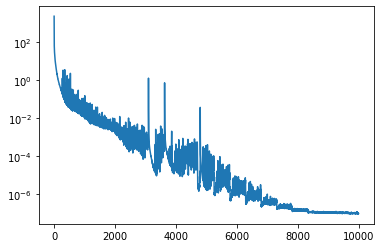

In [39]:
plt.semilogy(H.history['loss'])

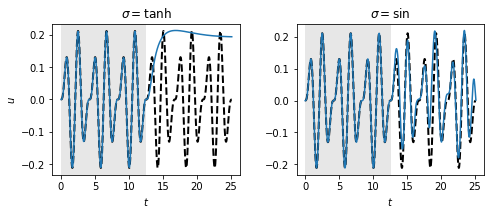

In [72]:
t_test = np.linspace(0, 4*np.pi, 1000)
t_test = np.linspace(0, 8*np.pi, 1000)

fig, ax = plt.subplots(1,2,figsize=(8,3))

# ax[0].axhspan(0, 1, facecolor='0.2', alpha=0.1)
ax[0].axvspan(0, 4*np.pi, facecolor='0.1', alpha=0.1)
ax[0].plot(t_test, _response(t_test), '--k', lw=2, label='$u^*$') 
ax[0].plot(t_test, u.eval(t_test), label='$\hat{u}: \mathrm{tanh}-4 \\times 20$') 
ax[0].set_title('$\\sigma = \mathrm{tanh}$')

ax[1].axvspan(0, 4*np.pi, facecolor='0.1', alpha=0.1)
ax[1].plot(t_test, _response(t_test), '--k', lw=2, label='$u^*$') 
ax[1].plot(t_test, U.eval(t_test), label='$\hat{u}: \\mathrm{sin}-4 \\times 20$') 
ax[1].set_title('$\\sigma = \mathrm{sin}$')

ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')
ax[0].set_ylabel('$u$')

# ax[1].legend()
plt.subplots_adjust(0.1, 0.15, 0.85, 0.85, 0.3, 0.3)
plt.savefig('Forced-Vibration.pdf', pdi=300)